## Functions/Definitions

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [6, 4]

In [ ]:
1+1

2

# Composite Fig3

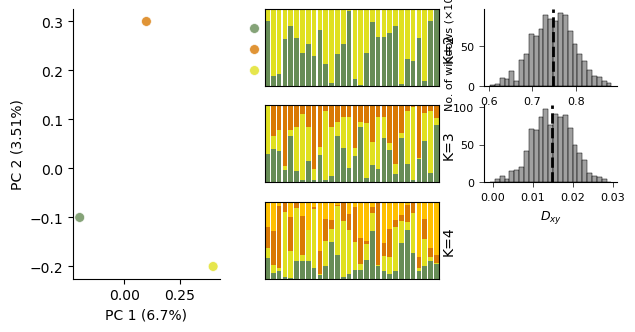

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter

# Sample placeholders for PCA data
df2 = pd.DataFrame({
    'PCA1': [-0.2, 0.1, 0.4],
    'PCA2': [-0.1, 0.3, -0.2],
    'popID2': ['P. coronatus', 'P. ijimae MJ', 'P. ijimae NS']
})
split_eigval = [6.7, 3.51]  # Percent variance explained

# Placeholder for FST/Dxy histograms
merged_all_df = pd.DataFrame({
    'avg_hudson_fst': np.random.normal(0.75, 0.05, 1000),
    'avg_dxy': np.random.normal(0.015, 0.005, 1000)
})

# Dummy admixture data for 3 K values
q_data_list = [
    pd.DataFrame(np.random.dirichlet(np.ones(2), size=30)),
    pd.DataFrame(np.random.dirichlet(np.ones(3), size=30)),
    pd.DataFrame(np.random.dirichlet(np.ones(4), size=30))
]
fam_data = pd.DataFrame({'ID1': ['ind']*30, 'ID2': list(range(30))})
individuals = fam_data['ID1'].astype(str) + "_" + fam_data['ID2'].astype(str)

# Define admixture plotting function
def plot_admix(ax, q_data, individuals):
    colors = ["#678c56", "#e0e020", "#d97904", "#ffc000", "#806000", "#29401e"]
    bottoms = np.zeros(q_data.shape[0])
    for k in range(q_data.shape[1]):
        ax.bar(range(len(individuals)), q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
        bottoms += q_data[k]
    ax.set_ylim([0, 1])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.margins(x=0)
    ax.text(1.02, 0.5, f'K={q_data.shape[1]}', va='center', ha='left', rotation='vertical', fontsize=10, transform=ax.transAxes)

# Create figure (42.15 pica = ~7.025 inches wide)
fig = plt.figure(figsize=(7.025, 3.5))
gs = gridspec.GridSpec(3, 3, width_ratios=[1.1, 1.3, 1], height_ratios=[1, 1, 1])
gs.update(wspace=0.3, hspace=0.25)

# LEFT PANEL: PCA
ax_pca = plt.subplot(gs[:, 0])
palette = ["#678c56", "#d97904", "#e0e020"]
sns.scatterplot(data=df2, x='PCA1', y='PCA2', hue='popID2', s=50, alpha=0.8, palette=palette, ax=ax_pca)
ax_pca.set_xlabel(f"PC 1 ({split_eigval[0]}%)", fontsize=10)
ax_pca.set_ylabel(f"PC 2 ({split_eigval[1]}%)", fontsize=10)
ax_pca.legend(frameon=False, loc='upper left', bbox_to_anchor=(1.05, 1))
sns.despine(ax=ax_pca)

# CENTER PANEL: Admixture barplots
for i in range(3):
    ax = plt.subplot(gs[i, 1])
    plot_admix(ax, q_data_list[i], individuals)

# RIGHT PANEL: Histograms
def thousands(x, pos): return f'{int(x/1000)}' if x >= 1000 else int(x)

ax_fst = plt.subplot(gs[0, 2])
sns.histplot(merged_all_df['avg_hudson_fst'], bins=25, color="grey", ax=ax_fst)
ax_fst.axvline(np.mean(merged_all_df['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
ax_fst.set_xlabel(r'$F_{st}$', fontsize=9)
ax_fst.set_ylabel('No. of windows (×10³)', fontsize=8)
ax_fst.yaxis.set_major_formatter(FuncFormatter(thousands))
ax_fst.tick_params(width=0.5, labelsize=8)
sns.despine(ax=ax_fst)

ax_dxy = plt.subplot(gs[1, 2])
sns.histplot(merged_all_df['avg_dxy'], bins=25, color="grey", ax=ax_dxy)
ax_dxy.axvline(np.mean(merged_all_df['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
ax_dxy.set_xlabel(r'$D_{xy}$', fontsize=9)
ax_dxy.set_ylabel(' ', fontsize=8)
ax_dxy.tick_params(width=0.5, labelsize=8)
sns.despine(ax=ax_dxy)

# Optional: Save
# plt.savefig("composite_population_genomics_figure.pdf", bbox_inches="tight")
# plt.savefig("composite_population_genomics_figure.png", dpi=600, bbox_inches="tight")

plt.show()



# Acoustics


In [ ]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/ijimae_acoustics/ijimae_song_PCA_nocomma.tsv", delimiter='\t')


# Display the DataFrame
#df=df.drop(df.columns[[0,11,12,13,14,15]], axis=1)
df.columns=["ID","PC1","PC2","PC3"]
df['PC1'] = pd.to_numeric(df['PC1'])
df['PC2'] = pd.to_numeric(df['PC2'])
df['PC3'] = pd.to_numeric(df['PC3'])
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
#df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('-')[:1]))

df

ID      PC1      PC2      PC3
0    1  0.21212 -1.42173  0.47391
1    1  0.87644 -1.81769 -1.13362
2    1  1.05425 -1.37381 -0.36271
3    1  0.65525  0.02177  0.06779
4    2  0.51720  0.56158 -0.21975
..  ..      ...      ...      ...
57   2 -1.53586 -0.28702  0.44856
58   2 -1.20311 -0.02985  0.09310
59   2 -1.42170 -0.00971 -0.58767
60   2  0.01589  1.35019 -1.67885
61   2 -0.52612 -0.48038 -1.48339

[62 rows x 4 columns]

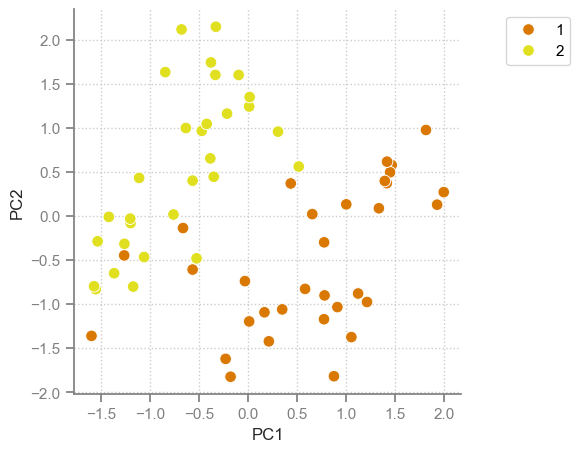

In [ ]:
#plt.scatter(df['PCA1'], df['PCA2'], c=df['popID'], s=40, cmap='magma')
# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)

# Plot scatterplot with the custom palette
custom_palette = ["#d97904", "#e0e020"]
sns.scatterplot(x=df['PC1'], y=df['PC2'], hue=df['ID'], s=70, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)

plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/ijimae_acoustics/songPCA_ijimae.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()
#plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()




# Site frequency spectrum

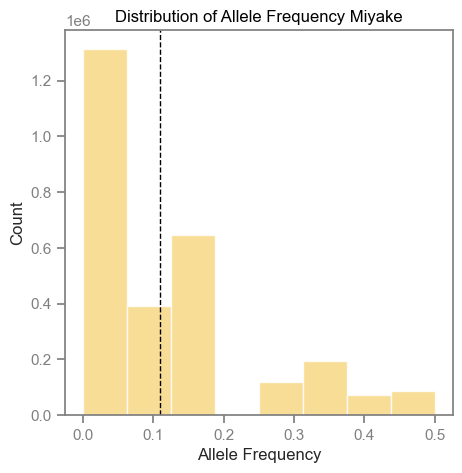

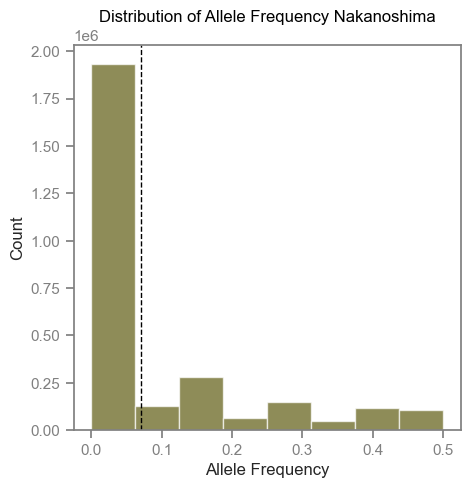

In [ ]:
# List to store each processed DataFrame
df_sfs = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,5):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.MiyakeSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'depth'
    #ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    #ind_depth_sorted1['Chromosome'] = i
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat


#var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
#var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency Miyake")
plt.hist(df_concat["maf"], fill=True,color="#F7D57C", alpha=0.8, bins=8)
mean_freq = np.mean(df_concat["maf"])
#plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()
# List to store each processed DataFrame
df_sfs = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,5):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.NakanoshimaSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'depth'
    #ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    #ind_depth_sorted1['Chromosome'] = i
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat

plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency Nakanoshima")
plt.hist(df_concat["maf"], fill=True, color="#5F5B11",alpha=0.7, bins=8)
mean_freq = np.mean(df_concat["maf"])
#plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
plt.axvline(mean_freq, color="black",linestyle="dashed", linewidth=1)
plt.show()

#  Prepare files for stairway plot

In [ ]:
# List to store each processed DataFrame
df_sfs = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,5):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.MiyakeSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'depth'
    #ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    #ind_depth_sorted1['Chromosome'] = i
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat

chr       pos  nalleles  nchr        a1        a2  \
0        VHQE01000408.1      1633         2    12  1.000000  0.000000   
1        VHQE01000408.1      1640         2    12  1.000000  0.000000   
2        VHQE01000408.1      1648         2    12  1.000000  0.000000   
3        VHQE01000408.1      1660         2    12  1.000000  0.000000   
4        VHQE01000408.1      1679         2    12  1.000000  0.000000   
...                 ...       ...       ...   ...       ...       ...   
2825256  VHQE01000019.1  53153115         2    12  0.666667  0.333333   
2825257  VHQE01000019.1  53153119         2    12  0.666667  0.333333   
2825258  VHQE01000019.1  53153121         2    12  0.666667  0.333333   
2825259  VHQE01000019.1  53153128         2    12  0.666667  0.333333   
2825260  VHQE01000019.1  53153189         2    12  0.833333  0.166667   

              maf  
0        0.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        0.000000  
...           ...  
2825256  0.333333  
2825257  0.333333  
2825258  0.333333  
2825259  0.333333  
2825260  0.166667  

[2825261 rows x 7 columns]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [6, 4]

color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

def generate_lists(from_chr,till_chr):
    color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]
    #label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
    file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]

    
def plot_quality_distribution(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.xlabel("Quality")
        plt.ylabel("Count")
        plt.title("Full Distribution of Quality Scores")
        sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)

    #plt.legend()
    plt.show()

def plot_quality_scores_below_200(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.xlabel("Quality")
        plt.ylabel("Count")
        plt.title("Quality Scores below 200")
        qual_lt_400 = var_qual[var_qual["qual"] < 300] # create a new dataset with only "qual" values < 400
        plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
        mean_qual = np.mean(var_qual["qual"])

    plt.show()


def plot_quality_scores_along_chromosome(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Quality Scores Along the Chromosome")
        
    plt.legend()
    plt.show()

def plot_quality_scores_along_chromosome2(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
        
        plt.plot(var_qual['pos'],var_qual['qual'])
        #plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Quality Scores Along the Chromosome")
        
    plt.legend()
    plt.show()   


def plot_mean_depth(file_paths_gen, color_list,label_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                                names=["chr", "pos", "mean_depth", "var_depth"])
        sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3, label=label_list[i])
        plt.xlabel("Mean Depth")
        plt.ylabel("Count")
        plt.title("Mean Depth")
    plt.show()
    
    
def plot_depth_along_chromosome(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                               names=["chr", "pos", "qual"])
        var_qual = var_qual[var_qual["qual"] != -1]
        var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("Count")
        plt.title("Depth Along the Chromosome")
        
    plt.legend()
    plt.show()

def plot_mean_depth_100(file_paths_gen, color_list):    
    for i, file_path_gen in enumerate(file_paths_gen): 
        var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
        var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
        plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
        mean_depth = np.mean(var_depth["mean_depth"])
        #print(mean_depth)
        #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
        plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
        plt.xlabel("Mean Depth")
        plt.ylabel("Count")
        plt.title("Mean Depth below 200")
    plt.show() 
    
def plot_allele_frquency(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
        var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
        plt.xlabel("Allele Frequency")
        plt.ylabel("Count")
        plt.title("Distribution of Allele Frequency")
        plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
        mean_freq = np.mean(var_freq["maf"])
        #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
        plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
    plt.show()

def plot_minor_alleles(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
        var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
        plt.xlabel("Allele Frequency")
        plt.ylabel("Count")
        plt.title("Minor Allele Frequency")
        var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
        plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
    plt.show()

def plot_missing_sites(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
        plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
        plt.xlabel("Missingness")
        plt.ylabel("Count")
        plt.title("Missing Data")
    plt.show()

def plot_depth_per_indiv(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
        sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
        plt.xlabel("Mean Depth")
        plt.ylabel("Number of individuals")
        plt.title("Per Individual Depth")
    plt.show()

def plot_inbreding_coefficient(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                           names=["ind", "ho", "he", "nsites", "f"])
        plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
        plt.xlabel("f")
        plt.ylabel("Number of individuals")
        plt.title("Inbreeding coeficient")
    plt.show()


# P.ijimae QC

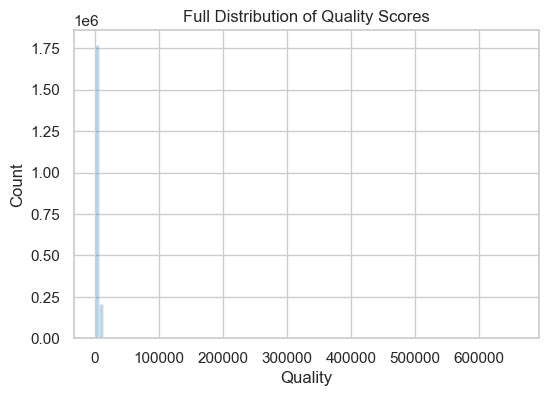

In [ ]:
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region1.allsitesNew_variant."
#def plot_quality_distribution(file_paths_gen, color_list):
    #for i, file_path_gen in enumerate(file_paths_gen):
var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1, names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
#sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)
plt.hist(data=var_qual, x="qual", fill=True,alpha=0.3, bins=100) #, color=color_list[i], alpha=0.3)

#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)

    #plt.legend()
#plt.show()

#plt.hist(data=var_qual, x="qual", fill=True,alpha=0.3, bins=100000) #, color=color_list[i], alpha=0.3)
#plt.xlim(0,300)
#plt.xlabel("Quality")
#plt.ylabel("Count")
#plt.title("Full Distribution of Quality Scores")
    #plt.legend()
# plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qualzoom.pdf",bbox_inches="tight")
    
plt.show()


#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)


(array([1639.,   21.,   17.,   17.,   17.,   23.,   36.,   26.,   55.,
          24.,   38.,   24.,   40.,   38.,   50.,  947., 1119., 1155.,
         948.,  896.,  951.,  956., 1136., 2430.,  493.,  502.,  637.,
         444.,  561.,  511.,  488.,  555.,  535.,  558.,  655.,  762.,
         871.,  868., 1080.,  971.,  789., 1073., 1000.,  781., 1051.,
        2246.,  415.,  523.,  588.,  387.,  447.,  423.,  390.,  469.,
         522.,  397.,  624.,  781.,  584.,  890.,  905.,  546.,  867.,
         783.,  606.,  823.,  698.,  533., 1231.,  461.,  416.,  921.,
         456.,  366.,  679.,  585.,  379.,  739.,  862.,  509.,  982.,
         887.,  595.,  964.,  695.,  613.,  670.,  535.,  567.,  562.,
         484., 1044.,  446.,  779.,  869.,  391.,  750.,  837.,  487.,
         887.]),
 array([1.000000e-02, 2.009900e+00, 4.009800e+00, 6.009700e+00,
        8.009600e+00, 1.000950e+01, 1.200940e+01, 1.400930e+01,
        1.600920e+01, 1.800910e+01, 2.000900e+01, 2.200890e+01,
        2.

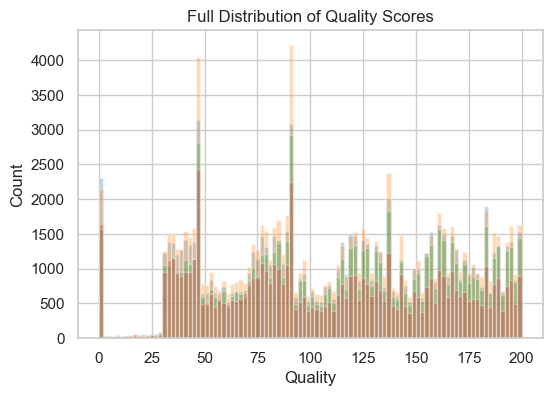

In [ ]:
file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region3.allsitesNew_variant."
#def plot_quality_distribution(file_paths_gen, color_list):
    #for i, file_path_gen in enumerate(file_paths_gen):
var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1, names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")


var_qual_filtered = var_qual[(var_qual["qual"] > 0) & (var_qual["qual"] <= 200)]

plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
#sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)
plt.hist(data=var_qual_filtered, x="qual", fill=True,alpha=0.3, bins=100)

file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region2.allsitesNew_variant."
#def plot_quality_distribution(file_paths_gen, color_list):
    #for i, file_path_gen in enumerate(file_paths_gen):
var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1, names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")


var_qual_filtered = var_qual[(var_qual["qual"] > 0) & (var_qual["qual"] <= 200)]

plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
#sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)
plt.hist(data=var_qual_filtered, x="qual", fill=True,alpha=0.3, bins=100)

file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region4.allsitesNew_variant."
#def plot_quality_distribution(file_paths_gen, color_list):
    #for i, file_path_gen in enumerate(file_paths_gen):
var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1, names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")


var_qual_filtered = var_qual[(var_qual["qual"] > 0) & (var_qual["qual"] <= 200)]

plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
#sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)
plt.hist(data=var_qual_filtered, x="qual", fill=True,alpha=0.3, bins=100)

file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region9.allsitesNew_variant."
#def plot_quality_distribution(file_paths_gen, color_list):
    #for i, file_path_gen in enumerate(file_paths_gen):
var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1, names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")


var_qual_filtered = var_qual[(var_qual["qual"] > 0) & (var_qual["qual"] <= 200)]

plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
#sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)
plt.hist(data=var_qual_filtered, x="qual", fill=True,alpha=0.3, bins=100)


In [ ]:
var_qual_filtered = var_qual[(var_qual["qual"] > 0) & (var_qual["qual"] <= 50)]
var_qual_filtered 

chr       pos   qual
7       VHQE01000068.1     12196  47.19
8       VHQE01000068.1     12199  47.19
9       VHQE01000068.1     12204  47.19
10      VHQE01000068.1     12205  47.19
11      VHQE01000068.1     12215  47.19
...                ...       ...    ...
655795  VHQE01000068.1  31058045   0.43
655798  VHQE01000068.1  31058048   0.07
655811  VHQE01000068.1  31058066  47.07
655904  VHQE01000068.1  31061122  37.32
655917  VHQE01000068.1  31081997  34.04

[13096 rows x 3 columns]

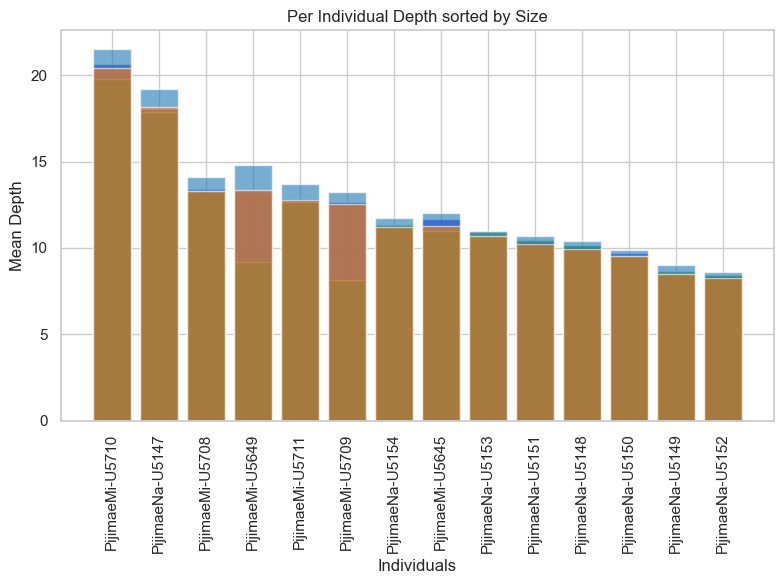

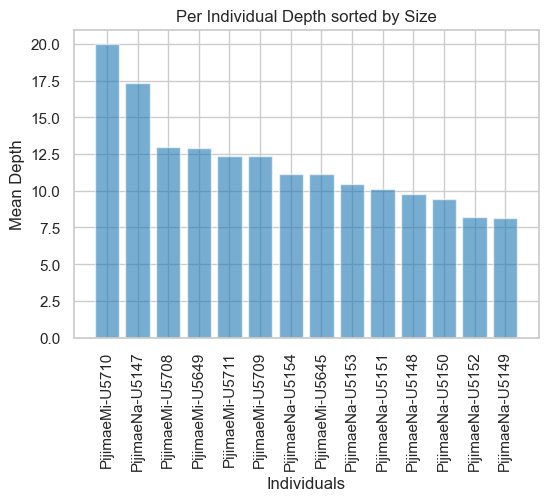

In [ ]:
file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region3.allsitesNew_variant."

plt.figure(figsize=(8, 6))

# Reading the data
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="depth", ascending=False)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["ind"], ind_depth_sorted["depth"], color='orange',alpha=0.6)
plt.ylabel("Mean Depth")
plt.xlabel("Individuals")
plt.title("Per Individual Depth sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap

#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.dpthind.pdf",bbox_inches="tight")
#plt.show()

file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region9.allsitesNew_variant."

# Reading the data
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="depth", ascending=False)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["ind"], ind_depth_sorted["depth"], color='blue',alpha=0.6)
plt.ylabel("Mean Depth")
plt.xlabel("Individuals")
plt.title("Per Individual Depth sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout() 

file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region1.allsitesNew_variant."

# Reading the data
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="depth", ascending=False)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["ind"], ind_depth_sorted["depth"], color='green',alpha=0.6)
plt.ylabel("Mean Depth")
plt.xlabel("Individuals")
plt.title("Per Individual Depth sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout() 


file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region2.allsitesNew_variant."

# Reading the data
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="depth", ascending=False)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["ind"], ind_depth_sorted["depth"],alpha=0.6)
plt.ylabel("Mean Depth")
plt.xlabel("Individuals")
plt.title("Per Individual Depth sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout() 

file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region4.allsitesNew_variant."

# Reading the data
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="depth", ascending=False)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["ind"], ind_depth_sorted["depth"],alpha=0.6)
plt.ylabel("Mean Depth")
plt.xlabel("Individuals")
plt.title("Per Individual Depth sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
#plt.tight_layout() 
plt.show()

file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region5.allsitesNew_variant."

# Reading the data
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="depth", ascending=False)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["ind"], ind_depth_sorted["depth"],alpha=0.6)
plt.ylabel("Mean Depth")
plt.xlabel("Individuals")
plt.title("Per Individual Depth sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
#plt.tight_layout() 
plt.show()

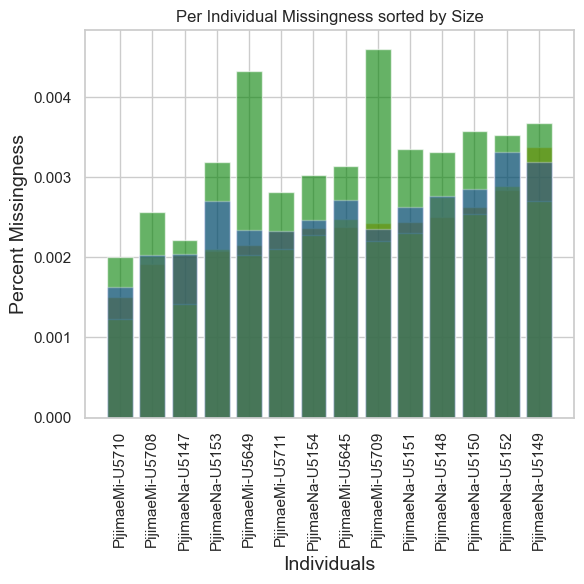

In [ ]:
plt.figure(figsize=(6, 6))
# Reading the data
file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region2.allsitesNew_variant."

ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='orange',alpha=0.6)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.pdf",bbox_inches="tight")


file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region5.allsitesNew_variant."

ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='yellow',alpha=0.6)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.pdf",bbox_inches="tight")

file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region1.allsitesNew_variant."

ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='green',alpha=0.6)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.pdf",bbox_inches="tight")


file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region3.allsitesNew_variant."

ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='blue',alpha=0.3)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.


plt.show()

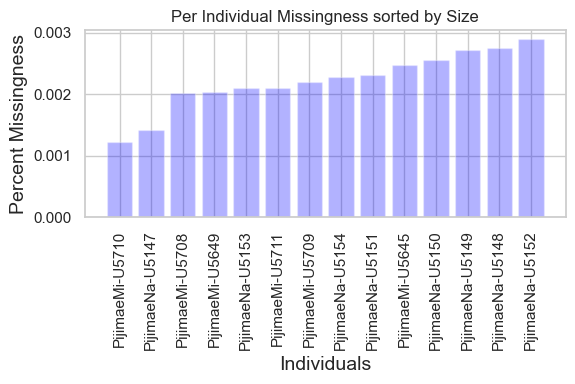

In [ ]:
file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region5.allsitesNew_variant."

ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='blue',alpha=0.3)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.


plt.show()

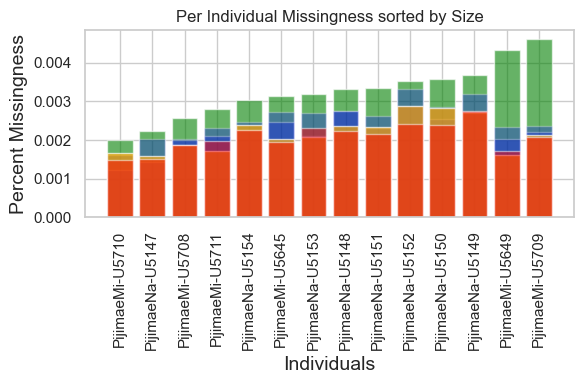

In [ ]:
plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.pdf",bbox_inches="tight")

file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region1.allsitesNew_variant."

ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='green',alpha=0.6)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
#plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.pdf",bbox_inches="tight")


file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region3.allsitesNew_variant."

ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='blue',alpha=0.3)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
#plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.

file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region5.allsitesNew_variant."

ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='blue',alpha=0.3)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
#plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.


file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region10.allsitesNew_variant."

ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='orange',alpha=0.7)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
#plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.


file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region4.allsitesNew_variant."

ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='red',alpha=0.5)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90) 


plt.tight_layout()
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/missing134510.png")


plt.show()

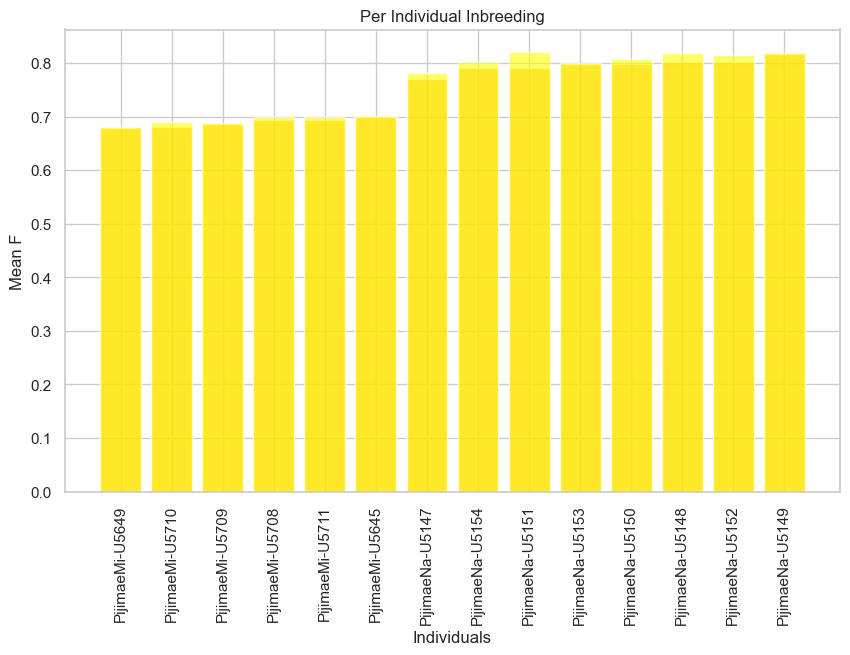

In [ ]:
file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region3.allsitesNew_variant."

plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F"],color='orange',alpha=0.6)
plt.ylabel("Mean F")
plt.xlabel("Individuals")
plt.title("Per Individual Inbreeding")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
#plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")


file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region4.allsitesNew_variant."

#plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F"],color='yellow',alpha=0.6)
plt.ylabel("Mean F")
plt.xlabel("Individuals")
plt.title("Per Individual Inbreeding")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
#plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")

plt.show()

In [ ]:
file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region2.allsitesNew_variant."

#plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F", ascending=True)


file_path_gen="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region3.allsitesNew_variant."

#plt.figure(figsize=(10, 6))
# Reading the data
ind_depth1 = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)

ind_depth_sorted['Chromosome'] = 2  
ind_depth_sorted1['Chromosome'] = 3

# Concatenate the DataFrames
df_combined = pd.concat([ind_depth_sorted, ind_depth_sorted1], ignore_index=True)

df_combined

INDV   O(HOM)    E(HOM)  N_SITES        F  Chromosome
0   PijimaeMi-U5710   974177  751057.9  1085598  0.66694           2
1   PijimaeMi-U5649   976644  750875.9  1085342  0.67501           2
2   PijimaeMi-U5709   977164  750873.6  1085309  0.67663           2
3   PijimaeMi-U5708   979268  750996.7  1085506  0.68241           2
4   PijimaeMi-U5711   980015  750851.8  1085266  0.68527           2
5   PijimaeMi-U5645   983737  750848.0  1085287  0.69636           2
6   PijimaeNa-U5147  1001401  750910.5  1085399  0.74888           2
7   PijimaeNa-U5154  1007791  750887.1  1085347  0.76812           2
8   PijimaeNa-U5153  1011146  750953.5  1085433  0.77790           2
9   PijimaeNa-U5151  1013137  750957.8  1085436  0.78385           2
10  PijimaeNa-U5149  1014284  750772.4  1085157  0.78805           2
11  PijimaeNa-U5148  1016578  750875.1  1085332  0.79443           2
12  PijimaeNa-U5152  1017880  750791.5  1085183  0.79873           2
13  PijimaeNa-U5150  1020106  750827.8  1085249  0.80521           2
14  PijimaeMi-U5649   973810  744694.8  1082584  0.67808           3
15  PijimaeMi-U5710   974690  744802.7  1082753  0.68024           3
16  PijimaeMi-U5709   976196  744685.8  1082569  0.68518           3
17  PijimaeMi-U5708   979259  744741.0  1082658  0.69401           3
18  PijimaeMi-U5711   979315  744679.3  1082573  0.69441           3
19  PijimaeMi-U5645   980607  744581.5  1082365  0.69875           3
20  PijimaeNa-U5147  1004733  744781.9  1082708  0.76925           3
21  PijimaeNa-U5154  1011696  744618.6  1082458  0.79055           3
22  PijimaeNa-U5151  1012001  744633.6  1082495  0.79135           3
23  PijimaeNa-U5153  1014527  744680.6  1082563  0.79864           3
24  PijimaeNa-U5150  1014497  744600.8  1082472  0.79881           3
25  PijimaeNa-U5148  1015392  744595.3  1082461  0.80149           3
26  PijimaeNa-U5152  1015756  744599.7  1082431  0.80264           3
27  PijimaeNa-U5149  1020433  744522.9  1082353  0.81671           3

In [ ]:
# List to store each processed DataFrame
df_list = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,5):
    var_qual = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region" + str(i) + ".allsitesNew_variant.lqual", sep="\t", skiprows=1,
                           names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    # Add the chromosome number column
    var_qual['Chromosome'] = i
    
    df_list.append(var_qual)
    
df_list

[                    chr       pos     qual  Chromosome
 0        VHQE01000408.1      1633   136.44           1
 1        VHQE01000408.1      1640   129.77           1
 2        VHQE01000408.1      1648   136.44           1
 3        VHQE01000408.1      1660   122.44           1
 4        VHQE01000408.1      1679   122.44           1
 ...                 ...       ...      ...         ...
 1983006  VHQE01000408.1  66930936     0.00           1
 1983007  VHQE01000408.1  66931042  1837.93           1
 1983008  VHQE01000408.1  66931049  8680.05           1
 1983009  VHQE01000408.1  66931318    77.48           1
 1983010  VHQE01000408.1  66931357  2878.53           1
 
 [1983011 rows x 4 columns],
                     chr       pos    qual  Chromosome
 0        VHQE01000425.1      1271   84.37           2
 1        VHQE01000425.1      1275   73.95           2
 2        VHQE01000425.1      1304   75.30           2
 3        VHQE01000425.1      1305  613.76           2
 4        VHQE01000425

In [ ]:
# List to store each processed DataFrame
df_list = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,5):
    ind_depth1 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region" + str(i) + ".allsitesNew_variant.het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
    ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
    ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    ind_depth_sorted1['Chromosome'] = i
    
    df_list.append(ind_depth_sorted1)
    
df_list


FileNotFoundError: [Errno 2] No such file or directory: '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region1.allsitesNew_variant.het'

## Inbreeding

In [ ]:
import pandas as pd

# List to store each processed DataFrame
df_list = []

# Loop to read and process files
for i in range(2, 10):
    ind_depth1 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region" + str(i) + ".allsitesNew_variant.het", sep="\t", skiprows=1, names=["INDV", "O(HOM)", "E(HOM)", "N_SITES", "F"])

    # Modify 'INDV' column to remove redundancy
    ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'F'
    ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    ind_depth_sorted1['Chromosome'] = i
    
    df_list.append(ind_depth_sorted1)

# Concatenate all DataFrames in the list into a single DataFrame
df_concat_het = pd.concat(df_list, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat_het

INDV  O(HOM)    E(HOM)  N_SITES        F  Chromosome
0    PijimaeMi-U5710  974177  751057.9  1085598  0.66694           2
1    PijimaeMi-U5649  976644  750875.9  1085342  0.67501           2
2    PijimaeMi-U5709  977164  750873.6  1085309  0.67663           2
3    PijimaeMi-U5708  979268  750996.7  1085506  0.68241           2
4    PijimaeMi-U5711  980015  750851.8  1085266  0.68527           2
..               ...     ...       ...      ...      ...         ...
107  PijimaeNa-U5151  572542  426417.0   615119  0.77437           9
108  PijimaeNa-U5150  572845  426320.7   614975  0.77668           9
109  PijimaeNa-U5148  573879  426435.4   615138  0.78135           9
110  PijimaeNa-U5149  575585  426371.6   615047  0.79085           9
111  PijimaeNa-U5152  584784  426340.9   615009  0.83980           9

[112 rows x 6 columns]

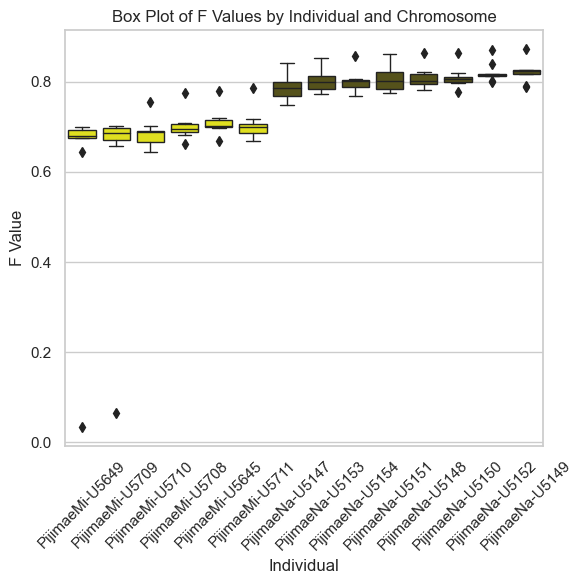

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_theme(style="whitegrid")


# Assuming 'df_concat' is your DataFrame name
# If not, replace 'df_concat' with the actual name of your DataFrame
colors = ["yellow"] * 6 + ["#5F5B11"] * 8

plt.figure(figsize=(6, 6))  # Adjust the size as needed
sns.boxplot(x='INDV', y='F', data=df_concat, linewidth=1, palette=colors)
sns.set_theme(style="whitegrid")
#sns.set_context("talk")
plt.title('Box Plot of F Values by Individual and Chromosome')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.xlabel('Individual')
plt.ylabel('F Value')
#plt.legend(title='Chromosome', loc='upper left')

plt.tight_layout()  # Adjusts plot parameters to give some padding
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/ijimae_inbreeding_tmp.png")
plt.show()


### SFS population wise

In [ ]:
# List to store each processed DataFrame
df_sfs = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,5):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.MiyakeSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'depth'
    #ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    #ind_depth_sorted1['Chromosome'] = i
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat
    

chr       pos  nalleles  nchr        a1        a2  \
0        VHQE01000408.1      1633         2    12  1.000000  0.000000   
1        VHQE01000408.1      1640         2    12  1.000000  0.000000   
2        VHQE01000408.1      1648         2    12  1.000000  0.000000   
3        VHQE01000408.1      1660         2    12  1.000000  0.000000   
4        VHQE01000408.1      1679         2    12  1.000000  0.000000   
...                 ...       ...       ...   ...       ...       ...   
2825256  VHQE01000019.1  53153115         2    12  0.666667  0.333333   
2825257  VHQE01000019.1  53153119         2    12  0.666667  0.333333   
2825258  VHQE01000019.1  53153121         2    12  0.666667  0.333333   
2825259  VHQE01000019.1  53153128         2    12  0.666667  0.333333   
2825260  VHQE01000019.1  53153189         2    12  0.833333  0.166667   

              maf  
0        0.000000  
1        0.000000  
2        0.000000  
3        0.000000  
4        0.000000  
...           ...  
2825256  0.333333  
2825257  0.333333  
2825258  0.333333  
2825259  0.333333  
2825260  0.166667  

[2825261 rows x 7 columns]

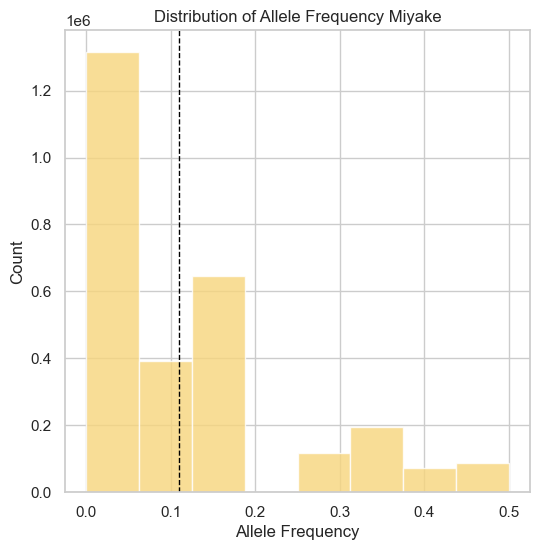

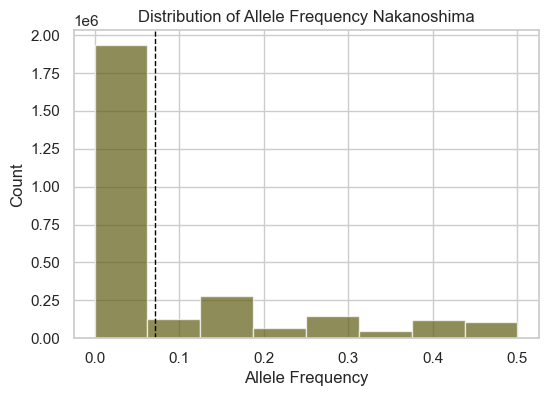

In [ ]:
plt.figure(figsize=(6, 6)) 
# List to store each processed DataFrame
df_sfs = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,5):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.MiyakeSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'depth'
    #ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    #ind_depth_sorted1['Chromosome'] = i
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat


#var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
#var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency Miyake")
plt.hist(df_concat["maf"], fill=True,color="#F7D57C", alpha=0.8, bins=8)
mean_freq = np.mean(df_concat["maf"])
#plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()
# List to store each processed DataFrame
df_sfs = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,5):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.NakanoshimaSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'depth'
    #ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    #ind_depth_sorted1['Chromosome'] = i
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat

plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency Nakanoshima")
plt.hist(df_concat["maf"], fill=True, color="#5F5B11",alpha=0.7, bins=8)
mean_freq = np.mean(df_concat["maf"])
#plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
plt.axvline(mean_freq, color="black",linestyle="dashed", linewidth=1)
plt.show()

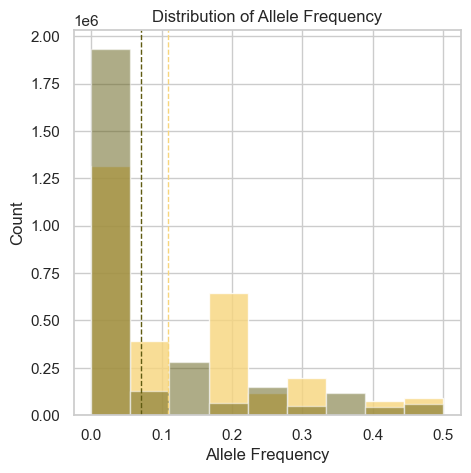

In [ ]:
plt.figure(figsize=(5, 5)) 

# List to store each processed DataFrame
df_sfs = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,5):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.MiyakeSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'depth'
    #ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    #ind_depth_sorted1['Chromosome'] = i
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat


#var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
#var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency Miyake")
plt.hist(df_concat["maf"], fill=True,color="#F7D57C", alpha=0.8, bins=9)
mean_freq = np.mean(df_concat["maf"])
#plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
plt.axvline(mean_freq, color="#F7D57C", linestyle="dashed", linewidth=1)
#plt.show()
# List to store each processed DataFrame
df_sfs = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,5):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.NakanoshimaSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'depth'
    #ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    #ind_depth_sorted1['Chromosome'] = i
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat

plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency) # Nakanoshima")
plt.hist(df_concat["maf"], fill=True, color="#5F5B11",alpha=0.5, bins=9)
mean_freq = np.mean(df_concat["maf"])
#plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
plt.axvline(mean_freq, color="#5F5B11",linestyle="dashed", linewidth=1)
plt.show()

# Updated SFS

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_34985/732295333.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_Mi["allele_count"] = (df_concat_Mi["maf"] * 12).round().astype(int)


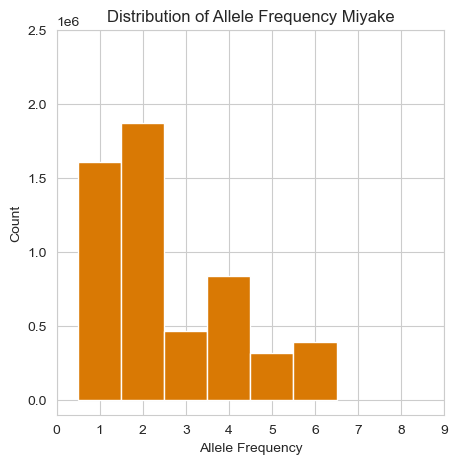

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_34985/732295333.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_Na["allele_count"] = (df_concat_Na["maf"] * 16).round().astype(int)


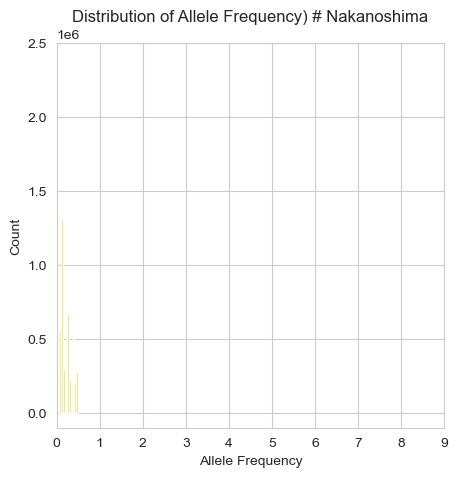

In [ ]:
plt.figure(figsize=(5, 5)) 

# List to store each processed DataFrame
df_sfs = []
    
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,19):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.MiyakeSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'depth'
    #ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    #ind_depth_sorted1['Chromosome'] = i
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat_Mi=df_concat
df_concat_Mi = df_concat_Mi[df_concat_Mi['maf'] > 0]

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat_Mi=df_concat
df_concat_Mi = df_concat_Mi[df_concat_Mi['maf'] > 0]

# Convert MAF values to frequency bins based on their proportions
sfs_Mi = df_concat_Mi['maf'].value_counts().sort_index()  # Count occurrences per bin and sort

# Create neutral expectation
bins = np.arange(0.05, 0.5 + 0.01, 0.05)
neutral_expectation = 1 / bins

# Scale the neutral expectation to match your observed counts for comparison
neutral_expectation_scaled = neutral_expectation * (sum(sfs_Mi) / sum(neutral_expectation))
neutral_expectation_scaled

#plt.plot(np.arange(0, 0.5+0.01, 0.01), neutral_expectation_scaled, color="blue", linestyle="--", label="Neutral Expectation")


#var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
#var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
#df_concat_Mi.loc[:, "allele_count"] = (df_concat_Mi["maf"] * 6).round().astype(int)
# Scale MAF values by 12 to get allele counts
df_concat_Mi["allele_count"] = (df_concat_Mi["maf"] * 12).round().astype(int)


plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency Miyake")
#plt.hist(df_concat_Mi["maf"],bins=range(1, 8), fill=True,color="#d97904") #, alpha=0.8) #, bins=9) edgecolor="black",
plt.hist(df_concat_Mi["allele_count"], bins=range(1, 8), color="#d97904", align="left")
# Plot the neutral expectation line
#plt.plot(range(0, 0.5), neutral_expectation, color="#d97904", linestyle="--", label="Neutral Expectation")
#plt.plot(bins, neutral_expectation_scaled, color="black", linestyle="--", label="Neutral Expectation")
#mean_freq = np.mean(df_concat["maf"])
#plt.ylim(-1000,7.5e6)
plt.ylim(-0.1e6,2.5e6)
plt.xlim(0,9)
#plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
#plt.axvline(mean_freq, color="#F7D57C", linestyle="dashed", linewidth=1)
plt.show()

# List to store each processed DataFrame
df_sfs = []
plt.figure(figsize=(5, 5))     
#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
    
for i in range(1,19):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.NakanoshimaSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3])
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat_Na=df_concat
df_concat_Na= df_concat_Na[df_concat_Na['maf'] > 0]
df_concat_Na["allele_count"] = (df_concat_Na["maf"] * 16).round().astype(int)

plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency) # Nakanoshima")
plt.hist(df_concat_Na["maf"], fill=True, color="#e0e020") #,alpha=0.8) #, bins=9)
mean_freq = np.mean(df_concat["maf"])
plt.ylim(-0.1e6,2.5e6)
plt.xlim(0,9)

#plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
#plt.axvline(mean_freq, color="#5F5B11",linestyle="dashed", linewidth=1)
plt.show()

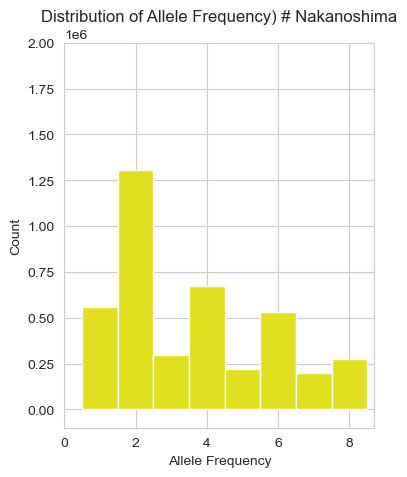

(0.0, 6.7)

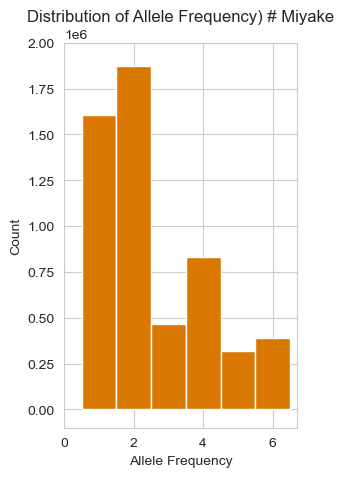

In [ ]:
plt.figure(figsize=(4, 5)) 
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency) # Nakanoshima")
plt.hist(df_concat_Na["allele_count"], fill=True, color="#e0e020", bins=range(1, 10), align="left") #,alpha=0.8) #, bins=9)
plt.ylim(-0.1e6,2e6)
plt.xlim(0,8.7)
plt.show()

plt.figure(figsize=(3, 5)) 
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency) # Miyake")
plt.hist(df_concat_Mi["allele_count"], fill=True, color="#d97904", bins=range(1, 8), align="left") #,alpha=0.8) #, bins=9)
plt.ylim(-0.1e6,2e6)
plt.xlim(0,6.7)



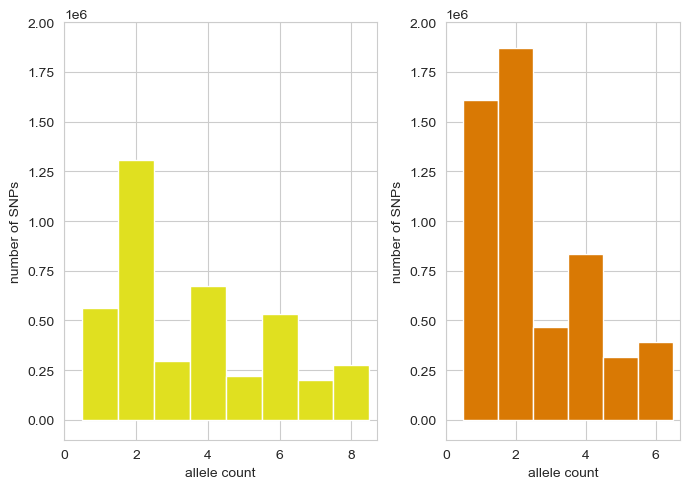

In [ ]:
# Plotting both histograms side by side as a grid

fig, axs = plt.subplots(1, 2, figsize=(7, 5), gridspec_kw={'width_ratios': [4, 3]})

# Plot for Nakanoshima
axs[0].hist(df_concat_Na["allele_count"], bins=range(1, 10), color="#e0e020", edgecolor="white",align="left")
axs[0].set_xlabel("allele count")
axs[0].set_ylabel("number of SNPs")
#axs[0].set_title("Distribution of Allele Frequency - Nakanoshima")
axs[0].set_ylim(-0.1e6, 2e6)
axs[0].set_xlim(0, 8.7)

# Plot for Miyake
axs[1].hist(df_concat_Mi["allele_count"], bins=range(1, 8), color="#d97904", edgecolor="white",align="left")
axs[1].set_xlabel("allele count")
axs[1].set_ylabel("number of SNPs")
#axs[1].set_title("Distribution of Allele Frequency - Miyake")
axs[1].set_ylim(-0.1e6, 2e6)
axs[1].set_xlim(0, 6.7)

plt.tight_layout()
plt.show()


In [ ]:
for i in range(1,19):
    var_freq = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region" + str(i) + ".filtered.MiyakeSFS..frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    # Modify 'ind' column to remove redundancy
    #ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'depth'
    #ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    #ind_depth_sorted1['Chromosome'] = i
    
    df_sfs.append(var_freq)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    df_concat = pd.concat(df_sfs, ignore_index=True)

# df_concat is now a single pandas DataFrame containing all the processed data
df_concat_Mi=df_concat
df_concat_Mi = df_concat_Mi[df_concat_Mi['maf'] > 0]

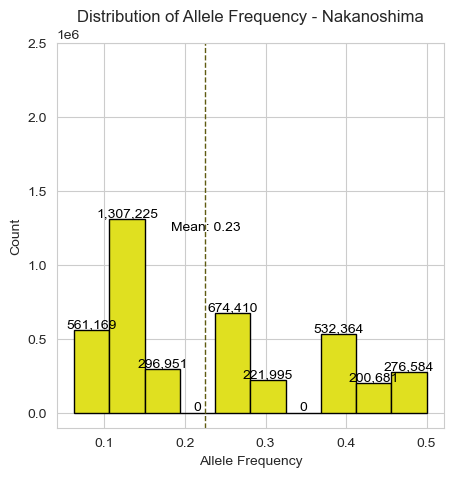

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List to store each processed DataFrame
df_sfs = []

# Loop to read and process each region file
for i in range(1, 19):
    # Read the frequency data for each region
    var_freq = pd.read_csv(
        f"/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae.region{i}.filtered.NakanoshimaSFS..frq",
        sep="\t", skiprows=1,
        names=["chr", "pos", "nalleles", "nchr", "a1", "a2"]
    )
    # Calculate minor allele frequency (maf) by taking the minimum of a1 and a2
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    df_sfs.append(var_freq)  # Append processed DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
df_concat = pd.concat(df_sfs, ignore_index=True)

# Filter out invariant sites (maf > 0)
df_concat_Na = df_concat[df_concat['maf'] > 0]

# Plot the histogram with values on each column
plt.figure(figsize=(5, 5))
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency - Nakanoshima")

# Create the histogram and capture bin heights and edges for annotation
n, bins, patches = plt.hist(df_concat_Na["maf"], bins=10, color="#e0e020", edgecolor="black")

# Annotate counts on each bar
for count, edge in zip(n, bins[:-1]):
    plt.text(edge + (bins[1] - bins[0]) / 2, count, f"{int(count):,}", ha="center", va="bottom", color="black", fontsize=10)

# Add a mean line and label
mean_freq = np.mean(df_concat_Na["maf"])
plt.axvline(mean_freq, color="#5F5B11", linestyle="dashed", linewidth=1)
plt.text(mean_freq, plt.ylim()[1] * 0.9, f"Mean: {mean_freq:.2f}", ha="center", color="black")

plt.ylim(-0.1e6, 2.5e6)
plt.show()


(array([1607991.,       0., 1870769.,       0.,  467505.,  833857.,
              0.,       0.,  316536.,  389225.]),
 array([0.9999996 , 1.49999964, 1.99999968, 2.49999972, 2.99999976,
        3.4999998 , 3.99999984, 4.49999988, 4.99999992, 5.49999996,
        6.        ]),
 <BarContainer object of 10 artists>)

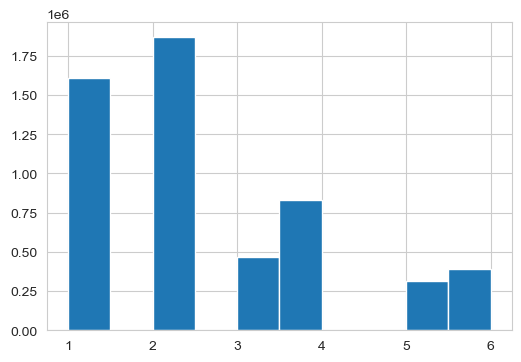

In [ ]:
plt.hist(df_concat_Mi["maf"]*12)

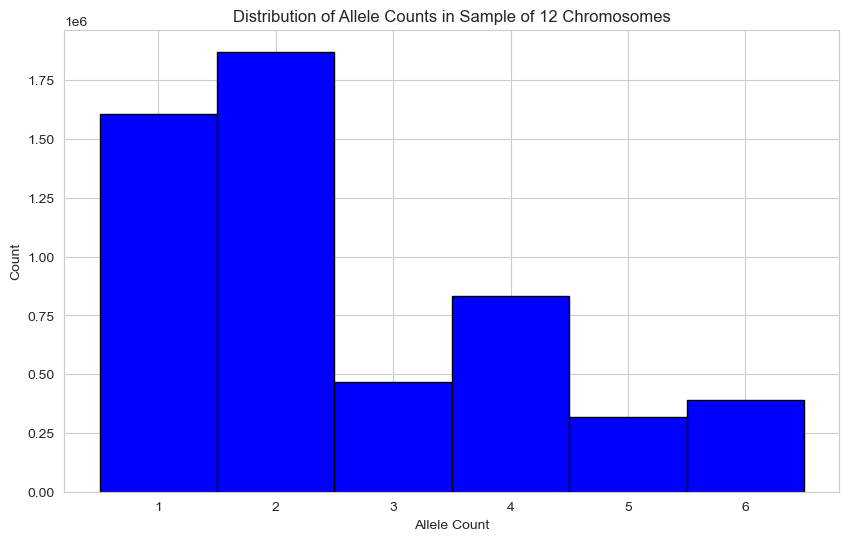

In [ ]:
# Scale MAF values by 12 to get allele counts
df_concat_Mi["allele_count"] = (df_concat_Mi["maf"] * 12).round().astype(int)

# Plot histogram of allele counts
plt.figure(figsize=(10, 6))
plt.hist(df_concat_Mi["allele_count"], bins=range(1, 8), color="blue", edgecolor="black", align="left")
plt.xlabel("Allele Count")
plt.ylabel("Count")
plt.title("Distribution of Allele Counts in Sample of 12 Chromosomes")
plt.xticks(range(1, 7))  # Set x-ticks to integer values only
plt.grid(True)

plt.show()

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_34985/1349111137.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_Na["allele_count"] = df_concat_Na["maf"] * 16


(array([ 561169., 1307225.,  296951.,       0.,  674410.,  221995.,
              0.,  532364.,  200681.,  276584.]),
 array([ 256. ,  435.2,  614.4,  793.6,  972.8, 1152. , 1331.2, 1510.4,
        1689.6, 1868.8, 2048. ]),
 <BarContainer object of 10 artists>)

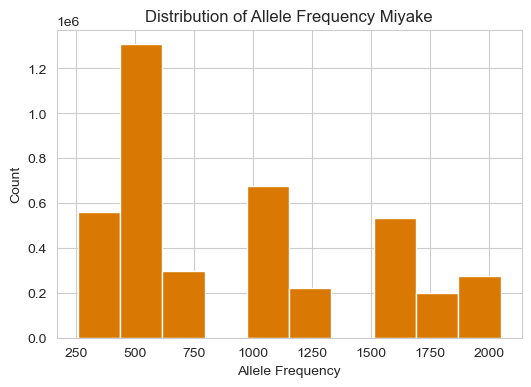

In [ ]:
# Ensure df_concat_Mi is a true copy of any original filtered data
df_concat_Mi = df_concat_Mi.copy()

# Now update the "allele_count" column safely
df_concat_Na["allele_count"] = df_concat_Na["maf"] * 16



plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency Miyake")
plt.hist(df_concat_Na["allele_count"], fill=True, color="#d97904")

In [ ]:
df_concat_Na["maf"] * 16

0           2.0
1           2.0
2           2.0
3           2.0
4           2.0
           ... 
11054509    2.0
11054510    2.0
11054511    2.0
11054512    2.0
11054513    2.0
Name: allele_count, Length: 4071379, dtype: float64

In [ ]:
print(df_concat_Mi)
df_concat_Mi["allele_count"]

                     chr      pos  nalleles  nchr        a1        a2  \
17        VHQE01000408.1    11565         2    12  0.500000  0.500000   
18        VHQE01000408.1    11605         2    12  0.333333  0.666667   
19        VHQE01000408.1    11633         2    12  0.500000  0.500000   
20        VHQE01000408.1    11642         2    12  0.333333  0.666667   
21        VHQE01000408.1    11643         2    12  0.333333  0.666667   
...                  ...      ...       ...   ...       ...       ...   
11054499  VHQE01000480.1  2543340         2    12  0.833333  0.166667   
11054500  VHQE01000480.1  2543371         2    12  0.833333  0.166667   
11054501  VHQE01000480.1  2543396         2    12  0.833333  0.166667   
11054503  VHQE01000480.1  2543431         2    12  0.666667  0.333333   
11054504  VHQE01000480.1  2543435         2    12  0.666667  0.333333   

               maf  allele_count  
17        0.500000             6  
18        0.333333             4  
19        0.500000

17          6
18          4
19          6
20          4
21          4
           ..
11054499    2
11054500    2
11054501    2
11054503    4
11054504    4
Name: allele_count, Length: 5485883, dtype: int64

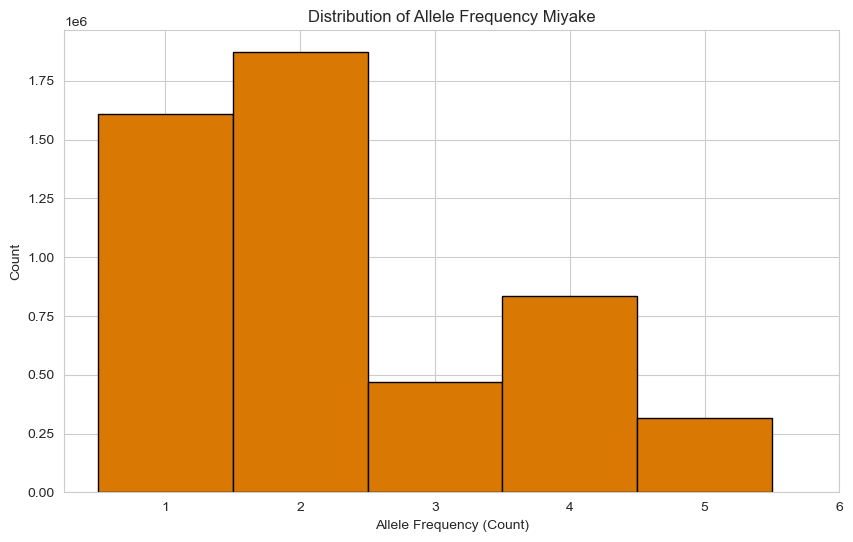

In [ ]:
# Plot histogram with integer bin alignment
plt.figure(figsize=(10, 6))
plt.hist(df_concat_Mi["allele_count"], bins=np.arange(1, 7) - 0.5, color="#d97904", edgecolor="black", align="mid")
plt.xlabel("Allele Frequency (Count)")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency Miyake")
plt.xticks(range(1, 7))  # Set x-ticks to integer values only
plt.grid(True)
plt.show()


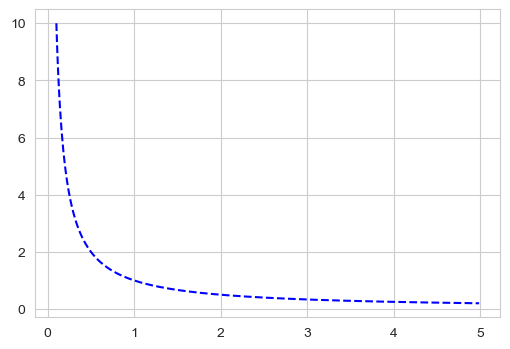

In [ ]:
# Convert MAF values to frequency bins based on their proportions
sfs_Mi = df_concat_Mi['maf'].value_counts().sort_index()  # Count occurrences per bin and sort

#### Calculate the neutral expectation line (1/k relationship) and scale to SFS data
neutral_expectation = np.array([1/k if k != 0 else 0 for k in np.arange(0.1, 5, 0.01)])
#neutral_expectation = neutral_expectation * (sum(sfs_Mi) / sum(neutral_expectation))


# Plot the neutral expectation line
plt.plot(np.arange(0.1, 5, 0.01), neutral_expectation, color="blue", linestyle="--", label="Neutral Expectation")
#plt.plot(neutral_expectation, color="blue", linestyle="--", label="Neutral Expectation")

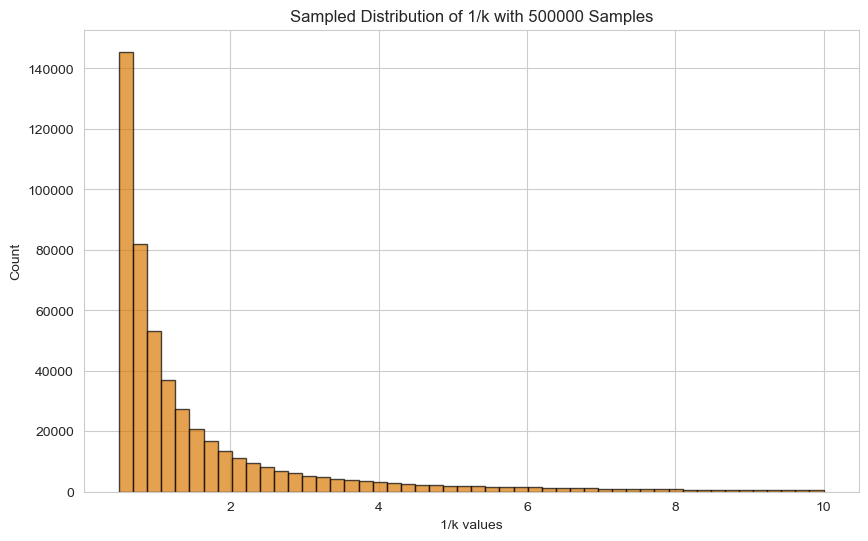

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples to draw
num_samples = 500000

# Define the range of k (0.1 to 0.5)
k_min = 0.1
k_max = 2

# Step 1: Generate uniform random values
u = np.random.uniform(0, 1, num_samples)

# Step 2: Use inverse transform sampling to sample from 1/k distribution
k_values_sampled = k_min * (1 - u) + k_max * u  # Linear transformation

# Calculate the corresponding 1/k values
y_values_sampled = 1 / k_values_sampled

# Plot the histogram of sampled 1/k values
plt.figure(figsize=(10, 6))
plt.hist(y_values_sampled, bins=50, color="#d97904", edgecolor="black", alpha=0.7)
plt.xlabel("1/k values")
plt.ylabel("Count")
plt.title(f"Sampled Distribution of 1/k with {num_samples} Samples")
plt.grid(True)
plt.show()


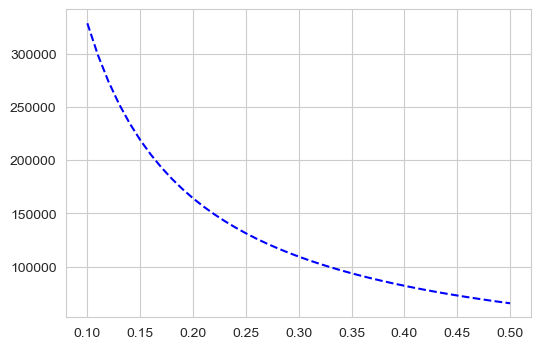

In [ ]:
# df_concat is now a single pandas DataFrame containing all the processed data
df_concat_Mi=df_concat
df_concat_Mi = df_concat_Mi[df_concat_Mi['maf'] > 0]

# Convert MAF values to frequency bins based on their proportions
sfs_Mi = df_concat_Mi['maf'].value_counts().sort_index()  # Count occurrences per bin and sort

# Create neutral expectation
bins = np.arange(0.1, 0.5 + 0.01, 0.01)
neutral_expectation = 1 / bins

# Scale the neutral expectation to match your observed counts for comparison
neutral_expectation_scaled = neutral_expectation * (sum(sfs_Mi) / sum(neutral_expectation))
neutral_expectation_scaled

plt.plot(np.arange(0.1, 0.5+0.01, 0.01), neutral_expectation_scaled, color="blue", linestyle="--", label="Neutral Expectation")

In [ ]:
sum(sfs_Mi) / sum(neutral_expectation)

32844.93591577885

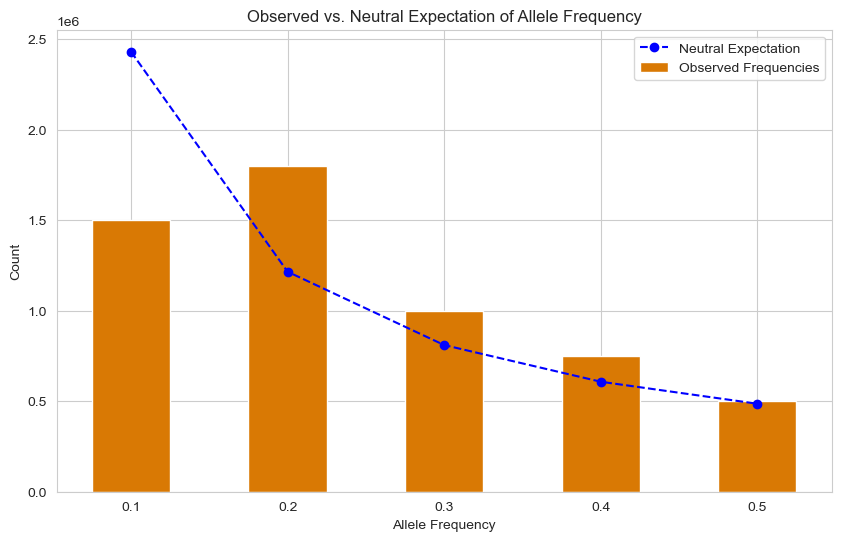

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the allele frequency bins (same as in your plot)
bins = np.array([0.1, 0.2, 0.3, 0.4, 0.5])

# Calculate the neutral expectation as 1/k
neutral_expectation = 1 / bins

# Scale the neutral expectation to match your observed counts for comparison
# Assuming we have observed counts from the plot to compare:
observed_counts = np.array([1.5e6, 1.8e6, 1.0e6, 0.75e6, 0.5e6])
neutral_expectation_scaled = neutral_expectation * (sum(observed_counts) / sum(neutral_expectation))

# Plot both observed data and neutral expectation for comparison
plt.figure(figsize=(10, 6))
plt.bar(bins, observed_counts, width=0.05, color="#d97904", label="Observed Frequencies")
plt.plot(bins, neutral_expectation_scaled, color="blue", linestyle="--", marker="o", label="Neutral Expectation")

# Add labels and title
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Observed vs. Neutral Expectation of Allele Frequency")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


## SFS for stairwayplot

In [ ]:
sfs = df['maf'].value_counts().sort_index() 
sfs

NameError: name 'df' is not defined

In [ ]:
len(df['maf'])

4071379

In [ ]:
df = df_concat_Mi


# Filter out invariant sites (where maf = 0)
df = df[df['maf'] > 0]

# Filter out invariant sites (where maf = 0)
df = df[df['maf'] > 0]

# Convert MAF values to frequency bins based on their proportions
#df['freq_bin'] = (df['maf'] * 100).astype(int)  # Convert to percentage-like bins if needed
#df['freq_bin'] = (df['maf'].astype(int))  # Convert to percentage-like bins if needed
sfs = df['freq_bin'].value_counts().sort_index()  # Count occurrences per bin and sort

# Create the SFS plot
plt.figure(figsize=(6, 6))
plt.bar(sfs.index, sfs.values, color="#d97904", label="Observed SFS")
plt.xlabel("Frequency Bin (in %)")
plt.ylabel("Count")
plt.title("Site Frequency Spectrum (SFS) Excluding Invariant Sites")
plt.grid(True)
plt.legend()
plt.show()

KeyError: 'freq_bin'

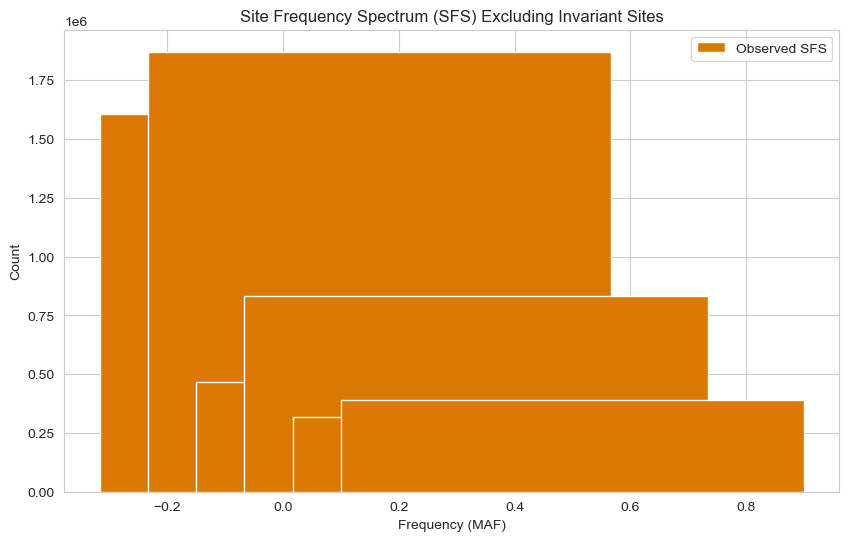

In [ ]:
df = df[df['maf'] > 0]

# Calculate SFS directly from MAF without further conversion
sfs = df['maf'].value_counts().sort_index()  # Count occurrences of each unique MAF value and sort

# Create the SFS plot
plt.figure(figsize=(10, 6))
plt.bar(sfs.index, sfs.values, color="#d97904", label="Observed SFS")
plt.xlabel("Frequency (MAF)")
plt.ylabel("Count")
plt.title("Site Frequency Spectrum (SFS) Excluding Invariant Sites")
plt.grid(True)
plt.legend()
plt.show()

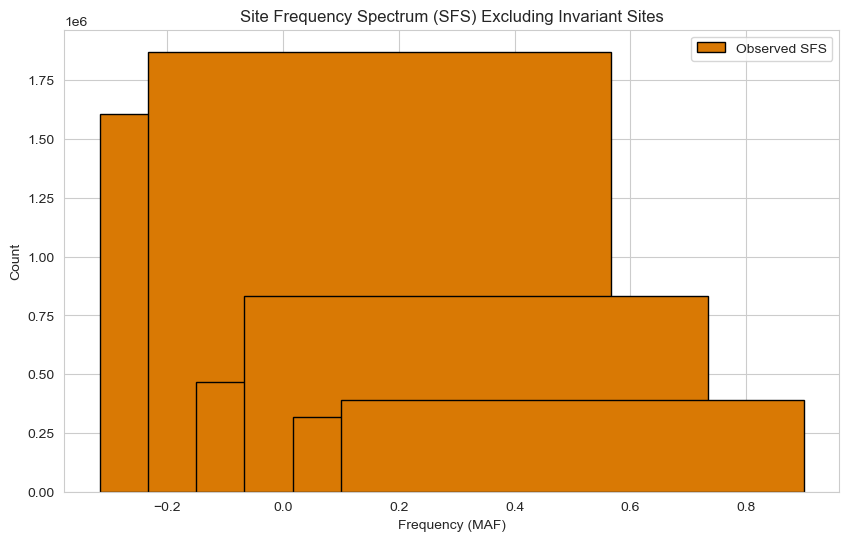

In [ ]:
# Calculate SFS by counting unique MAF values without converting to percentages
sfs = df['maf'].value_counts().reset_index()
sfs.columns = ['MAF', 'Count']  # Rename columns for clarity
sfs = sfs.sort_values('MAF').reset_index(drop=True)  # Sort by MAF

# Plot the SFS as a bar plot using the new DataFrame columns
plt.figure(figsize=(10, 6))
plt.bar(sfs['MAF'], sfs['Count'], color="#d97904", edgecolor="black", label="Observed SFS")
plt.xlabel("Frequency (MAF)")
plt.ylabel("Count")
plt.title("Site Frequency Spectrum (SFS) Excluding Invariant Sites")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
sfs

MAF    Count
0  0.083333  1607991
1  0.166667  1870769
2  0.250000   467505
3  0.333333   833857
4  0.416667   316536
5  0.500000   389225

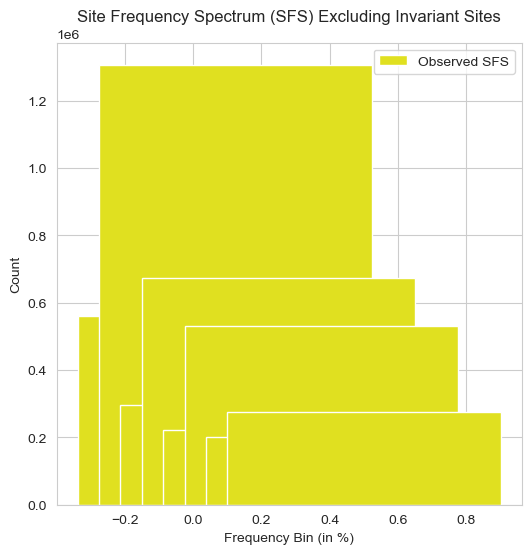

maf
0.0625     561169
0.1250    1307225
0.1875     296951
0.2500     674410
0.3125     221995
0.3750     532364
0.4375     200681
0.5000     276584
Name: count, dtype: int64

In [ ]:
df = df_concat_Na


# Filter out invariant sites (where maf = 0)
df = df[df['maf'] > 0]

# Filter out invariant sites (where maf = 0)
df = df[df['maf'] > 0]

# Convert MAF values to frequency bins based on their proportions
#df['freq_bin'] = (df['maf'] * 100).astype(int)  # Convert to percentage-like bins if needed
#df['freq_bin'] = (df['maf'].astype(int))  # Convert to percentage-like bins if needed
sfs = df['maf'].value_counts().sort_index()  # Count occurrences per bin and sort

# Create the SFS plot
plt.figure(figsize=(6, 6))
plt.bar(sfs.index, sfs.values, color="#e0e020", label="Observed SFS")
plt.xlabel("Frequency Bin (in %)")
plt.ylabel("Count")
plt.title("Site Frequency Spectrum (SFS) Excluding Invariant Sites")
plt.grid(True)
plt.legend()
plt.show()

sfs

In [ ]:
df

chr      pos  nalleles  nchr        a1        a2  \
17        VHQE01000408.1    11565         2    12  0.500000  0.500000   
18        VHQE01000408.1    11605         2    12  0.333333  0.666667   
19        VHQE01000408.1    11633         2    12  0.500000  0.500000   
20        VHQE01000408.1    11642         2    12  0.333333  0.666667   
21        VHQE01000408.1    11643         2    12  0.333333  0.666667   
...                  ...      ...       ...   ...       ...       ...   
11054499  VHQE01000480.1  2543340         2    12  0.833333  0.166667   
11054500  VHQE01000480.1  2543371         2    12  0.833333  0.166667   
11054501  VHQE01000480.1  2543396         2    12  0.833333  0.166667   
11054503  VHQE01000480.1  2543431         2    12  0.666667  0.333333   
11054504  VHQE01000480.1  2543435         2    12  0.666667  0.333333   

               maf  
17        0.500000  
18        0.333333  
19        0.500000  
20        0.333333  
21        0.333333  
...            ...  
11054499  0.166667  
11054500  0.166667  
11054501  0.166667  
11054503  0.333333  
11054504  0.333333  

[5485883 rows x 7 columns]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Load the data into a DataFrame
df = df_concat

# Calculate the SFS
# Group MAFs by their frequencies; multiply by number of chromosomes (nchr) to get integer counts for bins
df['freq_bin'] = (df['maf'] * df['nchr'][0]).astype(int)  # Multiply MAF by chromosome count and convert to integer bins
sfs = df['freq_bin'].value_counts().sort_index()  # Count occurrences per bin and sort

# Create the SFS plot
plt.figure(figsize=(10, 6))
plt.bar(sfs.index, sfs.values, color="#d97904", label="Observed SFS")
plt.xlabel("Frequency Bin")
plt.ylabel("Count")
plt.title("Site Frequency Spectrum (SFS)")
plt.grid(True)
plt.legend()
plt.show()

## PCA

In [ ]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae_noindel_variant_Qfilter.pruned.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
#df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('-')[:1]))

df

FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0   PijimaeMi-U5645  0.307317  0.007858  0.015542  0.011824  0.006862   
1   PijimaeMi-U5649  0.308265  0.011743  0.017711  0.009719  0.008269   
2   PijimaeMi-U5708  0.309035 -0.007882 -0.008355 -0.001530 -0.002500   
3   PijimaeMi-U5709  0.308783  0.014723  0.020108  0.002877  0.006437   
4   PijimaeMi-U5710  0.309480 -0.030727 -0.037132 -0.019733 -0.018228   
5   PijimaeMi-U5711  0.308666  0.000652 -0.003616 -0.002217  0.000343   
6   PijimaeNa-U5147 -0.229436 -0.165877 -0.191309 -0.149509 -0.115582   
7   PijimaeNa-U5148 -0.231648 -0.138346 -0.280591  0.873295  0.092660   
8   PijimaeNa-U5149 -0.233050 -0.123603  0.856579  0.099987  0.034644   
9   PijimaeNa-U5150 -0.233876 -0.103964  0.200710 -0.069470 -0.048206   
10  PijimaeNa-U5151 -0.231708 -0.118374 -0.193719 -0.328385  0.820876   
11  PijimaeNa-U5152 -0.229493  0.933846 -0.022901  0.001403 -0.017908   
12  PijimaeNa-U5153 -0.230955 -0.124558 -0.169143 -0.210844 -0.434860   
13  PijimaeNa-U5154 -0.231556 -0.155695 -0.203900 -0.217365 -0.332828   

        PCA6      PCA7      PCA8      PCA9      popID  
0  -0.005722 -0.018302  0.027717  0.293823  PijimaeMi  
1  -0.013297 -0.017747  0.023704 -0.590400  PijimaeMi  
2   0.003144  0.006794 -0.006124  0.301351  PijimaeMi  
3  -0.003762 -0.011091  0.022785 -0.559270  PijimaeMi  
4   0.016689  0.039670 -0.061390  0.232621  PijimaeMi  
5   0.003344  0.001021 -0.001515  0.322171  PijimaeMi  
6   0.084690  0.495903 -0.715981 -0.050481  PijimaeNa  
7  -0.019498 -0.062723  0.036327  0.001258  PijimaeNa  
8   0.017839 -0.247294 -0.226485  0.021584  PijimaeNa  
9   0.001891  0.656575  0.619854  0.009324  PijimaeNa  
10 -0.084383 -0.177215  0.054922  0.005141  PijimaeNa  
11  0.024465 -0.002429 -0.037409  0.018493  PijimaeNa  
12 -0.713916 -0.285655  0.078623  0.004832  PijimaeNa  
13  0.688627 -0.377488  0.185152 -0.009951  PijimaeNa

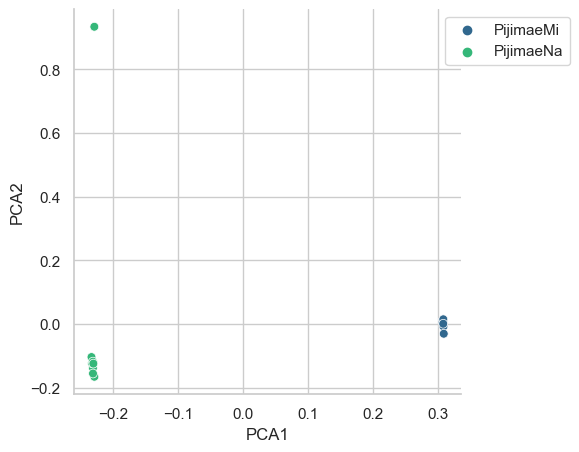

In [ ]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#plt.scatter(df['PCA1'], df['PCA2'], c=df['popID'], s=40, cmap='magma')

# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=40, palette="viridis")
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
#sns.despine(offset=2, trim=True)
#plt.ylabel("PCA 2 ("+ (split_eigval[1])+"%)")
#plt.xlabel("PCA 1 ("+split_eigval[0]+"%)")
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
#plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()
#plt.rcParams['figure.figsize'] = (7.0, 7.0)

# Show the plot
plt.show()

#Miyake color: "#F7D57C"
#nakanoshima color="#5F5B11"

### PCA ingroup: full, LD prune

In [ ]:
import pandas as pd
import re


# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/Pijimae_noindel_variant_Qfilter_19reg_biall.pruned.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df=df.drop(df.columns[[0,11,12,13,14,15]], axis=1)
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
#df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('-')[:1]))

eigval = open("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/Pijimae_noindel_variant_Qfilter_19reg_biall.pruned.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[0])

df

10.609


FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0   PijimaeMi-U5645  0.306364  0.013652  0.028117  0.016907  0.004348   
1   PijimaeMi-U5649  0.308282  0.006101  0.011565  0.008742 -0.000508   
2   PijimaeMi-U5708  0.309444 -0.005892 -0.007794 -0.002690  0.000438   
3   PijimaeMi-U5709  0.308803  0.016063  0.025195  0.008893 -0.001276   
4   PijimaeMi-U5710  0.309901 -0.036034 -0.050157 -0.028019 -0.007775   
5   PijimaeMi-U5711  0.308820  0.002770 -0.002209 -0.002747  0.004943   
6   PijimaeNa-U5147 -0.228493 -0.180729 -0.241214 -0.175443 -0.056653   
7   PijimaeNa-U5148 -0.231758 -0.130237 -0.189387  0.902271  0.008432   
8   PijimaeNa-U5149 -0.233065 -0.111583  0.856970  0.012744 -0.007877   
9   PijimaeNa-U5150 -0.233653 -0.096474  0.211370 -0.076218 -0.018577   
10  PijimaeNa-U5151 -0.231581 -0.122802 -0.188269 -0.236577  0.802310   
11  PijimaeNa-U5152 -0.229451  0.932881 -0.040293 -0.010824 -0.014825   
12  PijimaeNa-U5153 -0.231634 -0.138550 -0.209321 -0.257852 -0.577980   
13  PijimaeNa-U5154 -0.231980 -0.149169 -0.204574 -0.159187 -0.135000   

        PCA6      PCA7      PCA8      PCA9      popID  
0  -0.014807 -0.015078  0.047874 -0.299885  PijimaeMi  
1  -0.023274 -0.012575  0.022870  0.618543  PijimaeMi  
2   0.005043  0.005748 -0.012466 -0.313360  PijimaeMi  
3  -0.005240 -0.006346  0.029403  0.525154  PijimaeMi  
4   0.030020  0.025897 -0.079643 -0.196091  PijimaeMi  
5   0.007474  0.002504 -0.001579 -0.334632  PijimaeMi  
6   0.179647  0.298214 -0.783842  0.047899  PijimaeNa  
7  -0.074871 -0.041973  0.008082 -0.006958  PijimaeNa  
8   0.008663 -0.293882 -0.197604 -0.017131  PijimaeNa  
9  -0.001093  0.791666  0.431801 -0.006963  PijimaeNa  
10 -0.282690 -0.184312  0.103547 -0.001140  PijimaeNa  
11  0.020430 -0.010937 -0.045754 -0.012243  PijimaeNa  
12 -0.583660 -0.230567  0.131141 -0.012111  PijimaeNa  
13  0.734359 -0.328357  0.346169  0.008918  PijimaeNa

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_82244/767752929.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60, alpha=0.6, palette=custom_palette)


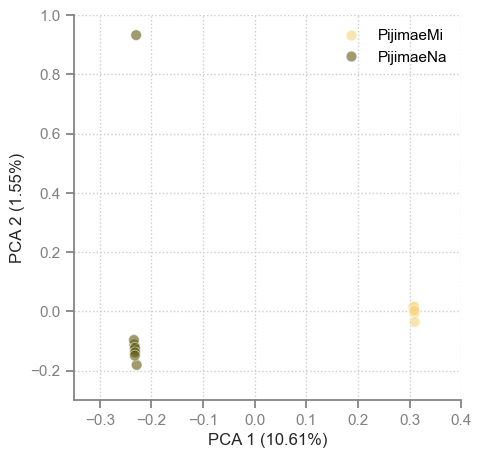

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)

#plt.title('Histogram of avg_hudson_fst with Density Curve')
#plt.xlabel(r'$F_{st}$', size = 16)
#plt.ylabel(r'Number of windows', size = 16)

# Custom color palette
base_colors = ["#F7D57C", "#5F5B11"]  # Miyake and nakanoshima colors
# Generate three additional colors that are harmonious
additional_colors = sns.color_palette("autumn", 3)  # You can choose other palettes like 'husl', 'coolwarm', etc.
custom_palette = sns.color_palette(base_colors + additional_colors)


# Plot scatterplot with the custom palette
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['popID'], s=60, alpha=0.6, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PCA 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
plt.xlabel("PCA 1 (" + str(round(float(split_eigval[0]), 2)) + "%)", size=12)
plt.xlim(-0.35,0.4)
plt.ylim(-0.3,1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()


# Show the plot
plt.show()

#Miyake color: "#F7D57C"
#nakanoshima color="#5F5B11"

In [ ]:
sns.axes_style("ticks")

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': False,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': True,
 'ytick.left': True}

### PCA outgroup: LD prune

In [ ]:
import pandas as pd
import re


# Read the data from the file
df2 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k_004r2.pruned.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df2=df2.drop(df2.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df2.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
#df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df2["popID"] = df2.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df2["popID2"] =["P.cebuensis", "P.coronatus","P.coronatus","P.coronatus","P.coronatus","P.coronatus","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.olivaceus","P.olivaceus"]

eigval = open("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k_004r2.pruned.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[0])

df2

19.2681


FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0         PcebuPut_PcebuPut -0.221134 -0.192353 -0.447465 -0.052837 -0.795430   
1       PcorU4722_PcorU4722 -0.233850 -0.149877  0.288354  0.514025  0.059259   
2       PcorU4779_PcorU4779 -0.235569 -0.147964  0.280367  0.548060 -0.146604   
3   Pcoro16323A_Pcoro16323A -0.231387 -0.153216  0.278990 -0.378722 -0.078074   
4   Pcoro16348A_Pcoro16348A -0.234548 -0.146896  0.277319 -0.490760  0.039519   
5   Pcoro16349A_Pcoro16349A -0.235264 -0.146913  0.270622 -0.205050  0.132971   
6   PijiMiU5645_PijiMiU5645 -0.049905  0.344068 -0.013114  0.013818  0.013662   
7   PijiMiU5649_PijiMiU5649 -0.051130  0.343216 -0.023260 -0.012984  0.006923   
8   PijiMiU5708_PijiMiU5708 -0.050139  0.343699 -0.019291  0.011234  0.011946   
9   PijiMiU5709_PijiMiU5709 -0.050718  0.342790 -0.023238 -0.010899 -0.033816   
10  PijiMiU5710_PijiMiU5710 -0.051411  0.345270 -0.019193 -0.002764  0.006852   
11  PijiMiU5711_PijiMiU5711 -0.049991  0.345701 -0.024860  0.001634 -0.008316   
12  PijiNaU5147_PijiNaU5147  0.265806 -0.094002  0.008772 -0.006977  0.004401   
13  PijiNaU5148_PijiNaU5148  0.265298 -0.093277  0.009742 -0.005304  0.008481   
14  PijiNaU5149_PijiNaU5149  0.265224 -0.091080  0.012333 -0.038275 -0.005051   
15  PijiNaU5150_PijiNaU5150  0.265749 -0.093021  0.008277 -0.024524  0.017870   
16  PijiNaU5151_PijiNaU5151  0.266218 -0.092219  0.007898  0.023985  0.000270   
17  PijiNaU5152_PijiNaU5152  0.264976 -0.092849  0.015830  0.020418 -0.005967   
18  PijiNaU5153_PijiNaU5153  0.264961 -0.093058  0.014550  0.017393 -0.003517   
19  PijiNaU5154_PijiNaU5154  0.266574 -0.091297  0.008014  0.015448 -0.014188   
20  PolivU1675B_PolivU1675B -0.220957 -0.190816 -0.452704  0.031896  0.413836   
21    PolivU1676_PolivU1676 -0.220254 -0.190936 -0.448899  0.031423  0.378636   

        PCA6      PCA7      PCA8      PCA9        popID       popID2  
0   0.049388  0.071010 -0.154500 -0.001600     PcebuPut  P.cebuensis  
1  -0.204312 -0.188178 -0.659902  0.059966    PcorU4722  P.coronatus  
2  -0.008984  0.181645  0.658202 -0.056099    PcorU4779  P.coronatus  
3   0.050880 -0.771329  0.204480  0.042120  Pcoro16323A  P.coronatus  
4  -0.594683  0.445158 -0.014209 -0.034106  Pcoro16348A  P.coronatus  
5   0.770770  0.343057 -0.184128 -0.000755  Pcoro16349A  P.coronatus  
6  -0.033481 -0.005696 -0.125281 -0.386844  PijiMiU5645   P.ijimae M  
7   0.012316 -0.031616  0.018833  0.020784  PijiMiU5649   P.ijimae M  
8  -0.003829  0.050385  0.015626  0.031708  PijiMiU5708   P.ijimae M  
9   0.029496 -0.022275  0.033678 -0.206966  PijiMiU5709   P.ijimae M  
10  0.013676 -0.054870  0.016961 -0.298884  PijiMiU5710   P.ijimae M  
11 -0.015258  0.055148  0.035303  0.839716  PijiMiU5711   P.ijimae M  
12 -0.002743 -0.026740  0.006952 -0.001810  PijiNaU5147   P.ijimae N  
13 -0.001420  0.005857 -0.013636  0.008268  PijiNaU5148   P.ijimae N  
14 -0.007471  0.029475  0.003390 -0.010446  PijiNaU5149   P.ijimae N  
15 -0.005854  0.015334 -0.018627  0.013136  PijiNaU5150   P.ijimae N  
16  0.005497  0.005772  0.002437 -0.001146  PijiNaU5151   P.ijimae N  
17  0.003892  0.017022 -0.018781 -0.026576  PijiNaU5152   P.ijimae N  
18 -0.007083 -0.023570  0.009700  0.026797  PijiNaU5153   P.ijimae N  
19  0.023161 -0.007874  0.025130 -0.006321  PijiNaU5154   P.ijimae N  
20 -0.043761 -0.033474  0.060147 -0.009724  PolivU1675B  P.olivaceus  
21 -0.013788 -0.041433  0.085172  0.005286   PolivU1676  P.olivaceus

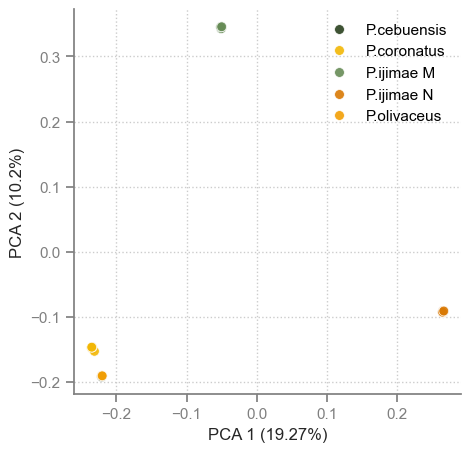

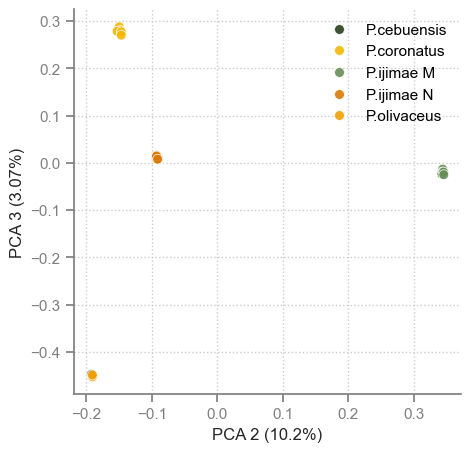

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)

#plt.title('Histogram of avg_hudson_fst with Density Curve')
#plt.xlabel(r'$F_{st}$', size = 16)
#plt.ylabel(r'Number of windows', size = 16)

# Custom color palette
base_colors = ["#F7D57C", "#5F5B11"]  # Miyake and nakanoshima colors
# Generate three additional colors that are harmonious
additional_colors = sns.color_palette("autumn", 3)  # You can choose other palettes like 'husl', 'coolwarm', etc.
custom_palette = sns.color_palette(base_colors + additional_colors)

custom_palette = ["#29401E", "#F2B705","#678C56","#D97904","#F29F05"]


# Plot scatterplot with the custom palette
sns.scatterplot(x=df2['PCA1'], y=df2['PCA2'], hue=df2['popID2'], s=50, alpha=0.9, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PCA 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
plt.xlabel("PCA 1 (" + str(round(float(split_eigval[0]), 2)) + "%)", size=12)
#plt.xlim(-0.35,-0.1)
#plt.ylim(-0.3,-0.1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()


# Show the plot
plt.show()

# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)


# Plot scatterplot with the custom palette
sns.scatterplot(x=df2['PCA2'], y=df2['PCA3'], hue=df2['popID2'], s=50, alpha=0.9, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PCA 3 (" + str(round(float(split_eigval[2]), 2)) + "%)", size=12)
plt.xlabel("PCA 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
#plt.xlim(-0.35,-0.1)
#plt.ylim(-0.3,-0.1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()


# Show the plot
plt.show()
#Miyake color: "#F7D57C"
#nakanoshima color="#5F5B11"

In [ ]:
df2

FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0         PcebuPut_PcebuPut -0.221134 -0.192353 -0.447465 -0.052837 -0.795430   
1       PcorU4722_PcorU4722 -0.233850 -0.149877  0.288354  0.514025  0.059259   
2       PcorU4779_PcorU4779 -0.235569 -0.147964  0.280367  0.548060 -0.146604   
3   Pcoro16323A_Pcoro16323A -0.231387 -0.153216  0.278990 -0.378722 -0.078074   
4   Pcoro16348A_Pcoro16348A -0.234548 -0.146896  0.277319 -0.490760  0.039519   
5   Pcoro16349A_Pcoro16349A -0.235264 -0.146913  0.270622 -0.205050  0.132971   
6   PijiMiU5645_PijiMiU5645 -0.049905  0.344068 -0.013114  0.013818  0.013662   
7   PijiMiU5649_PijiMiU5649 -0.051130  0.343216 -0.023260 -0.012984  0.006923   
8   PijiMiU5708_PijiMiU5708 -0.050139  0.343699 -0.019291  0.011234  0.011946   
9   PijiMiU5709_PijiMiU5709 -0.050718  0.342790 -0.023238 -0.010899 -0.033816   
10  PijiMiU5710_PijiMiU5710 -0.051411  0.345270 -0.019193 -0.002764  0.006852   
11  PijiMiU5711_PijiMiU5711 -0.049991  0.345701 -0.024860  0.001634 -0.008316   
12  PijiNaU5147_PijiNaU5147  0.265806 -0.094002  0.008772 -0.006977  0.004401   
13  PijiNaU5148_PijiNaU5148  0.265298 -0.093277  0.009742 -0.005304  0.008481   
14  PijiNaU5149_PijiNaU5149  0.265224 -0.091080  0.012333 -0.038275 -0.005051   
15  PijiNaU5150_PijiNaU5150  0.265749 -0.093021  0.008277 -0.024524  0.017870   
16  PijiNaU5151_PijiNaU5151  0.266218 -0.092219  0.007898  0.023985  0.000270   
17  PijiNaU5152_PijiNaU5152  0.264976 -0.092849  0.015830  0.020418 -0.005967   
18  PijiNaU5153_PijiNaU5153  0.264961 -0.093058  0.014550  0.017393 -0.003517   
19  PijiNaU5154_PijiNaU5154  0.266574 -0.091297  0.008014  0.015448 -0.014188   
20  PolivU1675B_PolivU1675B -0.220957 -0.190816 -0.452704  0.031896  0.413836   
21    PolivU1676_PolivU1676 -0.220254 -0.190936 -0.448899  0.031423  0.378636   

        PCA6      PCA7      PCA8      PCA9        popID       popID2  
0   0.049388  0.071010 -0.154500 -0.001600     PcebuPut  P.cebuensis  
1  -0.204312 -0.188178 -0.659902  0.059966    PcorU4722  P.coronatus  
2  -0.008984  0.181645  0.658202 -0.056099    PcorU4779  P.coronatus  
3   0.050880 -0.771329  0.204480  0.042120  Pcoro16323A  P.coronatus  
4  -0.594683  0.445158 -0.014209 -0.034106  Pcoro16348A  P.coronatus  
5   0.770770  0.343057 -0.184128 -0.000755  Pcoro16349A  P.coronatus  
6  -0.033481 -0.005696 -0.125281 -0.386844  PijiMiU5645   P.ijimae M  
7   0.012316 -0.031616  0.018833  0.020784  PijiMiU5649   P.ijimae M  
8  -0.003829  0.050385  0.015626  0.031708  PijiMiU5708   P.ijimae M  
9   0.029496 -0.022275  0.033678 -0.206966  PijiMiU5709   P.ijimae M  
10  0.013676 -0.054870  0.016961 -0.298884  PijiMiU5710   P.ijimae M  
11 -0.015258  0.055148  0.035303  0.839716  PijiMiU5711   P.ijimae M  
12 -0.002743 -0.026740  0.006952 -0.001810  PijiNaU5147   P.ijimae N  
13 -0.001420  0.005857 -0.013636  0.008268  PijiNaU5148   P.ijimae N  
14 -0.007471  0.029475  0.003390 -0.010446  PijiNaU5149   P.ijimae N  
15 -0.005854  0.015334 -0.018627  0.013136  PijiNaU5150   P.ijimae N  
16  0.005497  0.005772  0.002437 -0.001146  PijiNaU5151   P.ijimae N  
17  0.003892  0.017022 -0.018781 -0.026576  PijiNaU5152   P.ijimae N  
18 -0.007083 -0.023570  0.009700  0.026797  PijiNaU5153   P.ijimae N  
19  0.023161 -0.007874  0.025130 -0.006321  PijiNaU5154   P.ijimae N  
20 -0.043761 -0.033474  0.060147 -0.009724  PolivU1675B  P.olivaceus  
21 -0.013788 -0.041433  0.085172  0.005286   PolivU1676  P.olivaceus

In [ ]:
# Read the data from the file
df2 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k_thin.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df2=df2.drop(df2.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df2.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
#df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df2["popID"] = df2.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df2["popID2"] =["P.cebuensis", "P.coronatus","P.coronatus","P.coronatus","P.coronatus","P.coronatus","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.olivaceus","P.olivaceus"]

eigval = open("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k_thin.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[0])

14.8948


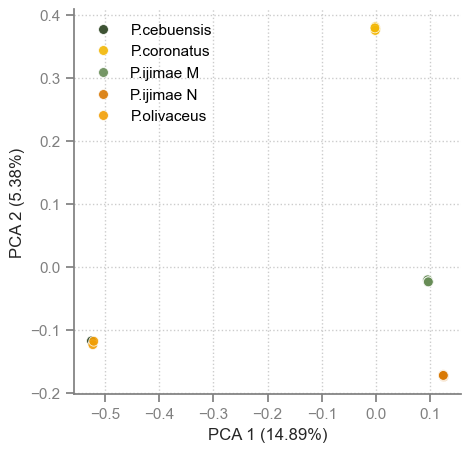

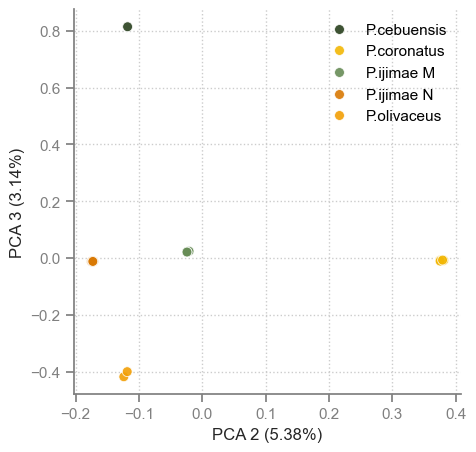

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)

#plt.title('Histogram of avg_hudson_fst with Density Curve')
#plt.xlabel(r'$F_{st}$', size = 16)
#plt.ylabel(r'Number of windows', size = 16)

# Custom color palette
base_colors = ["#F7D57C", "#5F5B11"]  # Miyake and nakanoshima colors
# Generate three additional colors that are harmonious
additional_colors = sns.color_palette("autumn", 3)  # You can choose other palettes like 'husl', 'coolwarm', etc.
custom_palette = sns.color_palette(base_colors + additional_colors)

custom_palette = ["#29401E", "#F2B705","#678C56","#D97904","#F29F05"]


# Plot scatterplot with the custom palette
sns.scatterplot(x=df2['PCA1'], y=df2['PCA2'], hue=df2['popID2'], s=50, alpha=0.9, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PCA 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
plt.xlabel("PCA 1 (" + str(round(float(split_eigval[0]), 2)) + "%)", size=12)
#plt.xlim(-0.35,-0.1)
#plt.ylim(-0.3,-0.1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()


# Show the plot
plt.show()

# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)


# Plot scatterplot with the custom palette
sns.scatterplot(x=df2['PCA2'], y=df2['PCA3'], hue=df2['popID2'], s=50, alpha=0.9, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PCA 3 (" + str(round(float(split_eigval[2]), 2)) + "%)", size=12)
plt.xlabel("PCA 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
#plt.xlim(-0.35,-0.1)
#plt.ylim(-0.3,-0.1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()


# Show the plot
plt.show()
#Miyake color: "#F7D57C"
#nakanoshima color="#5F5B11"

In [ ]:
# Read the data from the file
df2 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k.pruned.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df2=df2.drop(df2.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
df2.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
#df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
df2["popID"] = df2.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df2["popID2"] =["P. cebuensis", "P. coronatus","P. coronatus","P. coronatus","P. coronatus","P. coronatus","P. ijimae M","P. ijimae M","P. ijimae M","P. ijimae M","P. ijimae M","P. ijimae M","P. ijimae N","P. ijimae N","P. ijimae N","P. ijimae N","P. ijimae N","P. ijimae N","P. ijimae N","P. ijimae N","P. olivaceus","P. olivaceus"]

eigval = open("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k.pruned.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[0])

14.1969


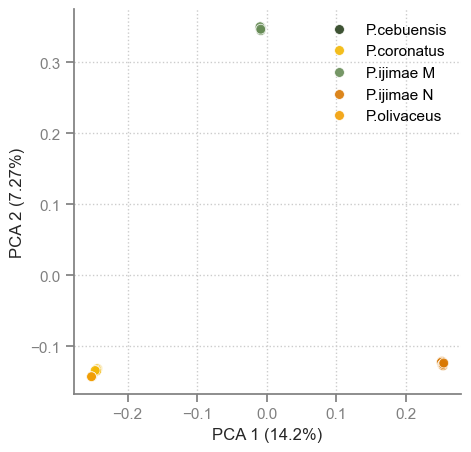

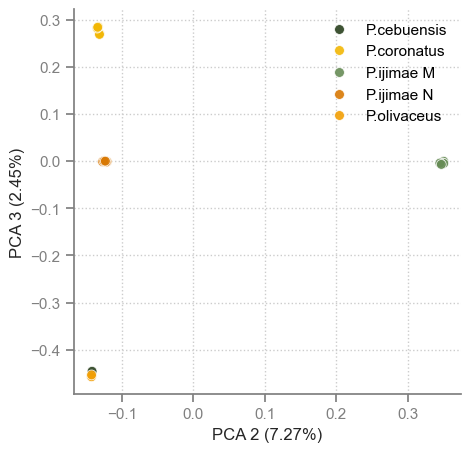

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)

#plt.title('Histogram of avg_hudson_fst with Density Curve')
#plt.xlabel(r'$F_{st}$', size = 16)
#plt.ylabel(r'Number of windows', size = 16)

# Custom color palette
base_colors = ["#F7D57C", "#5F5B11"]  # Miyake and nakanoshima colors
# Generate three additional colors that are harmonious
additional_colors = sns.color_palette("autumn", 3)  # You can choose other palettes like 'husl', 'coolwarm', etc.
custom_palette = sns.color_palette(base_colors + additional_colors)

custom_palette = ["#29401E", "#F2B705","#678C56","#D97904","#F29F05"]


# Plot scatterplot with the custom palette
sns.scatterplot(x=df2['PCA1'], y=df2['PCA2'], hue=df2['popID2'], s=50, alpha=0.9, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PCA 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
plt.xlabel("PCA 1 (" + str(round(float(split_eigval[0]), 2)) + "%)", size=12)
#plt.xlim(-0.35,-0.1)
#plt.ylim(-0.3,-0.1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()


# Show the plot
plt.show()

# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)


# Plot scatterplot with the custom palette
sns.scatterplot(x=df2['PCA2'], y=df2['PCA3'], hue=df2['popID2'], s=50, alpha=0.9, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PCA 3 (" + str(round(float(split_eigval[2]), 2)) + "%)", size=12)
plt.xlabel("PCA 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
#plt.xlim(-0.35,-0.1)
#plt.ylim(-0.3,-0.1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()


# Show the plot
plt.show()
#Miyake color: "#F7D57C"
#nakanoshima color="#5F5B11"

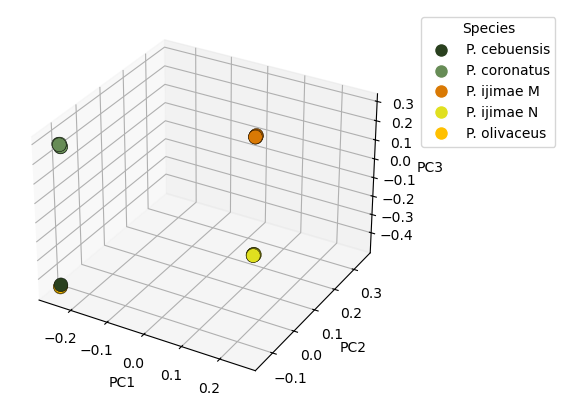

In [ ]:
# Plot initialisation
# label the axes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

df2["species"]=pd.Categorical(df2["popID2"])
my_color=df2["species"].cat.codes

plt.rcParams['figure.figsize'] = (5, 5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#colors = ["#29401e","#678c56","#d97904","#e0e020","#ffc000","#806000"]
#ax.scatter(df2['PCA1'], df2['PCA2'], df2['PCA3'], edgecolors='black', linewidth=0.2,s=50, alpha=0.7,c=my_color, cmap=mcolors.ListedColormap(['#29401E', '#F2B705', '#678C56', '#D97904', '#F29F05']))
ax.scatter(df2['PCA1'], df2['PCA2'], df2['PCA3'], edgecolors='black',depthshade=True,linewidth=0.3, s=100, alpha=1,c=my_color, cmap=mcolors.ListedColormap(["#29401e","#678c56","#d97904","#e0e020","#ffc000"]))

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
#ax.set_title("PCA on the Phylloscopus data set")

colors= ["#29401e","#678c56","#d97904","#e0e020","#ffc000"]

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label=label)
           for col, label in zip(colors, df2["species"].cat.categories)]
#ax.legend(handles=handles, title="Species")
legend = ax.legend(handles=handles, title="Species", loc='upper left', bbox_to_anchor=(1.05, 1))

plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/3dpca_ijimae2.pdf",bbox_inches="tight")

## PCA with equal sampling

In [ ]:
import pandas as pd
import re


# Read the data from the file
df2 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k_equal_sample.pruned.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df2=df2.drop(df2.columns[[0]], axis=1)
df2.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
#df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#df2["popID"] = df2.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df2["popID2"] =["P.cebuensis", "P.coronatus","P.coronatus","P.ijimae M","P.ijimae M","P.ijimae N","P.ijimae N","P.olivaceus","P.olivaceus"]

eigval = open("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k_equal_sample.pruned.eigenval").read()
split_eigval = eigval.split('\n')
print(split_eigval[0])

df2

5.94137


FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0        PcebuPut_PcebuPut -0.304559 -0.131878 -0.323480  0.005629 -0.008082   
1  Pcoro16323A_Pcoro16323A -0.234459 -0.058091  0.574589  0.707232 -0.027526   
2  Pcoro16349A_Pcoro16349A -0.238649 -0.057357  0.574761 -0.705785  0.029519   
3  PijiMiU5708_PijiMiU5708  0.172562  0.593696 -0.063329  0.028382  0.708315   
4  PijiMiU5709_PijiMiU5709  0.169657  0.598978 -0.061659 -0.028687 -0.704617   
5  PijiNaU5148_PijiNaU5148  0.522167 -0.339046 -0.011505  0.001129  0.003232   
6  PijiNaU5154_PijiNaU5154  0.524105 -0.337506 -0.012371 -0.004814 -0.007722   
7  PolivU1675B_PolivU1675B -0.307884 -0.133991 -0.338529 -0.001270  0.006327   
8    PolivU1676_PolivU1676 -0.307607 -0.133710 -0.334900 -0.001979  0.000806   

       PCA6      PCA7      PCA8      PCA9       popID2  
0 -0.034764 -0.820733 -0.009413 -0.331987  P.cebuensis  
1 -0.002854  0.009563 -0.000566 -0.332366  P.coronatus  
2  0.002261  0.000426 -0.001127 -0.332260  P.coronatus  
3 -0.004739 -0.006230  0.003179 -0.333393   P.ijimae M  
4  0.007034  0.006477 -0.002114 -0.333521   P.ijimae M  
5  0.707046 -0.029777  0.005813 -0.333783   P.ijimae N  
6 -0.705805  0.030037 -0.004813 -0.334787   P.ijimae N  
7  0.022531  0.411727 -0.700247 -0.335019  P.olivaceus  
8  0.011171  0.393594  0.713787 -0.332872  P.olivaceus

In [6]:
# Plot scatterplot with the custom palette
sns.scatterplot(x=df2['PCA2'], y=df2['PCA3'], hue=df2['popID2'], s=50, alpha=0.9, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PCA 3 (" + str(round(float(split_eigval[2]), 2)) + "%)", size=12)
plt.xlabel("PCA 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
#plt.xlim(-0.35,-0.1)
#plt.ylim(-0.3,-0.1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
#for i in range(len(df)):
#       plt.text(df['PCA1'][i], df['PCA2'][i], df['ID'][i], ha='center', va='center', fontsize=10)

# Adjust plot aesthetics
sns.despine()


# Show the plot
plt.show()

KeyError: 'popID2'

## NEW PCA PLOT MAY 2025

In [24]:
import pandas as pd
import re


# Read the data from the file
df2 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k_oli_cebu.pruned.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df2=df2.drop(df2.columns[[0]], axis=1)
df2.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","FulID", "CA1","CA2","CA3","CA4","CA5","CA6","CA7","CA8","CA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
#df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#df2["popID"] = df2.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df2["popID2"] =["P.coronatus","P.coronatus","P.coronatus","P.coronatus","P.coronatus","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N"]

eigval = open("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k_oli_cebu.pruned.eigenval").read()
print(eigval)
split_eigval = eigval.split('\n')
print(split_eigval[0])

df2

12.322
7.12356
0.697926
0.67288
0.656271
0.651779
0.627381
0.621698
0.612238
0.569806
0.556817
0.35679
0.32693
0.316651
0.311577
0.281968
0.275564
0.164984
-0.0269566

12.322


FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0       PcorU4722_PcorU4722  0.316082  0.213450 -0.069610  0.451763  0.177508   
1       PcorU4779_PcorU4779  0.317073  0.213748 -0.014103  0.525343  0.294164   
2   Pcoro16323A_Pcoro16323A  0.317485  0.216042 -0.279211 -0.673039  0.497277   
3   Pcoro16348A_Pcoro16348A  0.318025  0.217243 -0.467702 -0.075607 -0.719140   
4   Pcoro16349A_Pcoro16349A  0.320189  0.216627  0.828246 -0.222893 -0.245455   
5   PijiMiU5645_PijiMiU5645  0.060000 -0.333902  0.019821  0.022979 -0.054089   
6   PijiMiU5649_PijiMiU5649  0.061226 -0.332564 -0.017572 -0.094970  0.033619   
7   PijiMiU5708_PijiMiU5708  0.059100 -0.332503 -0.044698  0.040000 -0.128179   
8   PijiMiU5709_PijiMiU5709  0.061113 -0.334322  0.088580  0.005321  0.187129   
9   PijiMiU5710_PijiMiU5710  0.059395 -0.330043 -0.007132  0.006021 -0.005922   
10  PijiMiU5711_PijiMiU5711  0.059664 -0.331830 -0.038807  0.016221 -0.036963   
11  PijiNaU5147_PijiNaU5147 -0.242782  0.115624 -0.004418 -0.006355 -0.003737   
12  PijiNaU5148_PijiNaU5148 -0.243828  0.114660  0.001860  0.000827  0.004897   
13  PijiNaU5149_PijiNaU5149 -0.242072  0.111113 -0.002664 -0.002345 -0.011047   
14  PijiNaU5150_PijiNaU5150 -0.241557  0.112401  0.000012 -0.000165 -0.005862   
15  PijiNaU5151_PijiNaU5151 -0.243072  0.115560 -0.000797  0.004654  0.000421   
16  PijiNaU5152_PijiNaU5152 -0.244073  0.116772  0.000256  0.000403 -0.001541   
17  PijiNaU5153_PijiNaU5153 -0.244037  0.114960  0.000499  0.000790  0.005515   
18  PijiNaU5154_PijiNaU5154 -0.244707  0.113118  0.011242  0.001547  0.011474   

        PCA6      PCA7      PCA8      PCA9  ...       CA1       CA2       CA3  \
0   0.048700  0.017968  0.067586  0.030536  ... -0.003906 -0.001318  0.002326   
1   0.049672 -0.018376 -0.033057  0.029862  ...  0.001666  0.003014 -0.003270   
2   0.037548  0.133869 -0.036377 -0.015193  ... -0.024314  0.001375  0.000920   
3  -0.177486 -0.134549  0.008370 -0.025322  ...  0.013550 -0.006346  0.007804   
4   0.041521  0.003520 -0.007801 -0.019698  ...  0.011003  0.000180 -0.005162   
5  -0.268417  0.510240  0.447865  0.308268  ... -0.444887 -0.000064 -0.002816   
6   0.369850 -0.630843  0.225971  0.486326  ... -0.015603 -0.000290 -0.002719   
7   0.309677  0.290337 -0.767369  0.166252  ... -0.124291 -0.005845  0.004373   
8  -0.711683 -0.394403 -0.280553 -0.195605  ... -0.087679 -0.000568 -0.003118   
9  -0.075313  0.253704  0.144321  0.007149  ...  0.862420  0.008627  0.004086   
10  0.378898 -0.027089  0.229708 -0.774216  ... -0.183846  0.001302 -0.002746   
11 -0.001877  0.001158  0.000870  0.000226  ... -0.000535 -0.071400 -0.086395   
12  0.002011  0.001281 -0.002877  0.000530  ...  0.008802 -0.239464  0.079456   
13 -0.004002 -0.004341  0.000777  0.001667  ...  0.003024  0.001816  0.016862   
14 -0.001637 -0.003324  0.000838 -0.001310  ... -0.000351 -0.028421 -0.001559   
15 -0.003889  0.000680  0.002239  0.000505  ... -0.005315 -0.087342 -0.185168   
16  0.001698 -0.001084 -0.005707  0.001589  ... -0.007477  0.901447  0.059773   
17  0.003838  0.003256 -0.001658 -0.000153  ...  0.004144 -0.218960 -0.627682   
18  0.001302 -0.001001  0.005464 -0.001768  ... -0.005104 -0.261545  0.744257   

         CA4       CA5       CA6       CA7       CA8       CA9       popID2  
0   0.001835 -0.004783  0.002974 -0.003264 -0.002189 -0.229258  P.coronatus  
1  -0.005464 -0.005435 -0.005728 -0.003639 -0.000877 -0.229430  P.coronatus  
2  -0.000743 -0.004071 -0.003611  0.005456 -0.000289 -0.229640  P.coronatus  
3   0.007465  0.015752  0.001717  0.001868  0.002737 -0.229862  P.coronatus  
4  -0.002135 -0.000521  0.001694  0.000565 -0.000904 -0.228663  P.coronatus  
5  -0.003986  0.004376 -0.005092 -0.002551  0.000231 -0.229273   P.ijimae M  
6  -0.000758  0.002180  0.003049  0.000412  0.000750 -0.229330   P.ijimae M  
7   0.001937 -0.002940  0.002018  0.001594  0.000010 -0.228815   P.ijimae M  
8   0.000080  0.003289  0.000813 -0.002472 -0.000059 -0.229066   P.ijimae M  

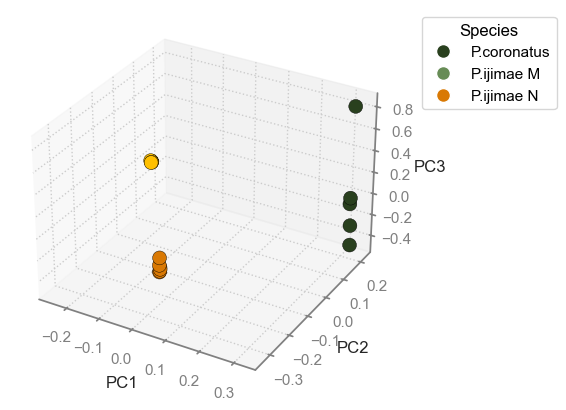

In [19]:
import matplotlib.colors as mcolors

df2["species"]=pd.Categorical(df2["popID2"])
my_color=df2["species"].cat.codes

plt.rcParams['figure.figsize'] = (5, 5)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#colors = ["#29401e","#678c56","#d97904","#e0e020","#ffc000","#806000"]
#ax.scatter(df2['PCA1'], df2['PCA2'], df2['PCA3'], edgecolors='black', linewidth=0.2,s=50, alpha=0.7,c=my_color, cmap=mcolors.ListedColormap(['#29401E', '#F2B705', '#678C56', '#D97904', '#F29F05']))
ax.scatter(df2['PCA1'], df2['PCA2'], df2['PCA3'], edgecolors='black',depthshade=True,linewidth=0.3, s=100, alpha=1,c=my_color, cmap=mcolors.ListedColormap(["#29401e","#678c56","#d97904","#e0e020","#ffc000"]))

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
#ax.set_title("PCA on the Phylloscopus data set")

colors= ["#29401e","#678c56","#d97904","#e0e020","#ffc000"]

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=col, markersize=10, label=label)
           for col, label in zip(colors, df2["species"].cat.categories)]
#ax.legend(handles=handles, title="Species")
legend = ax.legend(handles=handles, title="Species", loc='upper left', bbox_to_anchor=(1.05, 1))

#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/3dpca_ijimae2.pdf",bbox_inches="tight")
plt.show()

In [13]:
df2

FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0       PcorU4722_PcorU4722  0.316082  0.213450 -0.069610  0.451763  0.177508   
1       PcorU4779_PcorU4779  0.317073  0.213748 -0.014103  0.525343  0.294164   
2   Pcoro16323A_Pcoro16323A  0.317485  0.216042 -0.279211 -0.673039  0.497277   
3   Pcoro16348A_Pcoro16348A  0.318025  0.217243 -0.467702 -0.075607 -0.719140   
4   Pcoro16349A_Pcoro16349A  0.320189  0.216627  0.828246 -0.222893 -0.245455   
5   PijiMiU5645_PijiMiU5645  0.060000 -0.333902  0.019821  0.022979 -0.054089   
6   PijiMiU5649_PijiMiU5649  0.061226 -0.332564 -0.017572 -0.094970  0.033619   
7   PijiMiU5708_PijiMiU5708  0.059100 -0.332503 -0.044698  0.040000 -0.128179   
8   PijiMiU5709_PijiMiU5709  0.061113 -0.334322  0.088580  0.005321  0.187129   
9   PijiMiU5710_PijiMiU5710  0.059395 -0.330043 -0.007132  0.006021 -0.005922   
10  PijiMiU5711_PijiMiU5711  0.059664 -0.331830 -0.038807  0.016221 -0.036963   
11  PijiNaU5147_PijiNaU5147 -0.242782  0.115624 -0.004418 -0.006355 -0.003737   
12  PijiNaU5148_PijiNaU5148 -0.243828  0.114660  0.001860  0.000827  0.004897   
13  PijiNaU5149_PijiNaU5149 -0.242072  0.111113 -0.002664 -0.002345 -0.011047   
14  PijiNaU5150_PijiNaU5150 -0.241557  0.112401  0.000012 -0.000165 -0.005862   
15  PijiNaU5151_PijiNaU5151 -0.243072  0.115560 -0.000797  0.004654  0.000421   
16  PijiNaU5152_PijiNaU5152 -0.244073  0.116772  0.000256  0.000403 -0.001541   
17  PijiNaU5153_PijiNaU5153 -0.244037  0.114960  0.000499  0.000790  0.005515   
18  PijiNaU5154_PijiNaU5154 -0.244707  0.113118  0.011242  0.001547  0.011474   

        PCA6      PCA7      PCA8      PCA9  ...      PCA1      PCA2      PCA3  \
0   0.048700  0.017968  0.067586  0.030536  ... -0.003906 -0.001318  0.002326   
1   0.049672 -0.018376 -0.033057  0.029862  ...  0.001666  0.003014 -0.003270   
2   0.037548  0.133869 -0.036377 -0.015193  ... -0.024314  0.001375  0.000920   
3  -0.177486 -0.134549  0.008370 -0.025322  ...  0.013550 -0.006346  0.007804   
4   0.041521  0.003520 -0.007801 -0.019698  ...  0.011003  0.000180 -0.005162   
5  -0.268417  0.510240  0.447865  0.308268  ... -0.444887 -0.000064 -0.002816   
6   0.369850 -0.630843  0.225971  0.486326  ... -0.015603 -0.000290 -0.002719   
7   0.309677  0.290337 -0.767369  0.166252  ... -0.124291 -0.005845  0.004373   
8  -0.711683 -0.394403 -0.280553 -0.195605  ... -0.087679 -0.000568 -0.003118   
9  -0.075313  0.253704  0.144321  0.007149  ...  0.862420  0.008627  0.004086   
10  0.378898 -0.027089  0.229708 -0.774216  ... -0.183846  0.001302 -0.002746   
11 -0.001877  0.001158  0.000870  0.000226  ... -0.000535 -0.071400 -0.086395   
12  0.002011  0.001281 -0.002877  0.000530  ...  0.008802 -0.239464  0.079456   
13 -0.004002 -0.004341  0.000777  0.001667  ...  0.003024  0.001816  0.016862   
14 -0.001637 -0.003324  0.000838 -0.001310  ... -0.000351 -0.028421 -0.001559   
15 -0.003889  0.000680  0.002239  0.000505  ... -0.005315 -0.087342 -0.185168   
16  0.001698 -0.001084 -0.005707  0.001589  ... -0.007477  0.901447  0.059773   
17  0.003838  0.003256 -0.001658 -0.000153  ...  0.004144 -0.218960 -0.627682   
18  0.001302 -0.001001  0.005464 -0.001768  ... -0.005104 -0.261545  0.744257   

        PCA4      PCA5      PCA6      PCA7      PCA8      PCA9       popID2  
0   0.001835 -0.004783  0.002974 -0.003264 -0.002189 -0.229258  P.coronatus  
1  -0.005464 -0.005435 -0.005728 -0.003639 -0.000877 -0.229430  P.coronatus  
2  -0.000743 -0.004071 -0.003611  0.005456 -0.000289 -0.229640  P.coronatus  
3   0.007465  0.015752  0.001717  0.001868  0.002737 -0.229862  P.coronatus  
4  -0.002135 -0.000521  0.001694  0.000565 -0.000904 -0.228663  P.coronatus  
5  -0.003986  0.004376 -0.005092 -0.002551  0.000231 -0.229273   P.ijimae M  
6  -0.000758  0.002180  0.003049  0.000412  0.000750 -0.229330   P.ijimae M  
7   0.001937 -0.002940  0.002018  0.001594  0.000010 -0.228815   P.ijimae M  
8   0.000080  0.003289  0.000813 -0.002472 -0.000059 -0.229066   P.ijimae M  

In [2]:
df2 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ijimae/pijimae_outgroups_finalfilter_400k_oli_cebu.pruned.eigenvec", delimiter=' ', header=None)
df2

0                        1         2         3   \
0       PcorU4722_PcorU4722      PcorU4722_PcorU4722  0.316082  0.213450   
1       PcorU4779_PcorU4779      PcorU4779_PcorU4779  0.317073  0.213748   
2   Pcoro16323A_Pcoro16323A  Pcoro16323A_Pcoro16323A  0.317485  0.216042   
3   Pcoro16348A_Pcoro16348A  Pcoro16348A_Pcoro16348A  0.318025  0.217243   
4   Pcoro16349A_Pcoro16349A  Pcoro16349A_Pcoro16349A  0.320189  0.216627   
5   PijiMiU5645_PijiMiU5645  PijiMiU5645_PijiMiU5645  0.060000 -0.333902   
6   PijiMiU5649_PijiMiU5649  PijiMiU5649_PijiMiU5649  0.061226 -0.332564   
7   PijiMiU5708_PijiMiU5708  PijiMiU5708_PijiMiU5708  0.059100 -0.332503   
8   PijiMiU5709_PijiMiU5709  PijiMiU5709_PijiMiU5709  0.061113 -0.334322   
9   PijiMiU5710_PijiMiU5710  PijiMiU5710_PijiMiU5710  0.059395 -0.330043   
10  PijiMiU5711_PijiMiU5711  PijiMiU5711_PijiMiU5711  0.059664 -0.331830   
11  PijiNaU5147_PijiNaU5147  PijiNaU5147_PijiNaU5147 -0.242782  0.115624   
12  PijiNaU5148_PijiNaU5148  PijiNaU5148_PijiNaU5148 -0.243828  0.114660   
13  PijiNaU5149_PijiNaU5149  PijiNaU5149_PijiNaU5149 -0.242072  0.111113   
14  PijiNaU5150_PijiNaU5150  PijiNaU5150_PijiNaU5150 -0.241557  0.112401   
15  PijiNaU5151_PijiNaU5151  PijiNaU5151_PijiNaU5151 -0.243072  0.115560   
16  PijiNaU5152_PijiNaU5152  PijiNaU5152_PijiNaU5152 -0.244073  0.116772   
17  PijiNaU5153_PijiNaU5153  PijiNaU5153_PijiNaU5153 -0.244037  0.114960   
18  PijiNaU5154_PijiNaU5154  PijiNaU5154_PijiNaU5154 -0.244707  0.113118   

          4         5         6         7         8         9   ...        11  \
0  -0.069610  0.451763  0.177508  0.048700  0.017968  0.067586  ... -0.743814   
1  -0.014103  0.525343  0.294164  0.049672 -0.018376 -0.033057  ...  0.658410   
2  -0.279211 -0.673039  0.497277  0.037548  0.133869 -0.036377  ...  0.005596   
3  -0.467702 -0.075607 -0.719140 -0.177486 -0.134549  0.008370  ...  0.079286   
4   0.828246 -0.222893 -0.245455  0.041521  0.003520 -0.007801  ... -0.001541   
5   0.019821  0.022979 -0.054089 -0.268417  0.510240  0.447865  ...  0.049919   
6  -0.017572 -0.094970  0.033619  0.369850 -0.630843  0.225971  ...  0.002794   
7  -0.044698  0.040000 -0.128179  0.309677  0.290337 -0.767369  ... -0.036801   
8   0.088580  0.005321  0.187129 -0.711683 -0.394403 -0.280553  ... -0.048969   
9  -0.007132  0.006021 -0.005922 -0.075313  0.253704  0.144321  ...  0.014073   
10 -0.038807  0.016221 -0.036963  0.378898 -0.027089  0.229708  ...  0.019609   
11 -0.004418 -0.006355 -0.003737 -0.001877  0.001158  0.000870  ...  0.003197   
12  0.001860  0.000827  0.004897  0.002011  0.001281 -0.002877  ... -0.003872   
13 -0.002664 -0.002345 -0.011047 -0.004002 -0.004341  0.000777  ... -0.001635   
14  0.000012 -0.000165 -0.005862 -0.001637 -0.003324  0.000838  ... -0.002793   
15 -0.000797  0.004654  0.000421 -0.003889  0.000680  0.002239  ...  0.002964   
16  0.000256  0.000403 -0.001541  0.001698 -0.001084 -0.005707  ... -0.002252   
17  0.000499  0.000790  0.005515  0.003838  0.003256 -0.001658  ... -0.000702   
18  0.011242  0.001547  0.011474  0.001302 -0.001001  0.005464  ...  0.005716   

          12        13        14        15        16        17        18  \
0  -0.003906 -0.001318  0.002326  0.001835 -0.004783  0.002974 -0.003264   
1   0.001666  0.003014 -0.003270 -0.005464 -0.005435 -0.005728 -0.003639   
2  -0.024314  0.001375  0.000920 -0.000743 -0.004071 -0.003611  0.005456   
3   0.013550 -0.006346  0.007804  0.007465  0.015752  0.001717  0.001868   
4   0.011003  0.000180 -0.005162 -0.002135 -0.000521  0.001694  0.000565   
5  -0.444887 -0.000064 -0.002816 -0.003986  0.004376 -0.005092 -0.002551   
6  -0.015603 -0.000290 -0.002719 -0.000758  0.002180  0.003049  0.000412   
7  -0.124291 -0.005845  0.004373  0.001937 -0.002940  0.002018  0.001594   
8  -0.087679 -0.000568 -0.003118  0.000080  0.003289  0.000813 -0.002472   
9   0.862420  0.008627  0.004086  0.005296 -0.001770  0.005806  0.003096   
10 -0.183846  0.001302 -0.002746 -0.003578  0.0

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_624/1588328629.py:35: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x=df2['PCA1'], y=df2['PCA2'], hue=df2['popID2'], s=60, alpha=1, palette=custom_palette)


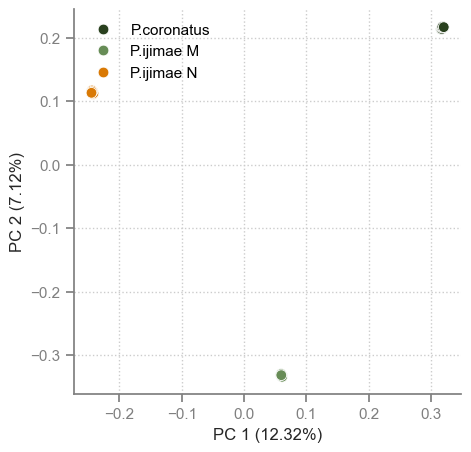

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_624/1588328629.py:60: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x=df2['PCA2'], y=df2['PCA3'], hue=df2['popID2'], s=60, alpha=1, palette=custom_palette)


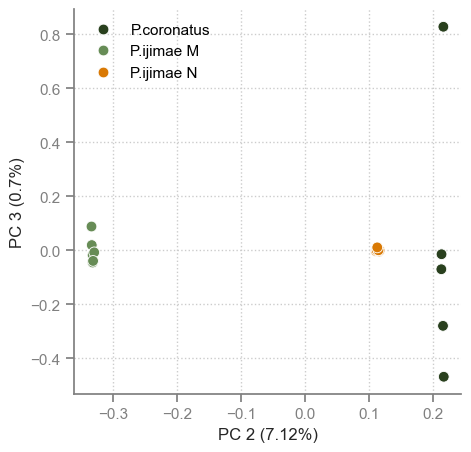

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)

#plt.title('Histogram of avg_hudson_fst with Density Curve')
#plt.xlabel(r'$F_{st}$', size = 16)
#plt.ylabel(r'Number of windows', size = 16)

# Custom color palette
#base_colors = ["#F7D57C", "#5F5B11"]  # Miyake and nakanoshima colors
# Generate three additional colors that are harmonious
#additional_colors = sns.color_palette("autumn", 3)  # You can choose other palettes like 'husl', 'coolwarm', etc.
#custom_palette = sns.color_palette(base_colors + additional_colors)

#custom_palette = ["#29401E", "#F2B705","#678C56","#D97904","#F29F05"]
#custom_palette = ["#808000","#e0e020","#ffff80","#ffc000","#806000","#d4af37"]
custom_palette = ["#29401e","#678c56",
"#d97904",
"#e0e020",
"#ffc000",
"#806000"]

# Plot scatterplot with the custom palette
sns.scatterplot(x=df2['PCA1'], y=df2['PCA2'], hue=df2['popID2'], s=60, alpha=1, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PC 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
plt.xlabel("PC 1 (" + str(round(float(split_eigval[0]), 2)) + "%)", size=12)
#plt.xlim(-0.35,-0.1)
#plt.ylim(-0.3,-0.1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
sns.despine()
plt.show()

plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)
# Plot scatterplot with the custom palette
sns.scatterplot(x=df2['PCA2'], y=df2['PCA3'], hue=df2['popID2'], s=60, alpha=1, palette=custom_palette)
plt.ylabel("PC 3 (" + str(round(float(split_eigval[2]), 2)) + "%)", size=12)
plt.xlabel("PC 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
#plt.xlim(-0.35,-0.1)
#plt.ylim(-0.3,-0.1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False)
sns.despine()

# Show the plot
plt.show()
#Miyake color: "#F7D57C"
#nakanoshima color="#5F5B11"

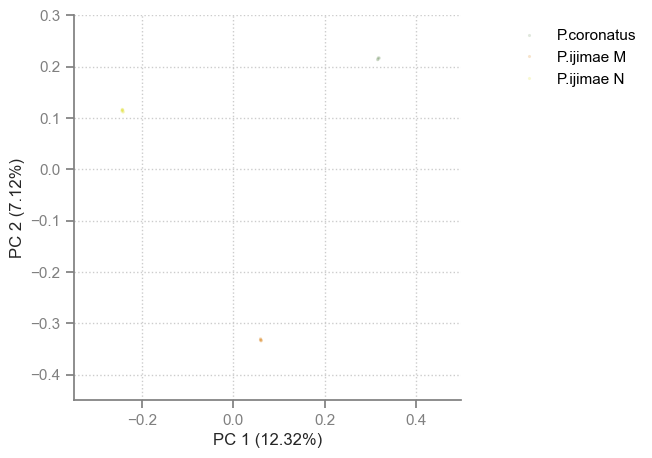

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (5.0, 5.0)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": ".8", "grid.linestyle": ":", 'xtick.color': 'grey', 'ytick.color': 'grey','axes.edgecolor': 'grey','text.color': 'black',})
plt.grid(True)

#custom_palette = ["#29401e","#678c56","#d97904","#e0e020","#ffc000","#806000"]
custom_palette = ["#678c56","#d97904","#e0e020"]

# Plot scatterplot with the custom palette
sns.scatterplot(x=df2['PCA1'], y=df2['PCA2'], hue=df2['popID2'], s=5, alpha=0.2, palette=custom_palette)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PC 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=12)
plt.xlabel("PC 1 (" + str(round(float(split_eigval[0]), 2)) + "%)", size=12)
plt.xlim(-0.35,0.5)
plt.ylim(-0.45,0.3)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
# plt.legend(loc='upper left', bbox_to_anchor=(2, 1))
plt.xticks(fontsize=11)  # Smaller font size for ticks
plt.yticks(fontsize=11)
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(1.1, 1))
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
sns.despine()
plt.show()

<Axes: xlabel='PCA1', ylabel='PCA2'>

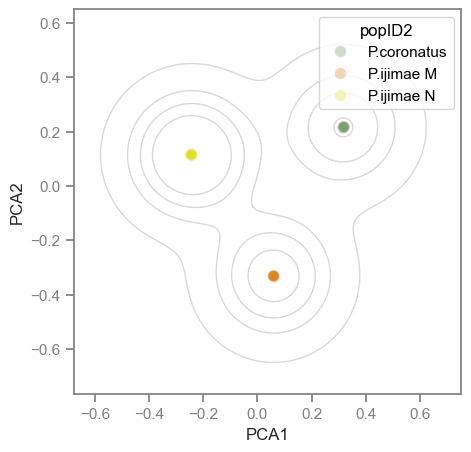

In [26]:
import seaborn as sns

sns.kdeplot(data=df2, x="PCA1", y="PCA2", levels=5, color='gray', linewidths=1, alpha=0.3)
sns.scatterplot(x='PCA1', y='PCA2', hue='popID2', data=df2, s=70, alpha=0.3, palette=custom_palette)


<Axes: xlabel='PCA1', ylabel='PCA2'>

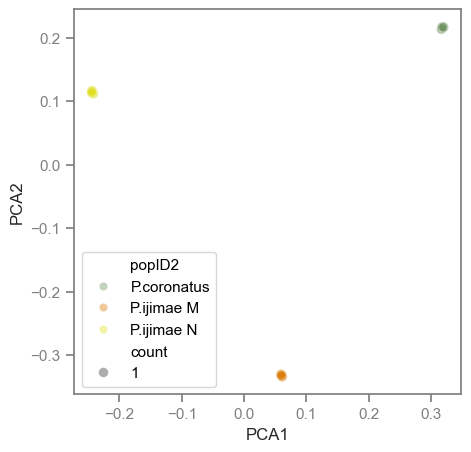

In [27]:
from collections import Counter

# Count duplicates
counts = df2.groupby(['PCA1', 'PCA2']).size().reset_index(name='count')
df2 = df2.merge(counts, on=['PCA1', 'PCA2'])

# Use size and alpha to reflect overplotting
sns.scatterplot(x='PCA1', y='PCA2', hue='popID2', data=df2,
                size='count', sizes=(50, 150), alpha=0.4, palette=custom_palette, legend='brief')


# PCA plot no oli and cebu, relaxed LD filter (May 2025)

In [23]:
import pandas as pd
import re


# Read the data from the file
df2 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.eigenvec", delimiter=' ', header=None)

# Display the DataFrame
df2=df2.drop(df2.columns[[0]], axis=1)
df2.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","FulID", "CA1","CA2","CA3","CA4","CA5","CA6","CA7","CA8","CA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
#df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#df2["popID"] = df2.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:1]))

df2["popID2"] =["P.coronatus","P.coronatus","P.coronatus","P.coronatus","P.coronatus","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae M","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N","P.ijimae N"]

eigval = open("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.eigenval").read()
print(eigval)
split_eigval = eigval.split('\n')
print(split_eigval[0])

df2

6.70195
3.51319
1.11221
1.04111
0.966531
0.87737
0.283128
0.223689
0.216492
0.212703
0.204164
0.171966
0.15173
0.143831
0.13911
0.137391
0.132816
0.0810063
-0.0073653

6.70195


FullID      PCA1      PCA2      PCA3      PCA4      PCA5  \
0       PcorU4722_PcorU4722  0.362305 -0.106731 -0.529240 -0.117627  0.144562   
1       PcorU4779_PcorU4779  0.372596 -0.101123 -0.559122  0.066198 -0.270028   
2   Pcoro16323A_Pcoro16323A  0.373859 -0.101914  0.468702 -0.357663 -0.653244   
3   Pcoro16348A_Pcoro16348A  0.363005 -0.105645  0.288505 -0.425135  0.680005   
4   Pcoro16349A_Pcoro16349A  0.376968 -0.101773  0.322650  0.819487  0.113345   
5   PijiMiU5645_PijiMiU5645 -0.051769  0.333830 -0.004470 -0.011509  0.020511   
6   PijiMiU5649_PijiMiU5649 -0.042837  0.335842  0.009382  0.022227 -0.035715   
7   PijiMiU5708_PijiMiU5708 -0.051549  0.331698 -0.005188 -0.011960  0.019402   
8   PijiMiU5709_PijiMiU5709 -0.043056  0.339945  0.008642  0.021954 -0.036928   
9   PijiMiU5710_PijiMiU5710 -0.051194  0.331102 -0.003865 -0.011091  0.018458   
10  PijiMiU5711_PijiMiU5711 -0.051954  0.332797 -0.005667 -0.011979  0.019411   
11  PijiNaU5147_PijiNaU5147 -0.192807 -0.183256  0.001702  0.001359 -0.002279   
12  PijiNaU5148_PijiNaU5148 -0.194349 -0.185442  0.001209  0.002130 -0.002588   
13  PijiNaU5149_PijiNaU5149 -0.195097 -0.186489  0.001059  0.002609 -0.001394   
14  PijiNaU5150_PijiNaU5150 -0.194872 -0.186303  0.001302  0.002756 -0.001346   
15  PijiNaU5151_PijiNaU5151 -0.193968 -0.185650  0.000466  0.001280 -0.002949   
16  PijiNaU5152_PijiNaU5152 -0.194964 -0.188803  0.000881  0.001645 -0.002799   
17  PijiNaU5153_PijiNaU5153 -0.193619 -0.184930  0.001197  0.002355 -0.002717   
18  PijiNaU5154_PijiNaU5154 -0.194440 -0.185761  0.001093  0.003523 -0.003390   

        PCA6      PCA7      PCA8      PCA9  ...       CA1       CA2       CA3  \
0  -0.698509  0.045757  0.002207 -0.000180  ... -0.000321  0.000557 -0.000287   
1   0.637989 -0.038108 -0.002549  0.000908  ...  0.000384 -0.001249 -0.000518   
2  -0.147526 -0.033178 -0.002101 -0.000189  ... -0.000670 -0.001626 -0.000255   
3   0.276180  0.042519  0.002372 -0.000875  ... -0.000325  0.000696 -0.000039   
4  -0.074723 -0.030063 -0.001936 -0.001164  ... -0.000297  0.000505  0.000676   
5  -0.012243 -0.288401 -0.450710  0.392305  ... -0.417503  0.001786 -0.002162   
6   0.020360  0.535334  0.558581  0.468834  ... -0.013236  0.003141 -0.001014   
7  -0.011126 -0.266283  0.056654  0.064271  ... -0.320944 -0.008831  0.001408   
8   0.021357  0.608489 -0.484270 -0.467795  ... -0.007463  0.001767  0.001012   
9  -0.011502 -0.262714 -0.149827  0.160656  ...  0.845816  0.001201  0.007006   
10 -0.011774 -0.335565  0.473939 -0.614388  ... -0.083359 -0.000735 -0.000142   
11  0.001493 -0.000030 -0.001855  0.002264  ...  0.000763  0.205433 -0.240745   
12  0.001578  0.001590  0.000984  0.000256  ...  0.002610  0.290946 -0.417212   
13  0.001294  0.006521 -0.001127  0.002707  ...  0.003301 -0.609231 -0.054871   
14  0.000803  0.004675 -0.000761 -0.001651  ...  0.000887 -0.598783 -0.117091   
15  0.002182  0.001593 -0.001808 -0.001293  ... -0.005009  0.241252  0.145307   
16  0.001523  0.003803  0.001523  0.001002  ... -0.004790  0.077629  0.846138   
17  0.001330  0.002377  0.003326 -0.000504  ...  0.004268  0.202947 -0.087542   
18  0.001064  0.002510 -0.002456 -0.004948  ... -0.003955  0.194748 -0.080432   

         CA4       CA5       CA6       CA7       CA8       CA9       popID2  
0  -0.000065  0.000135  0.000056 -0.000163  0.000084 -0.229125  P.coronatus  
1  -0.000198 -0.000213 -0.000517  0.000316 -0.000293 -0.229213  P.coronatus  
2   0.000132  0.000126 -0.000311 -0.000610  0.000067 -0.229429  P.coronatus  
3   0.000875  0.000678 -0.001066 -0.000352 -0.000237 -0.229325  P.coronatus  
4  -0.000543 -0.000147  0.001054 -0.000610  0.000241 -0.229197  P.coronatus  
5  -0.001153 -0.008295 -0.004176 -0.002872 -0.000191 -0.229522   P.ijimae M  
6   0.001014  0.002851  0.000238  0.000149 -0.002037 -0.229212   P.ijimae M  
7   0.003707  0.006708  0.000493  0.000994  0.000361 -0.229188   P.ijimae M  
8  -0.002165 -0.002882  0.000781  0.000153  0.000657 -0.229244   P.ijimae M  

# Fig.3 A

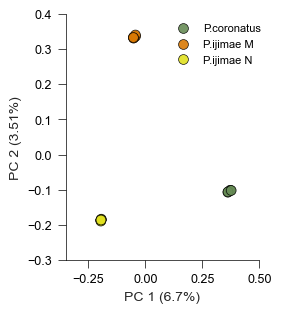

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Adjust plot aesthetics
plt.rcParams['figure.figsize'] = (2.5, 3.2)
#sns.despine(offset=2)
#sns.set_style("whitegrid")
#sns.set_style("white")
sns.set_context("notebook")
sns.set_style("ticks", {"grid.color": "1", "grid.linestyle": ":", 'xtick.color': 'black', 'ytick.color': 'black','axes.edgecolor': 'black','text.color': 'black',})
plt.grid(True)

#custom_palette = ["#29401e","#678c56","#d97904","#e0e020","#ffc000","#806000"]
custom_palette = ["#678c56","#d97904","#e0e020"]

# Plot scatterplot with the custom palette
#sns.scatterplot(x=df2['PCA1'], y=df2['PCA2'], hue=df2['popID2'], s=50, alpha=0.9, palette=custom_palette)

sns.scatterplot(
    x=df2['PCA1'],
    y=df2['PCA2'],
    hue=df2['popID2'],
    s=50,
    alpha=0.9,
    palette=custom_palette,
    edgecolor='black',   # Outline color
    linewidth=0.5         # Outline width
)
#sns.scatterplot(x=df['PCA1'][16:20], y=df['PCA2'][16:20], hue=df['popID'][16:20], s=70,palette="Dark2") #,alpha=0.4) #,kwargs={"color":"darkred","alpha":0.3,"s":200})#,palette="dark")
# Example adjustment in the context of the plotting code
plt.ylabel("PC 2 (" + str(round(float(split_eigval[1]), 2)) + "%)", size=10)
plt.xlabel("PC 1 (" + str(round(float(split_eigval[0]), 2)) + "%)", size=10)
plt.xlim(-0.35,0.5)
plt.ylim(-0.3,0.4)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
# plt.legend(loc='upper left', bbox_to_anchor=(2, 1))
plt.xticks(fontsize=9)  # Smaller font size for ticks
plt.yticks(fontsize=9)
plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(0.5, 1), fontsize=8)
# Set spine (axes) linewidth to 0.5
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
plt.tick_params(width=0.5)
plt.savefig("/Users/dshipilina/Digital_Ecosytem/Tokara Leaf Warbler/Tokara Leaf Warbler - Visuals/FIG3A.pdf", bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_historical.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")
sns.despine()
plt.show()

In [16]:
sns.scatterplot(x=df2['PCA1'], y=df2['PCA2'], hue=df2['popID2'])

ValueError: Data must be 1-dimensional, got ndarray of shape (19, 2) instead

In [17]:
df2['PCA1']

PCA1      PCA1
0   0.316082 -0.003906
1   0.317073  0.001666
2   0.317485 -0.024314
3   0.318025  0.013550
4   0.320189  0.011003
5   0.060000 -0.444887
6   0.061226 -0.015603
7   0.059100 -0.124291
8   0.061113 -0.087679
9   0.059395  0.862420
10  0.059664 -0.183846
11 -0.242782 -0.000535
12 -0.243828  0.008802
13 -0.242072  0.003024
14 -0.241557 -0.000351
15 -0.243072 -0.005315
16 -0.244073 -0.007477
17 -0.244037  0.004144
18 -0.244707 -0.005104

In [ ]:
custom_palette

[(0.9686274509803922, 0.8352941176470589, 0.48627450980392156),
 (0.37254901960784315, 0.3568627450980392, 0.06666666666666667),
 (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744)]

## Relatedness

Text(0.5, 1.0, 'Relatedness Heatmap')

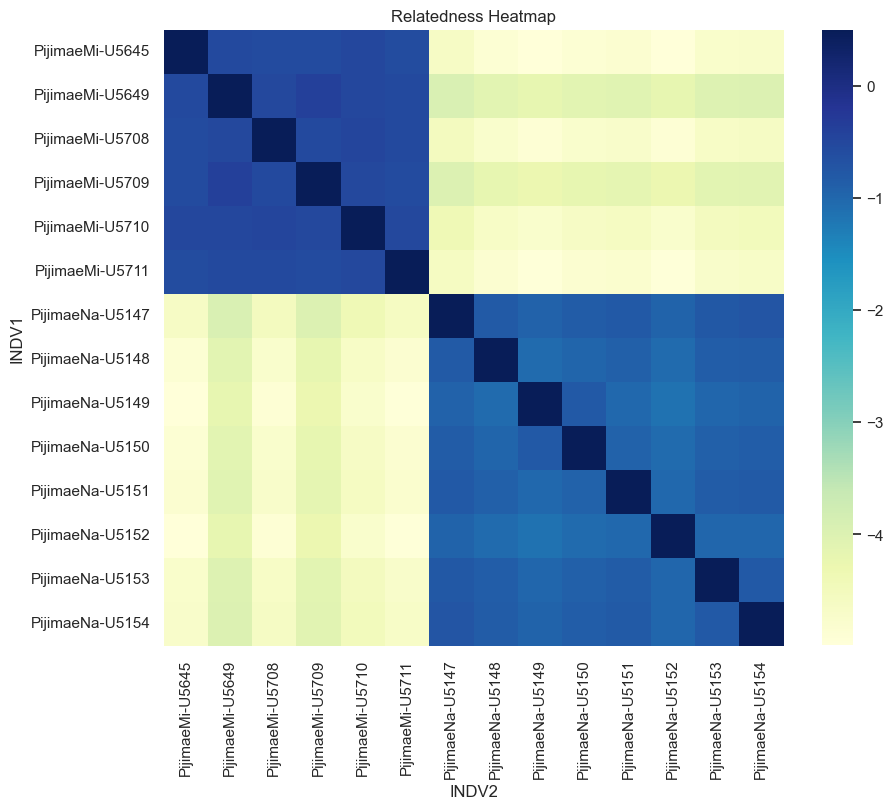

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a Pandas DataFrame
# Replace 'your_file.txt' with your PLINK --genome output file
data = pd.read_csv('/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/analysis_Fst_SFS/Pijimae_relatedness2.relatedness2', delim_whitespace=True)

# Pivot the DataFrame to get a matrix form if necessary
# Adjust the column names based on your file's structure
#heatmap_data = data.pivot("RELATEDNESS_PHI")
heatmap_data = data.pivot(index='INDV1', columns='INDV2', values='RELATEDNESS_PHI')

#heatmap_data = data.pivot()

# Pivot the DataFrame to get a matrix form if necessary
# Adjust the column names based on your file's structure
#heatmap_data = data.pivot("FID1", "FID2", "PI_HAT")

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=False, cmap="YlGnBu")
plt.title("Relatedness Heatmap")

plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/test_hist_PCA/britomartis_PCA_all.png",bbox_inches="tight")

In [ ]:
data

INDV1            INDV2    N_AaAa    N_AAaa     N1_Aa  \
0    PijimaeMi-U5645  PijimaeMi-U5645  921402.0       0.0  921402.0   
1    PijimaeMi-U5645  PijimaeMi-U5649  286873.0  733086.0  921402.0   
2    PijimaeMi-U5645  PijimaeMi-U5708  297080.0  670034.0  921402.0   
3    PijimaeMi-U5645  PijimaeMi-U5709  280237.0  743923.0  921402.0   
4    PijimaeMi-U5645  PijimaeMi-U5710  330289.0  646072.0  921402.0   
..               ...              ...       ...       ...       ...   
191  PijimaeNa-U5154  PijimaeNa-U5150  232538.0  647316.0  626256.0   
192  PijimaeNa-U5154  PijimaeNa-U5151  236760.0  626903.0  626256.0   
193  PijimaeNa-U5154  PijimaeNa-U5152  221108.0  699103.0  626256.0   
194  PijimaeNa-U5154  PijimaeNa-U5153  245821.0  618632.0  626256.0   
195  PijimaeNa-U5154  PijimaeNa-U5154  626256.0       0.0  626256.0   

         N2_Aa  RELATEDNESS_PHI  
0     921402.0         0.500000  
1    1220980.0        -0.550461  
2     948531.0        -0.557768  
3    1191480.0        -0.571545  
4     987706.0        -0.503824  
..         ...              ...  
191   591627.0        -0.872082  
192   601408.0        -0.828440  
193   573576.0        -0.981052  
194   620952.0        -0.794930  
195   626256.0         0.500000  

[196 rows x 7 columns]

In [ ]:
eigvec = open("/Users/dshipilina/GitHub/AfricanDivide/vanessa.noMAF.noLD.eigenvec").read()
split_eig = eigvec.split('\n')
eigvec_array=[]
#print(split_file2[2])
for i in split_eig:
    ii=i.split()
    eigvec_array+=[ii]
    
#print(eigvec_array[2])
    
popid = open("/Users/dshipilina/GitHub/AfricanDivide/popmap1.txt").read()
split_popid = popid.split('\n')
#print(txt2)
popID_array=[]
#print(split_file2[2])
for i in split_popid:
    ii=i.split()
    popID_array+=[ii]

df = pd.DataFrame(eigvec_array) # , columns = ["ScaffoldID", "N_BUSCOs","BUSCOs_coverage", ])
#remove extra labels and extra PCs
df =df.drop(df.columns[[0,11,12,13,14,15,16,17,18,19,20,21]], axis=1)
#remove empty row
df = df.drop(labels=[347], axis=0)
#rename columns
df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
cols = ["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
#df["PCA1"] = pd.to_numeric(df["PCA1"], downcast="float")
#df["PCA2"] = pd.to_numeric(df["PCA2"], downcast="float")
#df["PCA3"] = pd.to_numeric(df["PCA3"], downcast="float")

#splitting names
#print(df["FullID"])
dftmp=df["FullID"].str.split('_',expand=True)
#print(dftmp)
dftmp.columns=["Location", "SampleID"]
dftmp

#getting population IDs
dftmp2 = pd.DataFrame(popID_array)
dftmp2.columns=["pop","popID"]
dftmp2

#combining table
df = pd.concat([dftmp,dftmp2,df],axis=1)
df = df.drop(labels=[347], axis=0)
df

# ADMIXTURE

## Only ijimae

In [ ]:
# Creating a simple Python list from bcftools query -l
simple_list = [
    "PijimaeMi-U5645",
    "PijimaeMi-U5649",
    "PijimaeMi-U5708",
    "PijimaeMi-U5709",
    "PijimaeMi-U5710",
    "PijimaeMi-U5711",
    "PijimaeNa-U5147",
    "PijimaeNa-U5148",
    "PijimaeNa-U5149",
    "PijimaeNa-U5150",
    "PijimaeNa-U5151",
    "PijimaeNa-U5152",
    "PijimaeNa-U5153",
    "PijimaeNa-U5154",
]

simple_list


['PijimaeMi-U5645',
 'PijimaeMi-U5649',
 'PijimaeMi-U5708',
 'PijimaeMi-U5709',
 'PijimaeMi-U5710',
 'PijimaeMi-U5711',
 'PijimaeNa-U5147',
 'PijimaeNa-U5148',
 'PijimaeNa-U5149',
 'PijimaeNa-U5150',
 'PijimaeNa-U5151',
 'PijimaeNa-U5152',
 'PijimaeNa-U5153',
 'PijimaeNa-U5154']

In [ ]:
import pandas as pd

# IDs and corresponding values
ids = [
    "PijimaeMi-U5645",
    "PijimaeMi-U5649",
    "PijimaeMi-U5708",
    "PijimaeMi-U5709",
    "PijimaeMi-U5710",
    "PijimaeMi-U5711",
    "PijimaeNa-U5147",
    "PijimaeNa-U5148",
    "PijimaeNa-U5149",
    "PijimaeNa-U5150",
    "PijimaeNa-U5151",
    "PijimaeNa-U5152",
    "PijimaeNa-U5153",
    "PijimaeNa-U5154",
]
values = [
    [0.000010, 0.999990],
    [0.000010, 0.999990],
    [0.000010, 0.999990],
    [0.000010, 0.999990],
    [0.000010, 0.999990],
    [0.000010, 0.999990],
    [0.999990, 0.000010],
    [0.999990, 0.000010],
    [0.999990, 0.000010],
    [0.999990, 0.000010],
    [0.999990, 0.000010],
    [0.999990, 0.000010],
    [0.999990, 0.000010],
    [0.999990, 0.000010],
]

# Creating the DataFrame
df = pd.DataFrame({
    'ID': ids,
    'pop1': [v[0] for v in values],
    'pop2': [v[1] for v in values],
})

df


ID     pop1     pop2
0   PijimaeMi-U5645  0.00001  0.99999
1   PijimaeMi-U5649  0.00001  0.99999
2   PijimaeMi-U5708  0.00001  0.99999
3   PijimaeMi-U5709  0.00001  0.99999
4   PijimaeMi-U5710  0.00001  0.99999
5   PijimaeMi-U5711  0.00001  0.99999
6   PijimaeNa-U5147  0.99999  0.00001
7   PijimaeNa-U5148  0.99999  0.00001
8   PijimaeNa-U5149  0.99999  0.00001
9   PijimaeNa-U5150  0.99999  0.00001
10  PijimaeNa-U5151  0.99999  0.00001
11  PijimaeNa-U5152  0.99999  0.00001
12  PijimaeNa-U5153  0.99999  0.00001
13  PijimaeNa-U5154  0.99999  0.00001

In [ ]:
new = open("/Users/dshipilina/GitHub/AfricanDivide/ADMIXTURE/cardui_migrdiv_indv_rarev_md25.2.Q").read()
split_ = new.split('\n')
print(split_[2])
eigve_array=[]
#print(split_file2[2])
for i in split_:
    ii=i.split()
    eigve_array+=[ii]

df3=pd.DataFrame(eigve_array)
df3.columns=['pop1','pop2']
df3

df4= pd.concat([df3,df],axis=1)
#print(df4)
df4["pop2"] = pd.to_numeric(df4["pop2"], downcast="float")
df4["pop1"] = pd.to_numeric(df4["pop1"], downcast="float")
#df4.sort_values(by=["pop2"], inplace=True)
df4 = df4.sort_values(["popID", "pop1","Location"], ascending = (False, True,True))
#print(df)
df4 = df4.drop(labels=[347], axis=0)
df4[100:150]

0.000010 0.999990


NameError: name 'df' is not defined

In [ ]:
df

ID     pop1     pop2
0   PijimaeMi-U5645  0.00001  0.99999
1   PijimaeMi-U5649  0.00001  0.99999
2   PijimaeMi-U5708  0.00001  0.99999
3   PijimaeMi-U5709  0.00001  0.99999
4   PijimaeMi-U5710  0.00001  0.99999
5   PijimaeMi-U5711  0.00001  0.99999
6   PijimaeNa-U5147  0.99999  0.00001
7   PijimaeNa-U5148  0.99999  0.00001
8   PijimaeNa-U5149  0.99999  0.00001
9   PijimaeNa-U5150  0.99999  0.00001
10  PijimaeNa-U5151  0.99999  0.00001
11  PijimaeNa-U5152  0.99999  0.00001
12  PijimaeNa-U5153  0.99999  0.00001
13  PijimaeNa-U5154  0.99999  0.00001

Text(0, 0.5, 'inferred allele frequences')

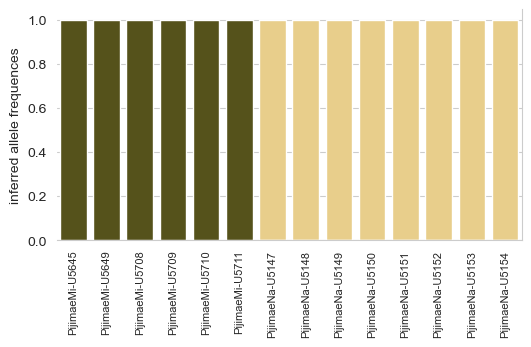

In [ ]:
import matplotlib as ml
ml.rcParams['figure.figsize'] = (6, 3)
#index = range(len(df4["FullID"]))
#plt.bar(df["ID"],height=1) #,width=0.9)
#plt.bar(df4["FullID"],df4["pop1"])#,width=0.98)
#index = range(len(df4["FullID"]))
#plt.xticks(index, df4["FullID"])  # set the X ticks and labels
#sns.barplot(x=df4["FullID"][0:50], y=np.ones(50), dodge=False) #,color='darkblue')#,edgecolor="darkblue")
sns.barplot(x=df["ID"], y=df["pop1"], color="#F7D57C")
sns.barplot(x=df["ID"], y=df["pop2"], color="#5F5B11")
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=8)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.xlabel("")
plt.ylabel("inferred allele frequences")

# show the graph
#plt.savefig("/Users/dshipilina/GitHub/AfricanDivide/admixtureK2_v4.pdf",bbox_inches="tight")
#plt.show

## Analysis with outgroups

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_86090/3866911723.py:12: SyntaxWarning: invalid escape sequence '\s'
  q_data = pd.read_csv(q_file, sep='\s+', header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_86090/3866911723.py:15: SyntaxWarning: invalid escape sequence '\s'
  fam_data = pd.read_csv(fam_file, sep='\s+', header=None)


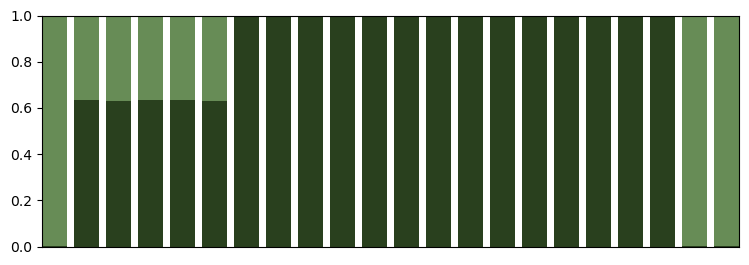

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Paths to your admixture output files
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.2.Q"
fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.fam'


def plot_admix(q_file, fam_file):
    # Load the .Q file
    q_data = pd.read_csv(q_file, sep='\s+', header=None)
    
    # Load the .fam file to get individual IDs
    fam_data = pd.read_csv(fam_file, sep='\s+', header=None)
    
    # Extract individual IDs
    individuals = fam_data[0].astype(str) + "_" + fam_data[1].astype(str)
    
    # Set the colors for each population
    num_populations = q_data.shape[1]
    #colors = ['#0cb2af', '#a1c65d', '#fac723', '#f29222', '#e95e50', '#936fac']
    #colors = ["#808000","#e0e020","#ffff80","#d4af37","#ffc000","#806000"]
    colors = ["#29401e","#678c56","#d97904","#e0e020","#ffc000","#806000"]

    # Plotting
    fig, ax = plt.subplots(figsize=(9, 3))
    bottoms = np.zeros(q_data.shape[0])
    
    for k in range(num_populations):
        ax.bar(individuals, q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
        bottoms += q_data[k]
    
    #ax.set_ylabel('Ancestry Proportion')
    #ax.set_title('Admixture Analysis Results')
    ax.set_xticks([])
        # Remove gridlines
    ax.grid(False)
    
    # Set y limit from 0 to 1
    ax.set_ylim([0, 1])
    
    # Reduce free space on x-axis
    ax.margins(x=0)
    
    # Remove y-axis label and ticks
    #ax.yaxis.set_visible(False)
    
    # Remove x-axis label and ticks
    ax.xaxis.set_ticks_position('none') 
    #ax.set_xlabel()
    #ax.legend([f'Population {i+1}' for i in range(num_populations)], loc='upper right', bbox_to_anchor=(1.15, 1))
    
    plt.show()
    
plot_admix(q_file, fam_file)


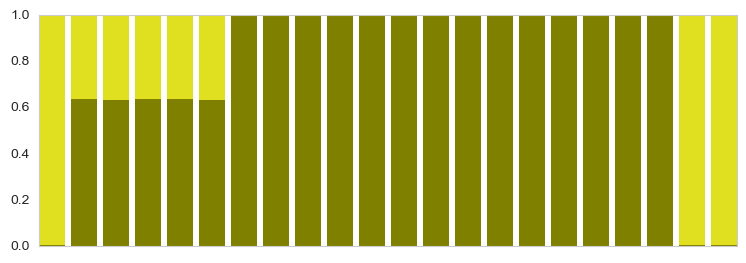

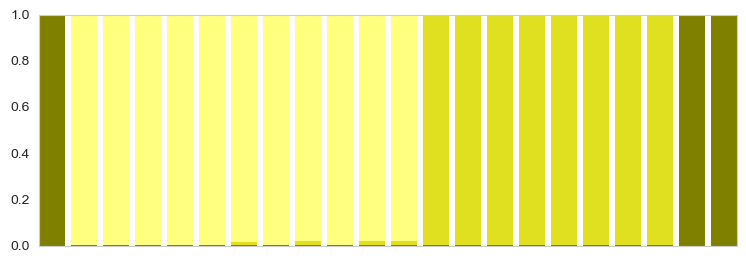

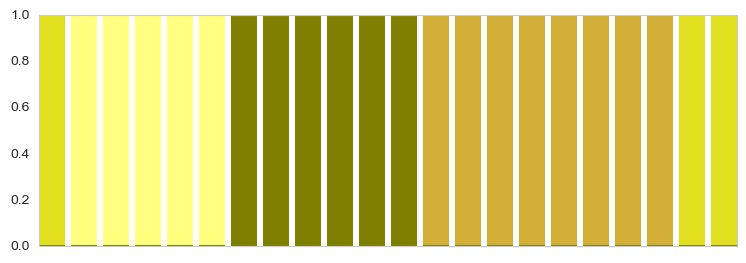

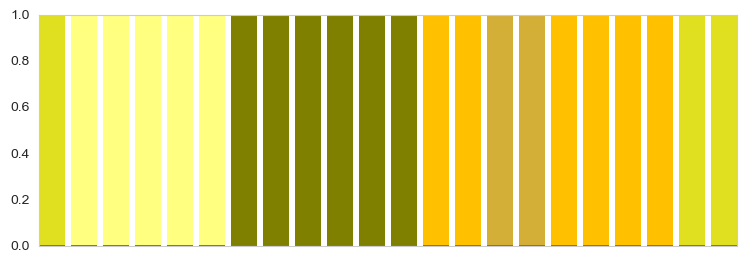

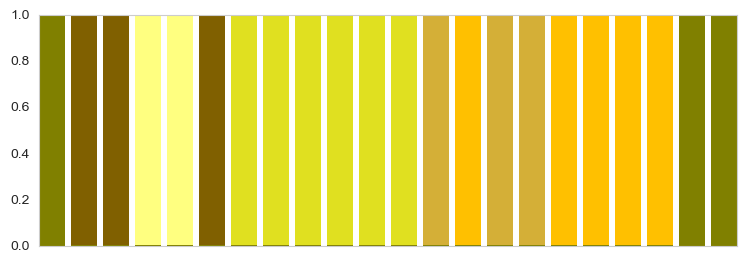

Text(22.406250000000007, 0.5, 'Ancestry Proportion')

In [ ]:
# Paths to your admixture output files
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.2.Q"
fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.fam'

plot_admix(q_file, fam_file)
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.3.Q"
plot_admix(q_file, fam_file)
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.4.Q"
plot_admix(q_file, fam_file)
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.5.Q"
plot_admix(q_file, fam_file)
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.6.Q"
plot_admix(q_file, fam_file)
ax.set_ylabel('Ancestry Proportion')


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_73405/3327125184.py:7: SyntaxWarning: invalid escape sequence '\s'
  q_data = pd.read_csv(q_file, sep='\s+', header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_73405/3327125184.py:10: SyntaxWarning: invalid escape sequence '\s'
  fam_data = pd.read_csv(fam_file, sep='\s+', header=None)


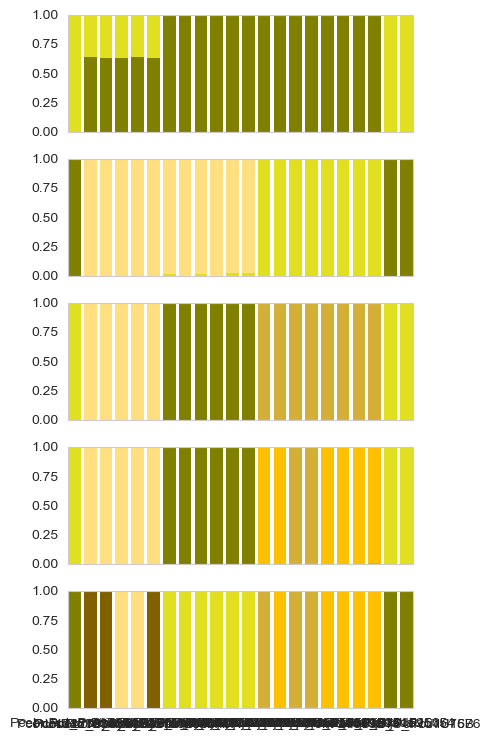

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_admix(ax, q_file, fam_file):
    # Load the .Q file
    q_data = pd.read_csv(q_file, sep='\s+', header=None)
    
    # Load the .fam file to get individual IDs
    fam_data = pd.read_csv(fam_file, sep='\s+', header=None)
    
    # Extract individual IDs
    individuals = fam_data[0].astype(str) + "_" + fam_data[1].astype(str)
    
    # Set the colors for each population
    num_populations = q_data.shape[1]
    colors = ["#808000", "#e0e020", "#ffdf80", "#d4af37", "#ffc000", "#806000"]

    #ffdf80

    #"#ffff4d"

    bottoms = np.zeros(q_data.shape[0])
    
    for k in range(num_populations):
        ax.bar(individuals, q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
        bottoms += q_data[k]
    
    # Remove gridlines
    ax.grid(False)
    
    # Set y limit from 0 to 1
    ax.set_ylim([0, 1])
    
    # Reduce free space on x-axis
    ax.margins(x=0)
    
    # Remove y-axis label and ticks
    #ax.yaxis.set_visible(False)
    
    # Remove x-axis label and ticks
    ax.xaxis.set_ticks_position('none')

    # Set ylabel and title for the subplot
    #ax.set_ylabel('Ancestry Proportion')
    #ax.set_title(f'K={num_populations}')

# Paths to your admixture output files
q_files = [
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.2.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.3.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.4.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.5.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.6.Q"
]

fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.fam'

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(q_files), ncols=1, figsize=(5, 1.5 * len(q_files)), sharex=True)

for ax, q_file in zip(axes, q_files):
    plot_admix(ax, q_file, fam_file)

# Adjust layout
plt.tight_layout()
plt.show()


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_73405/4138378098.py:7: SyntaxWarning: invalid escape sequence '\s'
  q_data = pd.read_csv(q_file, sep='\s+', header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_73405/4138378098.py:10: SyntaxWarning: invalid escape sequence '\s'
  fam_data = pd.read_csv(fam_file, sep='\s+', header=None)


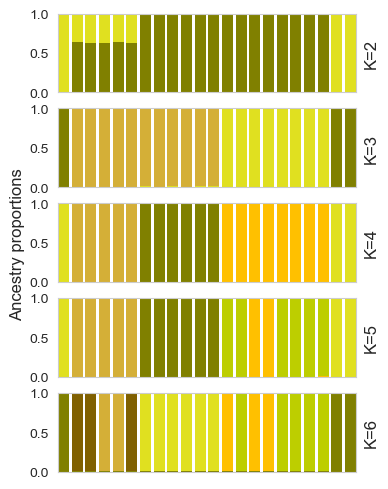

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_admix(ax, q_file, fam_file):
    # Load the .Q file
    q_data = pd.read_csv(q_file, sep='\s+', header=None)
    
    # Load the .fam file to get individual IDs
    fam_data = pd.read_csv(fam_file, sep='\s+', header=None)
    
    # Extract individual IDs
    individuals = fam_data[0].astype(str) + "_" + fam_data[1].astype(str)
    
    # Set the colors for each population
    num_populations = q_data.shape[1]
    #colors = ["#808000", "#e0e020", "#bdce00", "#d4af37", "#ffc000", "#806000"]
    #colors = ["#808000", "#e0e020", "#d4af37", "#ffc000", "#806000","#bdce00"]
    colors = ["#808000", "#e0e020", "#d4af37", "#ffc000","#bdce00","#806000"]

    #f4ff80
    #"#ffff80"

    bottoms = np.zeros(q_data.shape[0])
    
    for k in range(num_populations):
        ax.bar(range(len(individuals)), q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
        bottoms += q_data[k]
    
    # Remove gridlines
    ax.grid(False)
    
    # Set y limit from 0 to 1
    ax.set_ylim([0, 1])
    
    # Reduce free space on x-axis
    ax.margins(x=0)
    
    # Remove y-axis label and ticks
    #ax.yaxis.set_visible(False)
    
    # Remove x-axis label and ticks
    ax.xaxis.set_ticks_position('none')
    ax.set_xticks([])

    # Set title for the subplot
    #ax.set_title(f'K={num_populations}', pad=10)
    # Add title along the y-axis
    #ax.text(-0.05, 0.5, f'K={num_populations}', va='center', ha='center', rotation='vertical', fontsize=12, transform=ax.transAxes)
    ax.text(1.05, 0.5, f'K={num_populations}', va='center', ha='center', rotation='vertical', fontsize=12, transform=ax.transAxes)

# Paths to your admixture output files
q_files = [
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.2.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.3.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.4.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.5.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.6.Q"
]

fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.fam'

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(q_files), ncols=1, figsize=(4, 1 * len(q_files)), sharex=True)

for ax, q_file in zip(axes, q_files):
    plot_admix(ax, q_file, fam_file)

# Add common y-axis label
fig.text(0.04, 0.5, 'Ancestry proportions', va='center', rotation='vertical', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0.05, 0, 1, 1])
plt.subplots_adjust(hspace=0.2)  # Reduce gap between plots

#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/FIG3.pdf",bbox_inches="tight")

plt.show()


# Fig 3. B

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_24453/2593733921.py:10: SyntaxWarning: invalid escape sequence '\s'
  q_data = pd.read_csv(q_file, sep='\s+', header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_24453/2593733921.py:13: SyntaxWarning: invalid escape sequence '\s'
  fam_data = pd.read_csv(fam_file, sep='\s+', header=None)


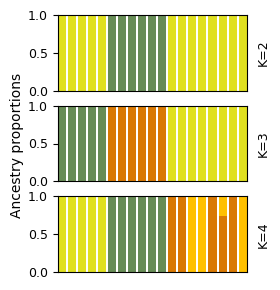

In [20]:
#cebuensis swapped


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_admix(ax, q_file, fam_file):
    # Load the .Q file
    q_data = pd.read_csv(q_file, sep='\s+', header=None)
    
    # Load the .fam file to get individual IDs
    fam_data = pd.read_csv(fam_file, sep='\s+', header=None)
    
    # Extract individual IDs
    individuals = fam_data[0].astype(str) + "_" + fam_data[1].astype(str)
    
    # Set the colors for each population
    num_populations = q_data.shape[1]
    colors = ["#678c56","#e0e020","#d97904", "#ffc000","#806000","#29401e"]

    #f4ff80
    #"#ffff80"

    bottoms = np.zeros(q_data.shape[0])
    
    for k in range(num_populations):
        ax.bar(range(len(individuals)), q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
        bottoms += q_data[k]
    
    # Remove gridlines
    ax.grid(False)
    
    # Set y limit from 0 to 1
    ax.set_ylim([0, 1])
    
    # Reduce free space on x-axis
    ax.margins(x=0)
    
    # Remove y-axis label and ticks
    #ax.yaxis.set_visible(False)
    
    # Remove x-axis label and ticks
    ax.xaxis.set_ticks_position('none')
    ax.tick_params(labelsize=9)
    ax.set_xticks([])

    # Set title for the subplot
    #ax.set_title(f'K={num_populations}', pad=10)
    # Add title along the y-axis
    #ax.text(-0.05, 0.5, f'K={num_populations}', va='center', ha='center', rotation='vertical', fontsize=12, transform=ax.transAxes)
    ax.text(1.09, 0.5, f'K={num_populations}', va='center', ha='center', rotation='vertical', fontsize=9, transform=ax.transAxes)

# Paths to your admixture output files
q_files = ["/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.2.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.3.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.4.Q"]


fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.fam'

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(q_files), ncols=1, figsize=(2.9, 1 * len(q_files)), sharex=True)

for ax, q_file in zip(axes, q_files):
    plot_admix(ax, q_file, fam_file)

# Add common y-axis label
fig.text(0.04, 0.5, 'Ancestry proportions', va='center', rotation='vertical', fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0.05, 0, 1, 1])
plt.subplots_adjust(hspace=0.2)  # Reduce gap between plots

plt.savefig("/Users/dshipilina/Digital_Ecosytem/Tokara Leaf Warbler/Tokara Leaf Warbler - Visuals/FIG3.pdf", bbox_inches="tight")
#plt.savefig("/Users/dshipilina/Digital_Ecosytem/Tokara Leaf Warbler/Tokara \Leaf \Warbler - Visuals/FIG3.png",bbox_inches="tight")

plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_98636/2631941821.py:10: SyntaxWarning: invalid escape sequence '\s'
  q_data = pd.read_csv(q_file, sep='\s+', header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_98636/2631941821.py:13: SyntaxWarning: invalid escape sequence '\s'
  fam_data = pd.read_csv(fam_file, sep='\s+', header=None)


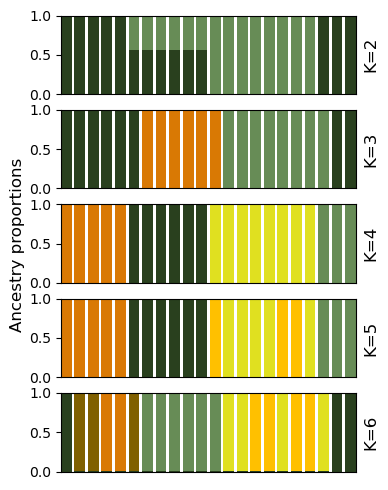

In [4]:
#cebuensis swapped


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_admix(ax, q_file, fam_file):
    # Load the .Q file
    q_data = pd.read_csv(q_file, sep='\s+', header=None)
    
    # Load the .fam file to get individual IDs
    fam_data = pd.read_csv(fam_file, sep='\s+', header=None)
    
    # Extract individual IDs
    individuals = fam_data[0].astype(str) + "_" + fam_data[1].astype(str)
    
    # Set the colors for each population
    num_populations = q_data.shape[1]
    #colors = ["#808000", "#e0e020", "#bdce00", "#d4af37", "#ffc000", "#806000"]
    #colors = ["#808000", "#e0e020", "#d4af37", "#ffc000", "#806000","#bdce00"]
    #colors = ["#808000", "#e0e020", "#d4af37", "#ffc000","#bdce00","#806000"]
    colors = ["#29401e","#678c56",
"#d97904",
"#e0e020",
"#ffc000",
"#806000"]

    #f4ff80
    #"#ffff80"

    bottoms = np.zeros(q_data.shape[0])
    
    for k in range(num_populations):
        ax.bar(range(len(individuals)), q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
        bottoms += q_data[k]
    
    # Remove gridlines
    ax.grid(False)
    
    # Set y limit from 0 to 1
    ax.set_ylim([0, 1])
    
    # Reduce free space on x-axis
    ax.margins(x=0)
    
    # Remove y-axis label and ticks
    #ax.yaxis.set_visible(False)
    
    # Remove x-axis label and ticks
    ax.xaxis.set_ticks_position('none')
    ax.set_xticks([])

    # Set title for the subplot
    #ax.set_title(f'K={num_populations}', pad=10)
    # Add title along the y-axis
    #ax.text(-0.05, 0.5, f'K={num_populations}', va='center', ha='center', rotation='vertical', fontsize=12, transform=ax.transAxes)
    ax.text(1.05, 0.5, f'K={num_populations}', va='center', ha='center', rotation='vertical', fontsize=12, transform=ax.transAxes)

# Paths to your admixture output files
q_files = [
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k0.pruned.2.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k0.pruned.3.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k0.pruned.4.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k0.pruned.5.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k0.pruned.6.Q"
]

fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.fam'

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(q_files), ncols=1, figsize=(4, 1 * len(q_files)), sharex=True)

for ax, q_file in zip(axes, q_files):
    plot_admix(ax, q_file, fam_file)

# Add common y-axis label
fig.text(0.04, 0.5, 'Ancestry proportions', va='center', rotation='vertical', fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0.05, 0, 1, 1])
plt.subplots_adjust(hspace=0.2)  # Reduce gap between plots

plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/FIG3.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/FIG3.png",bbox_inches="tight")

plt.show()


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_98636/2635983800.py:6: SyntaxWarning: invalid escape sequence '\s'
  q_data = pd.read_csv(q_file, sep='\s+', header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_98636/2635983800.py:7: SyntaxWarning: invalid escape sequence '\s'
  fam_data = pd.read_csv(fam_file, sep='\s+', header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_98636/2635983800.py:6: SyntaxWarning: invalid escape sequence '\s'
  q_data = pd.read_csv(q_file, sep='\s+', header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_98636/2635983800.py:7: SyntaxWarning: invalid escape sequence '\s'
  fam_data = pd.read_csv(fam_file, sep='\s+', header=None)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.fam'

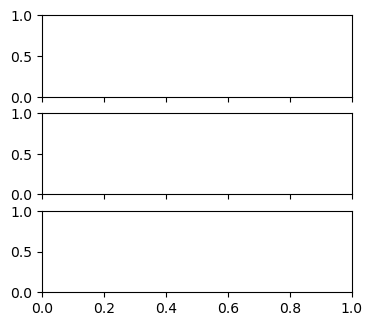

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_admix(ax, q_file, fam_file):
    q_data = pd.read_csv(q_file, sep='\s+', header=None)
    fam_data = pd.read_csv(fam_file, sep='\s+', header=None)
    individuals = fam_data[0].astype(str) + "_" + fam_data[1].astype(str)

    num_populations = q_data.shape[1]
    colors = [
        "#29401e", "#678c56",  # greens
        "#d97904",             # orange
        "#e0e020", "#ffc000", "#806000"  # yellows/browns
    ]

    bottoms = np.zeros(q_data.shape[0])
    for k in range(num_populations):
        ax.bar(range(len(individuals)), q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
        bottoms += q_data[k]

    ax.grid(False)
    ax.set_ylim([0, 1])
    ax.margins(x=0)
    ax.xaxis.set_ticks_position('none')
    ax.set_xticks([])
    ax.text(1.05, 0.5, f'K={num_populations}', va='center', ha='center', rotation='vertical', fontsize=12, transform=ax.transAxes)

# Updated Q files for the new figure
q_files = [
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.2.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.3.Q",
    "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.4.Q"
]

fam_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k_oli_cebu_relaxLD.fam"

# Create subplots
fig, axes = plt.subplots(nrows=len(q_files), ncols=1, figsize=(4, 1.2 * len(q_files)), sharex=True)

for ax, q_file in zip(axes, q_files):
    plot_admix(ax, q_file, fam_file)

fig.text(0.04, 0.5, 'Ancestry proportions', va='center', rotation='vertical', fontsize=12)
plt.tight_layout(rect=[0.05, 0, 1, 1])
plt.subplots_adjust(hspace=0.2)

# Save the new figure
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/FIG3.pdf", bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/PCA_ADMIXTURE_NO_OLI_CEB/FIG3.png", bbox_inches="tight")

plt.show()


In [ ]:
q_data = pd.read_csv(q_file, sep='\s+', header=None)

# Step 1: Extract the first row
first_row = q_data.iloc[0]

# Step 2: Drop the first row from the DataFram
q_data = q_data.drop(q_data.index[0])

# Step 3: Append the extracted row to the end of the DataFrame
q_data = q_data.append(first_row, ignore_index=True)

q_data

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_73405/2750639581.py:1: SyntaxWarning: invalid escape sequence '\s'
  q_data = pd.read_csv(q_file, sep='\s+', header=None)


AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
first_row


0    0.99995
1    0.00001
2    0.00001
3    0.00001
4    0.00001
5    0.00001
Name: 0, dtype: float64

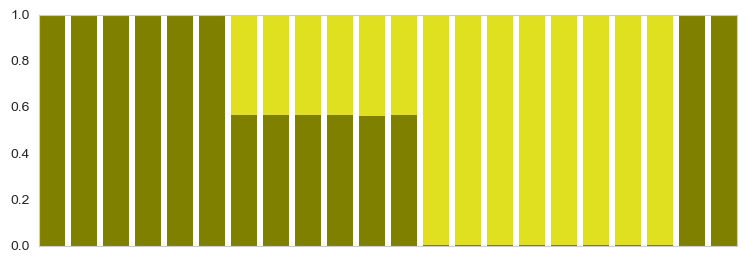

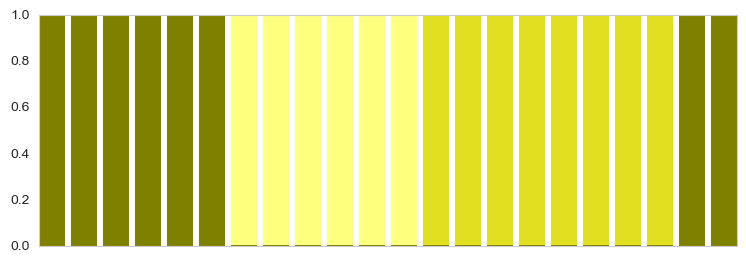

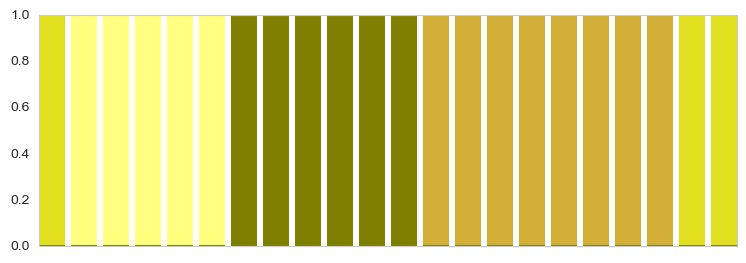

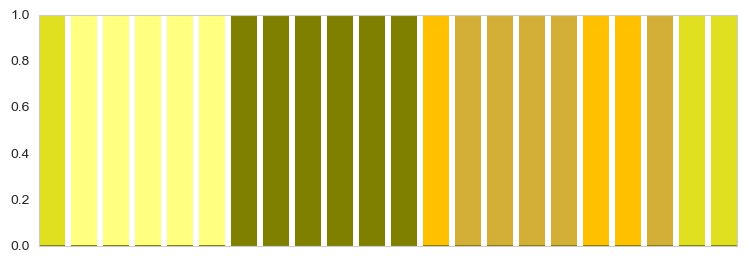

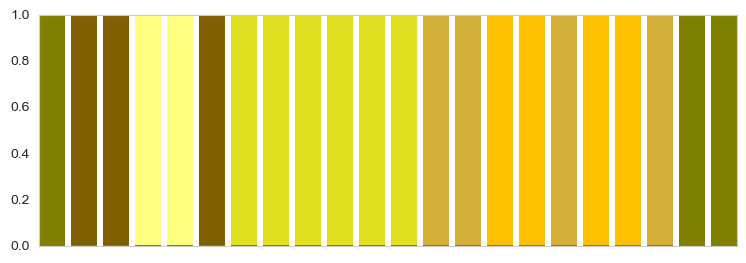

In [ ]:
# Paths to your admixture output files
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.pruned.2.Q"
fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.fam'

plot_admix(q_file, fam_file)
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.pruned.3.Q"
plot_admix(q_file, fam_file)
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.pruned.4.Q"
plot_admix(q_file, fam_file)
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.pruned.5.Q"
plot_admix(q_file, fam_file)
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.pruned.6.Q"
plot_admix(q_file, fam_file)
#ax.set_ylabel('Ancestry Proportion')


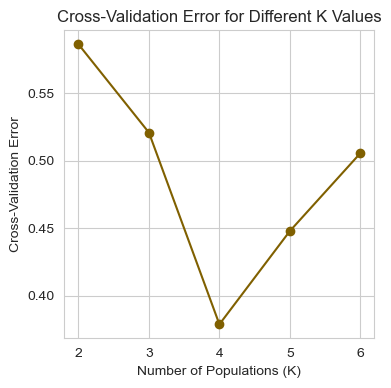

In [ ]:
import matplotlib.pyplot as plt

# Data for cross-validation errors
cv_errors = {
    2: 0.58621,
    3: 0.52086,
    4: 0.37896,
    5: 0.44799,
    6: 0.50559
}

# Extract K values and corresponding CV errors
K_values = list(cv_errors.keys())
errors = list(cv_errors.values())

# Plotting the CV errors
plt.figure(figsize=(4, 4))
plt.plot(K_values, errors, marker='o', linestyle='-', color="#806000", label='CV Error')
plt.xlabel('Number of Populations (K)')
plt.ylabel('Cross-Validation Error')
plt.title('Cross-Validation Error for Different K Values')
plt.xticks(K_values)  # Ensure all K values are shown on the x-axis
plt.grid(True)
#plt.legend()

# Show the plot
plt.show()


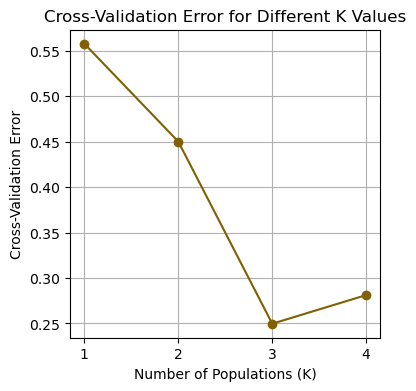

In [ ]:
import matplotlib.pyplot as plt

# Data for cross-validation errors
cv_errors = {
    1: 0.55768,
    2:0.44999,
    3:0.24967,
    4:0.28118,
}

# Extract K values and corresponding CV errors
K_values = list(cv_errors.keys())
errors = list(cv_errors.values())

# Plotting the CV errors
plt.figure(figsize=(4, 4))
plt.plot(K_values, errors, marker='o', linestyle='-', color="#806000", label='CV Error')
plt.xlabel('Number of populations (K)')
plt.ylabel('CV')
plt.title('Cross-validation error for different K values')
plt.xticks(K_values)  # Ensure all K values are shown on the x-axis
plt.grid(True)
#plt.legend()

# Show the plot
plt.show()



/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_40280/2970287841.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  q_data = pd.read_csv(q_file, delim_whitespace=True, header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_40280/2970287841.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fam_data = pd.read_csv(fam_file, delim_whitespace=True, header=None)


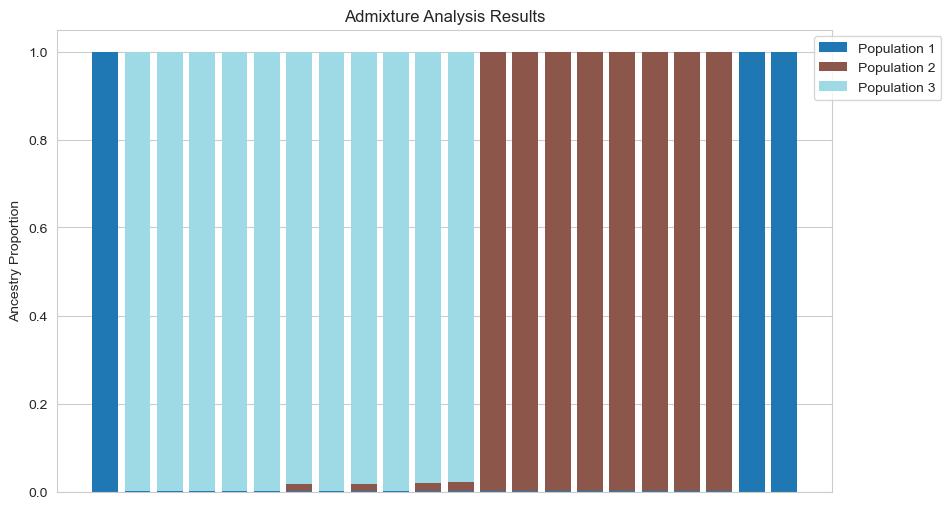

In [ ]:
# Paths to your admixture output files
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.3.Q"
fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.fam'

# Load the .Q file
q_data = pd.read_csv(q_file, delim_whitespace=True, header=None)

# Load the .fam file to get individual IDs
fam_data = pd.read_csv(fam_file, delim_whitespace=True, header=None)

# Extract individual IDs
individuals = fam_data[0].astype(str) + "_" + fam_data[1].astype(str)

# Set the colors for each population
num_populations = q_data.shape[1]
colors = plt.cm.tab20(np.linspace(0, 1, num_populations))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bottoms = np.zeros(q_data.shape[0])

for k in range(num_populations):
    ax.bar(individuals, q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
    bottoms += q_data[k]

ax.set_ylabel('Ancestry Proportion')
ax.set_title('Admixture Analysis Results')
ax.set_xticks([])
ax.legend([f'Population {i+1}' for i in range(num_populations)], loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_40280/1318208718.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  q_data = pd.read_csv(q_file, delim_whitespace=True, header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_40280/1318208718.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fam_data = pd.read_csv(fam_file, delim_whitespace=True, header=None)


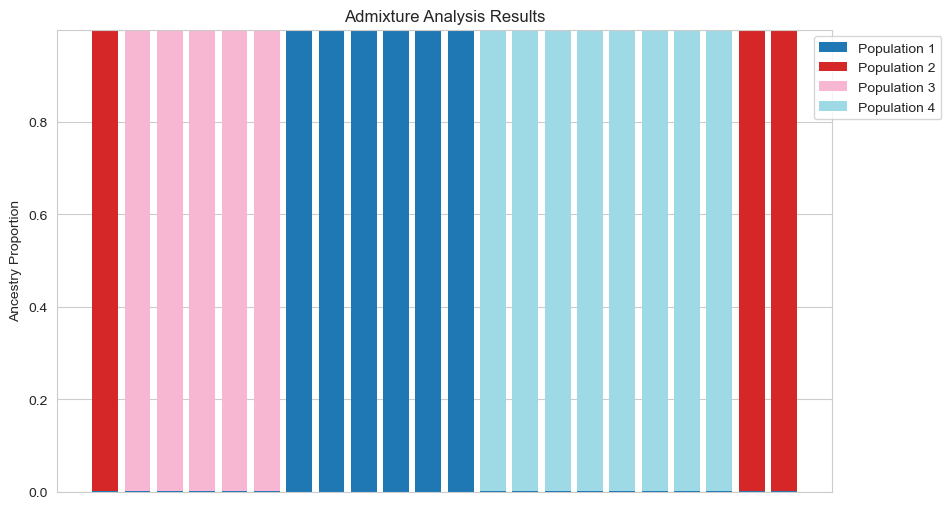

In [ ]:
# Paths to your admixture output files
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.4.Q"
fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.fam'

# Load the .Q file
q_data = pd.read_csv(q_file, delim_whitespace=True, header=None)

# Load the .fam file to get individual IDs
fam_data = pd.read_csv(fam_file, delim_whitespace=True, header=None)

# Extract individual IDs
individuals = fam_data[0].astype(str) + "_" + fam_data[1].astype(str)

# Set the colors for each population
num_populations = q_data.shape[1]
colors = plt.cm.tab20(np.linspace(0, 1, num_populations))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bottoms = np.zeros(q_data.shape[0])

for k in range(num_populations):
    ax.bar(individuals, q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
    bottoms += q_data[k]

ax.set_ylabel('Ancestry Proportion')
ax.set_title('Admixture Analysis Results')
ax.set_xticks([])
ax.legend([f'Population {i+1}' for i in range(num_populations)], loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_40280/4253374859.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  q_data = pd.read_csv(q_file, delim_whitespace=True, header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_40280/4253374859.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fam_data = pd.read_csv(fam_file, delim_whitespace=True, header=None)


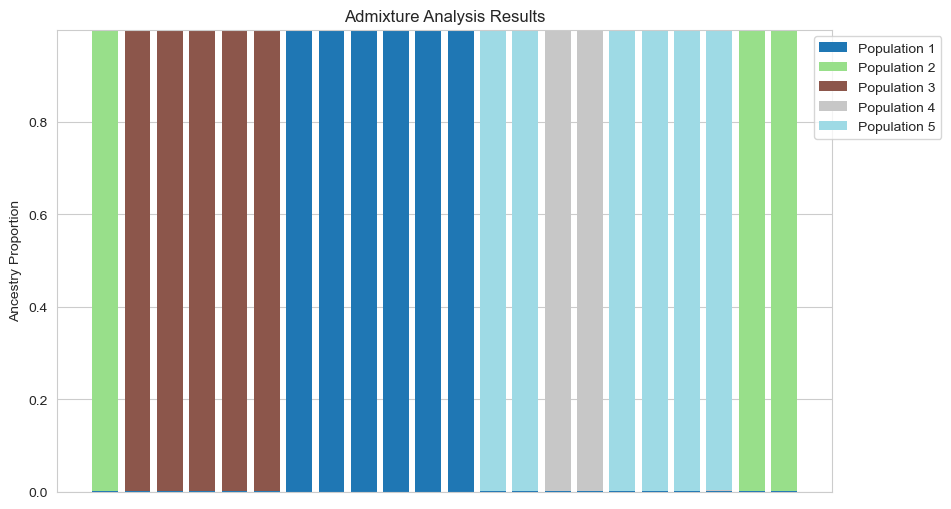

In [ ]:
# Paths to your admixture output files
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.5.Q"
fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.fam'

# Load the .Q file
q_data = pd.read_csv(q_file, delim_whitespace=True, header=None)

# Load the .fam file to get individual IDs
fam_data = pd.read_csv(fam_file, delim_whitespace=True, header=None)

# Extract individual IDs
individuals = fam_data[0].astype(str) + "_" + fam_data[1].astype(str)

# Set the colors for each population
num_populations = q_data.shape[1]
colors = plt.cm.tab20(np.linspace(0, 1, num_populations))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bottoms = np.zeros(q_data.shape[0])

for k in range(num_populations):
    ax.bar(individuals, q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
    bottoms += q_data[k]

ax.set_ylabel('Ancestry Proportion')
ax.set_title('Admixture Analysis Results')
ax.set_xticks([])
ax.legend([f'Population {i+1}' for i in range(num_populations)], loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_40280/3242391882.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  q_data = pd.read_csv(q_file, delim_whitespace=True, header=None)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_40280/3242391882.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  fam_data = pd.read_csv(fam_file, delim_whitespace=True, header=None)


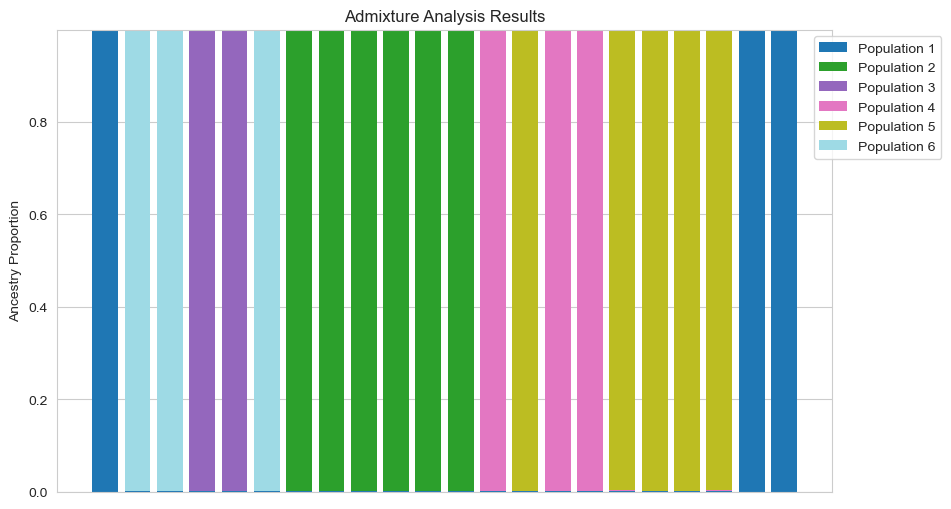

In [ ]:
# Paths to your admixture output files
q_file = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.6.Q"
fam_file = '/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ADMIXTURE_outgroup/pijimae_outgroups_finalfilter_400k.fam'

# Load the .Q file
q_data = pd.read_csv(q_file, delim_whitespace=True, header=None)

# Load the .fam file to get individual IDs
fam_data = pd.read_csv(fam_file, delim_whitespace=True, header=None)

# Extract individual IDs
individuals = fam_data[0].astype(str) + "_" + fam_data[1].astype(str)

# Set the colors for each population
num_populations = q_data.shape[1]
colors = plt.cm.tab20(np.linspace(0, 1, num_populations))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bottoms = np.zeros(q_data.shape[0])

for k in range(num_populations):
    ax.bar(individuals, q_data[k], bottom=bottoms, color=colors[k], edgecolor='none')
    bottoms += q_data[k]

ax.set_ylabel('Ancestry Proportion')
ax.set_title('Admixture Analysis Results')
ax.set_xticks([])
ax.legend([f'Population {i+1}' for i in range(num_populations)], loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

# Statistics ijimae (pixy)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def calculate_stats(data_column):
    #print("Calculated for: ",str(data_column))
    # Mean (Average)
    mean = np.mean(data_column)
    print("Mean:", mean)
    
    # Mean (Average)
    min = np.min(data_column)
    print("Min:", min)
    
    # Mean (Average)
    max = np.max(data_column)
    print("Max:", max)

    # Median (Middle value)
    median = np.median(data_column)
    print("Median:", median)

    # Standard Deviation
    std_dev = np.std(data_column)
    print("Standard Deviation:", std_dev)

    # Variance
    variance = np.var(data_column)
    print("Variance:", variance)

# Data is here:

In [3]:
# Key function

df_main = pd.DataFrame() 
max_values = []
file_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/PijimaeNavsMi"
max_values = []
df_temp_pi = pd.read_csv(file_path + '_pi.txt', sep='\t') 
df_pi_n = df_temp_pi[df_temp_pi['pop'] == 'Mi']
df_pi_s = df_temp_pi[df_temp_pi['pop'] == 'Na']
merged_pi_df = pd.merge(df_pi_n, df_pi_s, on=['window_pos_1','window_pos_2','chromosome'], how='right')
merged_pi_df

df_temp_dxy = pd.read_csv(file_path + '_dxy.txt', sep='\t')
df_temp_fst = pd.read_csv(file_path + '_fst.txt' , sep='\t')

merged_df = pd.merge(df_temp_dxy, df_temp_fst, on=['window_pos_1','window_pos_2','pop1','pop2','chromosome'], how='right')
merged_all_df = pd.merge(merged_df, merged_pi_df, on=['window_pos_1','window_pos_2','chromosome'], how='right')
merged_all_df
merged_all_df = merged_all_df.rename(columns={'avg_pi_x': 'avg_pi_Mi', 'avg_pi_y': 'avg_pi_Na'})
merged_all_df = merged_all_df.dropna()
print(len(merged_all_df['no_sites']))
merged_all_df = merged_all_df[merged_all_df['no_sites'] > 16000]
print(np.mean(merged_all_df['no_sites']))
print(len(merged_all_df['no_sites']))

max_value = merged_all_df['window_pos_2'].max()
max_values.append(max_value)
    
## Get the maximum value of 'window_pos' in the main DataFrame
#max_value = df_main['window_global'].max() if not df_main.empty else 0
        
    # Update the 'window_pos' values in the current DataFrame
    #grouped_merged_all_df['window_global'] += max_value
    
    # Append the data to the main DataFrame
    #df_main = df_main.append(grouped_merged_all_df, ignore_index=True)

51932
18388.729814049075
40387


In [ ]:
print("Whole genome:")
print("PI in Miyake")
calculate_stats(merged_all_df['avg_pi_Mi'])

print("PI in Nakanoshima")
calculate_stats(merged_all_df['avg_pi_Na'])

print("Dxy")
calculate_stats(merged_all_df['avg_dxy'])

print("Fst")
calculate_stats(merged_all_df['avg_hudson_fst'])




Whole genome:
PI in Miyake


TypeError: calculate_stats() missing 1 required positional argument: 'name'

# All Statistics excluding ZW-chromosome

In [ ]:
print("Whole genome:")
print("PI in Miyake")
calculate_stats(merged_all_df_noX['avg_pi_Mi'])

print("PI in Nakanoshima")
calculate_stats(merged_all_df_noX['avg_pi_Na'])

print("Dxy")
calculate_stats(merged_all_df_noX['avg_dxy'])

print("Fst")
calculate_stats(merged_all_df_noX['avg_hudson_fst'])

Whole genome:
PI in Miyake
Mean: 0.0033812556745766863
Min: 0.0001429388221841
Max: 0.0455094253976935
Median: 0.0029888762666718
Standard Deviation: 0.0026666206650307936
Variance: 7.1108657711692715e-06
PI in Nakanoshima
Mean: 0.0023331397897336692
Min: 6.658523758630634e-05
Max: 0.0442358851576728
Median: 0.0021106454617092
Standard Deviation: 0.0012638962719949362
Variance: 1.5974337863626975e-06
Dxy
Mean: 0.01114433700744863
Min: 0.0031168499330372
Max: 0.0451851453946426
Median: 0.0106820812872686
Standard Deviation: 0.0030284505674800038
Variance: 9.171512839669957e-06
Fst
Mean: 0.7474435376437688
Min: 0.0069157709736272
Max: 0.9664271941726772
Median: 0.7559990947390413
Standard Deviation: 0.08032800352251294
Variance: 0.006452588149912852


In [47]:
merged_all_df_noX = df_main_sorted[(df_main_sorted < 1950) | (df_main_sorted > 2310)].dropna()


NameError: name 'df_main_sorted' is not defined

In [ ]:
merged_all_df_noX = df_main_sorted.drop(df_main_sorted.loc[1950:2310].index)
merged_all_df_noX


pop1 pop2      chromosome  window_pos_1  window_pos_2   avg_dxy  \
41208   Mi   Na  VHQE01000408.1      30860001      30880000  0.009129   
41763   Mi   Na  VHQE01000408.1      41960001      41980000  0.015657   
41764   Mi   Na  VHQE01000408.1      41980001      42000000  0.012953   
41765   Mi   Na  VHQE01000408.1      42000001      42020000  0.014811   
41767   Mi   Na  VHQE01000408.1      42040001      42060000  0.014716   
...    ...  ...             ...           ...           ...       ...   
14798   Mi   Na  VHQE01000331.1        520001        540000  0.004953   
14785   Mi   Na  VHQE01000331.1        260001        280000  0.013232   
14775   Mi   Na  VHQE01000331.1         60001         80000  0.016462   
14807   Mi   Na  VHQE01000331.1        700001        720000  0.006755   
14786   Mi   Na  VHQE01000331.1        280001        300000  0.010778   

       no_sites  count_diffs  count_comparisons  count_missing  ...  \
41208   19075.0      33432.0          3662376.0           24.0  ...   
41763   16673.0      50120.0          3201216.0            0.0  ...   
41764   16151.0      40168.0          3100992.0            0.0  ...   
41765   16778.0      47712.0          3221376.0            0.0  ...   
41767   17800.0      50292.0          3417600.0            0.0  ...   
...         ...          ...                ...            ...  ...   
14798   19295.0      18348.0          3704640.0            0.0  ...   
14785   17310.0      43976.0          3323520.0            0.0  ...   
14775   16291.0      51488.0          3127656.0          216.0  ...   
14807   19326.0      25064.0          3710592.0            0.0  ...   
14786   16439.0      34020.0          3156288.0            0.0  ...   

       no_sites_x  count_diffs_x count_comparisons_x  count_missing_x  pop_y  \
41208       19075         3329.0           1258950.0              0.0     Na   
41763       16673         5466.0           1100418.0              0.0     Na   
41764       16151         4704.0           1065966.0              0.0     Na   
41765       16778         6257.0           1107348.0              0.0     Na   
41767       17800         8475.0           1174800.0              0.0     Na   
...           ...            ...                 ...              ...    ...   
14798       19295         2130.0           1273470.0              0.0     Na   
14785       17310         4761.0           1142460.0              0.0     Na   
14775       16291         8342.0           1075206.0              0.0     Na   
14807       19326         1166.0           1275516.0              0.0     Na   
14786       16439         5643.0           1084974.0              0.0     Na   

       avg_pi_Na  no_sites_y  count_diffs_y count_comparisons_y  \
41208   0.001786       19075         4087.0           2288971.0   
41763   0.004267       16673         8537.0           2000760.0   
41764   0.003218       16151         6237.0           1938120.0   
41765   0.005065       16778        10197.0           2013360.0   
41767   0.003109       17800         6641.0           2136000.0   
...          ...         ...            ...                 ...   
14798   0.000678       19295         1569.0           2315400.0   
14785   0.003847       17310         7990.0           2077200.0   
14775   0.005210       16291        10184.0           1954659.0   
14807   0.000782       19326         1814.0           2319120.0   
14786   0.002905       16439         5731.0           1972680.0   

       count_missing_y  
41208              2.0  
41763              0.0  
41764              0.0  
41765              0.0  
41767              0.0  
...                ...  
14798              0.0  
14785              0.0  
14775             18.0  
14807              0.0  
14786              0.0  

[40387 rows x 24 columns]

In [ ]:
merged_all_df_noX=df_main_sorted['avg_pi_Mi'][(df_main_sorted['avg_pi_Mi'] < 1950) | (df_main_sorted['avg_pi_Mi'] > 2310)]
merged_all_df_noX

41208    0.002644
41763    0.004967
41764    0.004413
41765    0.005650
41767    0.007214
           ...   
14798    0.001673
14785    0.004167
14775    0.007759
14807    0.000914
14786    0.005201
Name: avg_pi_Mi, Length: 40387, dtype: float64

### Comparing pi values

Statistics for Miyake:

Mean: 0.0033812556745766863

Median: 0.0029888762666718

Standard Deviation: 0.002666653678997987

Variance: 7.111041843713499e-06

Range: 0.0001429388221841 - 0.0455094253976935

Statistics for Nakanoshima:

Mean: 0.0023331397897336692

Median: 0.0021106454617092

Standard Deviation: 0.001263911919601139

Variance: 1.5974733405098366e-06

Range: 6.658523758630634e-05 - 0.0442358851576728

Shapiro-Wilk test for Miyake normality: p-value = 2.365794460165849e-140
Shapiro-Wilk test for Nakanoshima normality: p-value = 6.099788342929451e-105
Levene's test for equal variances: p-value = 1.1393300359207333e-77
Welch's t-test for mean comparison: t-stat = 71.37695941660186, p-value = 0.0
Kolmogorov-Smirnov test for distribution comparison: d-stat = 0.33518211305618145, p-value = 0.0


/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/1706600081.py:27: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40387.
  _, p_mi_normal = stats.shapiro(mi_data)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/1706600081.py:28: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40387.
  _, p_na_normal = stats.shapiro(na_data)


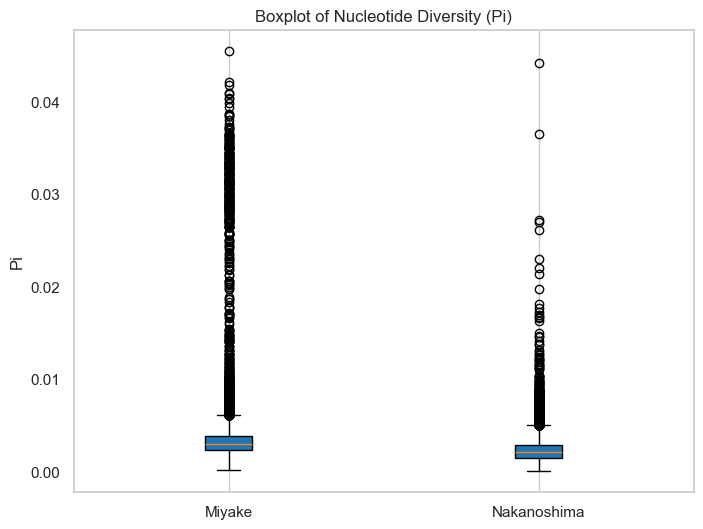

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming `merged_all_df` is your DataFrame with 'avg_pi_Mi' and 'avg_pi_Na'
# Replace this with actual loading code if necessary
# merged_all_df = pd.read_csv("your_data.csv")

# Define a function to calculate and print basic stats
def calculate_stats(data, name):
    print(f"Statistics for {name}:\n")
    print(f"Mean: {data.mean()}\n")
    print(f"Median: {data.median()}\n")
    print(f"Standard Deviation: {data.std()}\n")
    print(f"Variance: {data.var()}\n")
    print(f"Range: {data.min()} - {data.max()}\n")

# Calculate statistics
calculate_stats(merged_all_df['avg_pi_Mi'], "Miyake")
calculate_stats(merged_all_df['avg_pi_Na'], "Nakanoshima")

# Perform statistical tests
mi_data = merged_all_df['avg_pi_Mi'].dropna()
na_data = merged_all_df['avg_pi_Na'].dropna()

# Test for normality
_, p_mi_normal = stats.shapiro(mi_data)
_, p_na_normal = stats.shapiro(na_data)

print(f"Shapiro-Wilk test for Miyake normality: p-value = {p_mi_normal}")
print(f"Shapiro-Wilk test for Nakanoshima normality: p-value = {p_na_normal}")

# Test for equality of variances
_, p_var = stats.levene(mi_data, na_data)
print(f"Levene's test for equal variances: p-value = {p_var}")

# Compare means (Welch's t-test, assumes unequal variances)
t_stat, p_mean = stats.ttest_ind(mi_data, na_data, equal_var=False)
print(f"Welch's t-test for mean comparison: t-stat = {t_stat}, p-value = {p_mean}")

# Compare distributions (Kolmogorov-Smirnov test)
d_stat, p_dist = stats.ks_2samp(mi_data, na_data)
print(f"Kolmogorov-Smirnov test for distribution comparison: d-stat = {d_stat}, p-value = {p_dist}")

# Create boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([mi_data, na_data], labels=['Miyake', 'Nakanoshima'], patch_artist=True)
plt.title("Boxplot of Nucleotide Diversity (Pi)")
plt.ylabel("Pi")
plt.grid(axis='y')
plt.show()


Statistics for Miyake:

Mean: 0.0033812556745766863

Median: 0.0029888762666718

Standard Deviation: 0.002666653678997987

Variance: 7.111041843713499e-06

Range: 0.0001429388221841 - 0.0455094253976935

Statistics for Nakanoshima:

Mean: 0.0023331397897336692

Median: 0.0021106454617092

Standard Deviation: 0.001263911919601139

Variance: 1.5974733405098366e-06

Range: 6.658523758630634e-05 - 0.0442358851576728

Shapiro-Wilk test for Miyake normality: p-value = 0.000000000000000
Shapiro-Wilk test for Nakanoshima normality: p-value = 0.000000000000000
Levene's test for equal variances: p-value = 0.000000000000000
Welch's t-test for mean comparison: t-stat = 71.37695941660186, p-value = 0.000000000000000
Kolmogorov-Smirnov test for distribution comparison: d-stat = 0.33518211305618145, p-value = 0.000000000000000


/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/2887724605.py:27: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40387.
  _, p_mi_normal = stats.shapiro(mi_data)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/2887724605.py:28: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40387.
  _, p_na_normal = stats.shapiro(na_data)


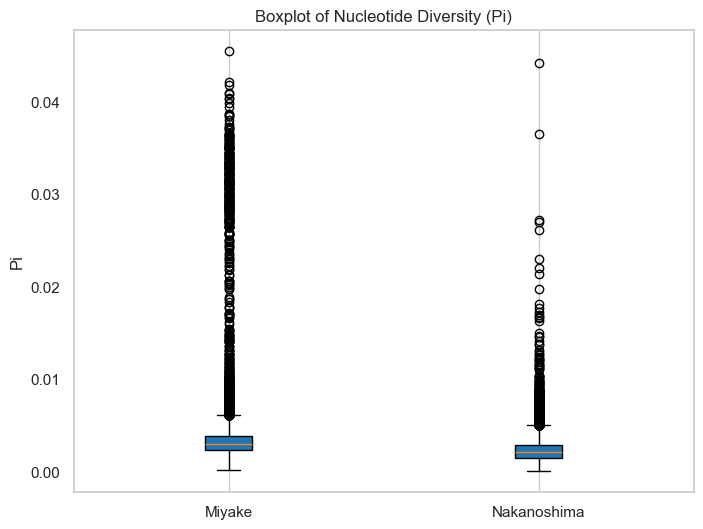

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming `merged_all_df` is your DataFrame with 'avg_pi_Mi' and 'avg_pi_Na'
# Replace this with actual loading code if necessary
# merged_all_df = pd.read_csv("your_data.csv")

# Define a function to calculate and print basic stats
def calculate_stats(data, name):
    print(f"Statistics for {name}:\n")
    print(f"Mean: {data.mean()}\n")
    print(f"Median: {data.median()}\n")
    print(f"Standard Deviation: {data.std()}\n")
    print(f"Variance: {data.var()}\n")
    print(f"Range: {data.min()} - {data.max()}\n")

# Calculate statistics
calculate_stats(merged_all_df['avg_pi_Mi'], "Miyake")
calculate_stats(merged_all_df['avg_pi_Na'], "Nakanoshima")

# Perform statistical tests
mi_data = merged_all_df['avg_pi_Mi'].dropna()
na_data = merged_all_df['avg_pi_Na'].dropna()

# Test for normality
_, p_mi_normal = stats.shapiro(mi_data)
_, p_na_normal = stats.shapiro(na_data)

print(f"Shapiro-Wilk test for Miyake normality: p-value = {p_mi_normal:.15f}")
print(f"Shapiro-Wilk test for Nakanoshima normality: p-value = {p_na_normal:.15f}")

# Test for equality of variances
_, p_var = stats.levene(mi_data, na_data)
print(f"Levene's test for equal variances: p-value = {p_var:.15f}")

# Compare means (Welch's t-test, assumes unequal variances)
t_stat, p_mean = stats.ttest_ind(mi_data, na_data, equal_var=False)
print(f"Welch's t-test for mean comparison: t-stat = {t_stat}, p-value = {p_mean:.15f}")

# Compare distributions (Kolmogorov-Smirnov test)
d_stat, p_dist = stats.ks_2samp(mi_data, na_data)
print(f"Kolmogorov-Smirnov test for distribution comparison: d-stat = {d_stat}, p-value = {p_dist:.15f}")

# Create boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([mi_data, na_data], labels=['Miyake', 'Nakanoshima'], patch_artist=True)
plt.title("Boxplot of Nucleotide Diversity (Pi)")
plt.ylabel("Pi")
plt.grid(axis='y')
plt.show()


Statistics for Miyake:

Mean: 0.0033812556745766863

Median: 0.0029888762666718

Standard Deviation: 0.002666653678997987

Variance: 7.111041843713499e-06

Range: 0.0001429388221841 - 0.0455094253976935

Statistics for Nakanoshima:

Mean: 0.0023331397897336692

Median: 0.0021106454617092

Standard Deviation: 0.001263911919601139

Variance: 1.5974733405098366e-06

Range: 6.658523758630634e-05 - 0.0442358851576728

Shapiro-Wilk test for Miyake normality: p-value = 2.365794460165849e-140
Shapiro-Wilk test for Nakanoshima normality: p-value = 6.099788342929451e-105
Levene's test for equal variances: p-value = 1.1393300359207333e-77
Welch's t-test for mean comparison: t-stat = 71.37695941660186, p-value = 0.0
Kolmogorov-Smirnov test for distribution comparison: d-stat = 0.33518211305618145, p-value = 0.0


/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/1706600081.py:27: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40387.
  _, p_mi_normal = stats.shapiro(mi_data)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/1706600081.py:28: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40387.
  _, p_na_normal = stats.shapiro(na_data)


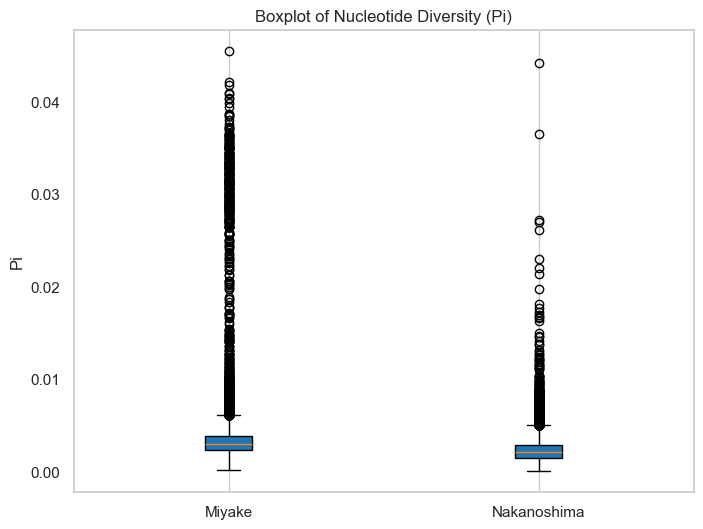

In [ ]:
#Key code

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming `merged_all_df` is your DataFrame with 'avg_pi_Mi' and 'avg_pi_Na'
# Replace this with actual loading code if necessary
# merged_all_df = pd.read_csv("your_data.csv")

# Define a function to calculate and print basic stats
def calculate_stats(data, name):
    print(f"Statistics for {name}:\n")
    print(f"Mean: {data.mean()}\n")
    print(f"Median: {data.median()}\n")
    print(f"Standard Deviation: {data.std()}\n")
    print(f"Variance: {data.var()}\n")
    print(f"Range: {data.min()} - {data.max()}\n")

# Calculate statistics
calculate_stats(merged_all_df['avg_pi_Mi'], "Miyake")
calculate_stats(merged_all_df['avg_pi_Na'], "Nakanoshima")

# Perform statistical tests
mi_data = merged_all_df['avg_pi_Mi'].dropna()
na_data = merged_all_df['avg_pi_Na'].dropna()

# Test for normality
_, p_mi_normal = stats.shapiro(mi_data)
_, p_na_normal = stats.shapiro(na_data)

print(f"Shapiro-Wilk test for Miyake normality: p-value = {p_mi_normal}")
print(f"Shapiro-Wilk test for Nakanoshima normality: p-value = {p_na_normal}")

# Test for equality of variances
_, p_var = stats.levene(mi_data, na_data)
print(f"Levene's test for equal variances: p-value = {p_var}")

# Compare means (Welch's t-test, assumes unequal variances)
t_stat, p_mean = stats.ttest_ind(mi_data, na_data, equal_var=False)
print(f"Welch's t-test for mean comparison: t-stat = {t_stat}, p-value = {p_mean}")

# Compare distributions (Kolmogorov-Smirnov test)
d_stat, p_dist = stats.ks_2samp(mi_data, na_data)
print(f"Kolmogorov-Smirnov test for distribution comparison: d-stat = {d_stat}, p-value = {p_dist}")

# Create boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([mi_data, na_data], labels=['Miyake', 'Nakanoshima'], patch_artist=True)
plt.title("Boxplot of Nucleotide Diversity (Pi)")
plt.ylabel("Pi")
plt.grid(axis='y')
plt.show()


In [ ]:
print(f"Kolmogorov-Smirnov test for distribution comparison: d-stat = {d_stat}, p-value = {p_dist:.20e}")

Kolmogorov-Smirnov test for distribution comparison: d-stat = 0.33518211305618145, p-value = 0.00000000000000000000e+00


In [ ]:
from decimal import Decimal
p_dist_decimal = Decimal(stats.ks_2samp(mi_data, na_data)[1])
print(f"Kolmogorov-Smirnov p-value (high precision): {p_dist_decimal}")

Kolmogorov-Smirnov p-value (high precision): 0


In [ ]:
from scipy.stats import ks_2samp
import numpy as np

combined = np.concatenate([mi_data, na_data])
observed_d_stat, _ = ks_2samp(mi_data, na_data)

permuted_d_stats = []
for _ in range(10000):  # Number of permutations
    np.random.shuffle(combined)
    perm_mi = combined[:len(mi_data)]
    perm_na = combined[len(mi_data):]
    permuted_d_stats.append(ks_2samp(perm_mi, perm_na)[0])

p_value = np.mean([d >= observed_d_stat for d in permuted_d_stats])
print(f"Permutation test p-value: {p_value}")


Permutation test p-value: 0.0


In [ ]:
merged_all_df['avg_pi_Mi']

9        0.002279
10       0.002508
15       0.004944
16       0.003330
17       0.002926
           ...   
53581    0.003573
53582    0.003687
53587    0.004549
53588    0.002599
53589    0.003943
Name: avg_pi_Mi, Length: 40387, dtype: float64

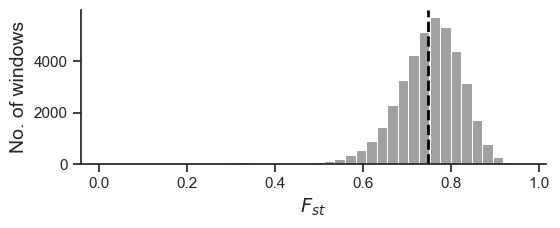

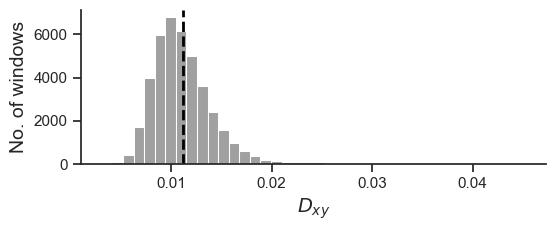

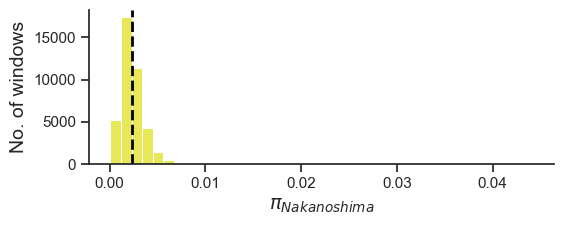

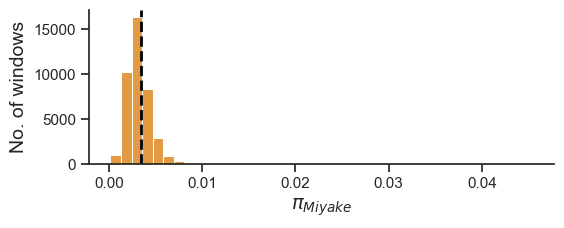

In [49]:
import seaborn as sns
#sns.set_style("white")
sns.set_context("notebook")
# Plotting the histogram using seaborn for a more stylized look
plt.figure(figsize=(6, 2))
plt.grid(False)
sns.despine()


sns.histplot(merged_all_df['avg_hudson_fst'], kde=False, color="grey", bins=40)
#plt.title('Histogram of avg_hudson_fst with Density Curve')
plt.xlabel(r'$F_{st}$', size = 14)
plt.ylabel(r'No. of windows', size = 14)
plt.axvline(np.mean(merged_all_df['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_Fst.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_Fst.png",bbox_inches="tight")
plt.show()

sns.set_context("notebook")
# Plotting the histogram using seaborn for a more stylized look
plt.figure(figsize=(6, 2))
plt.grid(False)
sns.despine()
sns.histplot(merged_all_df['avg_dxy'], color="grey", bins=40)
#plt.title('Histogram of avg_hudson_fst with Density Curve')
plt.axvline(np.mean(merged_all_df['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
plt.xlabel(r'$D_{xy}$', size = 14)
plt.ylabel(r'No. of windows', size = 14)
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_Dxy.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_Dxy.png",bbox_inches="tight")

sns.set_context("notebook")
# Plotting the histogram using seaborn for a more stylized look
plt.figure(figsize=(6, 2))
plt.grid(False)
sns.despine()
sns.histplot(merged_all_df['avg_pi_Na'], color="#e0e020", bins=40)
#plt.title('Histogram of avg_hudson_fst with Density Curve')
plt.xlabel(r'$\pi_{Nakanoshima}$', size = 14)
plt.ylabel(r'No. of windows', size = 14)
plt.axvline(np.mean(merged_all_df['avg_pi_Na']), color='black', linestyle='dashed', linewidth=2)
#plt.legend()
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_Na.pdf",bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_Na.png",bbox_inches="tight")
plt.show()

sns.set_context("notebook")
# Plotting the histogram using seaborn for a more stylized look
plt.figure(figsize=(6, 2))
plt.grid(False)
sns.despine()
sns.histplot(merged_all_df['avg_pi_Mi'], color="#d97904", bins=40)
#plt.title('Histogram of avg_hudson_fst with Density Curve')
plt.xlabel(r'$\pi_{Miyake}$', size = 14)
plt.ylabel(r'No. of windows', size = 14)
plt.axvline(np.mean(merged_all_df['avg_pi_Mi']), color='black', linestyle='dashed', linewidth=2)
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_Mi.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_Mi.png",bbox_inches="tight")
plt.show()

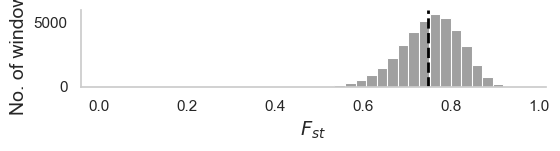

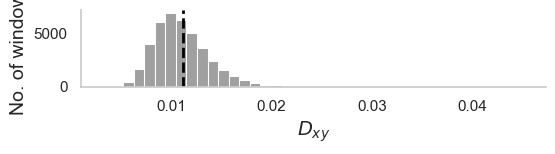

In [ ]:
import seaborn as sns
#sns.set_style("white")
sns.set_context("notebook")
# Plotting the histogram using seaborn for a more stylized look
plt.figure(figsize=(6, 1))
plt.grid(False)
sns.despine()


sns.histplot(merged_all_df['avg_hudson_fst'], kde=False, color="grey", bins=40)
#plt.title('Histogram of avg_hudson_fst with Density Curve')
plt.xlabel(r'$F_{st}$', size = 14)
plt.ylabel(r'No. of windows', size = 14)
plt.axvline(np.mean(merged_all_df['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_Fst.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_Fst.png",bbox_inches="tight")
plt.show()

sns.set_context("notebook")
# Plotting the histogram using seaborn for a more stylized look
plt.figure(figsize=(6, 1))
plt.grid(False)
sns.despine()
sns.histplot(merged_all_df['avg_dxy'], color="grey", bins=40)
#plt.title('Histogram of avg_hudson_fst with Density Curve')
plt.axvline(np.mean(merged_all_df['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
plt.xlabel(r'$D_{xy}$', size = 14)
plt.ylabel(r'No. of windows', size = 14)
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_Dxy.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_Dxy.png",bbox_inches="tight")

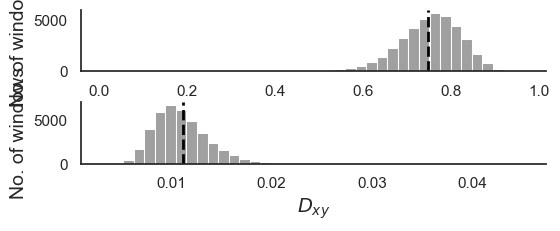

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("notebook")
sns.set_style("white")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 2), sharex=False)
plt.subplots_adjust(hspace=0.5)

# First plot: Fst
sns.histplot(merged_all_df['avg_hudson_fst'], kde=False, color="grey", bins=40, ax=axes[0])
axes[0].axvline(np.mean(merged_all_df['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
axes[0].set_xlabel(r'$F_{st}$', size=14)
axes[0].set_ylabel(r'No. of windows', size=14)
sns.despine(ax=axes[0])
axes[0].grid(False)

# Second plot: Dxy
sns.histplot(merged_all_df['avg_dxy'], kde=False, color="grey", bins=40, ax=axes[1])
axes[1].axvline(np.mean(merged_all_df['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
axes[1].set_xlabel(r'$D_{xy}$', size=14)
axes[1].set_ylabel(r'No. of windows', size=14)
sns.despine(ax=axes[1])
axes[1].grid(False)

# Optional: Save the figure
# plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_Fst_Dxy_composite.pdf", bbox_inches="tight")
# plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_Fst_Dxy_composite.png", bbox_inches="tight")

plt.show()


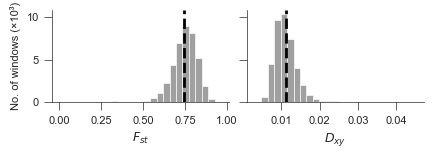

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("notebook")
sns.set_style("ticks")

# Create figure and subplots with shared y-axis only
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4.8, 1.2), sharex=False, sharey=True)
plt.subplots_adjust(wspace=0.1)

# Custom formatter to show y-axis in thousands with 'k'
def thousands(x, pos):
    return f'{int(x/1000)}' if x >= 1000 else int(x)

formatter = FuncFormatter(thousands) 

# Plot avg_hudson_fst
sns.histplot(merged_all_df['avg_hudson_fst'], bins=25, color="grey", ax=axes[0])
axes[0].axvline(np.mean(merged_all_df['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
axes[0].set_xlabel(r'$F_{st}$', size=9)
axes[0].set_ylabel('No. of windows (×10³)', size=8)
axes[0].yaxis.set_major_formatter(formatter)
#axes[0].set_ylabel(' ')
axes[0].tick_params(width=0.5)
for spine in axes[0].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[0])
##axes[0].grid(False)
axes[0].tick_params(width=0.5, labelsize=8)
axes[1].tick_params(width=0.5, labelsize=8)

# Plot avg_dxy
sns.histplot(merged_all_df['avg_dxy'], bins=25, color="grey", ax=axes[1])
axes[1].axvline(np.mean(merged_all_df['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
axes[1].set_xlabel(r'$D_{xy}$', size=9)
#axes[1].set_ylabel(' ')
axes[1].tick_params(width=0.5)
for spine in axes[1].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[1])
#axes[1].grid(False)

# Add common y-axis label
#fig.text(0.02, 0.5, 'No. of windows', va='center', rotation='vertical', fontsize=11)

# Optional: Save for publication
plt.savefig("ijimae_Fst_Dxy_halfpage_final.pdf", bbox_inches="tight")
plt.savefig("ijimae_Fst_Dxy_halfpage_final.png", dpi=600, bbox_inches="tight")

plt.show()


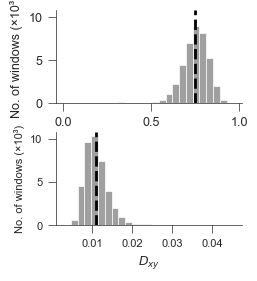

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

sns.set_context("notebook")
sns.set_style("ticks")

# Create figure and subplots stacked vertically (one under another)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(2.4, 2.8), sharex=False, sharey=True)
plt.subplots_adjust(hspace=0.3)

# Custom formatter to show y-axis in thousands
def thousands(x, pos):
    return f'{int(x / 1000)}' if x >= 1000 else str(int(x))

formatter = FuncFormatter(thousands)

# Plot avg_hudson_fst
sns.histplot(merged_all_df['avg_hudson_fst'], bins=25, color="grey", ax=axes[0])
axes[0].axvline(np.mean(merged_all_df['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
axes[0].set_xlabel(r'$F_{st}$', size=9)
axes[0].set_ylabel('No. of windows (×10³)', size=9)
axes[0].yaxis.set_major_formatter(formatter)
axes[0].tick_params(width=0.5, labelsize=9)
for spine in axes[0].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[0])

# Plot avg_dxy
sns.histplot(merged_all_df['avg_dxy'], bins=25, color="grey", ax=axes[1])
axes[1].axvline(np.mean(merged_all_df['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
axes[1].set_xlabel(r'$D_{xy}$', size=9)
axes[1].set_ylabel('No. of windows (×10³)', size=8)
axes[1].yaxis.set_major_formatter(formatter)
axes[1].tick_params(width=0.5, labelsize=8)
for spine in axes[1].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[1])

# Save figure
plt.savefig("/Users/dshipilina/Digital_Ecosytem/Tokara Leaf Warbler/Tokara Leaf Warbler - Visuals/ijimae_Fst_Dxy_vertical.pdf", bbox_inches="tight")
#plt.savefig("ijimae_Fst_Dxy_vertical.png", dpi=600, bbox_inches="tight")

plt.show()


NameError: name 'merged_all_df_noX' is not defined

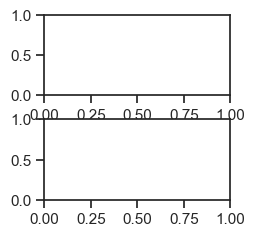

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

sns.set_context("notebook")
sns.set_style("ticks")

# Create figure and subplots stacked vertically (one under another)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(2.4, 2.4), sharex=False, sharey=True)
plt.subplots_adjust(hspace=0.3)

# Custom formatter to show y-axis in thousands
def thousands(x, pos):
    return f'{int(x / 1000)}' if x >= 1000 else str(int(x))

formatter = FuncFormatter(thousands)

# Plot avg_hudson_fst
sns.histplot(merged_all_df_noX['avg_hudson_fst'], bins=25, color="grey", ax=axes[0])
axes[0].axvline(np.mean(merged_all_df_noX['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
axes[0].set_xlabel(r'$F_{st}$', size=9)
axes[0].set_ylabel('No. of windows (×10³)', size=8)
axes[0].yaxis.set_major_formatter(formatter)
axes[0].tick_params(width=0.5, labelsize=8)
for spine in axes[0].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[0])

# Plot avg_dxy
sns.histplot(merged_all_df_noX['avg_dxy'], bins=25, color="grey", ax=axes[1])
axes[1].axvline(np.mean(merged_all_df_noX['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
axes[1].set_xlabel(r'$D_{xy}$', size=9)
axes[1].set_ylabel('No. of windows (×10³)', size=8)
axes[1].yaxis.set_major_formatter(formatter)
axes[1].tick_params(width=0.5, labelsize=8)
for spine in axes[1].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[1])

# Save figure
plt.savefig("ijimae_Fst_Dxy_vertical.pdf", bbox_inches="tight")
plt.savefig("ijimae_Fst_Dxy_vertical.png", dpi=600, bbox_inches="tight")

plt.show()


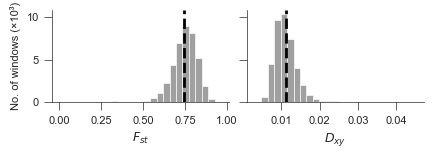

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("notebook")
sns.set_style("ticks")

# Create figure and subplots with shared y-axis only
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(4.8, 1.2), sharex=False, sharey=True)
plt.subplots_adjust(wspace=0.1)

# Custom formatter to show y-axis in thousands with 'k'
def thousands(x, pos):
    return f'{int(x/1000)}' if x >= 1000 else int(x)

formatter = FuncFormatter(thousands) 

# Plot avg_hudson_fst
sns.histplot(merged_all_df_noX['avg_hudson_fst'], bins=25, color="grey", ax=axes[0])
axes[0].axvline(np.mean(merged_all_df_noX['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
axes[0].set_xlabel(r'$F_{st}$', size=9)
axes[0].set_ylabel('No. of windows (×10³)', size=8)
axes[0].yaxis.set_major_formatter(formatter)
#axes[0].set_ylabel(' ')
axes[0].tick_params(width=0.5)
for spine in axes[0].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[0])
##axes[0].grid(False)
axes[0].tick_params(width=0.5, labelsize=8)
axes[1].tick_params(width=0.5, labelsize=8)

# Plot avg_dxy
sns.histplot(merged_all_df_noX['avg_dxy'], bins=25, color="grey", ax=axes[1])
axes[1].axvline(np.mean(merged_all_df_noX['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
axes[1].set_xlabel(r'$D_{xy}$', size=9)
#axes[1].set_ylabel(' ')
axes[1].tick_params(width=0.5)
for spine in axes[1].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[1])
#axes[1].grid(False)

# Add common y-axis label
#fig.text(0.02, 0.5, 'No. of windows', va='center', rotation='vertical', fontsize=11)

# Optional: Save for publication
# plt.savefig("ijimae_Fst_Dxy_halfpage_final.pdf", bbox_inches="tight")
# plt.savefig("ijimae_Fst_Dxy_halfpage_final.png", dpi=600, bbox_inches="tight")

plt.show()


# Figure 4A

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/4155312481.py:21: SyntaxWarning: invalid escape sequence '\p'
  axes[0].axvline(np.mean(merged_all_df['avg_pi_Na']), color='black', linestyle='dashed', linewidth=1, label='mean $\pi$')


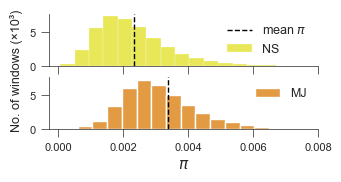

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

# Set style for publication
sns.set_context("notebook")
sns.set_style("ticks")

# Create figure and subplots with shared y-axis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3.5, 1.5), sharex=True, sharey=True)

# Custom y-axis formatter to show counts in thousands
def thousands(x, pos):
    return f'{int(x/1000)}' if x >= 1000 else int(x)
formatter = FuncFormatter(thousands)

# --- Plot for avg_pi_Na ---
sns.histplot(merged_all_df['avg_pi_Na'], color="#e0e020", bins=100, ax=axes[0], label="NS")
axes[0].axvline(np.mean(merged_all_df['avg_pi_Na']), color='black', linestyle='dashed', linewidth=1, label='mean $\pi$')
axes[0].set_xlabel(r'$\pi_{Nakanoshima}$', fontsize=9)
axes[0].set_ylabel(' ', fontsize=1)
axes[0].set_xlim([-0.0003, 0.008])
axes[0].yaxis.set_major_formatter(formatter)
axes[0].tick_params(width=0.5, labelsize=8)
for spine in axes[0].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[0])
axes[0].legend(loc='upper right', fontsize=9, frameon=False)

# --- Plot for avg_pi_Mi ---
sns.histplot(merged_all_df['avg_pi_Mi'], color="#d97904", bins=100, ax=axes[1], label="MJ")
axes[1].axvline(np.mean(merged_all_df['avg_pi_Mi']), color='black', linestyle='dashed', linewidth=1) #, label='Mean')
#axes[1].set_xlabel(r'$\pi_{Miyake}$', fontsize=10)
axes[1].set_xlabel(r'$\pi$', fontsize=11)
axes[1].set_ylabel(' ', fontsize=1)
axes[1].set_xlim([-0.0003, 0.008])
axes[1].yaxis.set_major_formatter(formatter)
axes[1].tick_params(width=0.5, labelsize=8)
for spine in axes[1].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[1])
axes[1].legend(loc='upper right', fontsize=9, frameon=False)


# Add common y-axis label
fig.text(0.02, 0.5, 'No. of windows (×10³)', va='center', rotation='vertical', fontsize=9)

# Align all labels
fig.align_labels()
fig.subplots_adjust(left=0.13)

# Save figure
fig.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_dual_pubstyle.pdf", bbox_inches="tight")
fig.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_dual_pubstyle.png", bbox_inches="tight")
plt.show()

# 0.39*8 - half grid (with 0.05 padding)
# 0.252* 6


<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/3447444097.py:21: SyntaxWarning: invalid escape sequence '\p'
  axes[0].axvline(np.mean(merged_all_df_noX['avg_pi_Na']), color='black', linestyle='dashed', linewidth=1, label='mean $\pi$')


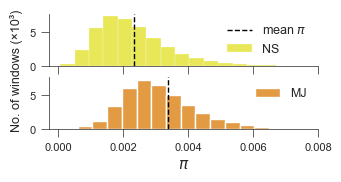

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

# Set style for publication
sns.set_context("notebook")
sns.set_style("ticks")

# Create figure and subplots with shared y-axis
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3.5, 1.5), sharex=True, sharey=True)

# Custom y-axis formatter to show counts in thousands
def thousands(x, pos):
    return f'{int(x/1000)}' if x >= 1000 else int(x)
formatter = FuncFormatter(thousands)

# --- Plot for avg_pi_Na ---
sns.histplot(merged_all_df_noX['avg_pi_Na'], color="#e0e020", bins=100, ax=axes[0], label="NS")
axes[0].axvline(np.mean(merged_all_df_noX['avg_pi_Na']), color='black', linestyle='dashed', linewidth=1, label='mean $\pi$')
axes[0].set_xlabel(r'$\pi_{Nakanoshima}$', fontsize=9)
axes[0].set_ylabel(' ', fontsize=1)
axes[0].set_xlim([-0.0003, 0.008])
axes[0].yaxis.set_major_formatter(formatter)
axes[0].tick_params(width=0.5, labelsize=8)
for spine in axes[0].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[0])
axes[0].legend(loc='upper right', fontsize=9, frameon=False)

# --- Plot for avg_pi_Mi ---
sns.histplot(merged_all_df_noX['avg_pi_Mi'], color="#d97904", bins=100, ax=axes[1], label="MJ")
axes[1].axvline(np.mean(merged_all_df_noX['avg_pi_Mi']), color='black', linestyle='dashed', linewidth=1) #, label='Mean')
#axes[1].set_xlabel(r'$\pi_{Miyake}$', fontsize=10)
axes[1].set_xlabel(r'$\pi$', fontsize=11)
axes[1].set_ylabel(' ', fontsize=1)
axes[1].set_xlim([-0.0003, 0.008])
axes[1].yaxis.set_major_formatter(formatter)
axes[1].tick_params(width=0.5, labelsize=8)
for spine in axes[1].spines.values():
    spine.set_linewidth(0.5)
sns.despine(ax=axes[1])
axes[1].legend(loc='upper right', fontsize=9, frameon=False)


# Add common y-axis label
fig.text(0.02, 0.5, 'No. of windows (×10³)', va='center', rotation='vertical', fontsize=9)

# Align all labels
fig.align_labels()
fig.subplots_adjust(left=0.13)

# Save figure
fig.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_dual_pubstyle_noZW.pdf", bbox_inches="tight")
#fig.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_dual_pubstyle.png", bbox_inches="tight")
plt.show()

# 0.39*8 - half grid (with 0.05 padding)
# 0.252* 6


# rer

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_16875/3061709504.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Boxplot of $\pi$ for Nakanoshima and Miyake', size=16)
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_16875/3061709504.py:24: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Boxplot of $\pi$ for Nakanoshima and Miyake', size=16)


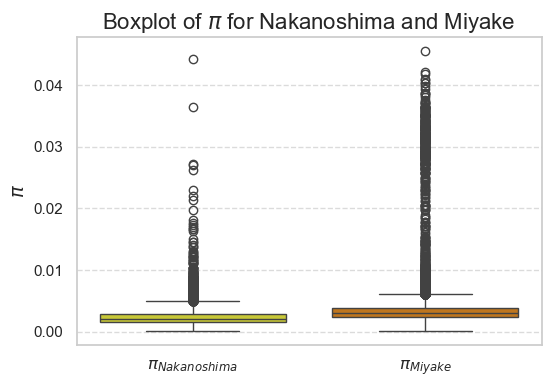

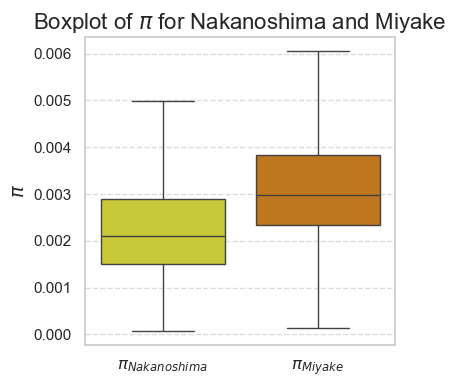

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plotting box plot for avg_pi_Na and avg_pi_Mi
plt.figure(figsize=(6, 4))
sns.boxplot(data=merged_all_df[['avg_pi_Na', 'avg_pi_Mi']], palette=["#e0e020", "#d97904"])
plt.ylabel(r'$\pi$', size=14)
plt.title('Boxplot of $\pi$ for Nakanoshima and Miyake', size=16)
plt.xticks([0, 1], [r'$\pi_{Nakanoshima}$', r'$\pi_{Miyake}$'], size=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_boxplot.pdf", bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_boxplot.png", bbox_inches="tight")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plotting box plot for avg_pi_Na and avg_pi_Mi without outliers
plt.figure(figsize=(4, 4))
sns.boxplot(data=merged_all_df[['avg_pi_Na', 'avg_pi_Mi']], palette=["#e0e020", "#d97904"], showfliers=False)
plt.ylabel(r'$\pi$', size=14)
plt.title('Boxplot of $\pi$ for Nakanoshima and Miyake', size=16)
plt.xticks([0, 1], [r'$\pi_{Nakanoshima}$', r'$\pi_{Miyake}$'], size=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_boxplot_no_outliers.pdf", bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_pi_boxplot_no_outliers.png", bbox_inches="tight")
plt.show()



In [ ]:
for index, row in merged_all_df.iterrows():
    if row['avg_hudson_fst'] > 0.8:
        print(row['avg_hudson_fst'])


In [ ]:
for index, value in merged_all_df['avg_hudson_fst'].iteritems():
    if value > 0.9:
        print(merged_all_df['avg_hudson_fst'][index])


AttributeError: 'Series' object has no attribute 'iteritems'

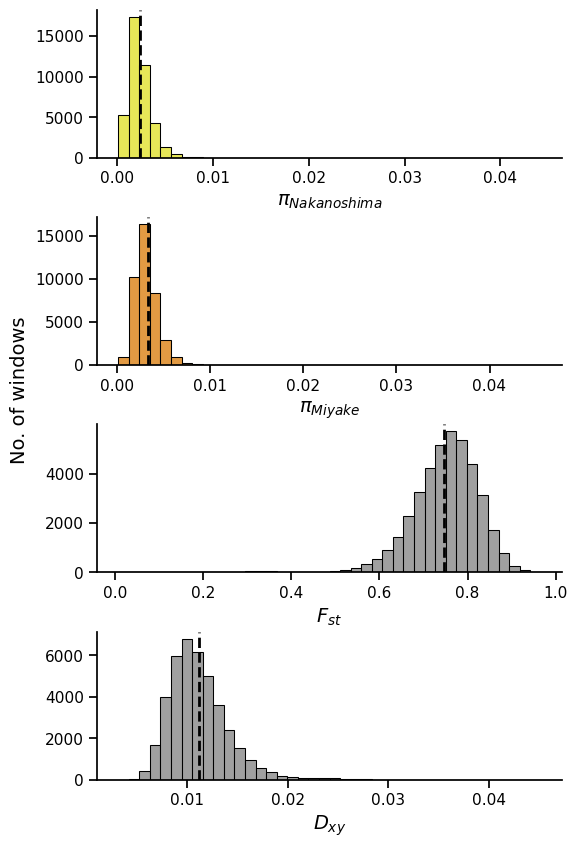

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

sns.set_context("notebook")

# Create a grid plot
fig = plt.figure(figsize=(6, 10))
gs = GridSpec(4, 1, hspace=0.4)

# Plot 1
ax1 = fig.add_subplot(gs[2, 0])
sns.histplot(merged_all_df['avg_hudson_fst'], kde=False, color="grey", bins=40, ax=ax1)
ax1.axvline(np.mean(merged_all_df['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
ax1.set_xlabel(r'$F_{st}$', size=14)
ax1.set_ylabel('', size=14)
sns.despine(ax=ax1)

# Plot 2
ax2 = fig.add_subplot(gs[3, 0])
sns.histplot(merged_all_df['avg_dxy'], color="grey", bins=40, ax=ax2)
ax2.axvline(np.mean(merged_all_df['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
ax2.set_xlabel(r'$D_{xy}$', size=14)
ax2.set_ylabel('')
sns.despine(ax=ax2)

# Plot 3
ax3 = fig.add_subplot(gs[0, 0])
sns.histplot(merged_all_df['avg_pi_Na'], color="#e0e020", bins=40, ax=ax3)
ax3.axvline(np.mean(merged_all_df['avg_pi_Na']), color='black', linestyle='dashed', linewidth=2)
ax3.set_xlabel(r'$\pi_{Nakanoshima}$', size=14)
ax3.set_ylabel('')
sns.despine(ax=ax3)

# Plot 4
ax4 = fig.add_subplot(gs[1, 0])
sns.histplot(merged_all_df['avg_pi_Mi'], color="#d97904", bins=40, ax=ax4)
ax4.axvline(np.mean(merged_all_df['avg_pi_Mi']), color='black', linestyle='dashed', linewidth=2)
ax4.set_xlabel(r'$\pi_{Miyake}$', size=14)
ax4.set_ylabel('')
sns.despine(ax=ax4)

# Adjusting the ylabel for the entire figure
fig.text(-0.02, 0.5, 'No. of windows', va='center', rotation='vertical', size=14)

# Save the figure
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_grid_plot.pdf", bbox_inches="tight")
plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/pixy/ijimae_grid_plot.png", bbox_inches="tight")

plt.show()


# Fig 4B TajD

In [ ]:
# Filter out the 'MODIFIER' category from the data
categories_filtered = ['HIGH', 'LOW', 'MODERATE']
miya_counts_filtered = [3175, 137141, 100393]
nakano_counts_filtered = [2809, 105492, 85399]

miya_percent_filtered = [0.03452, 1.491052, 1.091513]
nakano_percent_filtered = [0.040189, 1.509302, 1.221826]

In [ ]:
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Genome scans

In [12]:
merged_all_df

pop1 pop2      chromosome  window_pos_1  window_pos_2   avg_dxy  \
9       Mi   Na  VHQE01000425.1        180001        200000  0.009523   
10      Mi   Na  VHQE01000425.1        200001        220000  0.006688   
15      Mi   Na  VHQE01000425.1        300001        320000  0.008762   
16      Mi   Na  VHQE01000425.1        320001        340000  0.010393   
17      Mi   Na  VHQE01000425.1        340001        360000  0.009390   
...    ...  ...             ...           ...           ...       ...   
53581   Mi   Na  VHQE01000313.1      18380001      18400000  0.010124   
53582   Mi   Na  VHQE01000313.1      18400001      18420000  0.013771   
53587   Mi   Na  VHQE01000313.1      18500001      18520000  0.016667   
53588   Mi   Na  VHQE01000313.1      18520001      18540000  0.011488   
53589   Mi   Na  VHQE01000313.1      18540001      18560000  0.013655   

       no_sites  count_diffs  count_comparisons  count_missing  ...  \
9       19626.0      35884.0          3768192.0            0.0  ...   
10      18713.0      24028.0          3592896.0            0.0  ...   
15      17798.0      29940.0          3417144.0           72.0  ...   
16      16146.0      32220.0          3100032.0            0.0  ...   
17      16527.0      29796.0          3173184.0            0.0  ...   
...         ...          ...                ...            ...  ...   
53581   18157.0      35294.0          3486012.0          132.0  ...   
53582   17568.0      46448.0          3372960.0           96.0  ...   
53587   16210.0      51872.0          3112320.0            0.0  ...   
53588   18238.0      40226.0          3501696.0            0.0  ...   
53589   16697.0      43776.0          3205824.0            0.0  ...   

       no_sites_x  count_diffs_x count_comparisons_x  count_missing_x  pop_y  \
9           19626         2952.0           1295316.0              0.0     Na   
10          18713         3097.0           1235058.0              0.0     Na   
15          17798         5807.0           1174668.0              0.0     Na   
16          16146         3549.0           1065636.0              0.0     Na   
17          16527         3192.0           1090782.0              0.0     Na   
...           ...            ...                 ...              ...    ...   
53581       18157         4281.0           1198303.0              6.0     Na   
53582       17568         4275.0           1159425.0              6.0     Na   
53587       16210         4867.0           1069860.0              0.0     Na   
53588       18238         3129.0           1203708.0              0.0     Na   
53589       16697         4345.0           1102002.0              0.0     Na   

       avg_pi_Na  no_sites_y  count_diffs_y count_comparisons_y  \
9       0.001780       19626         4191.0           2355120.0   
10      0.001186       18713         2664.0           2245560.0   
15      0.001443       17798         3082.0           2135673.0   
16      0.002092       16146         4053.0           1937520.0   
17      0.003040       16527         6029.0           1983240.0   
...          ...         ...            ...                 ...   
53581   0.002500       18157         5448.0           2178782.0   
53582   0.001747       17568         3683.0           2108160.0   
53587   0.003660       16210         7120.0           1945200.0   
53588   0.003463       18238         7579.0           2188560.0   
53589   0.004024       16697         8063.0           2003640.0   

       count_missing_y  
9                  0.0  
10                 0.0  
15                 6.0  
16                 0.0  
17                 0.0  
...                ...  
53581              4.0  
53582              0.0  
53587              0.0  
53588              0.0  
53589              0.0  

[40387 rows x 24 columns]

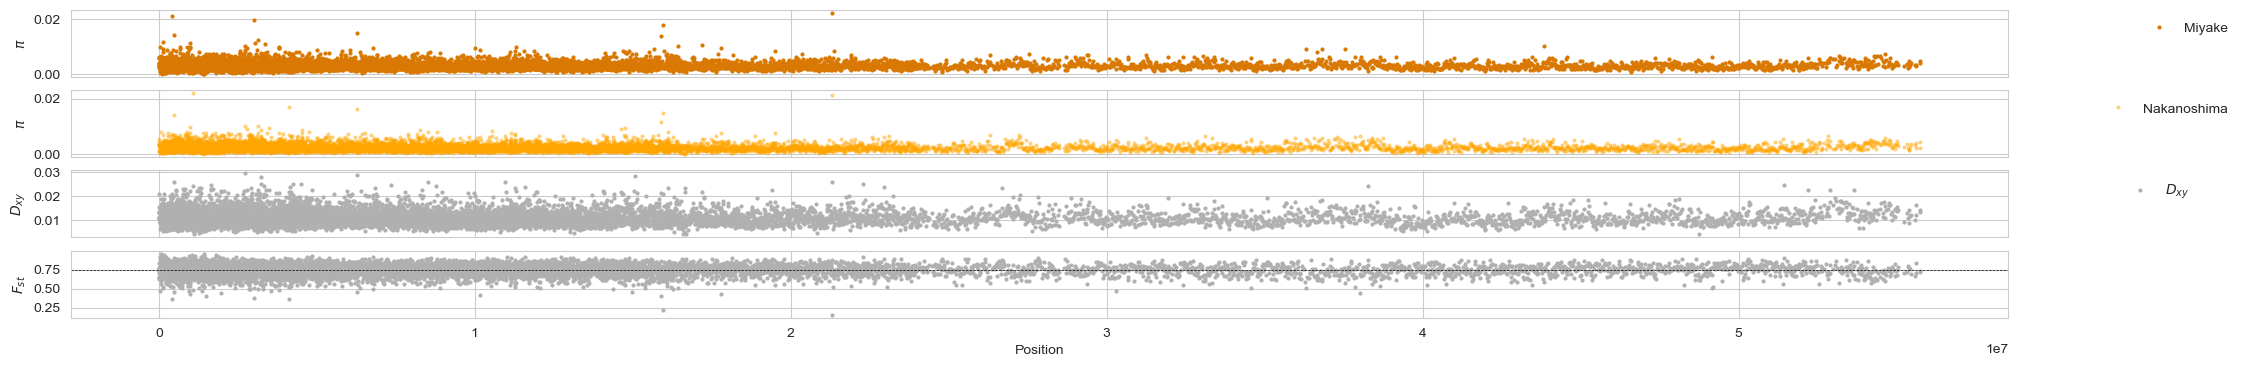

In [13]:
#total_sum = 0
#    summed_list =[]
#    for num in max_values:
#        total_sum += num
#        summed_list.append(total_sum)
df_main =  merged_all_df      
    #Plotting 
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(25, 4), sharex=True)

ax1.plot(df_main['window_pos_1'][0:10000], df_main['avg_pi_Mi'][0:10000], marker='o', markersize=2, linewidth=0, color="#d97904", label='Miyake') #,alpha=0.5)
ax2.plot(df_main['window_pos_1'][0:10000], df_main['avg_pi_Na'][0:10000], marker='o', markersize=2, linewidth=0, color='orange', label='Nakanoshima',alpha=0.4)
    #ax1.set_ylim([-0.01, 0.05])
    #mean_pi1 = np.mean(df_main['avg_pi_short'])
    #mean_pi2 = np.mean(df_main['avg_pi_long'])
#for value in summed_list:
#        ax1.axvline(x=value, linestyle="dashed", linewidth=1, color='grey')
#    ax1.axhline(mean_pi2, linestyle="dashed", linewidth=1.7, color="black", label=r'mean $\pi$')
ax1.set_ylabel(r'$\pi$')
ax1.legend(loc='upper right',bbox_to_anchor=(1.12, 1),frameon=False)

ax2.set_ylabel(r'$\pi$')
ax2.legend(loc='upper right',bbox_to_anchor=(1.12, 1),frameon=False)

ax3.plot(df_main['window_pos_1'][0:10000], df_main['avg_dxy'][0:10000], marker='o', markersize=2, linewidth=0, color="#B0B0B0", label=r'$D_{xy}$')
    #ax2.set_ylim([-0.01, 0.05])
ax3.set_ylabel(r'$D_{xy}$')
    #mean_dxy = np.mean(df_main['avg_dxy'])
    #for value in summed_list:
   #     ax2.axvline(value, linestyle="dashed", linewidth=1, color='grey')
    #ax2.axhline(mean_dxy, linestyle="dashed", linewidth=1.8, color='black', label=r'mean $D_{xy}$')
ax3.legend(loc='upper right',bbox_to_anchor=(1.1, 1),frameon=False)

ax4.plot(df_main['window_pos_1'][0:10000], df_main['avg_hudson_fst'][0:10000], marker='o', markersize=2, linewidth=0, color="#B0B0B0", label=r'$F_{st}$')
    #ax3.set_ylim([-0.03, 0.13])
    #ax3.set_xlim([-0.1, max(df_main['window_global'])])
ax4.set_xlabel('Position')
ax4.set_ylabel(r'$F_{st}$')
mean_Fst = np.mean(df_main['avg_hudson_fst'])
    #for value in summed_list:
   #     ax3.axvline(x=value, linestyle="dashed", linewidth=1, color='grey')
ax4.axhline(mean_Fst, linestyle="dashed", linewidth=0.5, color="black", label=r'mean $F_{st}$')
    #ax3.legend(loc='right',bbox_to_anchor=(1.1, 0.7),frameon=False)

In [14]:
column_names = ['contig','sequence_length', 'offset', 'line_bases', 'line_width']
index = pd.read_csv('/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/snpEff/sequences.fa.fai',delimiter='\t', header= None, names=column_names)
index

# Syntax to sort by one column
index_sorted = index.sort_values(by='sequence_length',ascending=False)
index_sorted


# Assume `index_sorted` has the correct order of contigs in a column called 'contigs'
contig_order = index_sorted['contig'].tolist()  # Extract the sorted order of contigs

df_main = merged_all_df

# Convert the 'chromosome' column in df_main to a categorical type using this order
df_main['chromosome'] = pd.Categorical(df_main['chromosome'], categories=contig_order, ordered=True)

# Now sort df_main by 'chromosome' based on this custom order
df_main_sorted = df_main.sort_values(by='chromosome')
df_main_sorted[0:100]



pop1 pop2      chromosome  window_pos_1  window_pos_2   avg_dxy  \
41208   Mi   Na  VHQE01000408.1      30860001      30880000  0.009129   
41763   Mi   Na  VHQE01000408.1      41960001      41980000  0.015657   
41764   Mi   Na  VHQE01000408.1      41980001      42000000  0.012953   
41765   Mi   Na  VHQE01000408.1      42000001      42020000  0.014811   
41767   Mi   Na  VHQE01000408.1      42040001      42060000  0.014716   
...    ...  ...             ...           ...           ...       ...   
41646   Mi   Na  VHQE01000408.1      39620001      39640000  0.011320   
41629   Mi   Na  VHQE01000408.1      39280001      39300000  0.012520   
41630   Mi   Na  VHQE01000408.1      39300001      39320000  0.010999   
41631   Mi   Na  VHQE01000408.1      39320001      39340000  0.015443   
41632   Mi   Na  VHQE01000408.1      39340001      39360000  0.011996   

       no_sites  count_diffs  count_comparisons  count_missing  ...  \
41208   19075.0      33432.0          3662376.0           24.0  ...   
41763   16673.0      50120.0          3201216.0            0.0  ...   
41764   16151.0      40168.0          3100992.0            0.0  ...   
41765   16778.0      47712.0          3221376.0            0.0  ...   
41767   17800.0      50292.0          3417600.0            0.0  ...   
...         ...          ...                ...            ...  ...   
41646   18151.0      39450.0          3484848.0          144.0  ...   
41629   17251.0      41468.0          3312136.0           56.0  ...   
41630   17632.0      37236.0          3385344.0            0.0  ...   
41631   16449.0      48772.0          3158208.0            0.0  ...   
41632   18191.0      41896.0          3492616.0           56.0  ...   

       no_sites_x  count_diffs_x count_comparisons_x  count_missing_x  pop_y  \
41208       19075         3329.0           1258950.0              0.0     Na   
41763       16673         5466.0           1100418.0              0.0     Na   
41764       16151         4704.0           1065966.0              0.0     Na   
41765       16778         6257.0           1107348.0              0.0     Na   
41767       17800         8475.0           1174800.0              0.0     Na   
...           ...            ...                 ...              ...    ...   
41646       18151         3573.0           1197966.0              0.0     Na   
41629       17251         4566.0           1138545.0              2.0     Na   
41630       17632         5230.0           1163712.0              0.0     Na   
41631       16449         6642.0           1085634.0              0.0     Na   
41632       18191         3855.0           1200585.0              2.0     Na   

       avg_pi_Na  no_sites_y  count_diffs_y count_comparisons_y  \
41208   0.001786       19075         4087.0           2288971.0   
41763   0.004267       16673         8537.0           2000760.0   
41764   0.003218       16151         6237.0           1938120.0   
41765   0.005065       16778        10197.0           2013360.0   
41767   0.003109       17800         6641.0           2136000.0   
...          ...         ...            ...                 ...   
41646   0.002825       18151         6152.0           2177946.0   
41629   0.003273       17251         6775.0           2070091.0   
41630   0.001593       17632         3371.0           2115840.0   
41631   0.004001       16449         7898.0           1973880.0   
41632   0.002286       18191         4990.0           2182891.0   

       count_missing_y  
41208              2.0  
41763              0.0  
41764              0.0  
41765              0.0  
41767              0.0  
...                ...  
41646             12.0  
41629              2.0  
41630              0.0  
41631              0.0  
41632              2.0  

[100 rows x 24 columns]

In [15]:
import pandas as pd

# Assuming df_main_sorted is your sorted DataFrame by chromosome and window_pos_1

# Step 1: Initialize a new column for the updated genomic positions
df_main_sorted['new_window_position'] = 0

# Step 2: Reset the window positions for each chromosome to start at 0
for chrom in df_main_sorted['chromosome'].unique():
    # Get rows corresponding to the current chromosome
    chrom_mask = df_main_sorted['chromosome'] == chrom
    
    # Reset window_pos_1 to start from 0 for each chromosome
    df_main_sorted.loc[chrom_mask, 'new_window_position'] = (
        df_main_sorted.loc[chrom_mask, 'window_pos_1'] - df_main_sorted.loc[chrom_mask, 'window_pos_1'].min()
    )

# Step 3: Create genome-wide continuous positions by adding cumulative offsets for each chromosome
cumulative_position = 0
df_main_sorted['genome_wide_position'] = 0

for chrom in df_main_sorted['chromosome'].unique():
    chrom_mask = df_main_sorted['chromosome'] == chrom
    
    # Update the genome-wide positions by adding cumulative offset
    df_main_sorted.loc[chrom_mask, 'genome_wide_position'] = (
        df_main_sorted.loc[chrom_mask, 'new_window_position'] + cumulative_position
    )
    
    # Update cumulative position for the next chromosome
    cumulative_position += df_main_sorted.loc[chrom_mask, 'new_window_position'].max()

# Display the updated DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Updated Window Positions", dataframe=df_main_sorted)

df_main_sorted

pop1 pop2      chromosome  window_pos_1  window_pos_2   avg_dxy  \
41208   Mi   Na  VHQE01000408.1      30860001      30880000  0.009129   
41763   Mi   Na  VHQE01000408.1      41960001      41980000  0.015657   
41764   Mi   Na  VHQE01000408.1      41980001      42000000  0.012953   
41765   Mi   Na  VHQE01000408.1      42000001      42020000  0.014811   
41767   Mi   Na  VHQE01000408.1      42040001      42060000  0.014716   
...    ...  ...             ...           ...           ...       ...   
14798   Mi   Na  VHQE01000331.1        520001        540000  0.004953   
14785   Mi   Na  VHQE01000331.1        260001        280000  0.013232   
14775   Mi   Na  VHQE01000331.1         60001         80000  0.016462   
14807   Mi   Na  VHQE01000331.1        700001        720000  0.006755   
14786   Mi   Na  VHQE01000331.1        280001        300000  0.010778   

       no_sites  count_diffs  count_comparisons  count_missing  ...  \
41208   19075.0      33432.0          3662376.0           24.0  ...   
41763   16673.0      50120.0          3201216.0            0.0  ...   
41764   16151.0      40168.0          3100992.0            0.0  ...   
41765   16778.0      47712.0          3221376.0            0.0  ...   
41767   17800.0      50292.0          3417600.0            0.0  ...   
...         ...          ...                ...            ...  ...   
14798   19295.0      18348.0          3704640.0            0.0  ...   
14785   17310.0      43976.0          3323520.0            0.0  ...   
14775   16291.0      51488.0          3127656.0          216.0  ...   
14807   19326.0      25064.0          3710592.0            0.0  ...   
14786   16439.0      34020.0          3156288.0            0.0  ...   

       count_comparisons_x  count_missing_x pop_y  avg_pi_Na  no_sites_y  \
41208            1258950.0              0.0    Na   0.001786       19075   
41763            1100418.0              0.0    Na   0.004267       16673   
41764            1065966.0              0.0    Na   0.003218       16151   
41765            1107348.0              0.0    Na   0.005065       16778   
41767            1174800.0              0.0    Na   0.003109       17800   
...                    ...              ...   ...        ...         ...   
14798            1273470.0              0.0    Na   0.000678       19295   
14785            1142460.0              0.0    Na   0.003847       17310   
14775            1075206.0              0.0    Na   0.005210       16291   
14807            1275516.0              0.0    Na   0.000782       19326   
14786            1084974.0              0.0    Na   0.002905       16439   

       count_diffs_y  count_comparisons_y  count_missing_y  \
41208         4087.0            2288971.0              2.0   
41763         8537.0            2000760.0              0.0   
41764         6237.0            1938120.0              0.0   
41765        10197.0            2013360.0              0.0   
41767         6641.0            2136000.0              0.0   
...              ...                  ...              ...   
14798         1569.0            2315400.0              0.0   
14785         7990.0            2077200.0              0.0   
14775        10184.0            1954659.0             18.0   
14807         1814.0            2319120.0              0.0   
14786         5731.0            1972680.0              0.0   

      new_window_position  genome_wide_position  
41208            30760000              30760000  
41763            41860000              41860000  
41764            41880000              41880000  
41765            41900000              41900000  
41767            41940000              41940000  
...                   ...                   ...  
14798              460000             953680000  
14785              200000             953420000  
14775                   0             953220000  
14807              640000             953860000  
14786              220000             953440000  

[40387 rows x 26 

In [16]:
import pandas as pd

# Assuming df_main is your sorted DataFrame and it's already sorted by 'chromosome' and 'window_pos_1'

# Initialize a new column for the updated genomic positions
df_main_sorted['new_genomic_position'] = 0

# Group by 'chromosome' and reset the window positions within each chromosome group
for chrom in df_main_sorted['chromosome'].unique():
    chrom_mask = df_main_sorted['chromosome'] == chrom
    df_main_sorted.loc[chrom_mask, 'new_genomic_position'] = (
        df_main_sorted.loc[chrom_mask, 'window_pos_2'] - df_main_sorted.loc[chrom_mask, 'window_pos_2'].min()
    )

df_main_sorted

pop1 pop2      chromosome  window_pos_1  window_pos_2   avg_dxy  \
41208   Mi   Na  VHQE01000408.1      30860001      30880000  0.009129   
41763   Mi   Na  VHQE01000408.1      41960001      41980000  0.015657   
41764   Mi   Na  VHQE01000408.1      41980001      42000000  0.012953   
41765   Mi   Na  VHQE01000408.1      42000001      42020000  0.014811   
41767   Mi   Na  VHQE01000408.1      42040001      42060000  0.014716   
...    ...  ...             ...           ...           ...       ...   
14798   Mi   Na  VHQE01000331.1        520001        540000  0.004953   
14785   Mi   Na  VHQE01000331.1        260001        280000  0.013232   
14775   Mi   Na  VHQE01000331.1         60001         80000  0.016462   
14807   Mi   Na  VHQE01000331.1        700001        720000  0.006755   
14786   Mi   Na  VHQE01000331.1        280001        300000  0.010778   

       no_sites  count_diffs  count_comparisons  count_missing  ...  \
41208   19075.0      33432.0          3662376.0           24.0  ...   
41763   16673.0      50120.0          3201216.0            0.0  ...   
41764   16151.0      40168.0          3100992.0            0.0  ...   
41765   16778.0      47712.0          3221376.0            0.0  ...   
41767   17800.0      50292.0          3417600.0            0.0  ...   
...         ...          ...                ...            ...  ...   
14798   19295.0      18348.0          3704640.0            0.0  ...   
14785   17310.0      43976.0          3323520.0            0.0  ...   
14775   16291.0      51488.0          3127656.0          216.0  ...   
14807   19326.0      25064.0          3710592.0            0.0  ...   
14786   16439.0      34020.0          3156288.0            0.0  ...   

       count_missing_x  pop_y avg_pi_Na  no_sites_y  count_diffs_y  \
41208              0.0     Na  0.001786       19075         4087.0   
41763              0.0     Na  0.004267       16673         8537.0   
41764              0.0     Na  0.003218       16151         6237.0   
41765              0.0     Na  0.005065       16778        10197.0   
41767              0.0     Na  0.003109       17800         6641.0   
...                ...    ...       ...         ...            ...   
14798              0.0     Na  0.000678       19295         1569.0   
14785              0.0     Na  0.003847       17310         7990.0   
14775              0.0     Na  0.005210       16291        10184.0   
14807              0.0     Na  0.000782       19326         1814.0   
14786              0.0     Na  0.002905       16439         5731.0   

       count_comparisons_y  count_missing_y  new_window_position  \
41208            2288971.0              2.0             30760000   
41763            2000760.0              0.0             41860000   
41764            1938120.0              0.0             41880000   
41765            2013360.0              0.0             41900000   
41767            2136000.0              0.0             41940000   
...                    ...              ...                  ...   
14798            2315400.0              0.0               460000   
14785            2077200.0              0.0               200000   
14775            1954659.0             18.0                    0   
14807            2319120.0              0.0               640000   
14786            1972680.0              0.0               220000   

      genome_wide_position  new_genomic_position  
41208             30760000              30760000  
41763             41860000              41860000  
41764             41880000              41880000  
41765             41900000              41900000  
41767             41940000              41940000  
...                    ...                   ...  
14798            953680000                460000  
14785            953420000                200000  
14775            953220000                     0  
14807            953860000                640000  
14786            953440000                220000  

[4038

In [17]:
import pandas as pd

# Assuming df_main_sorted is your sorted DataFrame by chromosome and window_pos_1

# Step 1: Sort the DataFrame by 'chromosome' and 'window_pos_1' to ensure correct order within each chromosome
df_main_sorted = df_main_sorted.sort_values(by=['chromosome', 'window_pos_1'])

# Step 2: Initialize a new column for the updated genomic positions
df_main_sorted['new_window_position'] = 0

# Step 3: Reset the window positions for each chromosome to start at 0
for chrom in df_main_sorted['chromosome'].unique():
    # Get rows corresponding to the current chromosome
    chrom_mask = df_main_sorted['chromosome'] == chrom
    
    # Reset window_pos_1 to start from 0 for each chromosome
    df_main_sorted.loc[chrom_mask, 'new_window_position'] = (
        df_main_sorted.loc[chrom_mask, 'window_pos_1'] - df_main_sorted.loc[chrom_mask, 'window_pos_1'].min()
    )

# Step 4: Create genome-wide continuous positions by adding cumulative offsets for each chromosome
cumulative_position = 0
df_main_sorted['genome_wide_position'] = 0

for chrom in df_main_sorted['chromosome'].unique():
    chrom_mask = df_main_sorted['chromosome'] == chrom
    
    # Update the genome-wide positions by adding cumulative offset
    df_main_sorted.loc[chrom_mask, 'genome_wide_position'] = (
        df_main_sorted.loc[chrom_mask, 'new_window_position'] + cumulative_position
    )
    
    # Update cumulative position for the next chromosome
    cumulative_position += df_main_sorted.loc[chrom_mask, 'new_window_position'].max()

df_main_sorted

pop1 pop2      chromosome  window_pos_1  window_pos_2   avg_dxy  \
39670   Mi   Na  VHQE01000408.1        100001        120000  0.012241   
39671   Mi   Na  VHQE01000408.1        120001        140000  0.008279   
39672   Mi   Na  VHQE01000408.1        140001        160000  0.010609   
39675   Mi   Na  VHQE01000408.1        200001        220000  0.010029   
39676   Mi   Na  VHQE01000408.1        220001        240000  0.014475   
...    ...  ...             ...           ...           ...       ...   
14807   Mi   Na  VHQE01000331.1        700001        720000  0.006755   
14808   Mi   Na  VHQE01000331.1        720001        740000  0.005857   
14809   Mi   Na  VHQE01000331.1        740001        760000  0.006066   
14810   Mi   Na  VHQE01000331.1        760001        780000  0.006711   
14811   Mi   Na  VHQE01000331.1        780001        800000  0.006660   

       no_sites  count_diffs  count_comparisons  count_missing  ...  \
39670   18983.0      44614.0          3644736.0            0.0  ...   
39671   18146.0      28844.0          3484032.0            0.0  ...   
39672   17670.0      35994.0          3392640.0            0.0  ...   
39675   19576.0      37696.0          3758560.0           32.0  ...   
39676   16852.0      46834.0          3235584.0            0.0  ...   
...         ...          ...                ...            ...  ...   
14807   19326.0      25064.0          3710592.0            0.0  ...   
14808   18141.0      20400.0          3483072.0            0.0  ...   
14809   19502.0      22712.0          3744384.0            0.0  ...   
14810   18701.0      24096.0          3590496.0           96.0  ...   
14811   19532.0      24976.0          3750144.0            0.0  ...   

       count_missing_x  pop_y avg_pi_Na  no_sites_y  count_diffs_y  \
39670              0.0     Na  0.003160       18983         7198.0   
39671              0.0     Na  0.001106       18146         2409.0   
39672              0.0     Na  0.001705       17670         3616.0   
39675              2.0     Na  0.001263       19576         2966.0   
39676              0.0     Na  0.004009       16852         8108.0   
...                ...    ...       ...         ...            ...   
14807              0.0     Na  0.000782       19326         1814.0   
14808              0.0     Na  0.001200       18141         2613.0   
14809              0.0     Na  0.000885       19502         2072.0   
14810              6.0     Na  0.000566       18701         1270.0   
14811              0.0     Na  0.000823       19532         1930.0   

       count_comparisons_y  count_missing_y  new_window_position  \
39670            2277960.0              0.0                    0   
39671            2177520.0              0.0                20000   
39672            2120400.0              0.0                40000   
39675            2349120.0              0.0               100000   
39676            2022240.0              0.0               120000   
...                    ...              ...                  ...   
14807            2319120.0              0.0               640000   
14808            2176920.0              0.0               660000   
14809            2340240.0              0.0               680000   
14810            2244120.0              0.0               700000   
14811            2343840.0              0.0               720000   

      genome_wide_position  new_genomic_position  
39670                    0                     0  
39671                20000                 20000  
39672                40000                 40000  
39675               100000                100000  
39676               120000                120000  
...                    ...                   ...  
14807            953860000                640000  
14808            953880000                660000  
14809            953900000                680000  
14810            953920000                700000  
14811            953940000                720000  

[4038

In [18]:
chrom_ends[0:13]

NameError: name 'chrom_ends' is not defined

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_59505/2208225898.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chrom_ends = df_main_sorted[0:13400].groupby('chromosome')['genome_wide_position'].max()


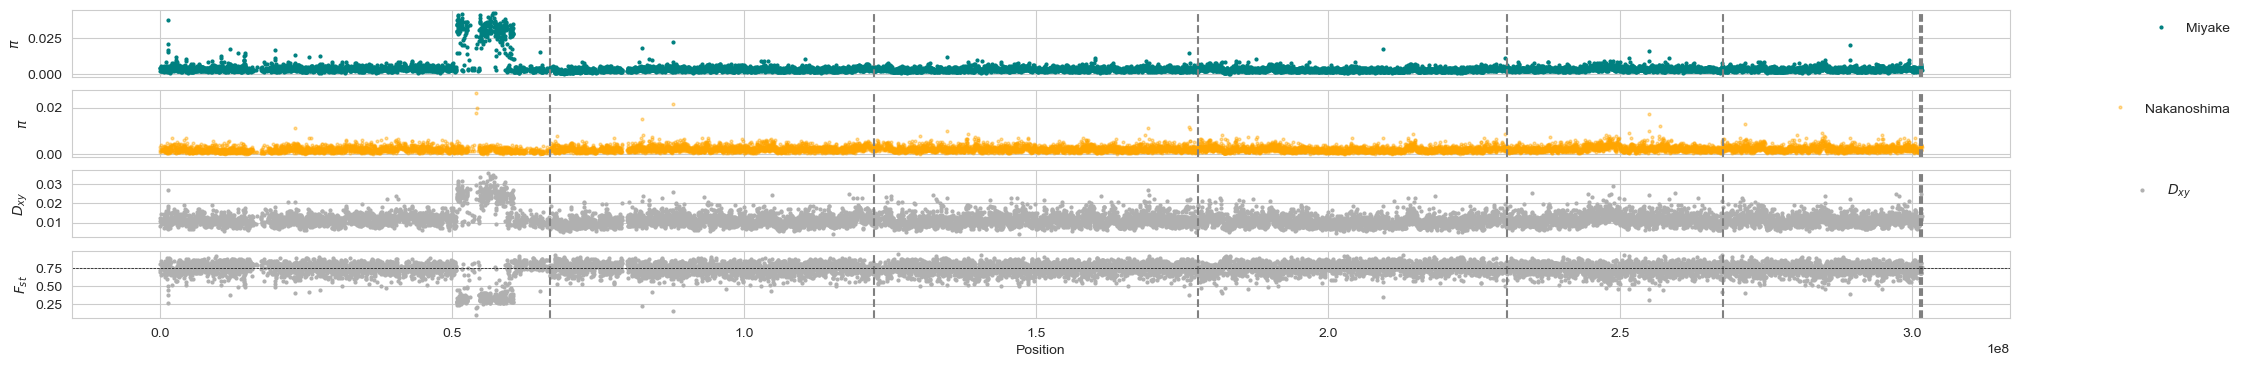

In [19]:
 
# Step 1: Find the maximum genome-wide position for each contig
chrom_ends = df_main_sorted[0:13400].groupby('chromosome')['genome_wide_position'].max()

#total_sum = 0
#    summed_list =[]
#    for num in max_values:
#        total_sum += num
#        summed_list.append(total_sum)
#df_main =  merged_all_df      
    #Plotting 
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(25, 4), sharex=True)

ax1.plot(df_main_sorted['genome_wide_position'][0:13400], df_main_sorted['avg_pi_Mi'][0:13400], marker='o', markersize=2, linewidth=0, color='teal', label='Miyake') #,alpha=0.5)
for pos in chrom_ends:
    ax1.axvline(x=pos, color='grey', linestyle='--')  # Customize color and linestyle as needed
ax1.set_ylabel(r'$\pi$')
ax1.legend(loc='upper right',bbox_to_anchor=(1.12, 1),frameon=False)

ax2.plot(df_main_sorted['genome_wide_position'][0:13400], df_main_sorted['avg_pi_Na'][0:13400], marker='o', markersize=2, linewidth=0, color='orange', label='Nakanoshima',alpha=0.4)
for pos in chrom_ends:
    ax2.axvline(x=pos, color='grey', linestyle='--')  # Customize color and linestyle as needed    

#ax1.set_ylim([-0.01, 0.05])
    #mean_pi1 = np.mean(df_main['avg_pi_short'])
    #mean_pi2 = np.mean(df_main['avg_pi_long'])
#for value in summed_list:
#        ax1.axvline(x=value, linestyle="dashed", linewidth=1, color='grey')
#    ax1.axhline(mean_pi2, linestyle="dashed", linewidth=1.7, color="black", label=r'mean $\pi$')


ax2.set_ylabel(r'$\pi$')
ax2.legend(loc='upper right',bbox_to_anchor=(1.12, 1),frameon=False)

ax3.plot(df_main_sorted['genome_wide_position'][0:13400], df_main_sorted['avg_dxy'][0:13400], marker='o', markersize=2, linewidth=0, color="#B0B0B0", label=r'$D_{xy}$')
    #ax2.set_ylim([-0.01, 0.05])
for pos in chrom_ends:
    ax3.axvline(x=pos, color='grey', linestyle='--')  # Customize color and linestyle as needed  
ax3.set_ylabel(r'$D_{xy}$')
    #mean_dxy = np.mean(df_main['avg_dxy'])
    #for value in summed_list:
   #     ax2.axvline(value, linestyle="dashed", linewidth=1, color='grey')
    #ax2.axhline(mean_dxy, linestyle="dashed", linewidth=1.8, color='black', label=r'mean $D_{xy}$')
ax3.legend(loc='upper right',bbox_to_anchor=(1.1, 1),frameon=False)

ax4.plot(df_main_sorted['genome_wide_position'][0:13400], df_main_sorted['avg_hudson_fst'][0:13400], marker='o', markersize=2, linewidth=0, color="#B0B0B0", label=r'$F_{st}$')
    #ax3.set_ylim([-0.03, 0.13])
    #ax3.set_xlim([-0.1, max(df_main['window_global'])])
for pos in chrom_ends:
    ax4.axvline(x=pos, color='grey', linestyle='--')  # Customize color and linestyle as needed  
ax4.set_xlabel('Position')
ax4.set_ylabel(r'$F_{st}$')
mean_Fst = np.mean(df_main['avg_hudson_fst'])
    #for value in summed_list:
   #     ax3.axvline(x=value, linestyle="dashed", linewidth=1, color='grey')
ax4.axhline(mean_Fst, linestyle="dashed", linewidth=0.5, color="black", label=r'mean $F_{st}$')
    #ax3.legend(loc='right',bbox_to_anchor=(1.1, 0.7),frameon=False)

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_59505/3541950790.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chrom_ends = df_main_sorted[num1:num2].groupby('chromosome')['genome_wide_position'].max()
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_59505/3541950790.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chrom_ends = df_main_sorted[num1:num2].groupby('chromosome')['genome_wide_position'].max()
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_59505/3541950790.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futu

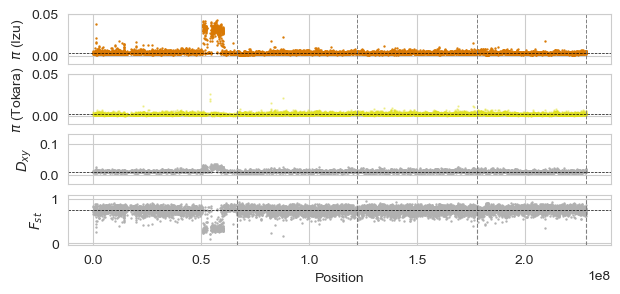

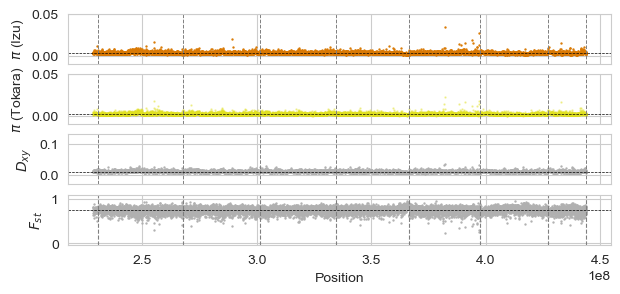

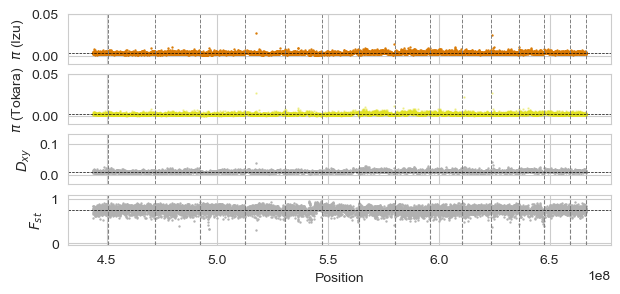

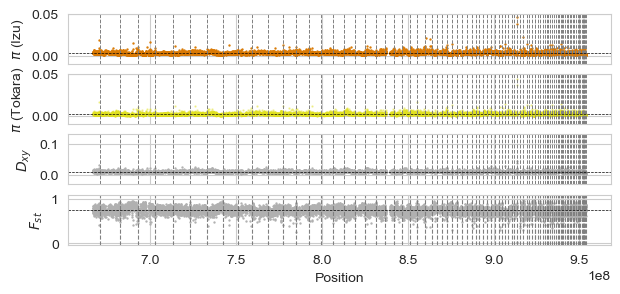

In [45]:
def plot(num1,num2):
    # Step 1: Find the maximum genome-wide position for each contig
    chrom_ends = df_main_sorted[num1:num2].groupby('chromosome')['genome_wide_position'].max()
    

    fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(7, 3), sharex=True)
    
    ax1.plot(df_main_sorted['genome_wide_position'][num1:num2], df_main_sorted['avg_pi_Mi'][num1:num2], marker='o', markersize=0.7, linewidth=0,color="#d97904" , label='Izu') #,alpha=0.5)
    for pos in chrom_ends:
        ax1.axvline(x=pos, color='grey', linestyle='--',linewidth=0.7)  # Customize color and linestyle as needed
    ax1.set_ylabel(fr'$\pi$ (Izu)')
    ax1.set_ylim([-0.01, 0.05])
    mean_pi1 = np.mean(df_main_sorted['avg_pi_Mi'])
    ax1.axhline( mean_pi1, linestyle="dashed", linewidth=0.5, color='black', label=r'mean $D_{xy}$')
    
    ax2.plot(df_main_sorted['genome_wide_position'][num1:num2], df_main_sorted['avg_pi_Na'][num1:num2], marker='o', markersize=0.7, linewidth=0, color="#e0e020", label='Tokara',alpha=0.4)
    for pos in chrom_ends:
        ax2.axvline(x=pos, color='grey', linestyle='--',linewidth=0.7)  # Customize color and linestyle as needed    
    mean_pi2 = np.mean(df_main_sorted['avg_pi_Na'])
    ax2.axhline( mean_pi2, linestyle="dashed", linewidth=0.5, color='black', label=r'mean $D_{xy}$')
#ax1.set_ylim([-0.01, 0.05])
    #mean_pi1 = np.mean(df_main['avg_pi_short'])
    #mean_pi2 = np.mean(df_main['avg_pi_long'])
#for value in summed_list:
#        ax1.axvline(x=value, linestyle="dashed", linewidth=1, color='grey')
#    ax1.axhline(mean_pi2, linestyle="dashed", linewidth=1.7, color="black", label=r'mean $\pi$')


    ax2.set_ylabel(r'$\pi$ (Tokara)')
    ax2.set_ylim([-0.01, 0.05])
    #ax2.legend(loc='upper right',bbox_to_anchor=(1.12, 1),frameon=False)
    
    ax3.plot(df_main_sorted['genome_wide_position'][num1:num2], df_main_sorted['avg_dxy'][num1:num2], marker='o', markersize=0.7, linewidth=0, color="#B0B0B0", label=r'$D_{xy}$')
        #ax2.set_ylim([-0.01, 0.05])
    for pos in chrom_ends:
        ax3.axvline(x=pos, color='grey', linestyle='--',linewidth=0.7)  # Customize color and linestyle as needed  
    ax3.set_ylabel(r'$D_{xy}$')
    ax3.set_ylim([-0.03, 0.13])
    mean_dxy = np.mean(df_main_sorted['avg_dxy'])
        #for value in summed_list:
       #     ax2.axvline(value, linestyle="dashed", linewidth=1, color='grey')
    ax3.axhline(mean_dxy, linestyle="dashed", linewidth=0.5, color='black', label=r'mean $D_{xy}$')
    #ax3.legend(loc='upper right',bbox_to_anchor=(1.1, 1),frameon=False)

    ax4.plot(df_main_sorted['genome_wide_position'][num1:num2], df_main_sorted['avg_hudson_fst'][num1:num2], marker='o', markersize=0.7, linewidth=0, color="#B0B0B0", label=r'$F_{st}$')
    for pos in chrom_ends:
        ax4.axvline(x=pos, color='grey', linestyle='--',linewidth=0.8)  # Customize color and linestyle as needed  
    ax4.set_xlabel('Position')
    ax4.set_ylim([-0.03, 1.1])
    ax4.set_ylabel(r'$F_{st}$')
    mean_Fst = np.mean(df_main['avg_hudson_fst'])
        #for value in summed_list:
       #     ax3.axvline(x=value, linestyle="dashed", linewidth=1, color='grey')
    ax4.axhline(mean_Fst, linestyle="dashed", linewidth=0.5, color="black", label=r'mean $F_{st}$')
        #ax3.legend(loc='right',bbox_to_anchor=(1.1, 0.7),frameon=False)
    plt.savefig("scan"+str(num1)+str(num2)+".pdf",bbox_inches="tight")
    

plot(0,10000)
plot(10000,20000)
plot(20000,30000)
plot(30000,40387)

#plot(1960,2310) #region to exclude

In [ ]:
df_main_sorted[1960:2310]

pop1 pop2      chromosome  window_pos_1  window_pos_2   avg_dxy  \
42198   Mi   Na  VHQE01000408.1      50660001      50680000  0.012060   
42201   Mi   Na  VHQE01000408.1      50720001      50740000  0.008538   
42202   Mi   Na  VHQE01000408.1      50740001      50760000  0.013040   
42203   Mi   Na  VHQE01000408.1      50760001      50780000  0.010975   
42207   Mi   Na  VHQE01000408.1      50840001      50860000  0.015996   
...    ...  ...             ...           ...           ...       ...   
42717   Mi   Na  VHQE01000408.1      61040001      61060000  0.009865   
42718   Mi   Na  VHQE01000408.1      61060001      61080000  0.015186   
42719   Mi   Na  VHQE01000408.1      61080001      61100000  0.013832   
42720   Mi   Na  VHQE01000408.1      61100001      61120000  0.010536   
42721   Mi   Na  VHQE01000408.1      61120001      61140000  0.008025   

       no_sites  count_diffs  count_comparisons  count_missing  ...  \
42198   17817.0      41256.0          3420864.0            0.0  ...   
42201   18315.0      30024.0          3516480.0            0.0  ...   
42202   17065.0      42724.0          3276448.0           32.0  ...   
42203   16278.0      34300.0          3125344.0           32.0  ...   
42207   18381.0      56452.0          3529120.0           32.0  ...   
...         ...          ...                ...            ...  ...   
42717   18542.0      35120.0          3560032.0           32.0  ...   
42718   17721.0      51668.0          3402400.0           32.0  ...   
42719   18850.0      50062.0          3619168.0           32.0  ...   
42720   17655.0      35716.0          3389760.0            0.0  ...   
42721   18893.0      29112.0          3627456.0            0.0  ...   

       count_comparisons_x  count_missing_x pop_y  avg_pi_Na  no_sites_y  \
42198            1175922.0              0.0    Na   0.002192       17817   
42201            1208790.0              0.0    Na   0.001740       18315   
42202            1126269.0              2.0    Na   0.004582       17065   
42203            1074327.0              2.0    Na   0.002499       16278   
42207            1213125.0              2.0    Na   0.001935       18381   
...                    ...              ...   ...        ...         ...   
42717            1223751.0              2.0    Na   0.001035       18542   
42718            1169565.0              2.0    Na   0.002630       17721   
42719            1244079.0              2.0    Na   0.003557       18850   
42720            1165230.0              0.0    Na   0.001858       17655   
42721            1246938.0              0.0    Na   0.001487       18893   

       count_diffs_y  count_comparisons_y  count_missing_y  \
42198         4686.0            2138040.0              0.0   
42201         3824.0            2197800.0              0.0   
42202         9383.0            2047800.0              0.0   
42203         4881.0            1953360.0              0.0   
42207         4267.0            2205720.0              0.0   
...              ...                  ...              ...   
42717         2304.0            2225040.0              0.0   
42718         5593.0            2126520.0              0.0   
42719         8047.0            2262000.0              0.0   
42720         3937.0            2118600.0              0.0   
42721         3372.0            2267160.0              0.0   

      new_window_position  genome_wide_position  
42198            50560000              50560000  
42201            50620000              50620000  
42202            50640000              50640000  
42203            50660000              50660000  
42207            50740000              50740000  
...                   ...                   ...  
42717            60940000              60940000  
42718            60960000              60960000  
42719            60980000              60980000  
42720            61000000              61000000  
42721            61020000              61020000  

[350 rows x 26 co

In [ ]:
len(df_main_sorted['genome_wide_position'])/

13462.333333333334

In [ ]:
df_main_sorted

pop1 pop2      chromosome  window_pos_1  window_pos_2   avg_dxy  \
39670   Mi   Na  VHQE01000408.1        100001        120000  0.012241   
39671   Mi   Na  VHQE01000408.1        120001        140000  0.008279   
39672   Mi   Na  VHQE01000408.1        140001        160000  0.010609   
39675   Mi   Na  VHQE01000408.1        200001        220000  0.010029   
39676   Mi   Na  VHQE01000408.1        220001        240000  0.014475   
...    ...  ...             ...           ...           ...       ...   
14807   Mi   Na  VHQE01000331.1        700001        720000  0.006755   
14808   Mi   Na  VHQE01000331.1        720001        740000  0.005857   
14809   Mi   Na  VHQE01000331.1        740001        760000  0.006066   
14810   Mi   Na  VHQE01000331.1        760001        780000  0.006711   
14811   Mi   Na  VHQE01000331.1        780001        800000  0.006660   

       no_sites  count_diffs  count_comparisons  count_missing  ...  pop_y  \
39670   18983.0      44614.0          3644736.0            0.0  ...     Na   
39671   18146.0      28844.0          3484032.0            0.0  ...     Na   
39672   17670.0      35994.0          3392640.0            0.0  ...     Na   
39675   19576.0      37696.0          3758560.0           32.0  ...     Na   
39676   16852.0      46834.0          3235584.0            0.0  ...     Na   
...         ...          ...                ...            ...  ...    ...   
14807   19326.0      25064.0          3710592.0            0.0  ...     Na   
14808   18141.0      20400.0          3483072.0            0.0  ...     Na   
14809   19502.0      22712.0          3744384.0            0.0  ...     Na   
14810   18701.0      24096.0          3590496.0           96.0  ...     Na   
14811   19532.0      24976.0          3750144.0            0.0  ...     Na   

       avg_pi_Na no_sites_y  count_diffs_y  count_comparisons_y  \
39670   0.003160      18983         7198.0            2277960.0   
39671   0.001106      18146         2409.0            2177520.0   
39672   0.001705      17670         3616.0            2120400.0   
39675   0.001263      19576         2966.0            2349120.0   
39676   0.004009      16852         8108.0            2022240.0   
...          ...        ...            ...                  ...   
14807   0.000782      19326         1814.0            2319120.0   
14808   0.001200      18141         2613.0            2176920.0   
14809   0.000885      19502         2072.0            2340240.0   
14810   0.000566      18701         1270.0            2244120.0   
14811   0.000823      19532         1930.0            2343840.0   

       count_missing_y  new_genomic_position_  new_genomic_position  \
39670              0.0                      0                     0   
39671              0.0                  20000                 20000   
39672              0.0                  40000                 40000   
39675              0.0                 100000                100000   
39676              0.0                 120000                120000   
...                ...                    ...                   ...   
14807              0.0                 640000                640000   
14808              0.0                 660000                660000   
14809              0.0                 680000                680000   
14810              0.0                 700000                700000   
14811              0.0                 720000                720000   

      new_window_position  genome_wide_position  
39670                   0                     0  
39671               20000                 20000  
39672               40000                 40000  
39675              100000                100000  
39676              120000                120000  
...                   ...                   ...  
14807              640000             953860000  
14808              660000             953880000  
14809              680000             953900000  
14810              700000         

Distribution of quality scores for all autosomes merged

# Development / Spare scripts

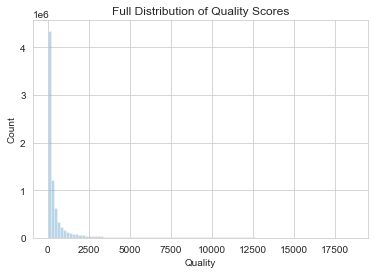

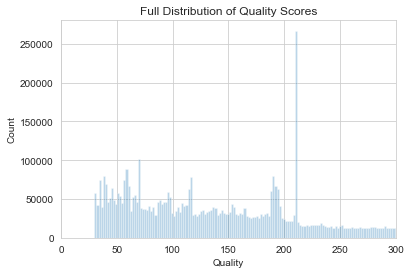

In [ ]:
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
file_path_gen="/Users/dshipilina/britomartis_all_mcaller.miss20."
#def plot_quality_distribution(file_paths_gen, color_list):
    #for i, file_path_gen in enumerate(file_paths_gen):
var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1, names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
#sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)
plt.hist(data=var_qual, x="qual", fill=True,alpha=0.3, bins=100) #, color=color_list[i], alpha=0.3)

plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)

    #plt.legend()
plt.show()

plt.hist(data=var_qual, x="qual", fill=True,alpha=0.3, bins=10000) #, color=color_list[i], alpha=0.3)
plt.xlim(0,300)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
    #plt.legend()
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qualzoom.pdf",bbox_inches="tight")
    
plt.show()


#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)


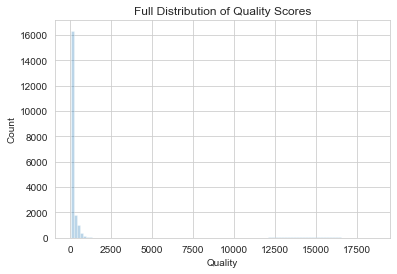

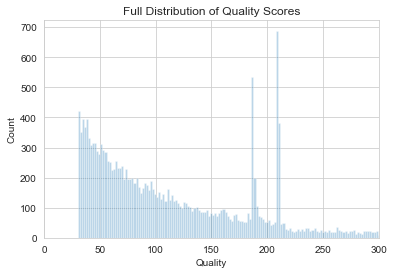

In [ ]:
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
file_path_gen="/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/CallingQC/britomartis_all_mcaller.HQ.miss0.GQfilteredNPASS.site-quality."
#/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/CallingQC/britomartis_all_mcaller.HQ.miss0.GQfilteredNPASS.site-quality.lqual
#def plot_quality_distribution(file_paths_gen, color_list):
    #for i, file_path_gen in enumerate(file_paths_gen):
var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1, names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
#sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3)
plt.hist(data=var_qual, x="qual", fill=True,alpha=0.3, bins=100) #, color=color_list[i], alpha=0.3)

#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)

    #plt.legend()
plt.show()

plt.hist(data=var_qual, x="qual", fill=True,alpha=0.3, bins=10000) #, color=color_list[i], alpha=0.3)
plt.xlim(0,300)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Full Distribution of Quality Scores")
    #plt.legend()
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qualzoom.pdf",bbox_inches="tight")
    
plt.show()


#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")
#plot_quality_distribution(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)
#plot_quality_scores_below_200(["/Users/dshipilina/britomartis_all_mcaller.miss20."], color_list)


In [ ]:
var_qual

chr    pos       qual
0        HG992177.1  24458   143.1380
1        HG992177.1  24465    45.8644
2        HG992177.1  24466   205.7780
3        HG992177.1  53851  7795.1600
4        HG992177.1  53853    69.2999
...             ...    ...        ...
8419513  HG992208.2  15108   197.0660
8419514  HG992208.2  15121   187.1010
8419515  HG992208.2  15142   187.2770
8419516  HG992208.2  15145   187.2770
8419517  HG992208.2  15148   634.2150

[8419518 rows x 3 columns]

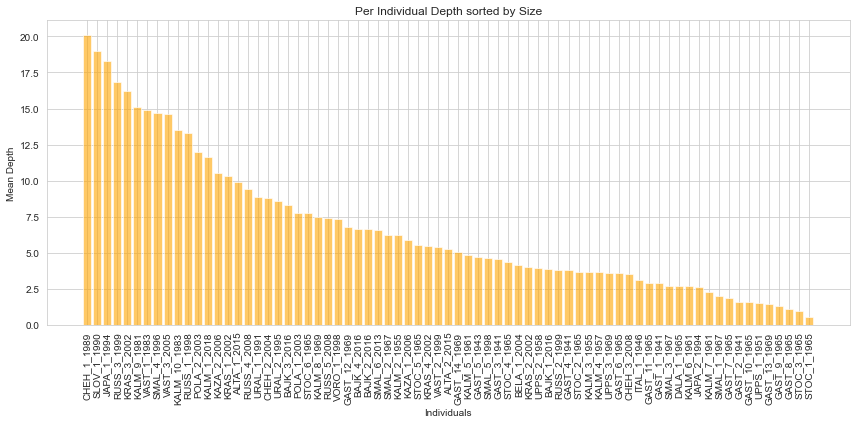

BAJK_1_2016
KRAS_2_2002
CHEH_3_2008
JAPA_2_1994
RUSS_2_1999
GAST_6_1965
UPPS_1_1951
KALM_3_1955
GAST_4_1941
GAST_2_1941
UPPS_3_1969
KALM_7_1961
GAST_10_1965
STOC_2_1965
GAST_7_1965
GAST_11_1965
STOC_3_1965
DALA_1_1965
SMAL_3_1967
KALM_6_1961
GAST_13_1969
GAST_1_1941
GAST_8_1965
GAST_9_1965
SMAL_1_1967
STOC_1_1965
KALM_4_1957
ITAL_1_1946
UPPS_2_1958


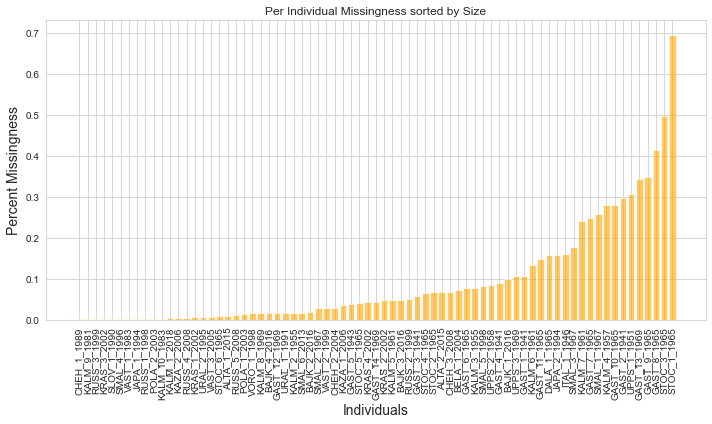

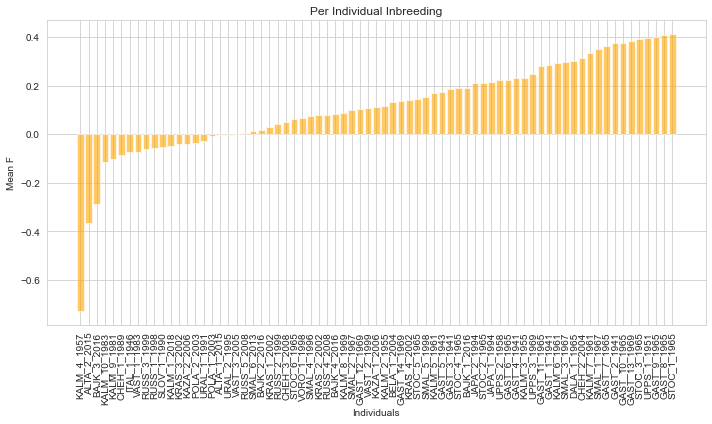

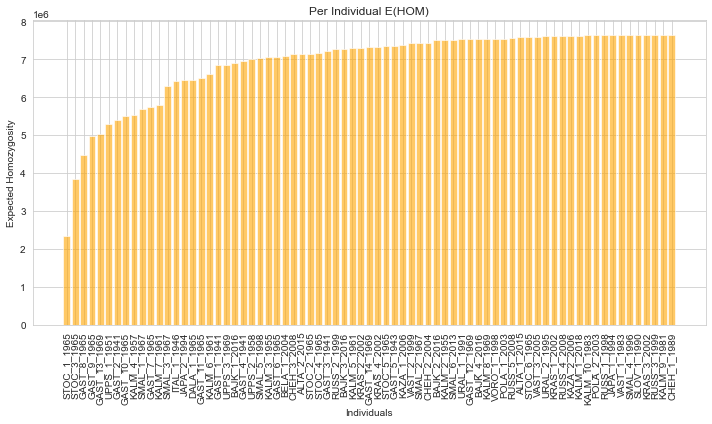

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

# Reading the data
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="depth", ascending=False)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["ind"], ind_depth_sorted["depth"], color='orange',alpha=0.6)
plt.ylabel("Mean Depth")
plt.xlabel("Individuals")
plt.title("Per Individual Depth sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap

plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.dpthind.pdf",bbox_inches="tight")
plt.show()

for i, depth_value in enumerate(ind_depth["depth"]):
    if depth_value < 4:
        print(ind_depth["ind"][i])

        
plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='orange',alpha=0.6)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.pdf",bbox_inches="tight")
plt.show()


plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F"],color='orange',alpha=0.6)
plt.ylabel("Mean F")
plt.xlabel("Individuals")
plt.title("Per Individual Inbreeding")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")
plt.show()


plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="E(HOM)", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["E(HOM)"],color='orange',alpha=0.6)
plt.ylabel("Expected Homozygosity")
plt.xlabel("Individuals")
plt.title("Per Individual E(HOM)")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.heter.pdf",bbox_inches="tight")
plt.show()

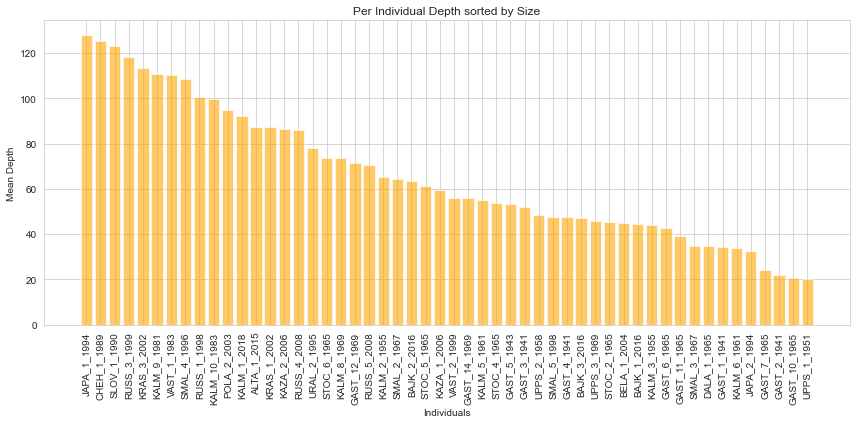

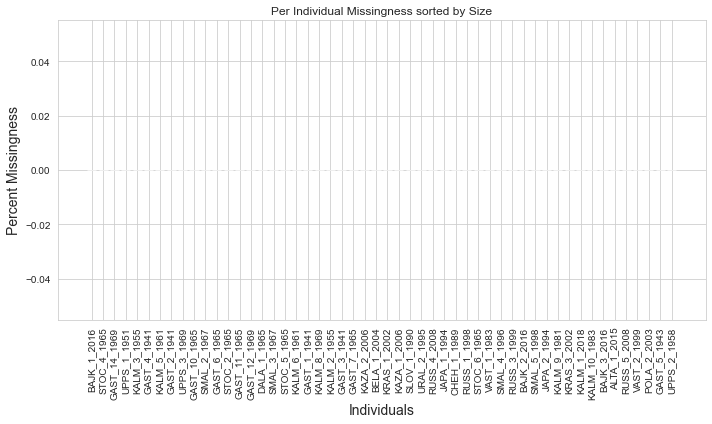

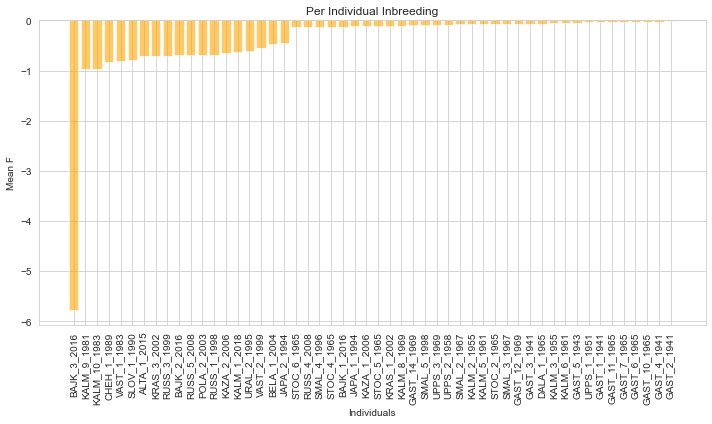

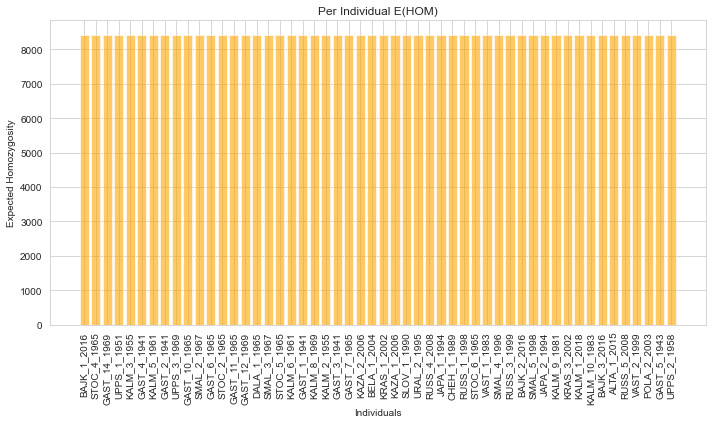

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_gen="/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/CallingQC/britomartis_all_mcaller.HQ.miss0.GQfilteredNPASS."

plt.figure(figsize=(12, 6))

# Reading the data
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="depth", ascending=False)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["ind"], ind_depth_sorted["depth"], color='orange',alpha=0.6)
plt.ylabel("Mean Depth")
plt.xlabel("Individuals")
plt.title("Per Individual Depth sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap

#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.dpthind.pdf",bbox_inches="tight")
plt.show()

for i, depth_value in enumerate(ind_depth["depth"]):
    if depth_value < 4:
        print(ind_depth["ind"][i])

        
plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "imiss", sep="\t", skiprows=1, names=["INDV","N_DATA","N_GENOTYPES_FILTERED","N_MISS","F_MISS"])

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F_MISS", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F_MISS"], color='orange',alpha=0.6)
plt.ylabel("Percent Missingness",fontsize=14)
plt.xlabel("Individuals",fontsize=14)

plt.title("Per Individual Missingness sorted by Size")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.indmiss.pdf",bbox_inches="tight")
plt.show()


plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="F", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["F"],color='orange',alpha=0.6)
plt.ylabel("Mean F")
plt.xlabel("Individuals")
plt.title("Per Individual Inbreeding")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
plt.ylim()
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")
plt.show()


plt.figure(figsize=(10, 6))
# Reading the data
ind_depth = pd.read_csv(file_path_gen + "het", sep="\t", skiprows=1, names=["INDV","O(HOM)","E(HOM)","N_SITES","F"])
#["INDV","O(HOM)","E(HOM)","N_SITES","F"]

# Modify 'ind' column to remove redundancy
ind_depth["INDV"] = ind_depth["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

# Sort the DataFrame by 'depth'
ind_depth_sorted = ind_depth.sort_values(by="E(HOM)", ascending=True)

# Bar chart with sorted values and modified 'ind' labels
plt.bar(ind_depth_sorted["INDV"], ind_depth_sorted["E(HOM)"],color='orange',alpha=0.6)
plt.ylabel("Expected Homozygosity")
plt.xlabel("Individuals")
plt.title("Per Individual E(HOM)")
plt.xticks(rotation=90)  # Rotate x labels for better visualization
plt.tight_layout()  # To ensure labels don't overlap
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.heter.pdf",bbox_inches="tight")
plt.show()

In [ ]:
ind_depth = pd.read_csv(file_path_gen + "idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])

# Modify 'ind' column to remove redundancy
ind_depth["ind"] = ind_depth["ind"].apply(lambda x: "_".join(x.split("_")[:3]))



for i, depth_value in enumerate(ind_depth["depth"]):
    if depth_value < 3:
        print(ind_depth["ind"][i],depth_value)

JAPA_2_1994 2.62886
UPPS_1_1951 1.48796
GAST_2_1941 1.6006
KALM_7_1961 2.25957
GAST_10_1965 1.56229
GAST_7_1965 1.81825
GAST_11_1965 2.91104
STOC_3_1965 0.960228
DALA_1_1965 2.65588
SMAL_3_1967 2.71023
KALM_6_1961 2.65386
GAST_13_1969 1.40341
GAST_1_1941 2.87744
GAST_8_1965 1.10823
GAST_9_1965 1.31725
SMAL_1_1967 1.97408
STOC_1_1965 0.520048


In [ ]:
ind_depth

ind   nsites     depth
0   BAJK_1_2016_BAJK_1_2016  8419518   3.84525
1   KAZA_1_2006_KAZA_1_2006  8419518   5.84948
2   SLOV_1_1990_SLOV_1_1990  8419518  18.99780
3   URAL_2_1995_URAL_2_1995  8419518   8.59179
4   RUSS_4_2008_RUSS_4_2008  8419518   9.40172
..                      ...      ...       ...
68  KALM_4_1957_KALM_4_1957  8419518   3.63837
69  GAST_3_1941_GAST_3_1941  8419518   4.56751
70  ITAL_1_1946_ITAL_1_1946  8419518   3.06773
71  GAST_5_1943_GAST_5_1943  8419518   4.71788
72  UPPS_2_1958_UPPS_2_1958  8419518   3.90412

[73 rows x 3 columns]

No handles with labels found to put in legend.


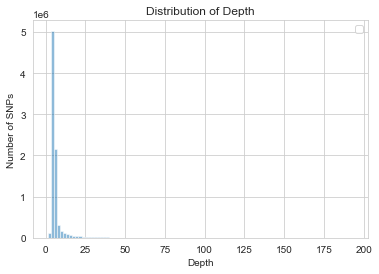

count    8.419518e+06
mean     6.681912e+00
std      6.994799e+00
min      1.547950e+00
25%      4.630140e+00
50%      5.136990e+00
75%      5.835620e+00
max      1.929180e+02
Name: MEAN_DEPTH, dtype: float64


In [ ]:
var_qual = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                               names=["CHROM","POS","MEAN_DEPTH","VAR_DEPTH"])
var_qual = var_qual[var_qual["MEAN_DEPTH"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["MEAN_DEPTH"], how="any")

plt.hist(var_qual['MEAN_DEPTH'], fill=True, alpha=0.5, bins=100)
plt.xlabel("Depth")
plt.ylabel("Number of SNPs")
plt.title("Distribution of Depth")
        
plt.legend()
plt.show()

print(var_qual['MEAN_DEPTH'].describe())

In [ ]:
var_qual

chr       pos      qual
HG992177.1  24458   14.0411   715.262
HG992177.1  24465   12.8630   683.870
HG992177.1  24466   11.4110   709.301
HG992177.1  53851   10.7260   213.063
HG992177.1  53853   11.1096   220.016
...           ...       ...       ...
HG992208.2  15108  165.6030  4550.300
HG992208.2  15121  171.3420  5393.920
HG992208.2  15142  147.9590  4368.510
HG992208.2  15145  142.9320  4099.980
HG992208.2  15148  140.7120  4305.850

[8419518 rows x 3 columns]

<Figure size 720x432 with 0 Axes>

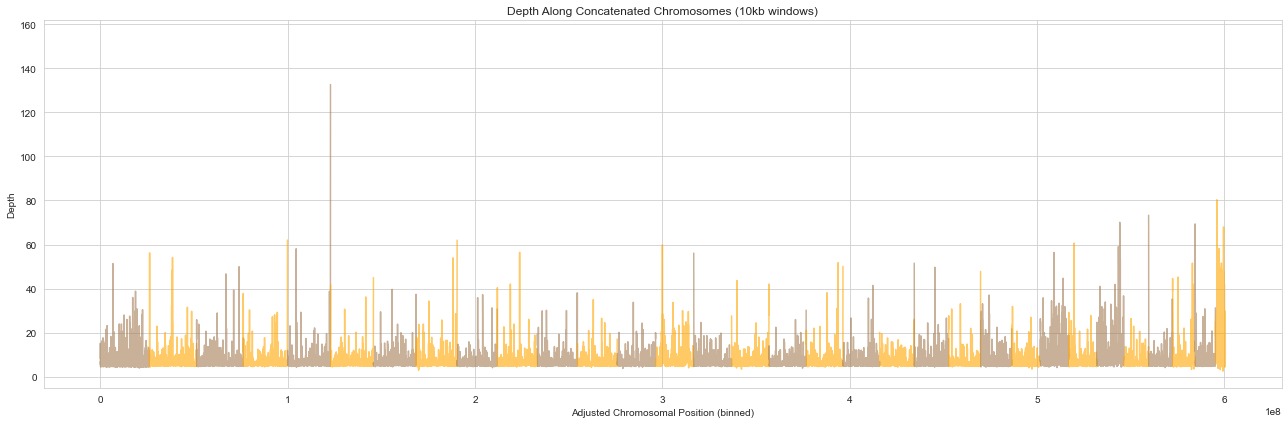

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Define window size
window_size = 30000

# Compute the bin number for each position
var_qual['BIN'] = (var_qual['POS'] // window_size) + 1

# Compute statistics for each bin (here: mean depth for each window)
binned_data = var_qual.groupby(['CHROM', 'BIN']).agg({
    'MEAN_DEPTH': 'mean',
    'VAR_DEPTH': 'mean'
}).reset_index()

# You can also compute the start and end of each bin for plotting purposes
binned_data['BIN_START'] = (binned_data['BIN'] - 1) * window_size + 1
binned_data['BIN_END'] = binned_data['BIN'] * window_size

# Compute the adjusted position for concatenated chromosomes
offsets = binned_data.groupby('CHROM')['BIN_END'].max().cumsum()
offsets = offsets.shift(1).fillna(0).to_dict()
binned_data['ADJUSTED_POS'] = binned_data.apply(lambda row: row['BIN_START'] + offsets[row['CHROM']], axis=1)

plt.figure(figsize=(18, 6))

# For alternating colors, assign a color to each chromosome
chromosomes = binned_data['CHROM'].unique()
colors = {chrom: ('#A57E56' if i % 2 == 0 else 'orange') for i, chrom in enumerate(chromosomes)}

#plt.figure(figsize=(12, 6))

# Plot MEAN_DEPTH or VAR_DEPTH along the adjusted positions with alternating colors
for chrom in chromosomes:
    subset = binned_data[binned_data['CHROM'] == chrom]
    plt.plot(subset['ADJUSTED_POS'], subset['MEAN_DEPTH'], label=f'MEAN_DEPTH {chrom}', color=colors[chrom],alpha=0.6) # marker='o')
    #plt.plot(subset['ADJUSTED_POS'], subset['VAR_DEPTH'], label=f'VAR_DEPTH {chrom}', color=colors[chrom], marker='o', alpha=0.5)

plt.xlabel('Adjusted Chromosomal Position (binned)')
plt.ylabel('Depth')
plt.title('Depth Along Concatenated Chromosomes (10kb windows)')
#plt.legend()
plt.tight_layout()
plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.depthchrom.pdf",bbox_inches="tight")
plt.show()


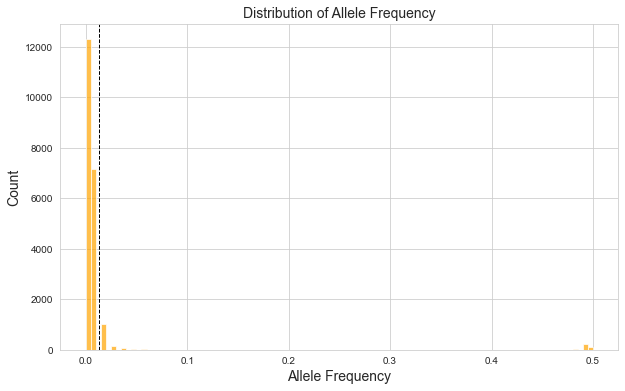

In [ ]:
plt.figure(figsize=(10, 6))
var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
plt.xlabel("Allele Frequency", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title("Distribution of Allele Frequency",fontsize=14)
plt.hist(var_freq["maf"], fill=True, color='orange',alpha=0.7, bins=100)
mean_freq = np.mean(var_freq["maf"])
        #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.allelefrq.pdf",bbox_inches="tight")
plt.show()

In [ ]:
with open("athalia_britomart_NCBI_selection.fasta", "r") as infile:
    sequence = ""
    chromosome = ""
    for line in infile:
        if line.startswith(">"):
            if sequence:
                start = None
                for i, base in enumerate(sequence):
                    if base.islower() and start is None:
                        start = i
                    elif base.isupper() and start is not None:
                        end = i
                        print(f"{chromosome}\t{start}\t{end}")
                        start = None
            chromosome = line.strip().split()[0][1:]
            sequence = ""
        else:
            sequence += line.strip()

athalia|HQ004750.1	372	386


In [ ]:
var_freq["maf"]

0          0.039683
1          0.053846
2          0.038462
3          0.428571
4          0.007812
             ...   
8419513    0.006849
8419514    0.013699
8419515    0.013699
8419516    0.013699
8419517    0.041096
Name: maf, Length: 8419518, dtype: float64

Distribution of quality scores for Z vs chrom 1

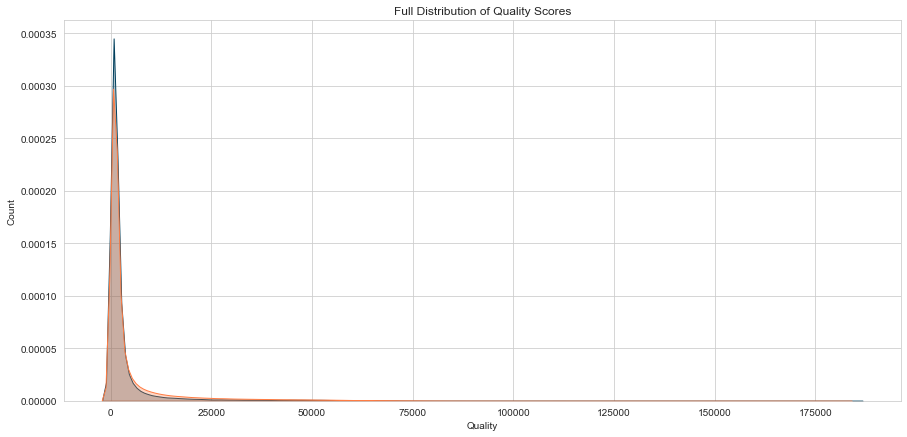

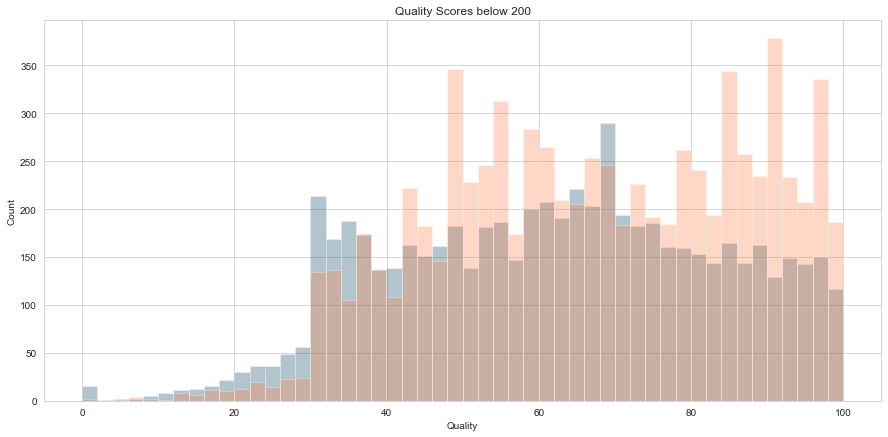

In [ ]:
from_chr=24
till_chr=25
file_paths_gen=file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_distribution(file_paths_gen, color_list)
plot_quality_scores_below_200(file_paths_gen, color_list)

Quality and depth gap evaluation

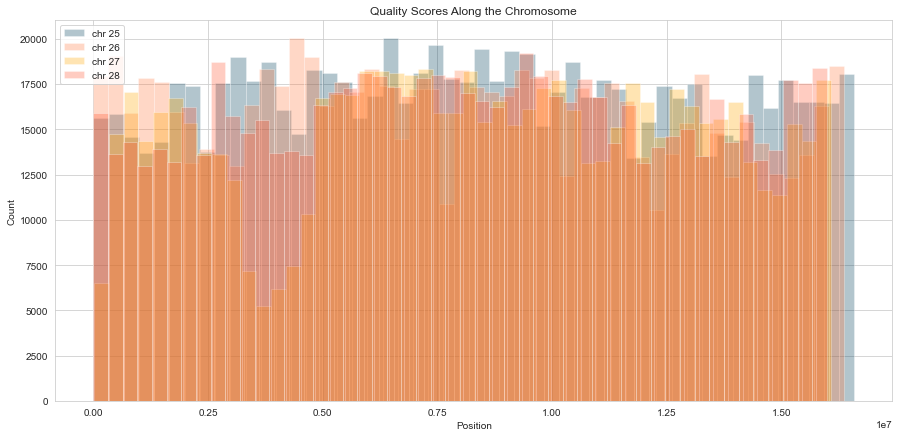

In [ ]:
from_chr=25
till_chr=28
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

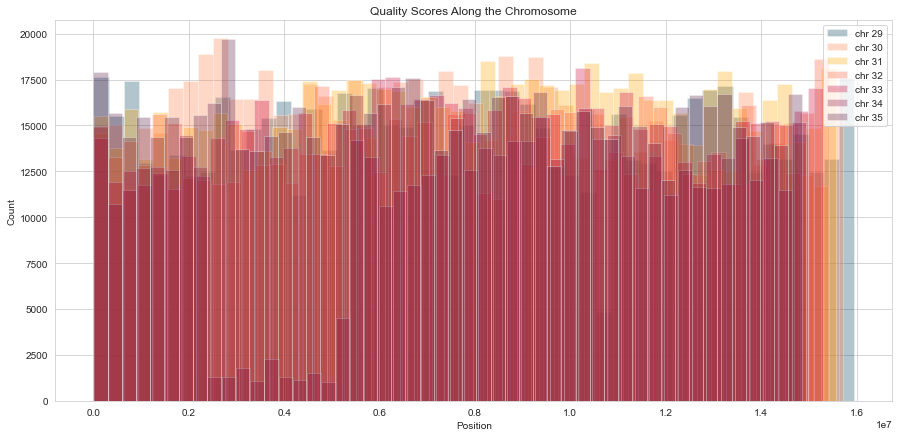

In [ ]:
from_chr=29
till_chr=35
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

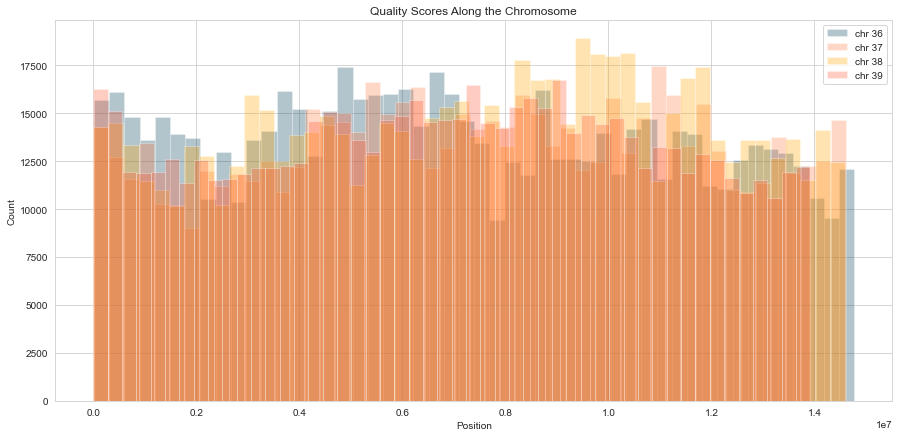

In [ ]:
from_chr=36
till_chr=39
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

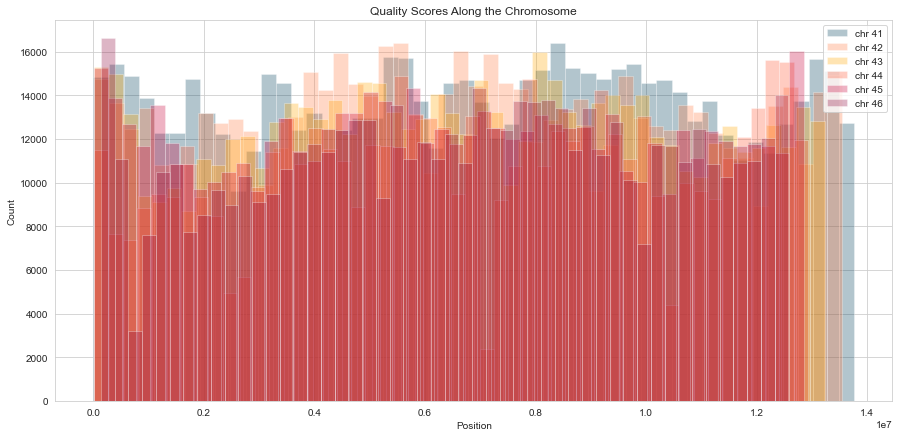

In [ ]:
from_chr=41
till_chr=46
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

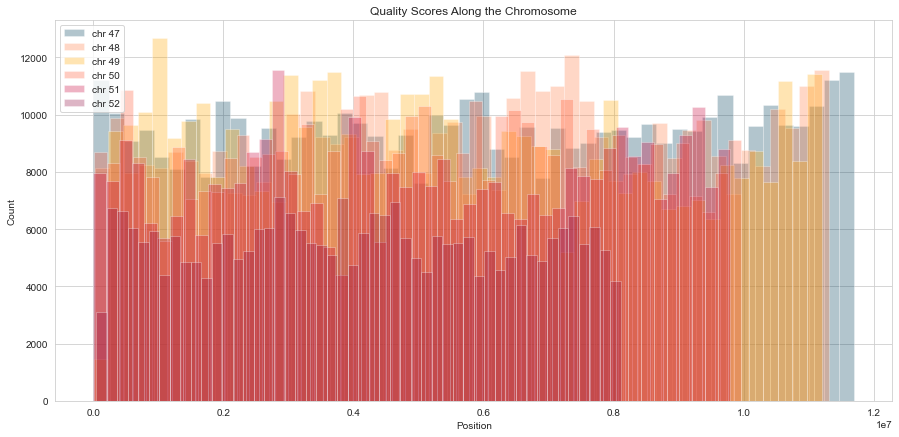

In [ ]:
from_chr=47
till_chr=52
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

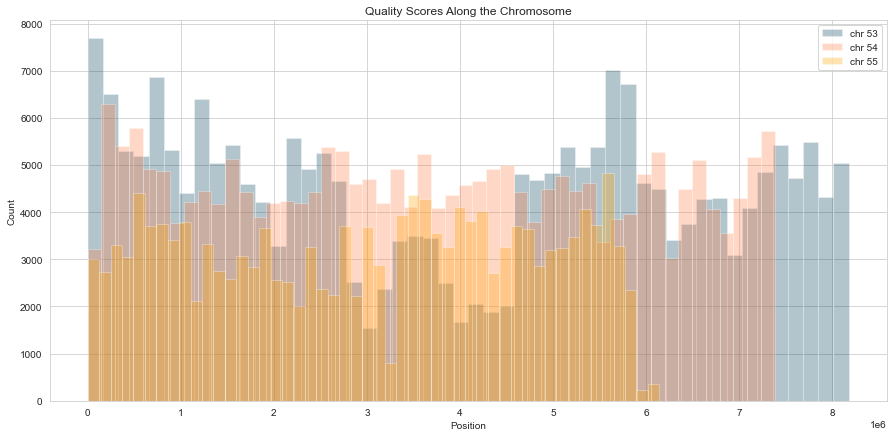

In [ ]:
from_chr=53
till_chr=55
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

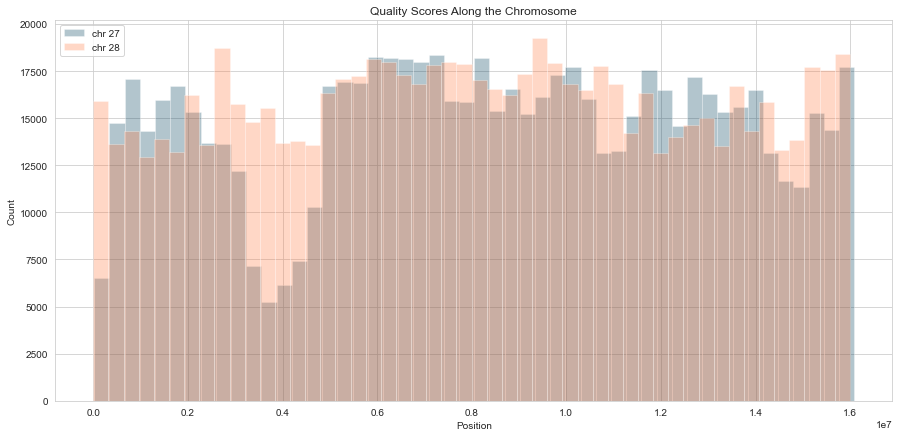

No handles with labels found to put in legend.


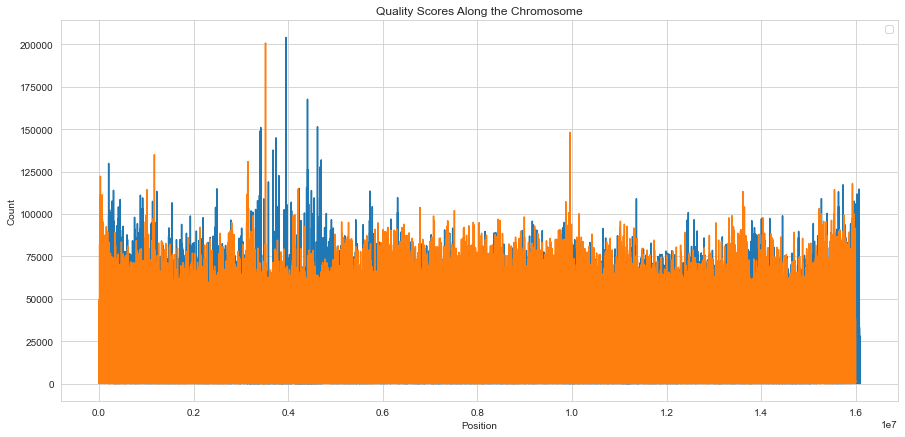

In [ ]:
from_chr=27
till_chr=28
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)
plot_quality_scores_along_chromosome2(file_paths_gen, color_list)

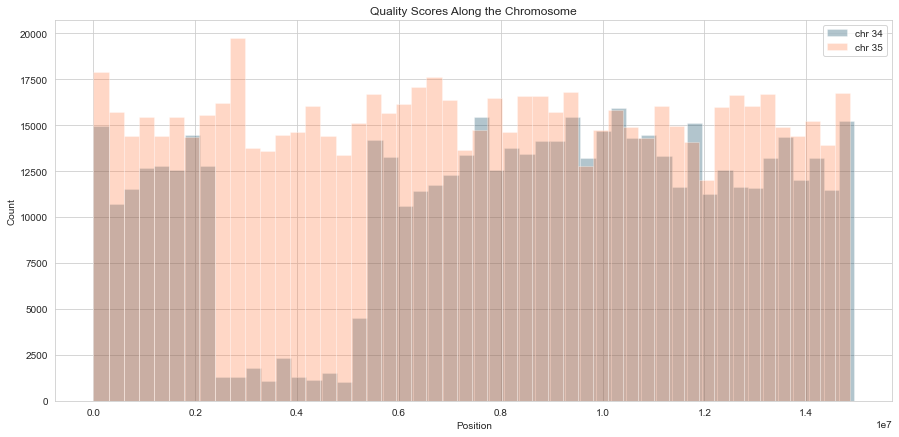

In [ ]:
from_chr=34
till_chr=35
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

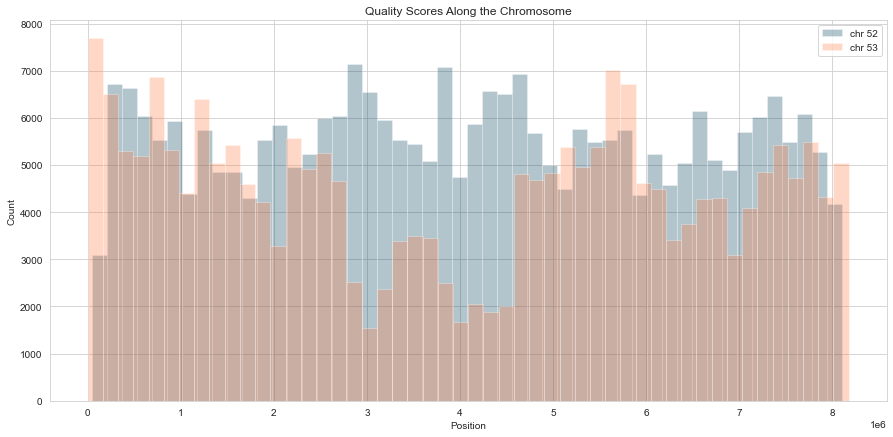

In [ ]:
from_chr=52
till_chr=53
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]
plot_quality_scores_along_chromosome(file_paths_gen, color_list)

### Depth difference discovery

No handles with labels found to put in legend.


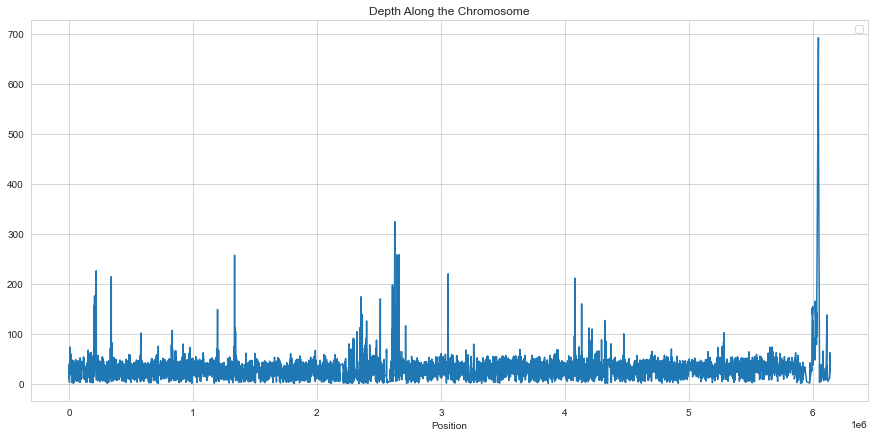

In [ ]:
def plot_depth_along_chromosome(file_paths_gen, color_list):
    for i, file_path_gen in enumerate(file_paths_gen):
        var_qual = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,
                               names=["chr", "pos", "mean_depth", "var_depth"])
        #var_qual = var_qual[var_qual["qual"] != -1]
        #var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

        plt.plot(var_qual['pos'],var_qual['mean_depth'])
        #plt.plot(var_qual['pos'],var_qual['var_depth'])
        #plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50,label=label_list[i])
        plt.xlabel("Position")
        plt.ylabel("")
        plt.title("Depth Along the Chromosome")
        
    plt.legend()
    plt.show()

    
from_chr=55
till_chr=55

file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]    
plot_depth_along_chromosome(file_paths_gen, color_list)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

#file_paths = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual",
#"/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual"]

#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.","/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant."]

from_chr=27
till_chr=28
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
 
#List of colors to be used for each plot
color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

# List of labels for each plot
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Full Distribution of Quality Scores")
    sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3,label=label_list[i])

plt.legend()
plt.show()

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Quality Scores below 200")
    qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_qual = np.mean(var_qual["qual"])
    
plt.show()

for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50)
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.title("Quality Scores Along the Chromosome")
plt.show()    
    
for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth")
plt.show() 

for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_depth = np.mean(var_depth["mean_depth"])
    #print(mean_depth)
    #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth below 200")
plt.show() 


for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Distribution of Allele Frequency")
    plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
    mean_freq = np.mean(var_freq["maf"])
    #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Minor Allele Frequency")
    var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
    plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
    plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
    plt.xlabel("Missingness")
    plt.ylabel("Count")
    plt.title("Missing Data")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
    sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Number of individuals")
    plt.title("Per Individual Depth")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])
    plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
    plt.xlabel("f")
    plt.ylabel("Number of individuals")
    plt.title("Inbreeding coeficient")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files
var_qual = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.lqual", sep="\t", skiprows=1,
                        names=["chr", "pos", "qual"])

var_depth = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.ldepth.mean", sep="\t", skiprows=1,
                         names=["chr", "pos", "mean_depth", "var_depth"])

var_miss = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.lmiss", sep="\t", skiprows=1,
                        names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])

var_freq = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.frq", sep="\t", skiprows=1,
                        names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])

ind_depth = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.idepth", sep="\t", skiprows=1,
                         names=["ind", "nsites", "depth"])

ind_miss = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.imiss", sep="\t", skiprows=1,
                        names=["ind", "ndata", "nfiltered", "nmiss", "fmiss"])

ind_het = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/LR999955.het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])

# Plotting the data using seaborn and matplotlib
sns.set_style("whitegrid")

sns.kdeplot(data=var_qual, x="qual", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

print(var_depth["mean_depth"].describe())

sns.kdeplot(data=var_miss, x="fmiss", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
sns.kdeplot(data=var_freq, x="maf", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

sns.histplot(data=ind_depth, x="depth", bins=20, color="dodgerblue", alpha=0.3)
plt.show()

sns.histplot(data=ind_miss, x="fmiss", bins=20, color="dodgerblue", alpha=0.3)
plt.show()

sns.histplot(data=ind_het, x="f", bins=20, color="dodgerblue", alpha=0.3)
plt.show()


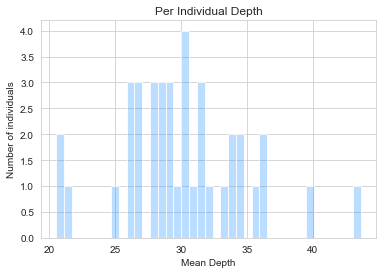

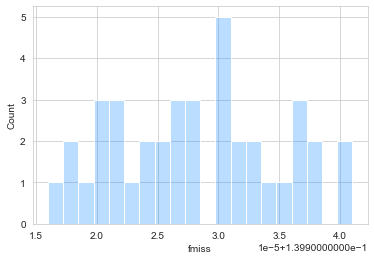

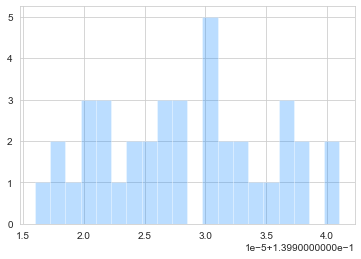

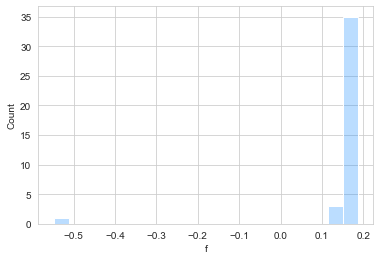

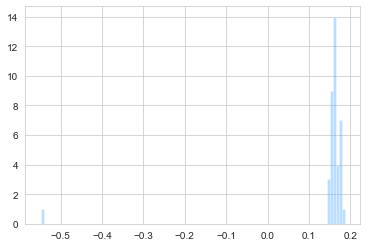

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files

ind_depth = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.idepth", sep="\t", skiprows=1,
                         names=["ind", "nsites", "depth"])

ind_miss = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.imiss", sep="\t", skiprows=1,
                        names=["ind", "ndata", "nfiltered", "nmiss", "fmiss"])

ind_het = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])

# Plotting the data using seaborn and matplotlib
sns.set_style("whitegrid")


sns.histplot(data=ind_depth, x="depth", bins=39, color="dodgerblue", alpha=0.3)
plt.xlabel("Mean Depth")
plt.ylabel("Number of individuals")
plt.title("Per Individual Depth")
plt.show()

sns.histplot(data=ind_miss, x="fmiss", bins=20, color="dodgerblue", alpha=0.3)
plt.show()

plt.hist(ind_miss["fmiss"], bins=20, color="dodgerblue", alpha=0.3)
plt.show()

sns.histplot(data=ind_het, x="f", bins=20, color="dodgerblue", alpha=0.3)
plt.show()

plt.hist(ind_het["f"], bins=100, color="dodgerblue", alpha=0.3)
plt.xlabel("Mean Depth")
plt.ylabel("Number of individuals")
plt.title("Inbreeding coeficient")
plt.show()


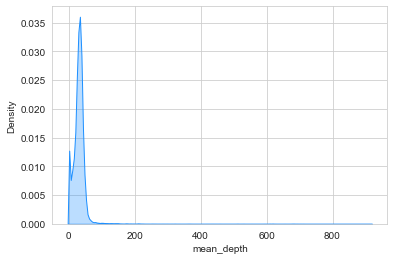

count    1.782183e+06
mean     3.008788e+01
std      2.182820e+01
min      0.000000e+00
25%      2.143590e+01
50%      3.028210e+01
75%      3.738460e+01
max      9.161030e+02
Name: mean_depth, dtype: float64


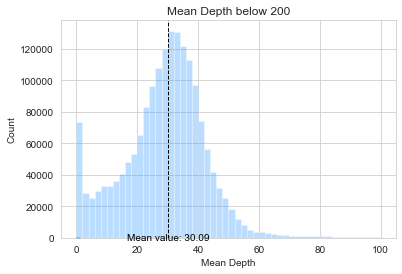

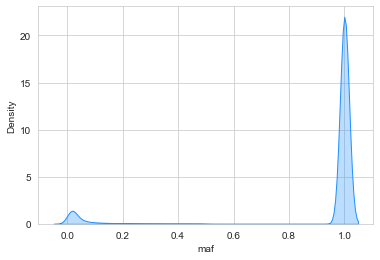

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files
var_depth = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.ldepth.mean", sep="\t", skiprows=1,
                         names=["chr", "pos", "mean_depth", "var_depth"])

var_miss = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.lmiss", sep="\t", skiprows=1,
                        names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])

var_freq = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.frq", sep="\t", skiprows=1,
                        names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])


# Plotting the data using seaborn and matplotlib


sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

plt.xlabel("Mean Depth")
plt.ylabel("Count")
plt.title("Mean Depth below 200")
var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
plt.hist(var_depth_400["mean_depth"], fill=True, color="dodgerblue", alpha=0.3, bins=50)
mean_depth = np.mean(var_depth["mean_depth"])
plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
plt.axvline(mean_depth, color="black", linestyle="dashed", linewidth=1)


print(var_depth["mean_depth"].describe())

sns.kdeplot(data=var_miss, x="fmiss", fill=True, color="dodgerblue", alpha=0.3)
plt.show()

var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
sns.kdeplot(data=var_freq, x="maf", fill=True, color="dodgerblue", alpha=0.3)
plt.show()


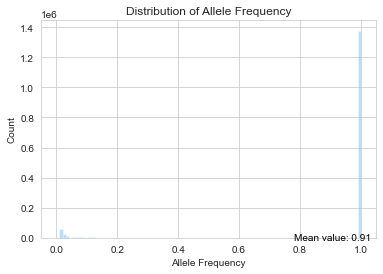

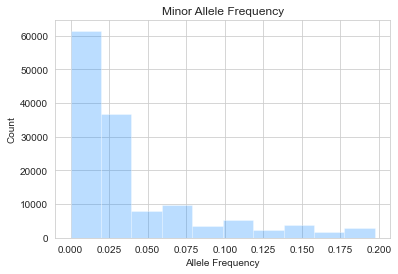

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files

var_freq = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.frq", sep="\t", skiprows=1,
                        names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])


# Plotting the data using seaborn and matplotlib

var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
#sns.kdeplot(data=var_freq, x="maf", fill=True, color="dodgerblue", alpha=0.3)
#plt.show()

plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency")
plt.hist(var_freq["maf"], fill=True, color="dodgerblue", alpha=0.3, bins=100)
mean_freq = np.mean(var_freq["maf"])
plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")

plt.show()

plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Minor Allele Frequency")
var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
plt.hist(var_freq_sm["maf"], fill=True, color="dodgerblue", alpha=0.3)
mean_freq = np.mean(var_freq["maf"])
plt.show()



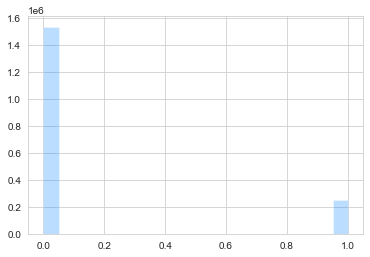

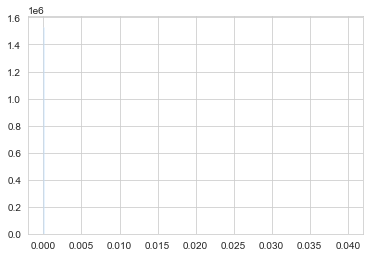

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files
var_depth = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.ldepth.mean", sep="\t", skiprows=1,
                         names=["chr", "pos", "mean_depth", "var_depth"])

var_miss = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.lmiss", sep="\t", skiprows=1,
                        names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])


# Plotting the data using seaborn and matplotlib


plt.hist(var_miss["fmiss"], fill=True, color="dodgerblue", alpha=0.3,bins=20)
plt.show()

var_miss_400 = var_miss[var_miss["fmiss"] < 0.05] # create a new dataset with only "qual" values < 400
plt.hist(var_miss_400["fmiss"], fill=True, color="dodgerblue", alpha=0.3, bins=1000)
#mean_depth = np.mean(var_depth["mean_depth"])
#plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
#plt.axvline(mean_depth, color="black", linestyle="dashed", linewidth=1)
plt.show()

#plt.hist(var_miss["nmiss"], fill=True, color="dodgerblue", alpha=0.3,bins=100)
#plt.show()
#plt.hist(var_miss["nfiltered"], fill=True, color="dodgerblue", alpha=0.3,bins=100)
#plt.show()
#var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
#sns.kdeplot(data=var_freq, x="maf", fill=True, color="dodgerblue", alpha=0.3)
#plt.show()


### Polished

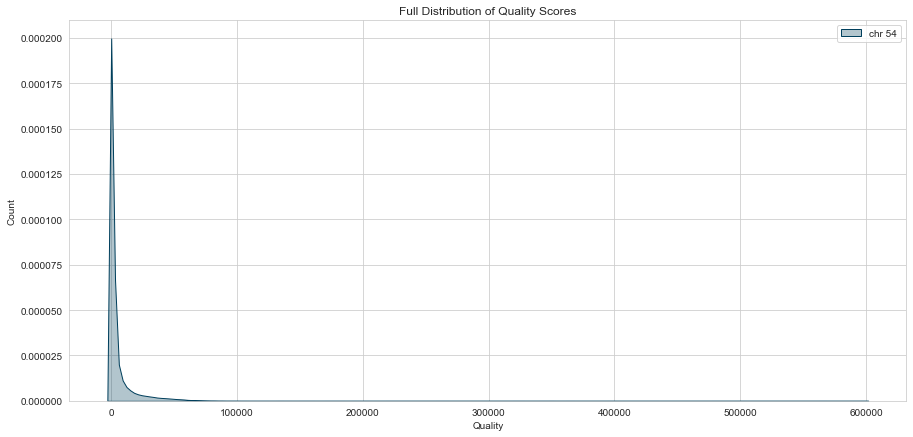

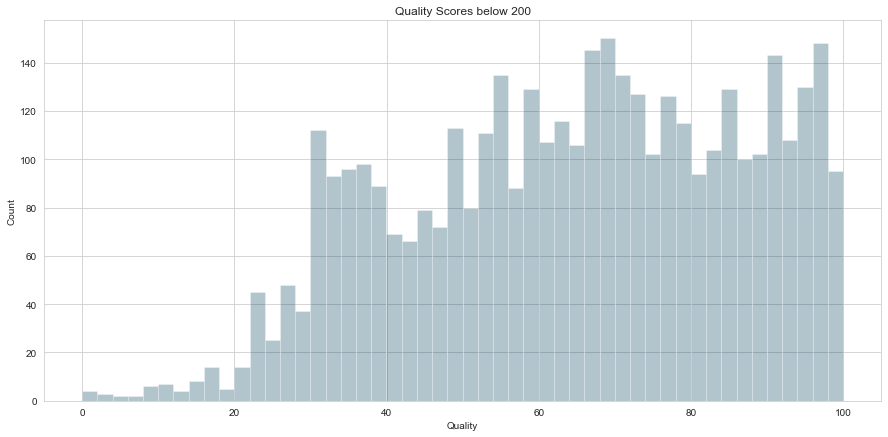

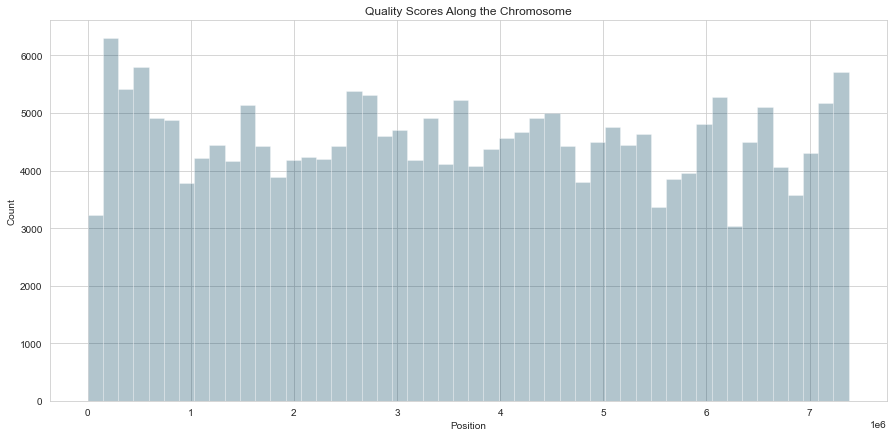

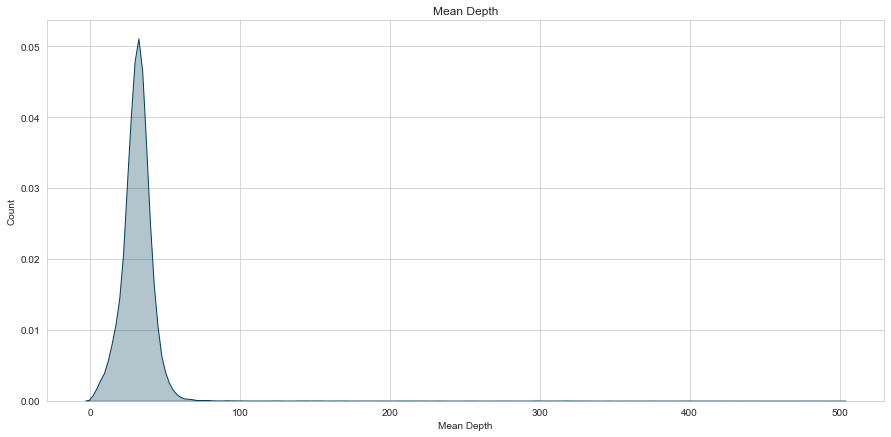

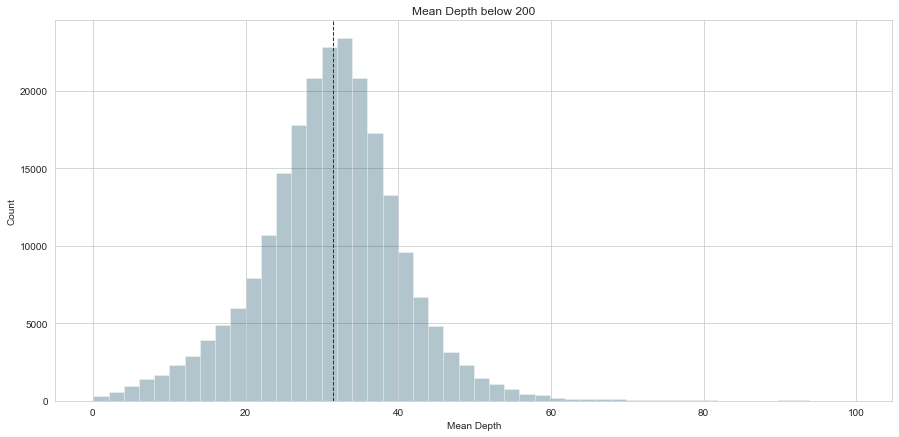

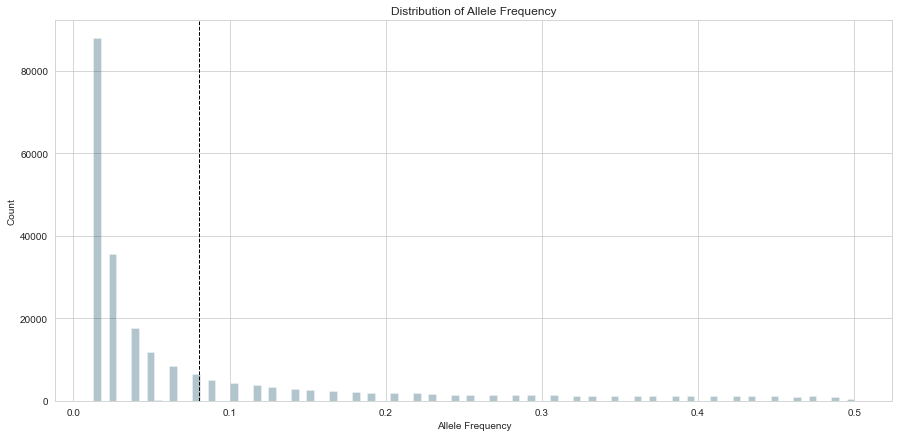

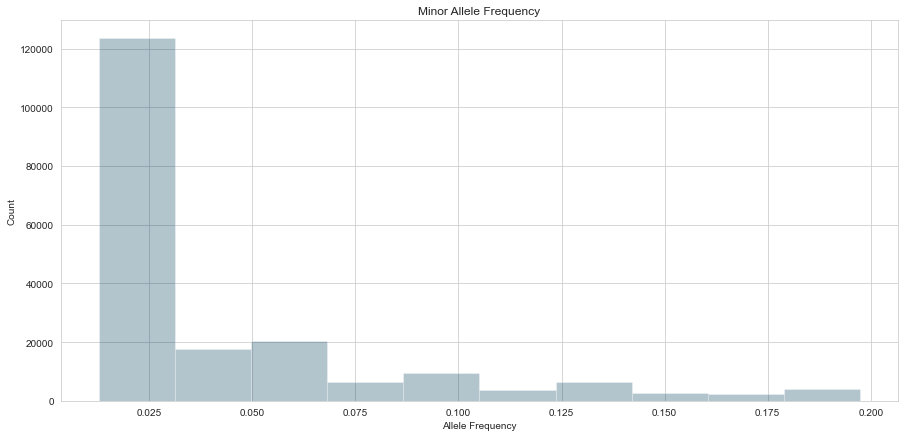

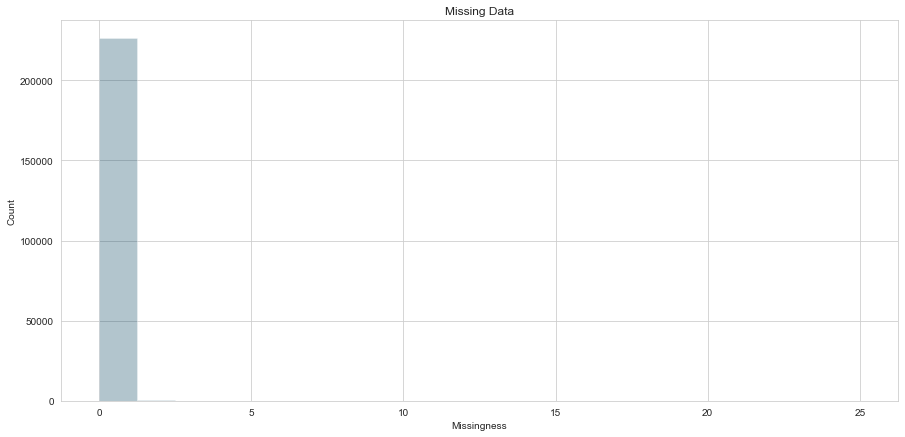

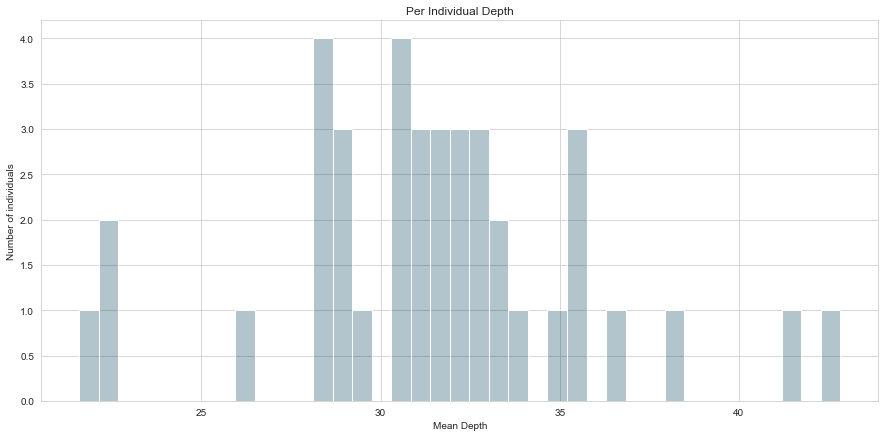

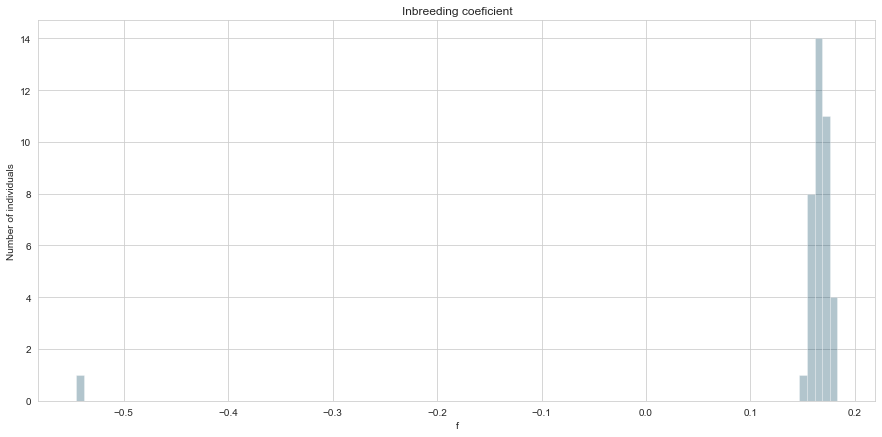

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

#file_paths = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual",
#"/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual"]

#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.","/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant."]

from_chr=54
till_chr=54
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
 
#List of colors to be used for each plot
color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

# List of labels for each plot
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Full Distribution of Quality Scores")
    sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3,label=label_list[i])

plt.legend()
plt.show()

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Quality Scores below 200")
    qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_qual = np.mean(var_qual["qual"])
    
plt.show()

for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50)
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.title("Quality Scores Along the Chromosome")
plt.show()    
    
for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth")
plt.show() 

for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_depth = np.mean(var_depth["mean_depth"])
    #print(mean_depth)
    #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth below 200")
plt.show() 


for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Distribution of Allele Frequency")
    plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
    mean_freq = np.mean(var_freq["maf"])
    #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Minor Allele Frequency")
    var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
    plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
    plt.hist(var_miss["nmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
    plt.xlabel("Missingness")
    plt.ylabel("Count")
    plt.title("Missing Data")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
    sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Number of individuals")
    plt.title("Per Individual Depth")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])
    plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
    plt.xlabel("f")
    plt.ylabel("Number of individuals")
    plt.title("Inbreeding coeficient")
plt.show()

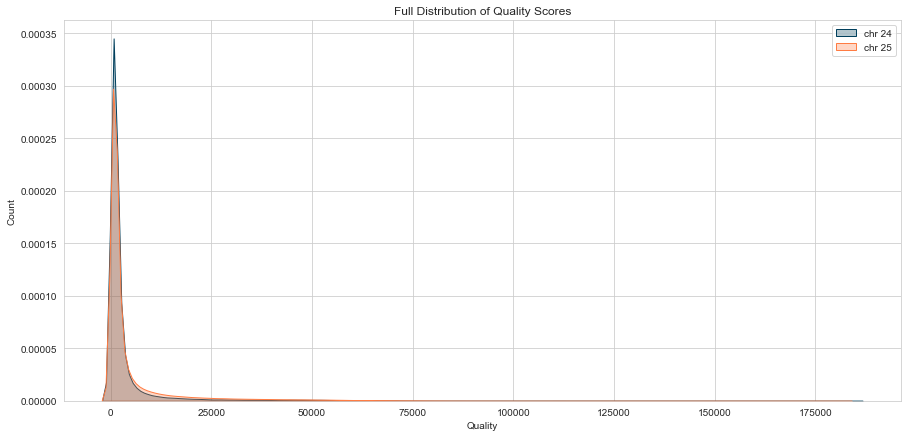

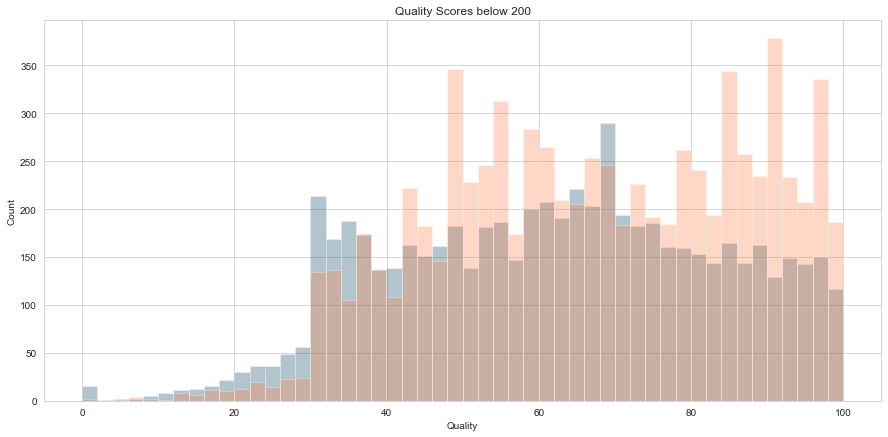

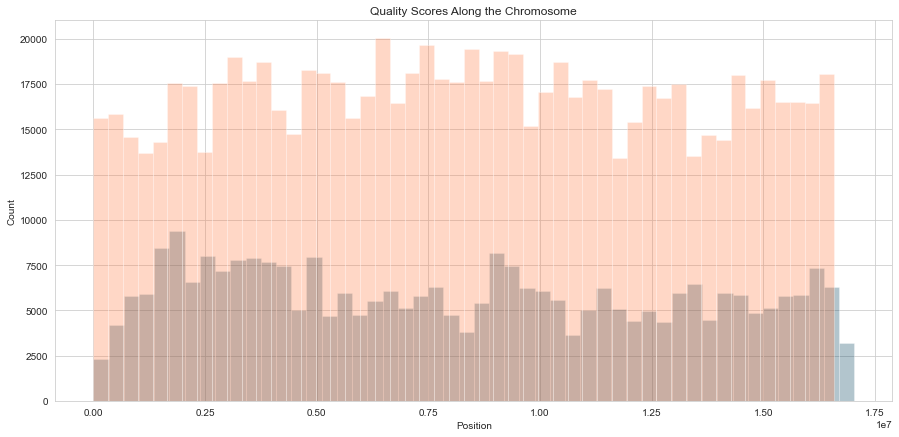

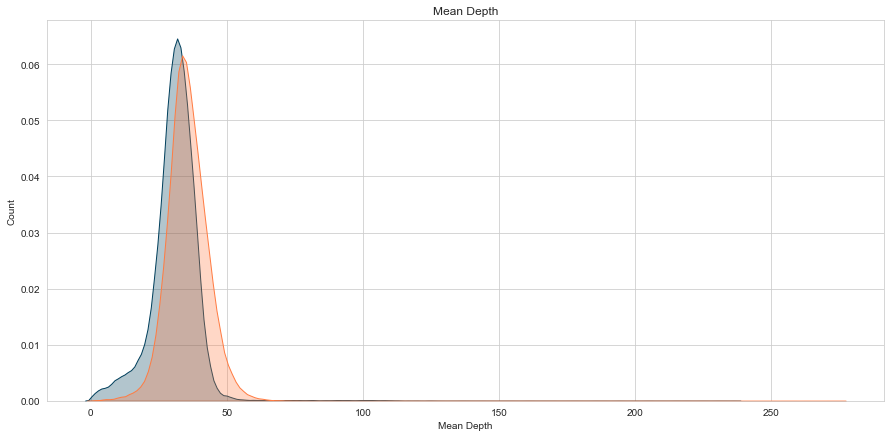

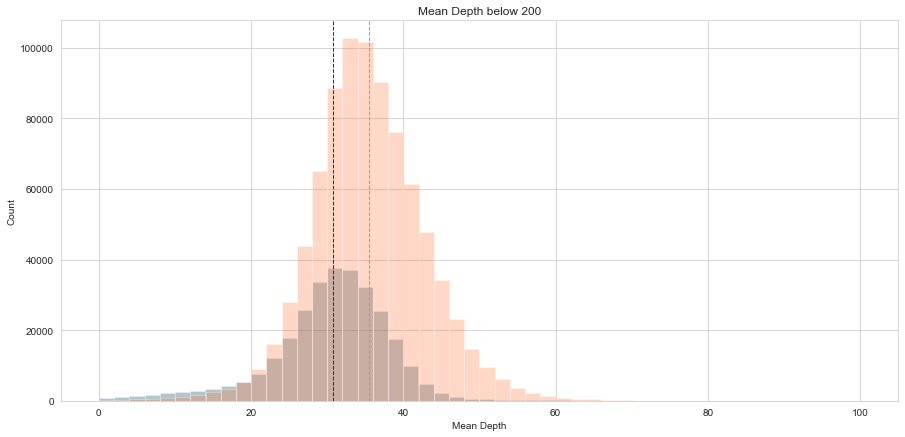

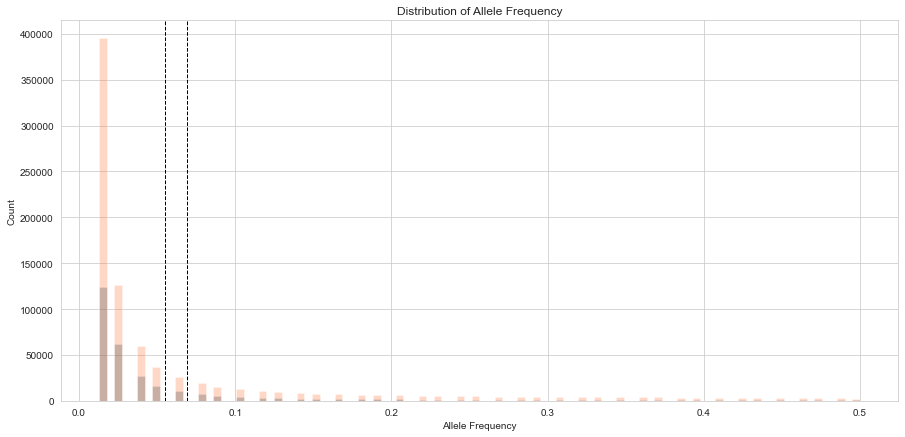

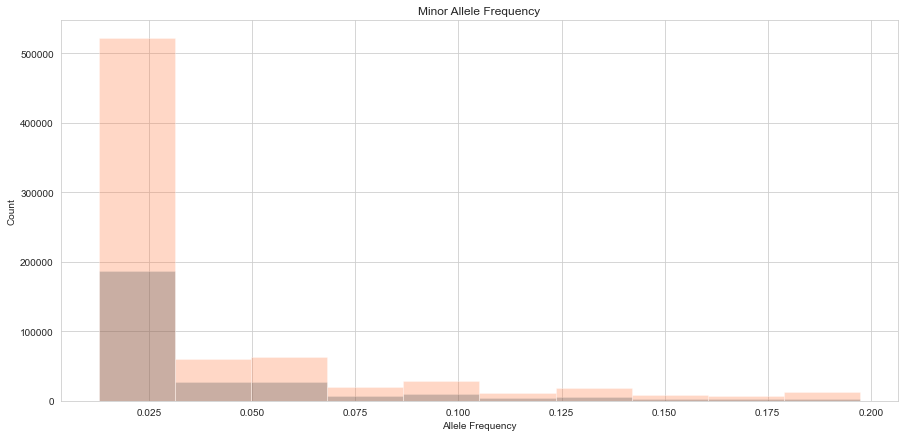

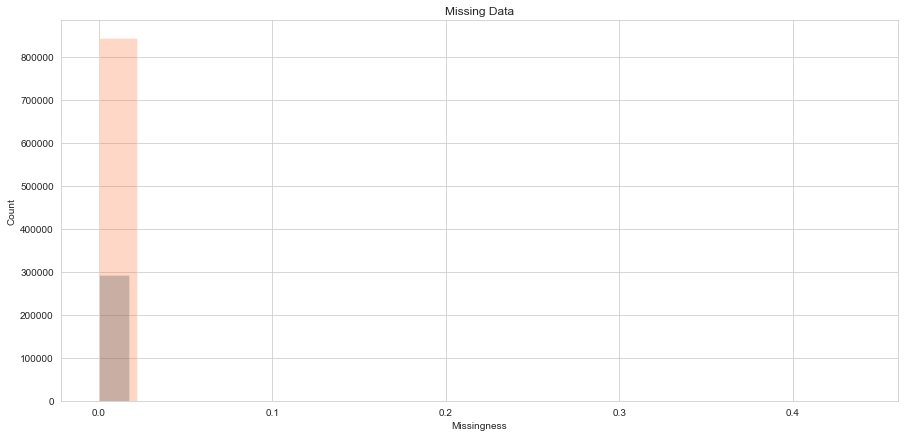

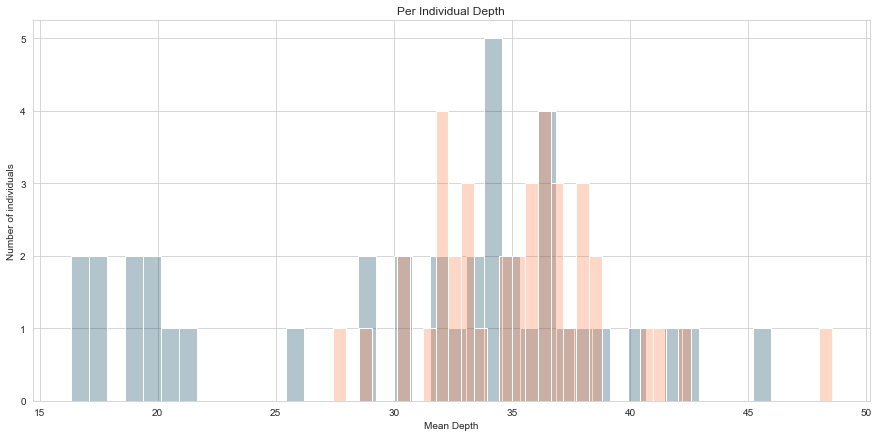

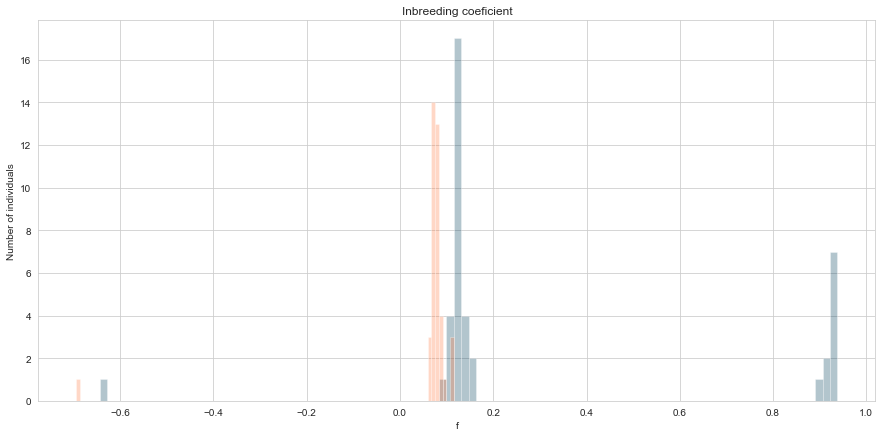

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

#file_paths = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual",
#"/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual"]

#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.","/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant."]

from_chr=24
till_chr=25
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
 
#List of colors to be used for each plot
color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

# List of labels for each plot
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Full Distribution of Quality Scores")
    sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3,label=label_list[i])

plt.legend()
plt.show()

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Quality Scores below 200")
    qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_qual = np.mean(var_qual["qual"])
    
plt.show()

for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50)
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.title("Quality Scores Along the Chromosome")
plt.show()    
    
for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth")
plt.show() 

for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_depth = np.mean(var_depth["mean_depth"])
    #print(mean_depth)
    #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth below 200")
plt.show() 


for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Distribution of Allele Frequency")
    plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
    mean_freq = np.mean(var_freq["maf"])
    #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Minor Allele Frequency")
    var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
    plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
    plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
    plt.xlabel("Missingness")
    plt.ylabel("Count")
    plt.title("Missing Data")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
    sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Number of individuals")
    plt.title("Per Individual Depth")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])
    plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
    plt.xlabel("f")
    plt.ylabel("Number of individuals")
    plt.title("Inbreeding coeficient")
plt.show()

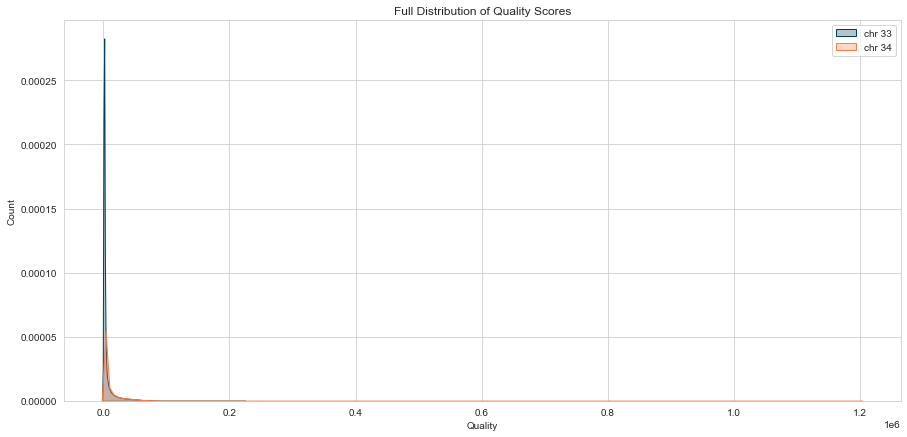

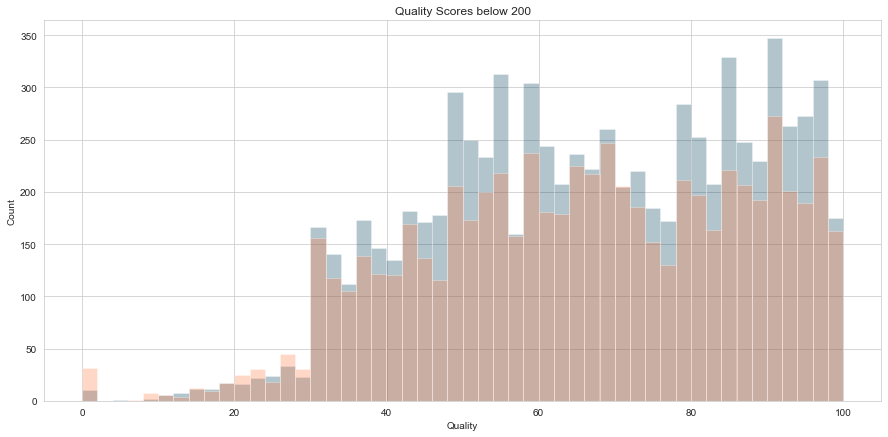

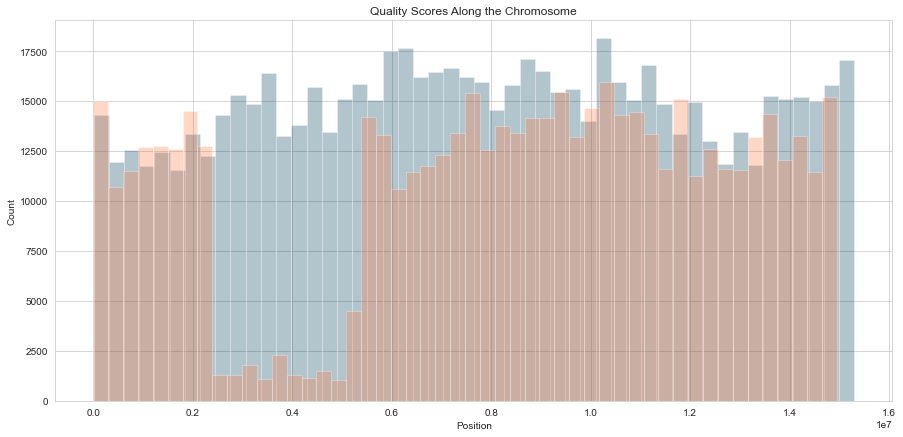

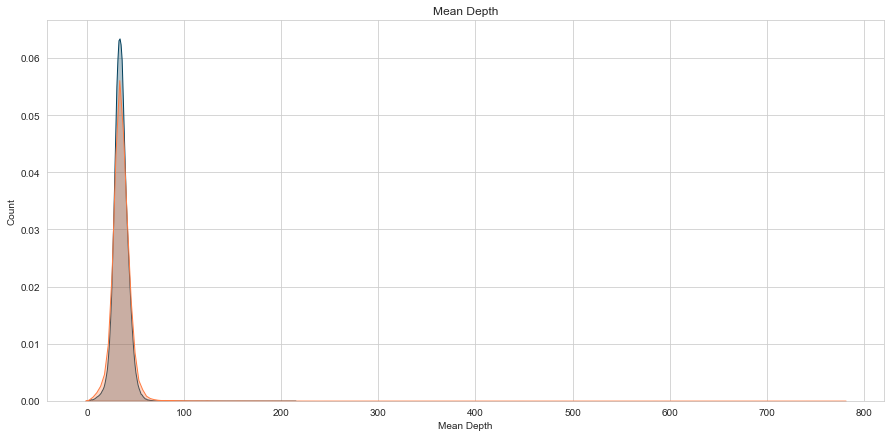

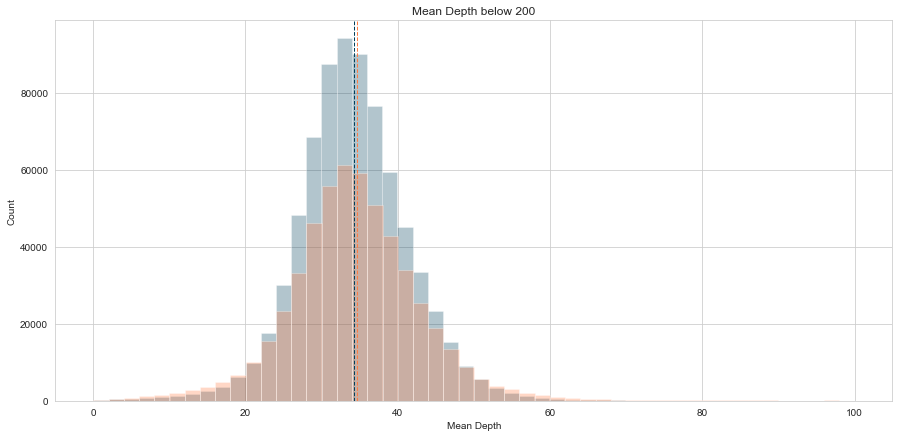

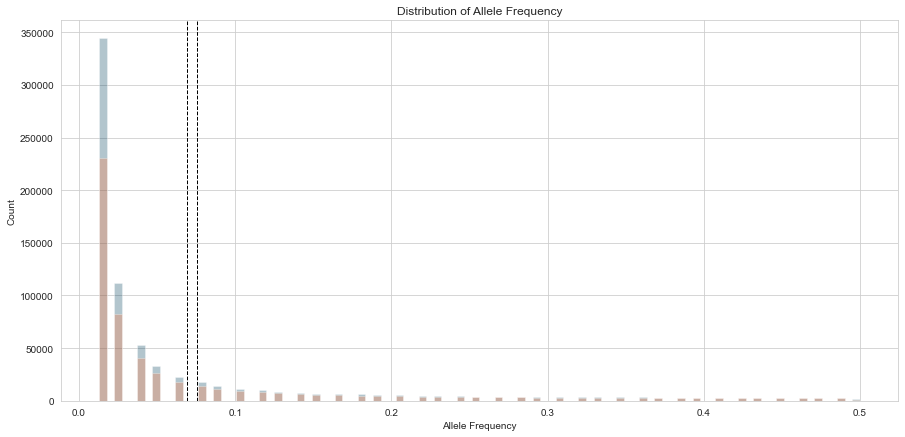

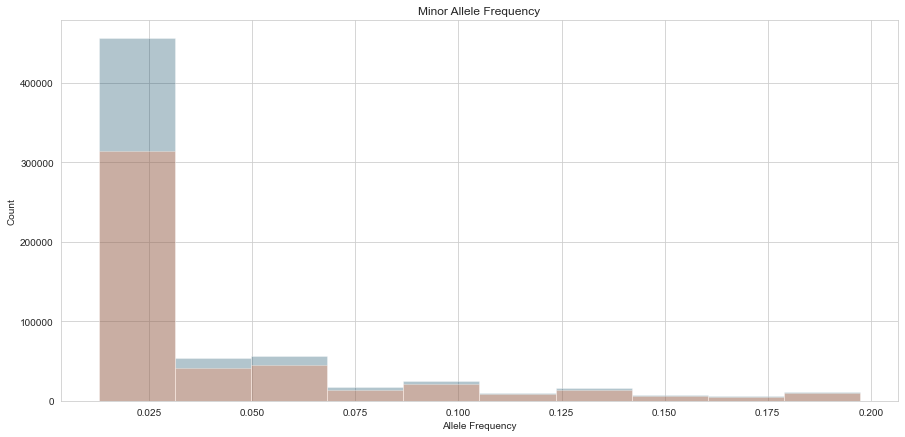

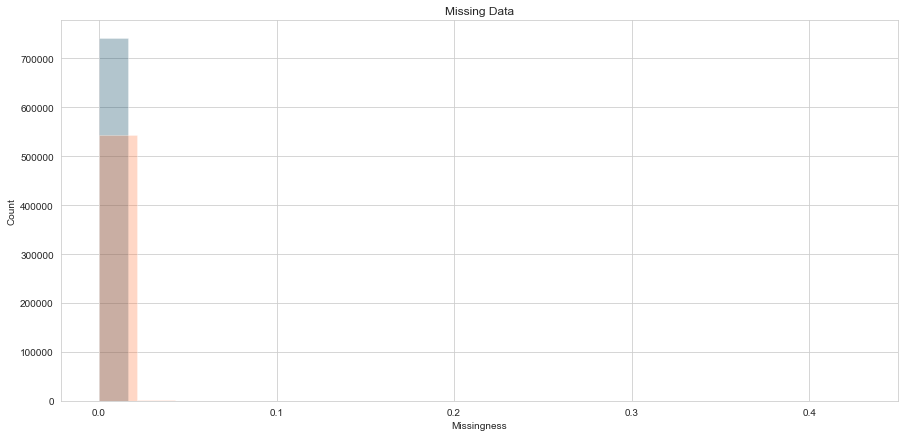

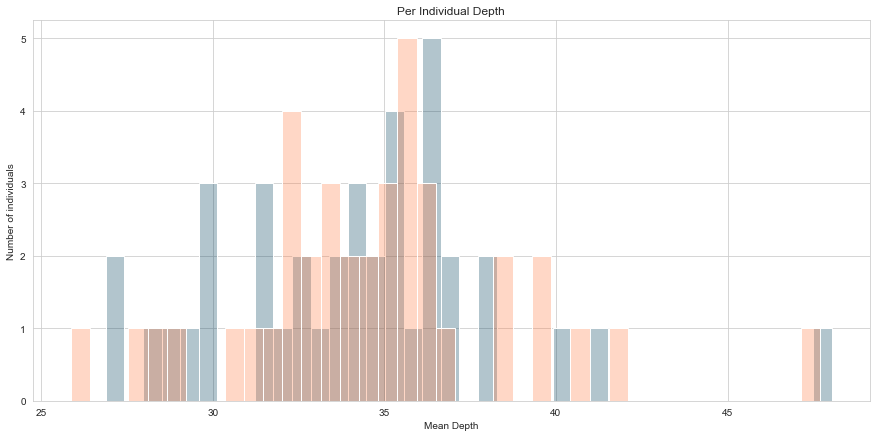

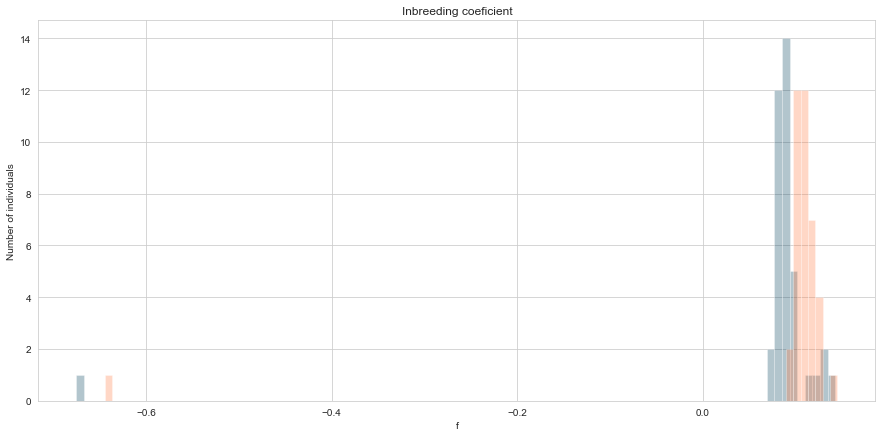

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [15, 7]

#file_paths = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual",
#"/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual"]

#file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.","/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant."]

from_chr=33
till_chr=34
file_paths_gen = ["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999{}_variant.".format(i) for i in range(from_chr, till_chr+1)]
 
#List of colors to be used for each plot
color_list = ["#003f5c", "#ff7c43", "#ffa600", "#ff5733", "#c70039","#900c3f", "#581845", "#006d77", "#2a9d8f", "#4d908e","#4b7447", "#bfb071", "#f7e080", "#f7a800", "#ffbb54","#ff6e54", "#ff8e71", "#ff7034", "#ff5733", "#ff6b81","#c83349", "#4a4e4d", "#808080", "#c0c0c0", "#ffffff","#000000"]

# List of labels for each plot
label_list = ["chr {}".format(i) for i in range(from_chr, till_chr+1)]

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Full Distribution of Quality Scores")
    sns.kdeplot(data=var_qual, x="qual", fill=True, color=color_list[i], alpha=0.3,label=label_list[i])

plt.legend()
plt.show()

#Loop through each file and plot data
for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.title("Quality Scores below 200")
    qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(qual_lt_400["qual"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_qual = np.mean(var_qual["qual"])
    
plt.show()

for i, file_path_gen in enumerate(file_paths_gen): 
    var_qual = pd.read_csv(file_path_gen+"lqual", sep="\t", skiprows=1,
    names=["chr", "pos", "qual"])
    var_qual = var_qual[var_qual["qual"] != -1]
    var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")
    
    plt.hist(var_qual['pos'], fill=True, color=color_list[i], alpha=0.3, bins=50)
    plt.xlabel("Position")
    plt.ylabel("Count")
    plt.title("Quality Scores Along the Chromosome")
plt.show()    
    
for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    sns.kdeplot(data=var_depth, x="mean_depth", fill=True, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth")
plt.show() 

for i, file_path_gen in enumerate(file_paths_gen): 
    var_depth = pd.read_csv(file_path_gen+"ldepth.mean", sep="\t", skiprows=1,names=["chr", "pos", "mean_depth", "var_depth"])
    var_depth_400 = var_depth[var_depth["mean_depth"] < 100] # create a new dataset with only "qual" values < 400
    plt.hist(var_depth_400["mean_depth"], fill=True, color=color_list[i], alpha=0.3, bins=50)
    mean_depth = np.mean(var_depth["mean_depth"])
    #print(mean_depth)
    #plt.text(mean_depth, 200, f"Mean value: {mean_depth:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_depth, color=color_list[i], linestyle="dashed", linewidth=1)
    plt.xlabel("Mean Depth")
    plt.ylabel("Count")
    plt.title("Mean Depth below 200")
plt.show() 


for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Distribution of Allele Frequency")
    plt.hist(var_freq["maf"], fill=True, color=color_list[i], alpha=0.3, bins=100)
    mean_freq = np.mean(var_freq["maf"])
    #plt.text(mean_freq, 200, f"Mean value: {mean_freq:.2f}", ha="center", va="center", color="black")
    plt.axvline(mean_freq, color="black", linestyle="dashed", linewidth=1)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_freq = pd.read_csv(file_path_gen+"frq", sep="\t", skiprows=1, names=["chr", "pos", "nalleles", "nchr", "a1", "a2"])
    var_freq["maf"] = var_freq[["a1", "a2"]].apply(min, axis=1)
    plt.xlabel("Allele Frequency")
    plt.ylabel("Count")
    plt.title("Minor Allele Frequency")
    var_freq_sm = var_freq[var_freq["maf"] < 0.2] # create a new dataset with only "qual" values < 400
    plt.hist(var_freq_sm["maf"], fill=True, color=color_list[i], alpha=0.3)
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    var_miss = pd.read_csv(file_path_gen+"lmiss", sep="\t", skiprows=1, names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])
    plt.hist(var_miss["fmiss"], fill=True, color=color_list[i], alpha=0.3,bins=20)
    plt.xlabel("Missingness")
    plt.ylabel("Count")
    plt.title("Missing Data")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_depth = pd.read_csv(file_path_gen+"idepth", sep="\t", skiprows=1, names=["ind", "nsites", "depth"])
    sns.histplot(data=ind_depth, x="depth", bins=39, color=color_list[i], alpha=0.3)
    plt.xlabel("Mean Depth")
    plt.ylabel("Number of individuals")
    plt.title("Per Individual Depth")
plt.show()

for i, file_path_gen in enumerate(file_paths_gen):
    ind_het = pd.read_csv(file_path_gen+"het", sep="\t", skiprows=1,
                       names=["ind", "ho", "he", "nsites", "f"])
    plt.hist(ind_het["f"], bins=100, color=color_list[i], alpha=0.3)
    plt.xlabel("f")
    plt.ylabel("Number of individuals")
    plt.title("Inbreeding coeficient")
plt.show()

In [ ]:
["/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR99995{}_variant.".format(i) for i in range(24, 56)]


['/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999524_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999525_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999526_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999527_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999528_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999529_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999530_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999531_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999532_variant.',
 '/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/vcf_QC/LR9999533_variant.',
 '/Users/dshipilina/GitHub/Van

### Polished

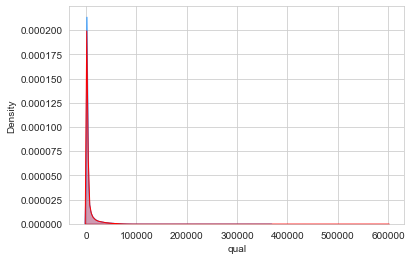

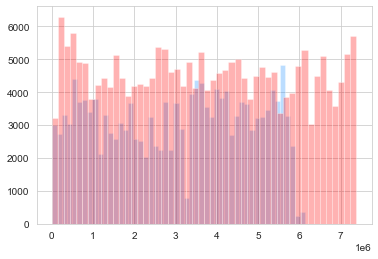

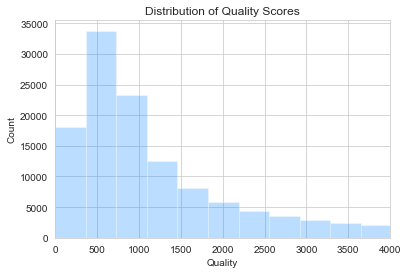

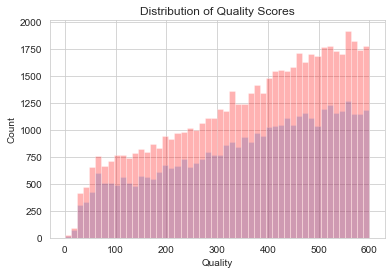

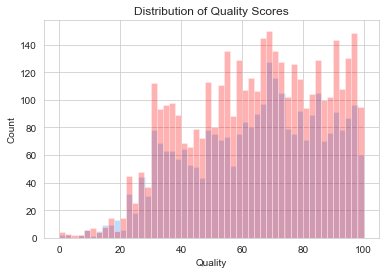

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files
var_qual = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955_variant.lqual", sep="\t", skiprows=1,
                        names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

var_qual4 = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999954_variant.lqual", sep="\t", skiprows=1,
                        names=["chr", "pos", "qual"])
var_qual4 = var_qual4[var_qual4["qual"] != -1]
var_qual4 = var_qual4.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

# Plotting the data using seaborn and matplotlib
sns.set_style("whitegrid")

sns.kdeplot(data=var_qual, x="qual", fill=True, color="dodgerblue", alpha=0.3)
sns.kdeplot(data=var_qual4, x="qual", fill=True, color="red", alpha=0.3)
plt.show()

plt.hist(var_qual['pos'], fill=True, color="dodgerblue", alpha=0.3, bins=50)
plt.hist(var_qual4['pos'], fill=True, color="red", alpha=0.3, bins=50)
plt.show()

plt.hist(var_qual['qual'], fill=True, color="dodgerblue", alpha=0.3, bins=1000)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
plt.xlim(0, 4000) # set x-axis limit to 0-300
plt.show()

qual_lt_400 = var_qual[var_qual["qual"] < 600] # create a new dataset with only "qual" values < 400
plt.hist(qual_lt_400["qual"], fill=True, color="dodgerblue", alpha=0.3, bins=50)
qual_lt_4004 = var_qual4[var_qual4["qual"] < 600] # create a new dataset with only "qual" values < 400
plt.hist(qual_lt_4004["qual"], fill=True, color="red", alpha=0.3, bins=50)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
#plt.xlim(0, 50) # set x-axis limit to 0-300
plt.show()

qual_lt_400 = var_qual[var_qual["qual"] < 100] # create a new dataset with only "qual" values < 400
plt.hist(qual_lt_400["qual"], fill=True, color="dodgerblue", alpha=0.3, bins=50)
qual_lt_4004 = var_qual4[var_qual4["qual"] < 100] # create a new dataset with only "qual" values < 400
plt.hist(qual_lt_4004["qual"], fill=True, color="red", alpha=0.3, bins=50)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
#plt.xlim(0, 50) # set x-axis limit to 0-300ls

plt.show()

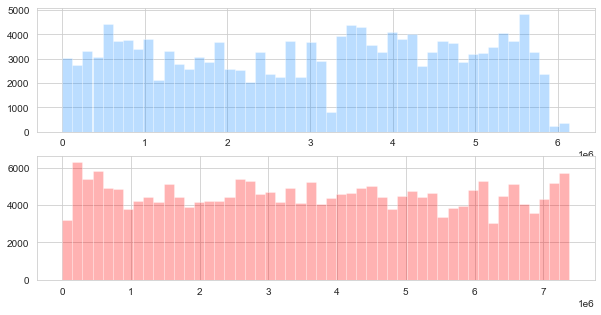

In [ ]:
import matplotlib.pyplot as plt

# Create a figure object and a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))


# Plot the first histogram in the first subplot
axs[0].hist(var_qual['pos'], fill=True, color="dodgerblue", alpha=0.3, bins=50)
#axs[0].set_title('Histogram 1')

# Plot the second histogram in the second subplot
axs[1].hist(var_qual4['pos'], fill=True, color="red", alpha=0.3, bins=50)
#axs[1].set_title('Histogram 2')

# Display the plot
plt.show()


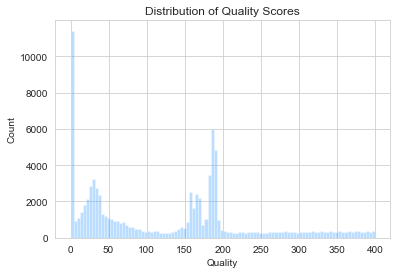

In [ ]:
qual_lt_400 = var_qual[(var_qual["qual"] < 400) & (var_qual["qual"] > 0)] # create a new dataset with only "qual" values < 400
plt.hist(qual_lt_400["qual"], fill=True, color="dodgerblue", alpha=0.3, bins=100)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
#plt.xlim(0, 50) # set x-axis limit to 0-300
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading in the data from the files
var_qual = pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.lqual.tsv", sep="\t", skiprows=1,
                        names=["chr", "pos", "qual"])
var_qual = var_qual[var_qual["qual"] != -1]
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

var_miss= pd.read_csv("/Users/dshipilina/GitHub/VanessaShortLongMigration/SNPcallingSAREK/LR999955.lmiss", sep="\t", skiprows=1,
                        names=["chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"])

#var_qual = var_qual[var_qual["qual"] != -1]
#var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")



In [ ]:
var_miss

chr      pos  nchr  nfiltered  nmiss  fmiss
0        LR999955.1        1    78          0      0    0.0
1        LR999955.1        2    78          0      0    0.0
2        LR999955.1        3    78          0      0    0.0
3        LR999955.1        4    78          0      0    0.0
4        LR999955.1        5    78          0      0    0.0
...             ...      ...   ...        ...    ...    ...
1782178  LR999955.1  6165012    78          0      0    0.0
1782179  LR999955.1  6165013    78          0      0    0.0
1782180  LR999955.1  6165014    78          0      0    0.0
1782181  LR999955.1  6165015    78          0      0    0.0
1782182  LR999955.1  6165348    78          0      0    0.0

[1782183 rows x 6 columns]

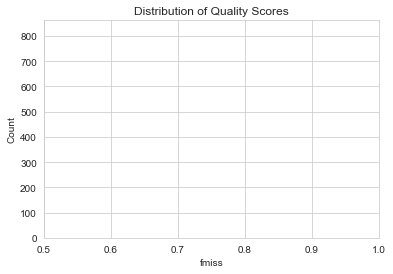

In [ ]:
var_miss_400 = var_miss[(var_miss["fmiss"] > 0)& (var_miss["fmiss"] < 1)]
#var_miss_400 = var_miss[var_miss["fmiss"] > 0]# create a new dataset with only "qual" values < 400
plt.hist(var_miss_400["fmiss"], fill=True, color="dodgerblue", alpha=0.3, bins=50)
plt.xlabel("fmiss")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
plt.xlim(0.5, 1) # set x-axis limit to 0-300
plt.show()

In [ ]:
var_qual[var_qual["qual"] < 400]

chr      pos    qual
16       LR999955.1       17    0.29
19       LR999955.1       20   26.81
27       LR999955.1       32    0.00
28       LR999955.1       34    0.00
31       LR999955.1       41    0.16
...             ...      ...     ...
1782024  LR999955.1  6164029   25.92
1782036  LR999955.1  6164041   18.29
1782042  LR999955.1  6164047   23.63
1782043  LR999955.1  6164048   20.19
1782052  LR999955.1  6164057  227.92

[314497 rows x 3 columns]

ValueError: supplied range of [0.0, inf] is not finite

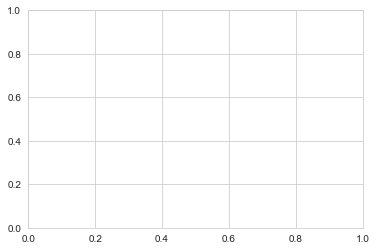

In [ ]:
plt.hist(var_qual["qual"], bins=50)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores")
plt.show()

In [ ]:
stats.var_qual["qual"]

NameError: name 'stats' is not defined

In [ ]:
import numpy as np

mean = np.mean(var_qual["qual"])
median = np.median(var_qual["qual"])
std = np.std(var_qual["qual"])
minimum = np.min(var_qual["qual"])
maximum = np.max(var_qual["qual"])

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)
print("Minimum Value:", minimum)
print("Maximum Value:", maximum)

Mean: 2055.498378956994
Median: 0.01
Standard Deviation: 7817.679117606023
Minimum Value: 0.0
Maximum Value: 364896.0


In [ ]:
var_qual = var_qual.replace([np.inf, -np.inf], np.nan).dropna(subset=["qual"], how="any")

In [ ]:
mean = np.mean(var_miss_400["fmiss"])
median = np.median(var_miss_400["fmiss"])
std = np.std(var_miss_400["fmiss"])
minimum = np.min(var_miss_400["fmiss"])
maximum = np.max(var_miss_400["fmiss"])

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)
print("Minimum Value:", minimum)
print("Maximum Value:", maximum)

Mean: 0.9944806061576752
Median: 1.0
Standard Deviation: 0.07325205491497021
Minimum Value: 0.012987
Maximum Value: 1.0


# ROH

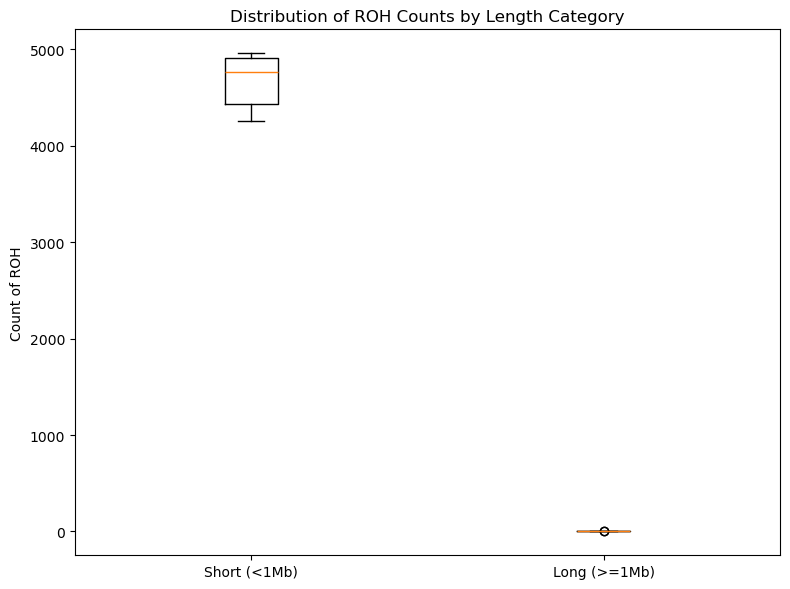

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the input file
file_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"  # Replace with your actual file name
roh_data = pd.read_csv(file_path, sep="\t", header=None, comment='#',
                       names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Calculate ROH length categories
roh_data['Length_Category'] = roh_data['Length'].apply(lambda x: 'Short (<1Mb)' if x < 1_000_000 else 'Long (>=1Mb)')

# Count ROH by length category for each sample
roh_counts = roh_data.groupby(['Sample', 'Length_Category']).size().unstack(fill_value=0)

# Prepare data for box plot
short_roh_counts = roh_counts['Short (<1Mb)']
long_roh_counts = roh_counts['Long (>=1Mb)']

# Plot box plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([short_roh_counts, long_roh_counts], labels=['Short (<1Mb)', 'Long (>=1Mb)'])

# Add labels and title
ax.set_ylabel('Count of ROH')
ax.set_title('Distribution of ROH Counts by Length Category')

# Show the plot
plt.tight_layout()
plt.show()


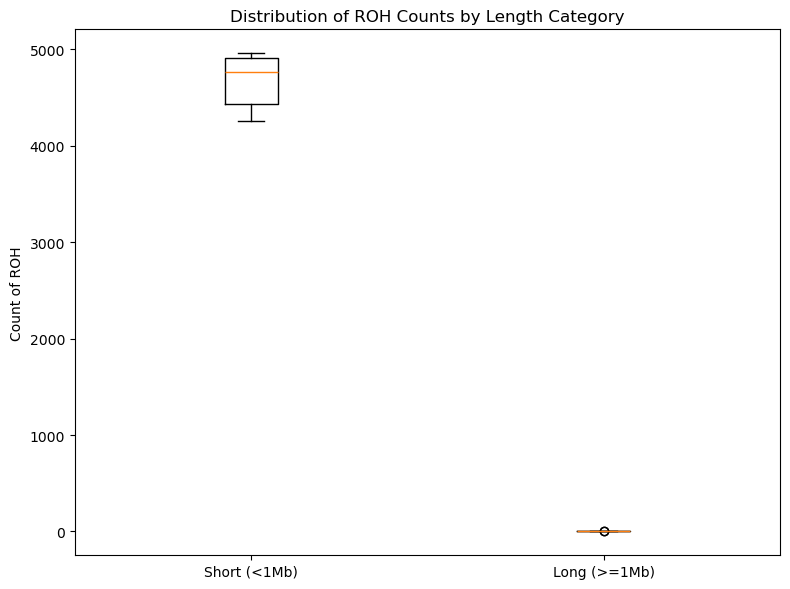

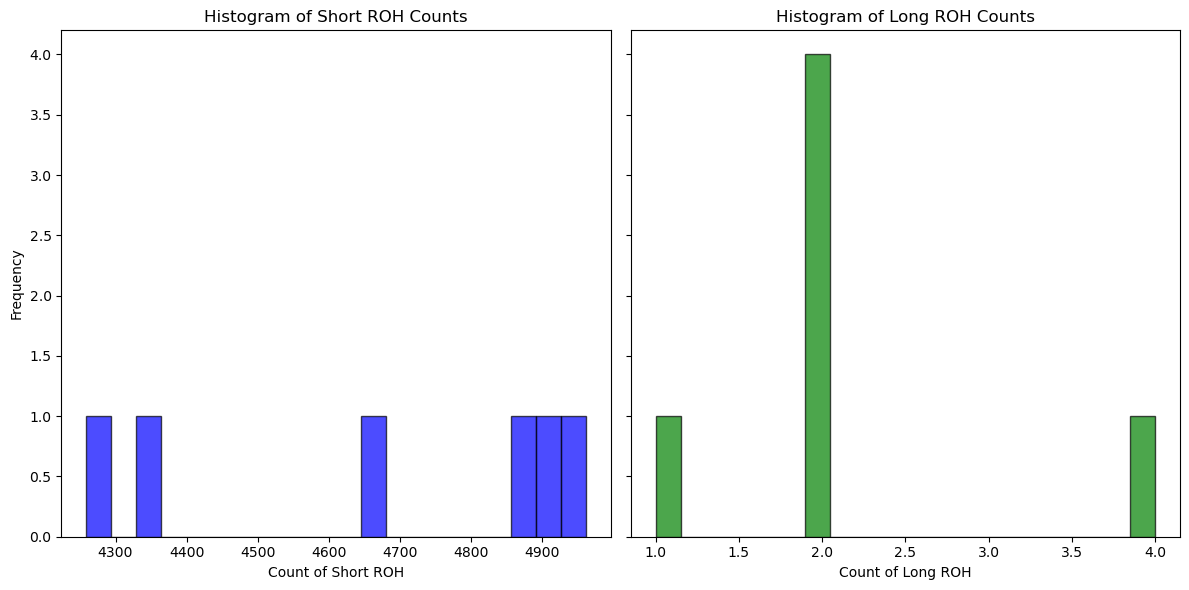

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the input file
file_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"  # Replace with your actual file name
roh_data = pd.read_csv(file_path, sep="\t", header=None, comment='#',
                       names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Calculate ROH length categories
roh_data['Length_Category'] = roh_data['Length'].apply(lambda x: 'Short (<1Mb)' if x < 1_000_000 else 'Long (>=1Mb)')

# Count ROH by length category for each sample
roh_counts = roh_data.groupby(['Sample', 'Length_Category']).size().unstack(fill_value=0)

# Prepare data for box plot
short_roh_counts = roh_counts['Short (<1Mb)']
long_roh_counts = roh_counts['Long (>=1Mb)']

# Plot box plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([short_roh_counts, long_roh_counts], labels=['Short (<1Mb)', 'Long (>=1Mb)'])

# Add labels and title
ax.set_ylabel('Count of ROH')
ax.set_title('Distribution of ROH Counts by Length Category')

# Show the plot
plt.tight_layout()
plt.show()

# Plot histograms for short and long ROH categories
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Short ROH histogram
axes[0].hist(short_roh_counts, bins=20, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Histogram of Short ROH Counts')
axes[0].set_xlabel('Count of Short ROH')
axes[0].set_ylabel('Frequency')

# Long ROH histogram
axes[1].hist(long_roh_counts, bins=20, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Histogram of Long ROH Counts')
axes[1].set_xlabel('Count of Long ROH')

# Adjust layout and show
plt.tight_layout()
plt.show()

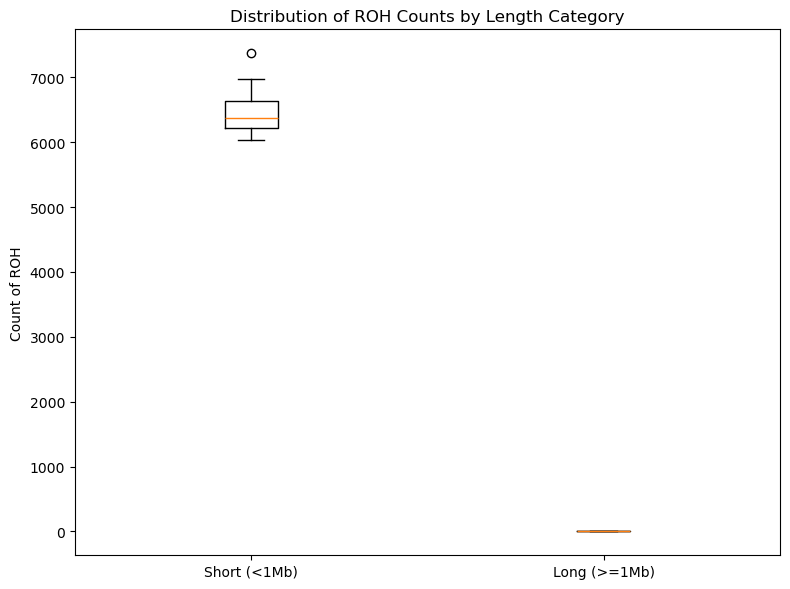

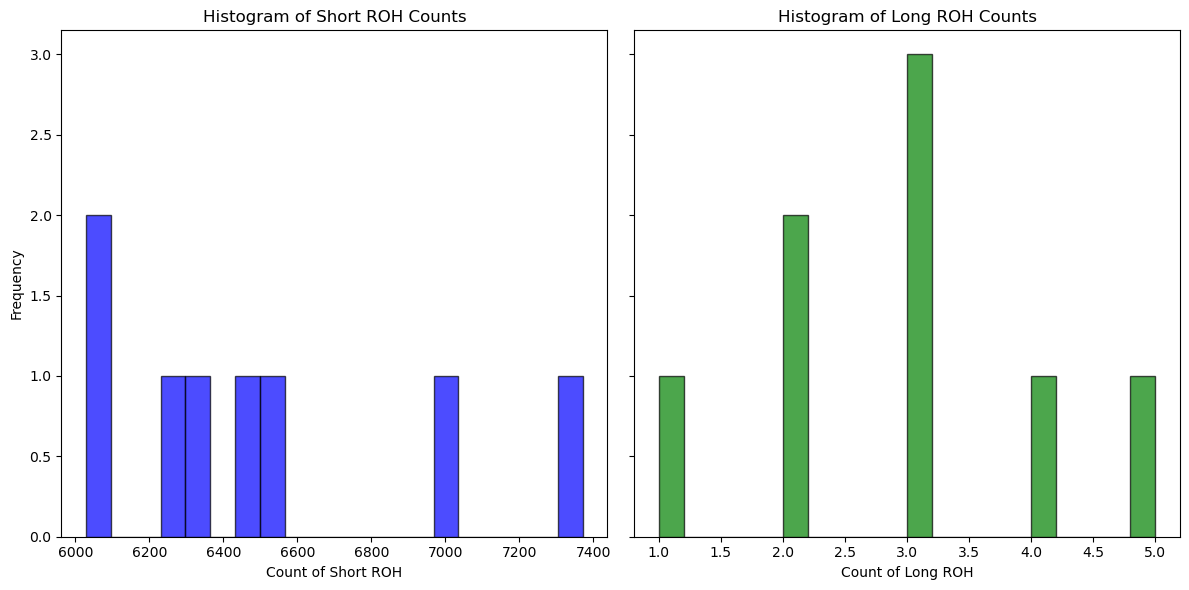

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the input file
file_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"  # Replace with your actual file name
roh_data = pd.read_csv(file_path, sep="\t", header=None, comment='#',
                       names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Calculate ROH length categories
roh_data['Length_Category'] = roh_data['Length'].apply(lambda x: 'Short (<1Mb)' if x < 1_000_000 else 'Long (>=1Mb)')

# Count ROH by length category for each sample
roh_counts = roh_data.groupby(['Sample', 'Length_Category']).size().unstack(fill_value=0)

# Prepare data for box plot
short_roh_counts = roh_counts['Short (<1Mb)']
long_roh_counts = roh_counts['Long (>=1Mb)']

# Plot box plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot([short_roh_counts, long_roh_counts], labels=['Short (<1Mb)', 'Long (>=1Mb)'])

# Add labels and title
ax.set_ylabel('Count of ROH')
ax.set_title('Distribution of ROH Counts by Length Category')

# Show the plot
plt.tight_layout()
plt.show()

# Plot histograms for short and long ROH categories
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Short ROH histogram
axes[0].hist(short_roh_counts, bins=20, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Histogram of Short ROH Counts')
axes[0].set_xlabel('Count of Short ROH')
axes[0].set_ylabel('Frequency')

# Long ROH histogram
axes[1].hist(long_roh_counts, bins=20, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Histogram of Long ROH Counts')
axes[1].set_xlabel('Count of Long ROH')

# Adjust layout and show
plt.tight_layout()
plt.show()

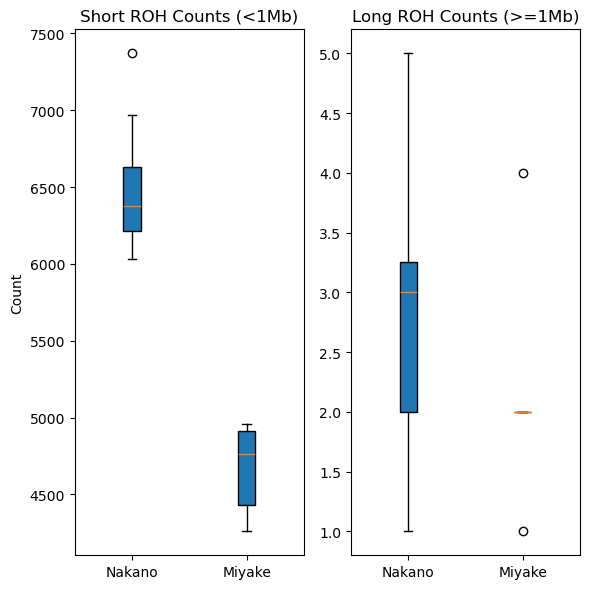

Combined data saved to /Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_combined_data.tsv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Calculate ROH length categories
combined_data['Length_Category'] = combined_data['Length'].apply(lambda x: 'Short (<1Mb)' if x < 1_000_000 else 'Long (>=1Mb)')

# Count ROH by population and length category
roh_counts = combined_data.groupby(['Population', 'Sample', 'Length_Category']).size().unstack(fill_value=0).reset_index()

# Prepare data for visualization
short_roh_counts = roh_counts.groupby('Population')['Short (<1Mb)']
long_roh_counts = roh_counts.groupby('Population')['Long (>=1Mb)']

# Plot box plots for short and long ROH counts by population
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

# Short ROH box plot
axes[0].boxplot([short_roh_counts.get_group('Nakano'), short_roh_counts.get_group('Miyake')],
                labels=['Nakano', 'Miyake'], patch_artist=True)
axes[0].set_title('Short ROH Counts (<1Mb)')
axes[0].set_ylabel('Count')

# Long ROH box plot
axes[1].boxplot([long_roh_counts.get_group('Nakano'), long_roh_counts.get_group('Miyake')],
                labels=['Nakano', 'Miyake'], patch_artist=True)
axes[1].set_title('Long ROH Counts (>=1Mb)')

# Adjust layout and show
plt.tight_layout()
plt.show()

# Save the combined dataset
output_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_combined_data.tsv"
combined_data.to_csv(output_path, sep="\t", index=False)

print(f"Combined data saved to {output_path}")


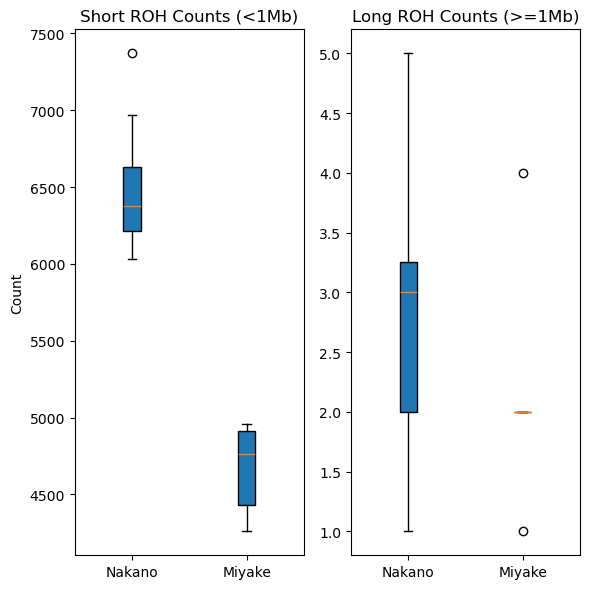

Combined data saved to /Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_combined_data.tsv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Calculate ROH length categories
combined_data['Length_Category'] = combined_data['Length'].apply(lambda x: 'Short (<1Mb)' if x < 1_000_000 else 'Long (>=1Mb)')

# Count ROH by population and length category
roh_counts = combined_data.groupby(['Population', 'Sample', 'Length_Category']).size().unstack(fill_value=0).reset_index()

# Prepare data for visualization
short_roh_counts = roh_counts.groupby('Population')['Short (<1Mb)']
long_roh_counts = roh_counts.groupby('Population')['Long (>=1Mb)']

# Plot box plots for short and long ROH counts by population
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

# Short ROH box plot
axes[0].boxplot([short_roh_counts.get_group('Nakano'), short_roh_counts.get_group('Miyake')],
                labels=['Nakano', 'Miyake'], patch_artist=True)
axes[0].set_title('Short ROH Counts (<1Mb)')
axes[0].set_ylabel('Count')

# Long ROH box plot
axes[1].boxplot([long_roh_counts.get_group('Nakano'), long_roh_counts.get_group('Miyake')],
                labels=['Nakano', 'Miyake'], patch_artist=True)
axes[1].set_title('Long ROH Counts (>=1Mb)')

# Adjust layout and show
plt.tight_layout()
plt.show()

# Save the combined dataset
output_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_combined_data.tsv"
combined_data.to_csv(output_path, sep="\t", index=False)

print(f"Combined data saved to {output_path}")


In [ ]:
nakano_data
total_nakano_ROH_len = nakano_data['Length'].sum()
print(total_nakano_ROH_len)

miyake_data
total_miyake_ROH_len = miyake_data['Length'].sum()
print(total_miyake_ROH_len)


total_miyake_FROH=(total_miyake_ROH_len/1_159_332_207)
print(total_miyake_FROH)

total_nakano_FROH=(total_nakano_ROH_len/1_159_332_207)
print(total_nakano_FROH)

2095739887
825394876
0.7119571689773646
1.807712987136913


In [ ]:
nakano_data

RG           Sample      Chromosome    Start      End  Length  Markers  \
0      RG  PijimaeNa-U5147  VHQE01000408.1     1633    19719   18087       64   
1      RG  PijimaeNa-U5147  VHQE01000408.1    28982    31738    2757       92   
2      RG  PijimaeNa-U5147  VHQE01000408.1    46901    61894   14994      353   
3      RG  PijimaeNa-U5147  VHQE01000408.1    63636    94764   31129      470   
4      RG  PijimaeNa-U5147  VHQE01000408.1   175709   217935   42227      285   
...    ..              ...             ...      ...      ...     ...      ...   
51998  RG  PijimaeNa-U5154  VHQE01000492.1   875729   879265    3537      145   
51999  RG  PijimaeNa-U5154  VHQE01000492.1   895577   926559   30983       89   
52000  RG  PijimaeNa-U5154  VHQE01000492.1   934240   990566   56327      310   
52001  RG  PijimaeNa-U5154  VHQE01000492.1  1000637  1049175   48539      146   
52002  RG  PijimaeNa-U5154  VHQE01000492.1  1194200  1215118   20919      128   

       Quality Population  
0         57.5     Nakano  
1         44.3     Nakano  
2         79.7     Nakano  
3         81.7     Nakano  
4         41.9     Nakano  
...        ...        ...  
51998     55.2     Nakano  
51999     56.1     Nakano  
52000     56.1     Nakano  
52001     43.7     Nakano  
52002     38.4     Nakano  

[52003 rows x 9 columns]

In [ ]:
# Group by the "Sample" column and calculate the sum of the "Length" column for each individual
nakano_data_length_per_individual = nakano_data.groupby("Sample")["Length"].sum().reset_index()

# Rename the columns for clarity
nakano_data_length_per_individual.columns = ["Sample", "Total Length"]

# Calculate Froh (Total Length of ROH / Genome Length)
genome_length = 1_159_332_207
nakano_data_length_per_individual["Froh"] = nakano_data_length_per_individual["Total Length"] / genome_length

nakano_data_length_per_individual["Froh %"] = (nakano_data_length_per_individual["Total Length"] / genome_length)*100

# Display the result
print(nakano_data_length_per_individual)

# Group by the "Sample" column and calculate the sum of the "Length" column for each individual
miyake_data_length_per_individual = miyake_data.groupby("Sample")["Length"].sum().reset_index()

# Rename the columns for clarity
miyake_data_length_per_individual.columns = ["Sample", "Total Length"]

# Calculate Froh (Total Length of ROH / Genome Length)
genome_length = 1_159_332_207
miyake_data_length_per_individual["Froh"] = miyake_data_length_per_individual["Total Length"] / genome_length

# Calculate Froh as a percentage
miyake_data_length_per_individual["Froh %"] = (miyake_data_length_per_individual["Total Length"] / genome_length) * 100

# Display the result
print(miyake_data_length_per_individual)


            Sample  Total Length      Froh     Froh %
0  PijimaeNa-U5147     243787458  0.210283  21.028266
1  PijimaeNa-U5148     276144541  0.238193  23.819276
2  PijimaeNa-U5149     285393969  0.246171  24.617100
3  PijimaeNa-U5150     266661009  0.230013  23.001259
4  PijimaeNa-U5151     261218343  0.225318  22.531794
5  PijimaeNa-U5152     286802722  0.247386  24.738614
6  PijimaeNa-U5153     238290059  0.205541  20.554079
7  PijimaeNa-U5154     237441786  0.204809  20.480910
            Sample  Total Length      Froh     Froh %
0  PijimaeMi-U5645     140714227  0.121375  12.137524
1  PijimaeMi-U5649     161593707  0.139385  13.938516
2  PijimaeMi-U5708     111715746  0.096362   9.636215
3  PijimaeMi-U5709     174878511  0.150844  15.084418
4  PijimaeMi-U5710     102195072  0.088150   8.814995
5  PijimaeMi-U5711     134297613  0.115840  11.584049


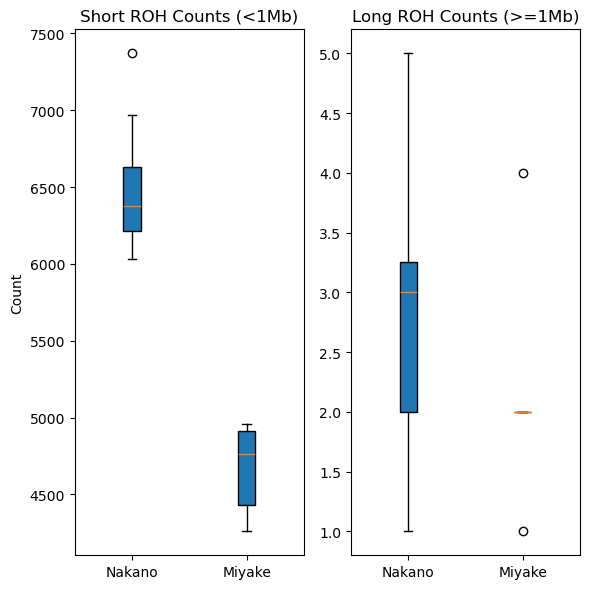

Combined data saved to /Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_combined_data.tsv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Calculate ROH length categories
combined_data['Length_Category'] = combined_data['Length'].apply(lambda x: 'Short (<1Mb)' if x < 1_000_000 else 'Long (>=1Mb)')

# Count ROH by population and length category
roh_counts = combined_data.groupby(['Population', 'Sample', 'Length_Category']).size().unstack(fill_value=0).reset_index()

# Prepare data for visualization
short_roh_counts = roh_counts.groupby('Population')['Short (<1Mb)']
long_roh_counts = roh_counts.groupby('Population')['Long (>=1Mb)']

# Plot box plots for short and long ROH counts by population
fig, axes = plt.subplots(1, 2, figsize=(6, 6))

# Short ROH box plot
axes[0].boxplot([short_roh_counts.get_group('Nakano'), short_roh_counts.get_group('Miyake')],
                labels=['Nakano', 'Miyake'], patch_artist=True)
axes[0].set_title('Short ROH Counts (<1Mb)')
axes[0].set_ylabel('Count')

# Long ROH box plot
axes[1].boxplot([long_roh_counts.get_group('Nakano'), long_roh_counts.get_group('Miyake')],
                labels=['Nakano', 'Miyake'], patch_artist=True)
axes[1].set_title('Long ROH Counts (>=1Mb)')

# Adjust layout and show
plt.tight_layout()
plt.show()

# Save the combined dataset
output_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_combined_data.tsv"
combined_data.to_csv(output_path, sep="\t", index=False)

print(f"Combined data saved to {output_path}")


In [ ]:
# Group by the "Sample" column and calculate the sum of the "Length" column for each individual
miyake_data_length_per_individual = miyake_data.groupby("Sample")["Length"].sum().reset_index()

# Rename the columns for clarity
miyake_data_length_per_individual.columns = ["Sample", "Total Length"]

# Calculate Froh (Total Length of ROH / Genome Length)
genome_length = 1_159_332_207
miyake_data_length_per_individual["Froh"] = miyake_data_length_per_individual["Total Length"] / genome_length

# Calculate Froh as a percentage
miyake_data_length_per_individual["Froh %"] = (miyake_data_length_per_individual["Total Length"] / genome_length) * 100

RG           Sample      Chromosome    Start      End  Length  Markers  \
0      RG  PijimaeNa-U5147  VHQE01000408.1     1633    19719   18087       64   
1      RG  PijimaeNa-U5147  VHQE01000408.1    28982    31738    2757       92   
2      RG  PijimaeNa-U5147  VHQE01000408.1    46901    61894   14994      353   
3      RG  PijimaeNa-U5147  VHQE01000408.1    63636    94764   31129      470   
4      RG  PijimaeNa-U5147  VHQE01000408.1   175709   217935   42227      285   
...    ..              ...             ...      ...      ...     ...      ...   
80037  RG  PijimaeMi-U5711  VHQE01000492.1   874434   876985    2552      196   
80038  RG  PijimaeMi-U5711  VHQE01000492.1   881571   883762    2192       83   
80039  RG  PijimaeMi-U5711  VHQE01000492.1   966979   990598   23620      170   
80040  RG  PijimaeMi-U5711  VHQE01000492.1   994235   995651    1417       56   
80041  RG  PijimaeMi-U5711  VHQE01000492.1  1194682  1226105   31424      159   

       Quality Population Length_Category  
0         57.5     Nakano    Short (<1Mb)  
1         44.3     Nakano    Short (<1Mb)  
2         79.7     Nakano    Short (<1Mb)  
3         81.7     Nakano    Short (<1Mb)  
4         41.9     Nakano    Short (<1Mb)  
...        ...        ...             ...  
80037     60.6     Miyake    Short (<1Mb)  
80038     41.5     Miyake    Short (<1Mb)  
80039     70.0     Miyake    Short (<1Mb)  
80040     31.7     Miyake    Short (<1Mb)  
80041     37.5     Miyake    Short (<1Mb)  

[80042 rows x 10 columns]

In [ ]:
import pandas as pd

# Load your dataset (replace with your actual file paths)
data = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_combined_data.tsv", sep="\t")

# Define new length categories
bins = [0, 100_000, 1_000_000, float('inf')]
labels = ['Shortest (<100kb)', 'Medium (100kb-1Mb)', 'Long (>=1Mb)']
data['Length_Category'] = pd.cut(data['Length'], bins=bins, labels=labels, right=False)

# Calculate total length per sample, individual, and category
total_length = data.groupby(['Population', 'Sample', 'Length_Category'])['Length'].sum().reset_index()

# Pivot the table for better readability (optional)
pivoted_length = total_length.pivot_table(
    index=['Population', 'Sample'], 
    columns='Length_Category', 
    values='Length', 
    fill_value=0
).reset_index()

# Save the results (optional)
#output_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_length_by_category.tsv"
#pivoted_length.to_csv(output_path, sep="\t", index=False)

# Print the results
pivoted_length


/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_84335/1996863456.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_length = data.groupby(['Population', 'Sample', 'Length_Category'])['Length'].sum().reset_index()
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_84335/1996863456.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivoted_length = total_length.pivot_table(


Length_Category Population           Sample  Shortest (<100kb)  \
0                   Miyake  PijimaeMi-U5645         91396942.0   
1                   Miyake  PijimaeMi-U5649         91148160.0   
2                   Miyake  PijimaeMi-U5708         76522369.0   
3                   Miyake  PijimaeMi-U5709         94704967.0   
4                   Miyake  PijimaeMi-U5710         72785521.0   
5                   Miyake  PijimaeMi-U5711         88554143.0   
6                   Miyake  PijimaeNa-U5147                0.0   
7                   Miyake  PijimaeNa-U5148                0.0   
8                   Miyake  PijimaeNa-U5149                0.0   
9                   Miyake  PijimaeNa-U5150                0.0   
10                  Miyake  PijimaeNa-U5151                0.0   
11                  Miyake  PijimaeNa-U5152                0.0   
12                  Miyake  PijimaeNa-U5153                0.0   
13                  Miyake  PijimaeNa-U5154                0.0   
14                  Nakano  PijimaeMi-U5645                0.0   
15                  Nakano  PijimaeMi-U5649                0.0   
16                  Nakano  PijimaeMi-U5708                0.0   
17                  Nakano  PijimaeMi-U5709                0.0   
18                  Nakano  PijimaeMi-U5710                0.0   
19                  Nakano  PijimaeMi-U5711                0.0   
20                  Nakano  PijimaeNa-U5147        139547045.0   
21                  Nakano  PijimaeNa-U5148        155843972.0   
22                  Nakano  PijimaeNa-U5149        164728763.0   
23                  Nakano  PijimaeNa-U5150        156110719.0   
24                  Nakano  PijimaeNa-U5151        149569572.0   
25                  Nakano  PijimaeNa-U5152        173139443.0   
26                  Nakano  PijimaeNa-U5153        147745041.0   
27                  Nakano  PijimaeNa-U5154        147972694.0   

Length_Category  Medium (100kb-1Mb)  Long (>=1Mb)  
0                        44209723.0     5107562.0  
1                        69111260.0     1334287.0  
2                        32323848.0     2869529.0  
3                        77316155.0     2857389.0  
4                        26577600.0     2831951.0  
5                        42890383.0     2853087.0  
6                               0.0           0.0  
7                               0.0           0.0  
8                               0.0           0.0  
9                               0.0           0.0  
10                              0.0           0.0  
11                              0.0           0.0  
12                              0.0           0.0  
13                              0.0           0.0  
14                              0.0           0.0  
15                              0.0           0.0  
16                              0.0           0.0  
17                              0.0           0.0  
18                              0.0           0.0  
19                              0.0           0.0  
20                       98386890.0     5853523.0  
21                      113822739.0     6477830.0  
22                      116716632.0     3948574.0  
23                      106645156.0     3905134.0  
24                      106981820.0     4666951.0  
25                      109604235.0     4059044.0  
26                       87697151.0     2847867.0  
27                       88069752.0     1399340.0

In [ ]:
import pandas as pd

# Load your dataset (replace with your actual file paths)
data = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_combined_data.tsv", sep="\t")

# Define new length categories
bins = [0, 100_000, 1_000_000, float('inf')]
labels = ['Shortest (<100kb)', 'Medium (100kb-1Mb)', 'Long (>=1Mb)']
data['Length_Category'] = pd.cut(data['Length'], bins=bins, labels=labels, right=False)

# Calculate total length per sample and category
total_length = data.groupby(['Population', 'Sample', 'Length_Category'], as_index=False)['Length'].sum()

# Add Froh column
genome_length = 1_159_332_207
total_length['Froh'] = total_length['Length'] / genome_length

# Pivot the table for better readability
pivoted_length = total_length.pivot(
    index=['Population', 'Sample'], 
    columns='Length_Category', 
    values=['Length', 'Froh']
).fillna(0).reset_index()

# Flatten multi-level columns in the pivot table
pivoted_length.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in pivoted_length.columns]

# Remove rows with all 0.0 values for ROH
pivoted_length = pivoted_length[(pivoted_length.loc[:, pivoted_length.columns.str.contains('Length')].sum(axis=1) != 0)]

# Save the results (optional)
output_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_length_by_category.tsv"
pivoted_length.to_csv(output_path, sep="\t", index=False)

# Print the results
pivoted_length


/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_84335/681046963.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_length = data.groupby(['Population', 'Sample', 'Length_Category'], as_index=False)['Length'].sum()


Population           Sample  Length Shortest (<100kb)  \
0      Miyake  PijimaeMi-U5645                91396942.0   
1      Miyake  PijimaeMi-U5649                91148160.0   
2      Miyake  PijimaeMi-U5708                76522369.0   
3      Miyake  PijimaeMi-U5709                94704967.0   
4      Miyake  PijimaeMi-U5710                72785521.0   
5      Miyake  PijimaeMi-U5711                88554143.0   
20     Nakano  PijimaeNa-U5147               139547045.0   
21     Nakano  PijimaeNa-U5148               155843972.0   
22     Nakano  PijimaeNa-U5149               164728763.0   
23     Nakano  PijimaeNa-U5150               156110719.0   
24     Nakano  PijimaeNa-U5151               149569572.0   
25     Nakano  PijimaeNa-U5152               173139443.0   
26     Nakano  PijimaeNa-U5153               147745041.0   
27     Nakano  PijimaeNa-U5154               147972694.0   

    Length Medium (100kb-1Mb)  Length Long (>=1Mb)  Froh Shortest (<100kb)  \
0                  44209723.0            5107562.0                0.078836   
1                  69111260.0            1334287.0                0.078621   
2                  32323848.0            2869529.0                0.066006   
3                  77316155.0            2857389.0                0.081689   
4                  26577600.0            2831951.0                0.062782   
5                  42890383.0            2853087.0                0.076384   
20                 98386890.0            5853523.0                0.120368   
21                113822739.0            6477830.0                0.134426   
22                116716632.0            3948574.0                0.142089   
23                106645156.0            3905134.0                0.134656   
24                106981820.0            4666951.0                0.129014   
25                109604235.0            4059044.0                0.149344   
26                 87697151.0            2847867.0                0.127440   
27                 88069752.0            1399340.0                0.127636   

    Froh Medium (100kb-1Mb)  Froh Long (>=1Mb)  
0                  0.038134           0.004406  
1                  0.059613           0.001151  
2                  0.027881           0.002475  
3                  0.066690           0.002465  
4                  0.022925           0.002443  
5                  0.036996           0.002461  
20                 0.084865           0.005049  
21                 0.098180           0.005588  
22                 0.100676           0.003406  
23                 0.091988           0.003368  
24                 0.092279           0.004026  
25                 0.094541           0.003501  
26                 0.075645           0.002456  
27                 0.075966           0.001207

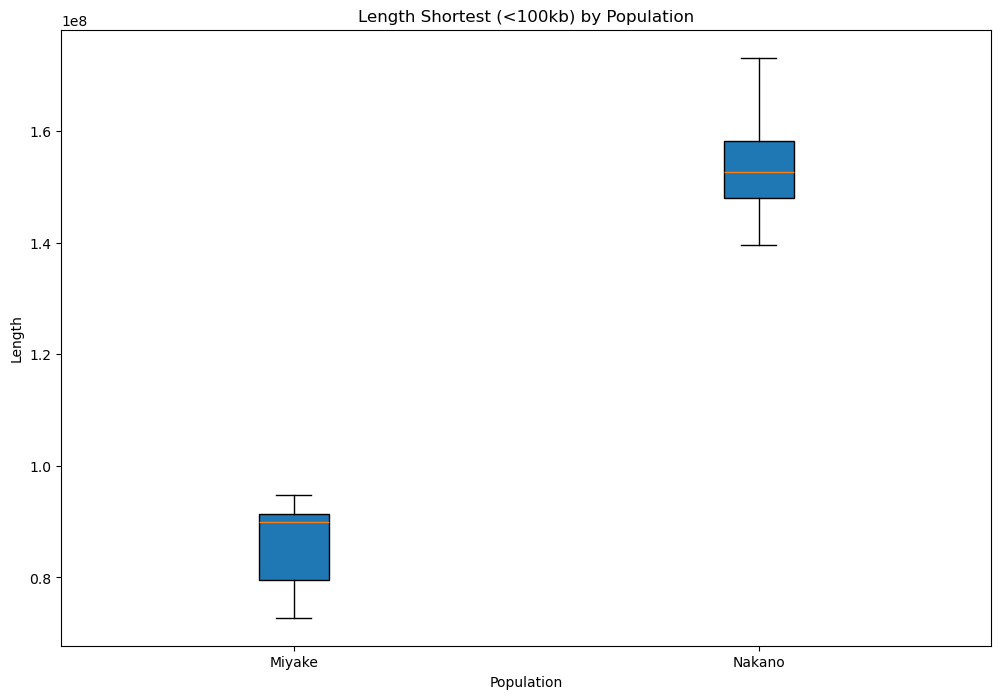

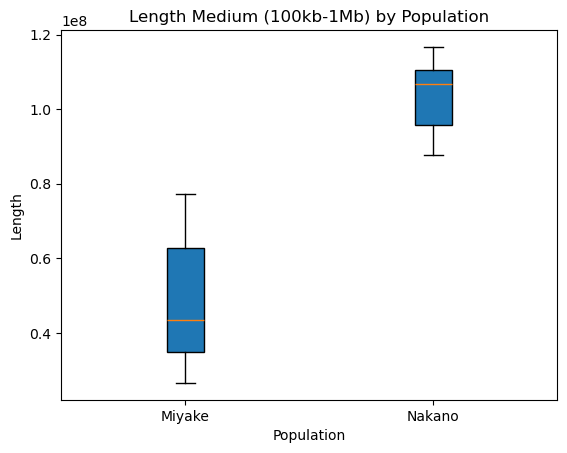

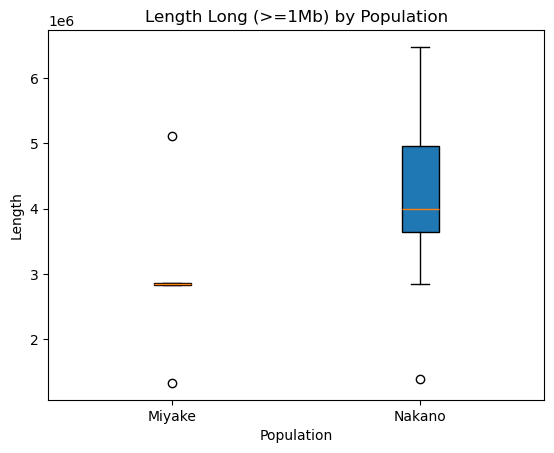

In [ ]:
# Plot the data
plt.figure(figsize=(12, 8))

# Create boxplots for each Length category
length_categories = ['Length Shortest (<100kb)', 'Length Medium (100kb-1Mb)', 'Length Long (>=1Mb)']
for category in length_categories:
    if category in pivoted_length.columns:
        plt.boxplot(
            [pivoted_length[pivoted_length['Population'] == pop][category] for pop in pivoted_length['Population'].unique()],
            labels=pivoted_length['Population'].unique(),
            patch_artist=True
        )
        plt.title(f"{category} by Population")
        plt.ylabel("Length")
        plt.xlabel("Population")
        plt.show()


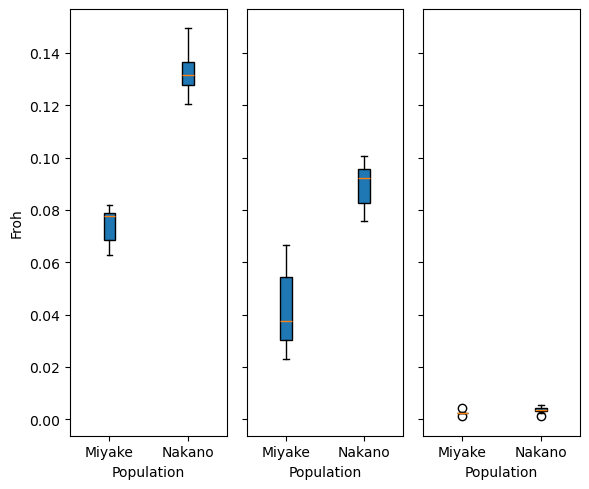

In [ ]:
# Plot the data in a 3:1 grid
fig, axes = plt.subplots(1, 3, figsize=(6, 5), sharey=True)

# Define Froh categories
froh_categories = ['Froh Shortest (<100kb)', 'Froh Medium (100kb-1Mb)', 'Froh Long (>=1Mb)']

# Plot each Froh category
for i, category in enumerate(froh_categories):
    if category in pivoted_length.columns:
        axes[i].boxplot(
            [pivoted_length[pivoted_length['Population'] == pop][category] for pop in pivoted_length['Population'].unique()],
            labels=pivoted_length['Population'].unique(),
            patch_artist=True
        )
        #axes[i].set_title(category)
        axes[i].set_xlabel("Population")
        axes[i].set_ylabel("Froh") if i == 0 else None

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Define population colors
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakano': '#e0e020'      # Color for Nakano
}

# Plot each Froh category
for i, category in enumerate(froh_categories):
    if category in pivoted_length.columns:
        data_to_plot = [
            pivoted_length[pivoted_length['Population'] == pop][category] 
            for pop in pivoted_length['Population'].unique()
        ]
        axes[i].boxplot(
            data_to_plot,
            labels=pivoted_length['Population'].unique(),
            patch_artist=True,
            boxprops={pop: dict(facecolor=population_colors[pop], color=population_colors[pop]) for pop in population_colors},
            medianprops=dict(color='black')
        )
        axes[i].set_title(category)
        axes[i].set_xlabel("Population")
        axes[i].set_ylabel("Froh") if i == 0 else None

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

AttributeError: PathPatch.set() got an unexpected keyword argument 'Miyake'

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/2932774317.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_length = data.groupby(['Population', 'Sample', 'Length_Category'], as_index=False)['Length'].sum()


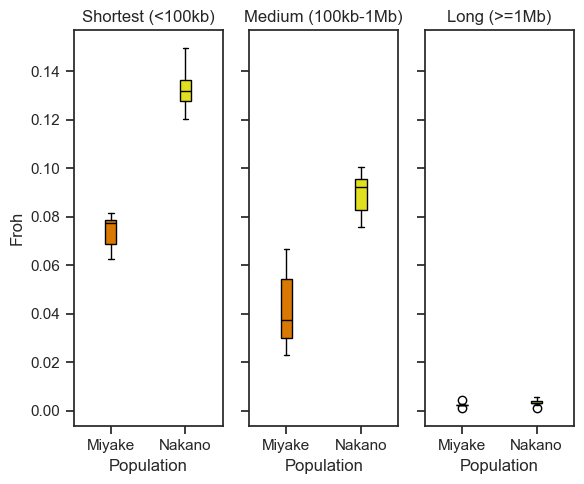

   Population           Sample  Length Shortest (<100kb)  \
0      Miyake  PijimaeMi-U5645                91396942.0   
1      Miyake  PijimaeMi-U5649                91148160.0   
2      Miyake  PijimaeMi-U5708                76522369.0   
3      Miyake  PijimaeMi-U5709                94704967.0   
4      Miyake  PijimaeMi-U5710                72785521.0   
5      Miyake  PijimaeMi-U5711                88554143.0   
20     Nakano  PijimaeNa-U5147               139547045.0   
21     Nakano  PijimaeNa-U5148               155843972.0   
22     Nakano  PijimaeNa-U5149               164728763.0   
23     Nakano  PijimaeNa-U5150               156110719.0   
24     Nakano  PijimaeNa-U5151               149569572.0   
25     Nakano  PijimaeNa-U5152               173139443.0   
26     Nakano  PijimaeNa-U5153               147745041.0   
27     Nakano  PijimaeNa-U5154               147972694.0   

    Length Medium (100kb-1Mb)  Length Long (>=1Mb)  Froh Shortest (<100kb)  \
0                  44

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual file paths)
data = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_combined_data.tsv", sep="\t")

# Define new length categories
bins = [0, 100_000, 1_000_000, float('inf')]
labels = ['Shortest (<100kb)', 'Medium (100kb-1Mb)', 'Long (>=1Mb)']
data['Length_Category'] = pd.cut(data['Length'], bins=bins, labels=labels, right=False)

# Calculate total length per sample and category
total_length = data.groupby(['Population', 'Sample', 'Length_Category'], as_index=False)['Length'].sum()

# Add Froh column
genome_length = 1_159_332_207
total_length['Froh'] = total_length['Length'] / genome_length

# Pivot the table for better readability
pivoted_length = total_length.pivot(
    index=['Population', 'Sample'], 
    columns='Length_Category', 
    values=['Length', 'Froh']
).fillna(0).reset_index()

# Flatten multi-level columns in the pivot table
pivoted_length.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in pivoted_length.columns]

# Remove rows with all 0.0 values for ROH
pivoted_length = pivoted_length[(pivoted_length.loc[:, pivoted_length.columns.str.contains('Length')].sum(axis=1) != 0)]

# Save the results (optional)
output_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_length_by_category.tsv"
pivoted_length.to_csv(output_path, sep="\t", index=False)

# Plot the data in a 3:1 grid
fig, axes = plt.subplots(1, 3, figsize=(6, 5), sharey=True)

# Define Froh categories
froh_categories = ['Froh Shortest (<100kb)', 'Froh Medium (100kb-1Mb)', 'Froh Long (>=1Mb)']

# Define population colors
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakano': '#e0e020'      # Color for Nakano
}

# Plot each Froh category
for i, category in enumerate(froh_categories):
    if category in pivoted_length.columns:
        data_to_plot = [
            pivoted_length[pivoted_length['Population'] == pop][category].dropna()
            for pop in pivoted_length['Population'].unique()
        ]
        boxplots = axes[i].boxplot(
            data_to_plot,
            labels=pivoted_length['Population'].unique(),
            patch_artist=True,
            medianprops=dict(color='black')
        )
        # Apply colors to the boxes based on population
        for patch, pop in zip(boxplots['boxes'], pivoted_length['Population'].unique()):
            patch.set(facecolor=population_colors[pop])
        axes[i].set_title(['Shortest (<100kb)', 'Medium (100kb-1Mb)', 'Long (>=1Mb)'][i])
        axes[i].set_xlabel("Population")
        axes[i].set_ylabel("Froh") if i == 0 else None

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Print the results
print(pivoted_length)


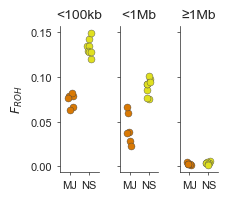

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent style
sns.set_context("notebook")
sns.set_style("ticks")

# Map full names to short labels and define order
label_map = {"Miyake": "MJ", "Nakano": "NS"}
plot_order = ["MJ", "NS"]

# Create a renamed population column
pivoted_length["PopLabel"] = pivoted_length["Population"].map(label_map)

# Plot in 3-panel layout
fig, axes = plt.subplots(1, 3, figsize=(2.5, 2.17), sharey=True)

# Froh categories
froh_categories = ['Froh Shortest (<100kb)', 'Froh Medium (100kb-1Mb)', 'Froh Long (>=1Mb)']

# Colors for renamed labels
population_colors = {
    'MJ': '#d97904',  # Miyake
    'NS': '#e0e020'   # Nakanoshima
}

# Plot each Froh category
for i, category in enumerate(froh_categories):
    if category in pivoted_length.columns:
        for pop in plot_order:
            sns.stripplot(
                x=[pop] * len(pivoted_length[pivoted_length["PopLabel"] == pop]),  # Force consistent x-label
                y=pivoted_length[pivoted_length["PopLabel"] == pop][category],
                color=population_colors[pop],
                ax=axes[i],
                jitter=0.15,
                size=5,
                linewidth=0.3,
                alpha=1
            )

        # Formatting
        axes[i].set_title(['<100kb', '<1Mb', '≥1Mb'][i], fontsize=10)
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(plot_order, fontsize=9)
        axes[i].tick_params(width=0.5, length=2.5, labelsize=8)

        for spine in axes[i].spines.values():
            spine.set_linewidth(0.5)

        if i == 0:
            axes[i].set_ylabel(r'$F_{ROH}$', fontsize=9)
        else:
            axes[i].set_ylabel("")

# Clean up and show
sns.despine()
plt.tight_layout()

# Optional save
# fig.savefig("ROH_froh_stripplot_swapped.pdf", bbox_inches="tight")
# fig.savefig("ROH_froh_stripplot_swapped.png", bbox_inches="tight")

plt.show()


/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/531169550.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


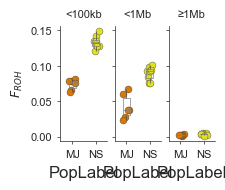

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set consistent style
sns.set_context("notebook")
sns.set_style("ticks")

# Map full names to short labels and define order
label_map = {"Miyake": "MJ", "Nakano": "NS"}
plot_order = ["MJ", "NS"]

# Create a renamed population column
pivoted_length["PopLabel"] = pivoted_length["Population"].map(label_map)

# Set up layout with closer subplots
fig, axes = plt.subplots(1, 3, figsize=(2, 1.5), sharey=True, gridspec_kw={'wspace': 0.15})

# Froh categories
froh_categories = ['Froh Shortest (<100kb)', 'Froh Medium (100kb-1Mb)', 'Froh Long (>=1Mb)']

# Colors for renamed labels
population_colors = {
    'MJ': '#d97904',  # Miyake
    'NS': '#e0e020'   # Nakanoshima
}

# Plot each Froh category
for i, category in enumerate(froh_categories):
    if category in pivoted_length.columns:
        # Stripplot (points)
        for pop in plot_order:
            sns.stripplot(
                x=[pop] * len(pivoted_length[pivoted_length["PopLabel"] == pop]),
                y=pivoted_length[pivoted_length["PopLabel"] == pop][category],
                color=population_colors[pop],
                ax=axes[i],
                jitter=0.15,
                size=5,
                linewidth=0.3,
                alpha=1,
                zorder=1
            )

        # Boxplot (overlay, transparent fill)
        sns.boxplot(
            data=pivoted_length,
            x="PopLabel",
            y=category,
            ax=axes[i],
            order=plot_order,
            showcaps=False,
            boxprops={'facecolor': 'none', 'edgecolor': 'grey', 'linewidth': 0.5},
            whiskerprops={'linewidth': 0.5},
            medianprops={'color': 'grey', 'linewidth': 0.5},
            showfliers=False,
            width=0.3,
            zorder=2
        )

        # Formatting
        axes[i].set_title(['<100kb', '<1Mb', '≥1Mb'][i], fontsize=8)
        axes[i].set_xticks([0, 1])
        #axes[i].set_xticklabels(plot_order, fontsize=9)
        axes[i].tick_params(width=0.5, length=2.5, labelsize=8)

        for spine in axes[i].spines.values():
            spine.set_linewidth(0.5)

        if i == 0:
            axes[i].set_ylabel(r'$F_{ROH}$', fontsize=9)
        else:
            axes[i].set_ylabel("")

# Final layout and save
sns.despine()
plt.tight_layout()

# Optional save
fig.savefig("ROH_froh_stripplusbox_pubstyle.pdf", bbox_inches="tight")
# fig.savefig("ROH_froh_stripplusbox_pubstyle.png", bbox_inches="tight")

plt.show()


In [ ]:
import pandas as pd

# Load your dataset (replace with your actual file paths)
data = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_combined_data.tsv", sep="\t")

# Define new length categories
bins = [0, 100_000, 1_000_000, float('inf')]
labels = ['Shortest (<100kb)', 'Medium (100kb-1Mb)', 'Long (>=1Mb)']
data['Length_Category'] = pd.cut(data['Length'], bins=bins, labels=labels, right=False)

# Calculate total length per sample, individual, and category
total_length = data.groupby(['Population', 'Sample', 'Length_Category'])['Length'].sum().reset_index()

# Add Froh column
genome_length = 1_159_332_207
total_length['Froh'] = total_length['Length'] / genome_length

# Pivot the table for better readability (optional)
pivoted_length = total_length.pivot_table(
    index=['Population', 'Sample'], 
    columns='Length_Category', 
    values=['Length', 'Froh'], 
    fill_value=0
).reset_index()

# Save the results (optional)
output_path = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_length_by_category.tsv"
pivoted_length.to_csv(output_path, sep="\t", index=False)

# Print the results
print(pivoted_length)


                Population           Sample              Froh  \
Length_Category                             Shortest (<100kb)   
0                   Miyake  PijimaeMi-U5645          0.078836   
1                   Miyake  PijimaeMi-U5649          0.078621   
2                   Miyake  PijimaeMi-U5708          0.066006   
3                   Miyake  PijimaeMi-U5709          0.081689   
4                   Miyake  PijimaeMi-U5710          0.062782   
5                   Miyake  PijimaeMi-U5711          0.076384   
6                   Miyake  PijimaeNa-U5147          0.000000   
7                   Miyake  PijimaeNa-U5148          0.000000   
8                   Miyake  PijimaeNa-U5149          0.000000   
9                   Miyake  PijimaeNa-U5150          0.000000   
10                  Miyake  PijimaeNa-U5151          0.000000   
11                  Miyake  PijimaeNa-U5152          0.000000   
12                  Miyake  PijimaeNa-U5153          0.000000   
13                  Miyak

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_84335/328973540.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_length = data.groupby(['Population', 'Sample', 'Length_Category'])['Length'].sum().reset_index()
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_84335/328973540.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivoted_length = total_length.pivot_table(


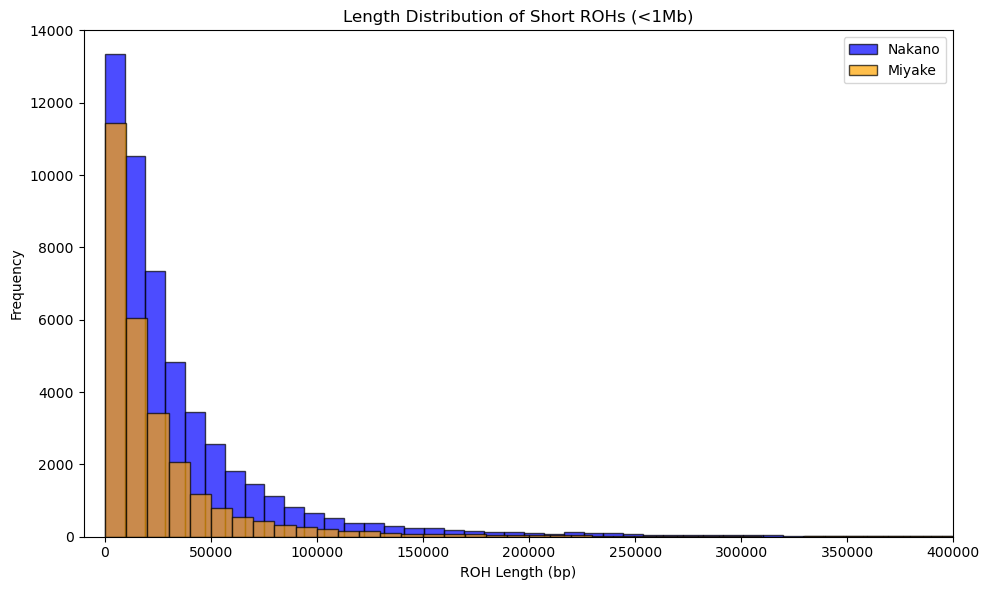

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Filter for short ROHs (< 1Mb)
short_roh_data = combined_data[combined_data['Length'] < 1_000_000]

# Separate lengths by population
nakano_lengths = short_roh_data[short_roh_data['Population'] == 'Nakano']['Length']
miyake_lengths = short_roh_data[short_roh_data['Population'] == 'Miyake']['Length']

# Plot histograms for short ROH lengths
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram for Nakano
ax.hist(nakano_lengths, bins=100, alpha=0.7, label='Nakano', color='blue', edgecolor='black')

# Plot histogram for Miyake
ax.hist(miyake_lengths, bins=100, alpha=0.7, label='Miyake', color='orange', edgecolor='black')

# Add labels, title, and legend
ax.set_title('Length Distribution of Short ROHs (<1Mb)')
ax.set_xlabel('ROH Length (bp)')
ax.set_ylabel('Frequency')
ax.set_xlim(-10000,400000)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


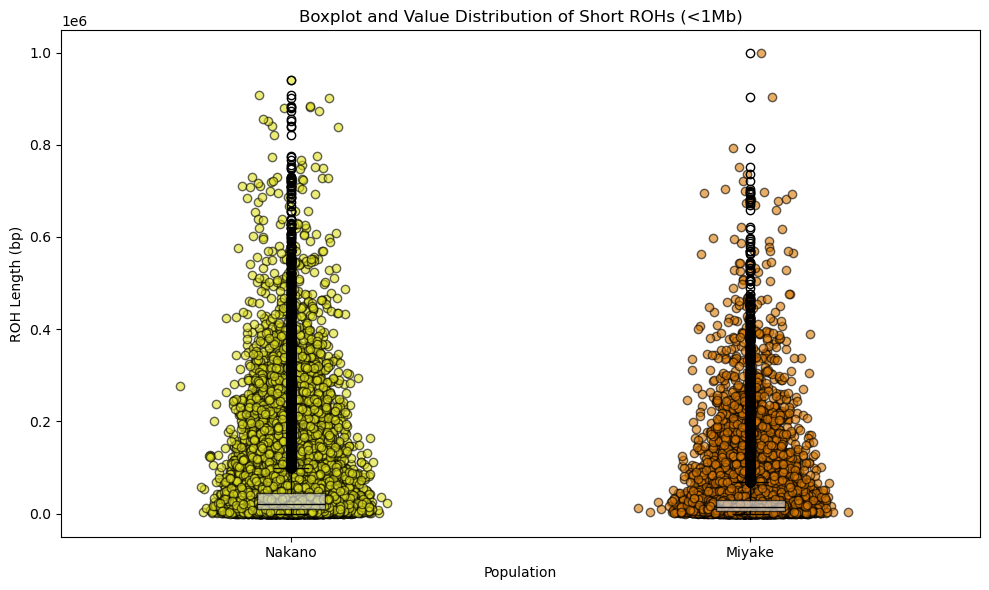

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Define population colors
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakano': '#e0e020'      # Color for Nakano
}

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Filter for short ROHs (< 1Mb)
short_roh_data = combined_data[combined_data['Length'] < 1_000_000]

# Separate lengths by population
nakano_lengths = short_roh_data[short_roh_data['Population'] == 'Nakano']['Length']
miyake_lengths = short_roh_data[short_roh_data['Population'] == 'Miyake']['Length']

# Plot boxplots for short ROH counts with cloud of all values
fig, ax = plt.subplots(figsize=(10, 6))

# Combine data for boxplot
data_for_boxplot = [nakano_lengths, miyake_lengths]
labels = ['Nakano', 'Miyake']

# Create boxplot
box = ax.boxplot(data_for_boxplot, labels=labels, patch_artist=True,
                 boxprops=dict(facecolor='lightgrey', alpha=0.7),
                 medianprops=dict(color='black'))

# Add scatter points (cloud of all values) with specific colors
for i, (lengths, population) in enumerate(zip(data_for_boxplot, labels)):
    jittered_x = np.random.normal(loc=i + 1, scale=0.05, size=len(lengths))
    ax.scatter(jittered_x, lengths, alpha=0.6, edgecolor='black',
               color=population_colors[population])

# Add labels and title
ax.set_title('Boxplot and Value Distribution of Short ROHs (<1Mb)')
ax.set_xlabel('Population')
ax.set_ylabel('ROH Length (bp)')

# Show plot
plt.tight_layout()
plt.show()


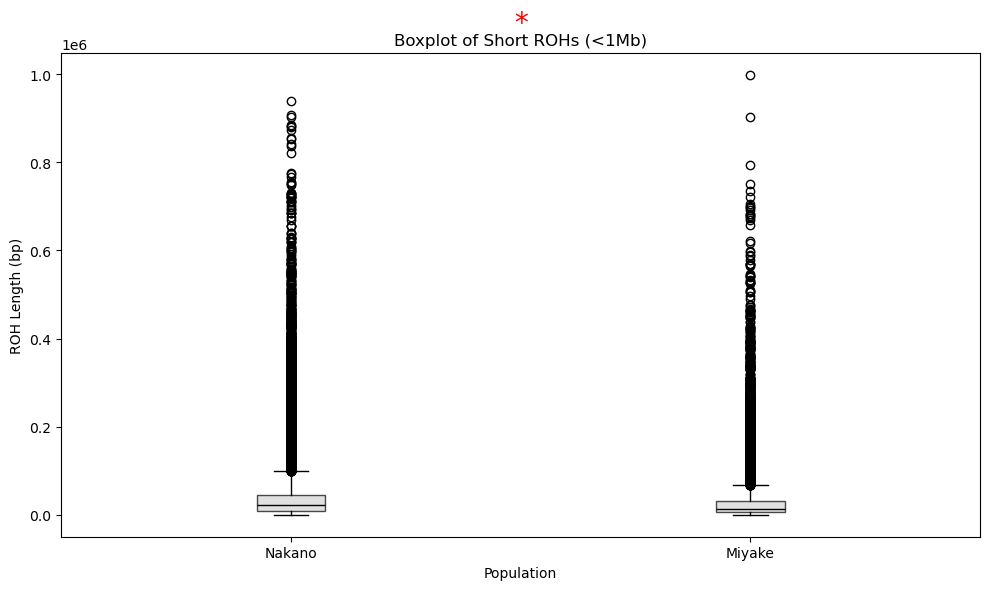

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Define population colors
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakano': '#e0e020'      # Color for Nakano
}

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Filter for short ROHs (< 1Mb)
short_roh_data = combined_data[combined_data['Length'] < 1_000_000]

# Separate lengths by population
nakano_lengths = short_roh_data[short_roh_data['Population'] == 'Nakano']['Length']
miyake_lengths = short_roh_data[short_roh_data['Population'] == 'Miyake']['Length']

# Perform statistical test
stat, p_value = mannwhitneyu(nakano_lengths, miyake_lengths, alternative='two-sided')

# Plot boxplots for short ROH counts
fig, ax = plt.subplots(figsize=(10, 6))

# Combine data for boxplot
data_for_boxplot = [nakano_lengths, miyake_lengths]
labels = ['Nakano', 'Miyake']

# Create boxplot
box = ax.boxplot(data_for_boxplot, labels=labels, patch_artist=True,
                 boxprops=dict(facecolor='lightgrey', alpha=0.7),
                 medianprops=dict(color='black'))

# Add significance marker
if p_value < 0.05:
    max_y = max(max(nakano_lengths), max(miyake_lengths))
    ax.text(1.5, max_y * 1.1, '*', fontsize=20, ha='center', color='red')

# Add labels and title
ax.set_title('Boxplot of Short ROHs (<1Mb)')
ax.set_xlabel('Population')
ax.set_ylabel('ROH Length (bp)')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Define population colors
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakano': '#e0e020'      # Color for Nakano
}

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Filter for short ROHs (< 1Mb)
short_roh_data = combined_data[combined_data['Length'] < 1_000_000]

# Perform statistical test
nakano_lengths = short_roh_data[short_roh_data['Population'] == 'Nakano']['Length']
miyake_lengths = short_roh_data[short_roh_data['Population'] == 'Miyake']['Length']
stat, p_value = mannwhitneyu(nakano_lengths, miyake_lengths, alternative='two-sided')

# Plot using boxplot and swarmplot
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot
sns.boxplot(data=short_roh_data, x='Population', y='Length', ax=ax,
            palette=population_colors, showfliers=False, width=0.5)

# Overlay swarmplot
sns.swarmplot(data=short_roh_data, x='Population', y='Length', ax=ax,
              palette=population_colors, size=4, dodge=True, alpha=0.7)

# Add significance marker
if p_value < 0.05:
    max_y = short_roh_data['Length'].max()
    ax.text(0.5, max_y * 1.05, '*', fontsize=20, ha='center', color='red')

# Add labels and title
ax.set_title('Boxplot and Swarmplot of Short ROHs (<1Mb)')
ax.set_xlabel('Population')
ax.set_ylabel('ROH Length (bp)')

# Show plot
plt.tight_layout()
plt.show()


/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_70074/1922860745.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=short_roh_data, x='Population', y='Length', ax=ax,
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_70074/1922860745.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=short_roh_data, x='Population', y='Length', ax=ax,


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11bfeeb60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_70074/3759528867.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=short_roh_data, x='Population', y='Length', ax=ax,
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_70074/3759528867.py:41: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=short_roh_data, x='Population', y='Length', ax=ax,


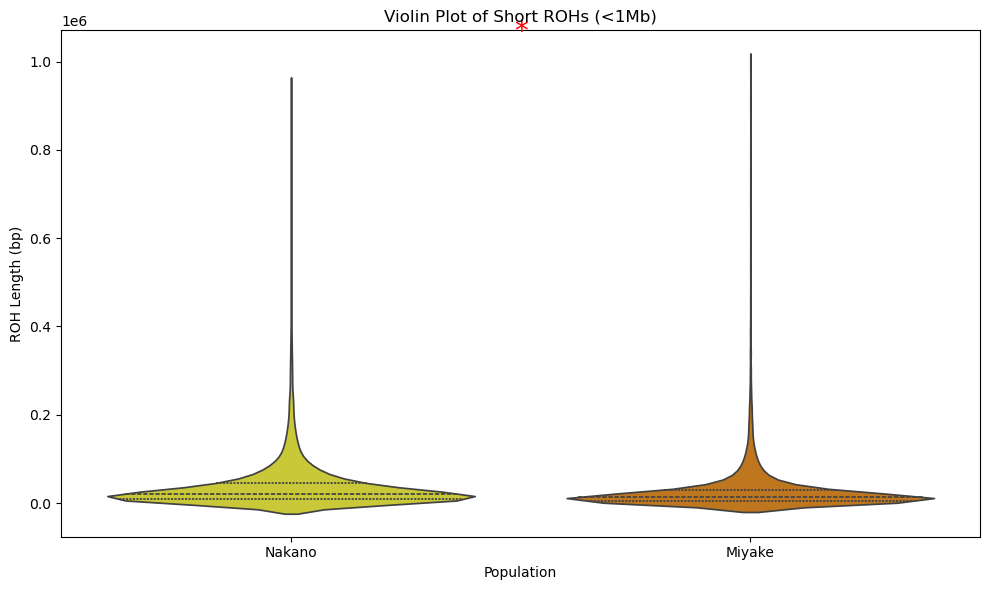

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Define population colors
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakano': '#e0e020'      # Color for Nakano
}

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Filter for short ROHs (< 1Mb)
short_roh_data = combined_data[combined_data['Length'] < 1_000_000]

# Perform statistical test
nakano_lengths = short_roh_data[short_roh_data['Population'] == 'Nakano']['Length']
miyake_lengths = short_roh_data[short_roh_data['Population'] == 'Miyake']['Length']
stat, p_value = mannwhitneyu(nakano_lengths, miyake_lengths, alternative='two-sided')

# Plot using side-by-side violin plots
fig, ax = plt.subplots(figsize=(10, 6))

# Create violin plot
sns.violinplot(data=short_roh_data, x='Population', y='Length', ax=ax,
               palette=population_colors, inner="quartile", bw=0.2)

# Add significance marker
if p_value < 0.05:
    max_y = short_roh_data['Length'].max()
    ax.text(0.5, max_y * 1.05, '*', fontsize=20, ha='center', color='red')

# Add labels and title
ax.set_title('Violin Plot of Short ROHs (<1Mb)')
ax.set_xlabel('Population')
ax.set_ylabel('ROH Length (bp)')

# Show plot
plt.tight_layout()
plt.show()


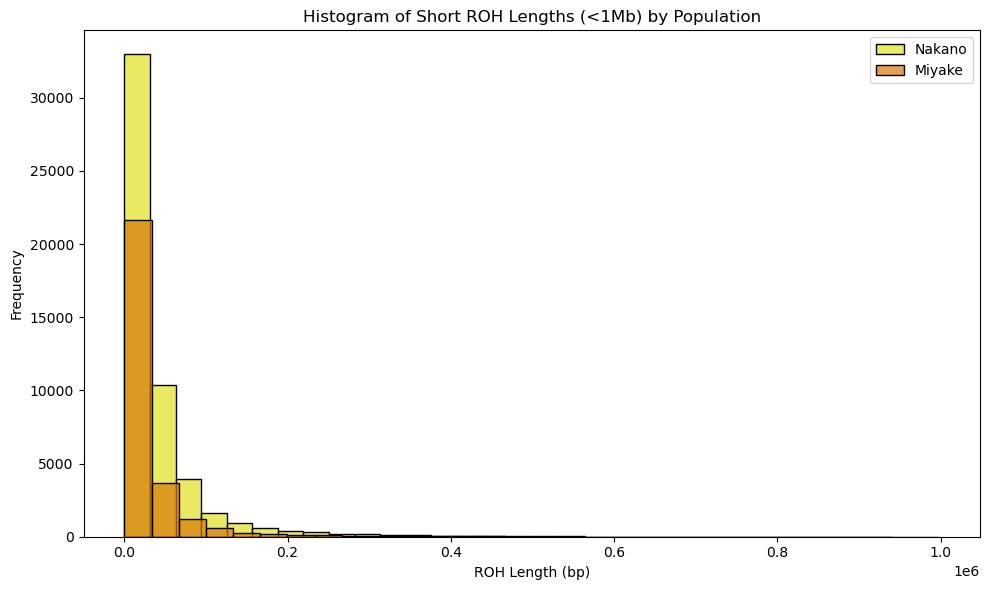

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Define population colors
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakano': '#e0e020'      # Color for Nakano
}

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Filter for short ROHs (< 1Mb)
short_roh_data = combined_data[combined_data['Length'] < 1_000_000]

# Perform statistical test
nakano_lengths = short_roh_data[short_roh_data['Population'] == 'Nakano']['Length']
miyake_lengths = short_roh_data[short_roh_data['Population'] == 'Miyake']['Length']
stat, p_value = mannwhitneyu(nakano_lengths, miyake_lengths, alternative='two-sided')

# Plot histograms for each population
fig, ax = plt.subplots(figsize=(10, 6))

# Nakano histogram
sns.histplot(nakano_lengths, bins=30, kde=False, color=population_colors['Nakano'], label='Nakano', ax=ax, alpha=0.7)

# Miyake histogram
sns.histplot(miyake_lengths, bins=30, kde=False, color=population_colors['Miyake'], label='Miyake', ax=ax, alpha=0.7)

# Add labels, legend, and title
ax.set_title('Histogram of Short ROH Lengths (<1Mb) by Population')
ax.set_xlabel('ROH Length (bp)')
ax.set_ylabel('Frequency')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


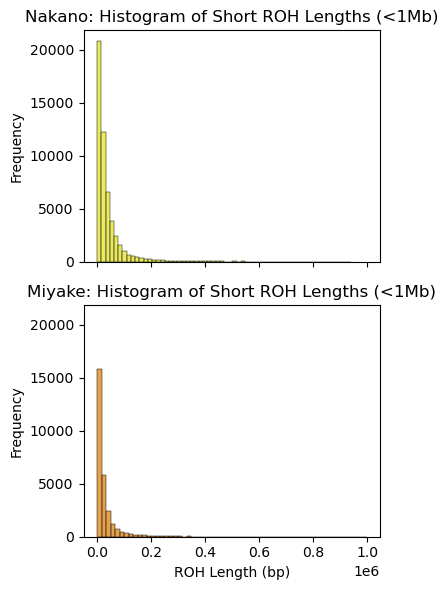

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Define population colors
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakano': '#e0e020'      # Color for Nakano
}

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Filter for short ROHs (< 1Mb)
short_roh_data = combined_data[combined_data['Length'] < 1_000_000]

# Perform statistical test
nakano_lengths = short_roh_data[short_roh_data['Population'] == 'Nakano']['Length']
miyake_lengths = short_roh_data[short_roh_data['Population'] == 'Miyake']['Length']
stat, p_value = mannwhitneyu(nakano_lengths, miyake_lengths, alternative='two-sided')

# Plot histograms for each population in separate subplots with identical axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4,6), sharex=True, sharey=True)

# Nakano histogram
sns.histplot(nakano_lengths, bins=60, kde=False, color=population_colors['Nakano'], ax=axes[0], alpha=0.7)
axes[0].set_title('Nakano: Histogram of Short ROH Lengths (<1Mb)')
axes[0].set_ylabel('Frequency')
#axes[0].set_xlim([0,80)

# Miyake histogram
sns.histplot(miyake_lengths, bins=60, kde=False, color=population_colors['Miyake'], ax=axes[1], alpha=0.7)
axes[1].set_title('Miyake: Histogram of Short ROH Lengths (<1Mb)')
axes[1].set_xlabel('ROH Length (bp)')
axes[1].set_ylabel('Frequency')

# Set identical limits for x and y axes
#x_limits = [0, max(short_roh_data['Length'])]
#y_limits = [0, max(max(nakano_lengths.value_counts()), max(miyake_lengths.value_counts()))]
#x_limits = [100_000, 800_000]
#y_limits = [0, 5000]
#for ax in axes:
#    ax.set_xlim(x_limits)
#    ax.set_ylim(y_limits)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_70074/2378812838.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=short_roh_data, x='Population', y='Length', ax=ax,
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_70074/2378812838.py:40: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=short_roh_data, x='Population', y='Length', ax=ax,


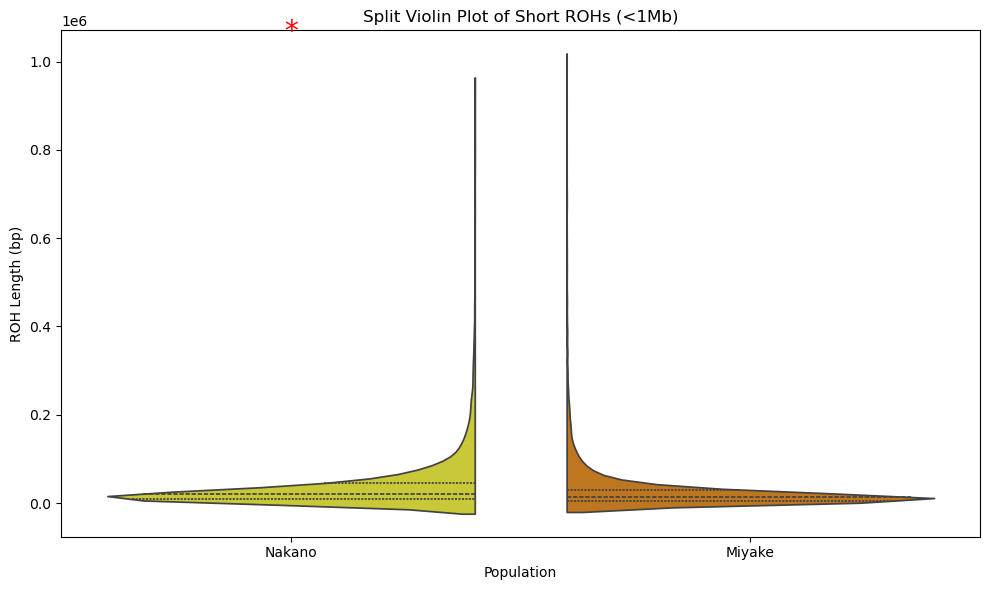

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Define population colors
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakano': '#e0e020'      # Color for Nakano
}

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Filter for short ROHs (< 1Mb)
short_roh_data = combined_data[combined_data['Length'] < 1_000_000]

# Perform statistical test
nakano_lengths = short_roh_data[short_roh_data['Population'] == 'Nakano']['Length']
miyake_lengths = short_roh_data[short_roh_data['Population'] == 'Miyake']['Length']
stat, p_value = mannwhitneyu(nakano_lengths, miyake_lengths, alternative='two-sided')

# Plot a single violin with split sides for each population
fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(data=short_roh_data, x='Population', y='Length', ax=ax,
               palette=population_colors, split=True, inner="quartile", bw=0.2)

# Add significance marker
if p_value < 0.05:
    max_y = short_roh_data['Length'].max()
    ax.text(0, max_y * 1.05, '*', fontsize=20, ha='center', color='red')

# Add labels and title
ax.set_title('Split Violin Plot of Short ROHs (<1Mb)')
ax.set_xlabel('Population')
ax.set_ylabel('ROH Length (bp)')

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
roh_counts


Length_Category Population           Sample  Long (>=1Mb)  Short (<1Mb)
0                   Miyake  PijimaeMi-U5645             4          4871
1                   Miyake  PijimaeMi-U5649             1          4922
2                   Miyake  PijimaeMi-U5708             2          4359
3                   Miyake  PijimaeMi-U5709             2          4961
4                   Miyake  PijimaeMi-U5710             2          4259
5                   Miyake  PijimaeMi-U5711             2          4654
6                   Nakano  PijimaeNa-U5147             4          6075
7                   Nakano  PijimaeNa-U5148             5          6444
8                   Nakano  PijimaeNa-U5149             3          6970
9                   Nakano  PijimaeNa-U5150             2          6520
10                  Nakano  PijimaeNa-U5151             3          6312
11                  Nakano  PijimaeNa-U5152             3          7371
12                  Nakano  PijimaeNa-U5153             2          6259
13                  Nakano  PijimaeNa-U5154             1          6029

Mann-Whitney U Test for Long ROH Lengths:
Statistic: 163.0
p-value: 0.668520729309876


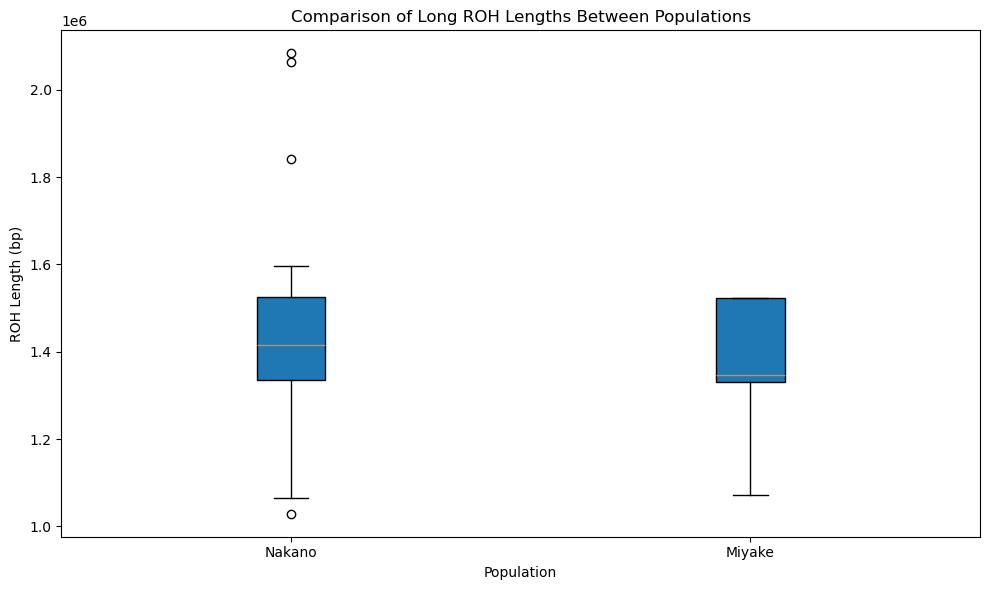

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# File paths for Nakano and Miyake datasets
file_path_nakano = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Nakano_RGHQ_export.tsv"
file_path_miyake = "/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_Miyake_RGHQ_export.tsv"

# Load data for both populations
nakano_data = pd.read_csv(file_path_nakano, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])
miyake_data = pd.read_csv(file_path_miyake, sep="\t", header=None, comment='#',
                          names=['RG', 'Sample', 'Chromosome', 'Start', 'End', 'Length', 'Markers', 'Quality'])

# Add population labels
nakano_data['Population'] = 'Nakano'
miyake_data['Population'] = 'Miyake'

# Combine datasets
combined_data = pd.concat([nakano_data, miyake_data], ignore_index=True)

# Filter for long ROH (>= 1Mb)
long_roh_data = combined_data[combined_data['Length'] >= 1_000_000]

# Separate lengths by population
nakano_lengths = long_roh_data[long_roh_data['Population'] == 'Nakano']['Length']
miyake_lengths = long_roh_data[long_roh_data['Population'] == 'Miyake']['Length']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(nakano_lengths, miyake_lengths, alternative='two-sided')

# Print results
print("Mann-Whitney U Test for Long ROH Lengths:")
print(f"Statistic: {stat}")
print(f"p-value: {p_value}")

# Plot distributions of long ROH lengths
plt.figure(figsize=(10, 6))
plt.boxplot([nakano_lengths, miyake_lengths], labels=['Nakano', 'Miyake'], patch_artist=True)
plt.title('Comparison of Long ROH Lengths Between Populations')
plt.ylabel('ROH Length (bp)')
plt.xlabel('Population')
plt.tight_layout()
plt.show()


In [ ]:
long_roh_data

RG           Sample      Chromosome     Start       End   Length  \
3965   RG  PijimaeNa-U5148  VHQE01000425.1  15995483  17063113  1067631   
4428   RG  PijimaeNa-U5150  VHQE01000425.1   2750131   4813707  2063577   
7807   RG  PijimaeNa-U5148  VHQE01000019.1  37036705  38065652  1028948   
13378  RG  PijimaeNa-U5149  VHQE01000435.1  27106374  28188269  1081896   
15173  RG  PijimaeNa-U5147  VHQE01000089.1  17879814  19294940  1415127   
15177  RG  PijimaeNa-U5147  VHQE01000089.1  20027216  21623970  1596755   
15260  RG  PijimaeNa-U5148  VHQE01000089.1   7842453   9345430  1502978   
28818  RG  PijimaeNa-U5151  VHQE01000388.1   8722433   9788390  1065958   
37319  RG  PijimaeNa-U5147  VHQE01000247.1   1418647   2752594  1333948   
37334  RG  PijimaeNa-U5148  VHQE01000247.1   1391790   2738448  1346659   
37359  RG  PijimaeNa-U5149  VHQE01000247.1   1418647   2752831  1334185   
37392  RG  PijimaeNa-U5150  VHQE01000247.1    911038   2752594  1841557   
37418  RG  PijimaeNa-U5151  VHQE01000247.1    658958   2742163  2083206   
37445  RG  PijimaeNa-U5152  VHQE01000247.1    735361   2087741  1352381   
37475  RG  PijimaeNa-U5153  VHQE01000247.1   1418647   2752831  1334185   
37500  RG  PijimaeNa-U5154  VHQE01000247.1   1353255   2752594  1399340   
44303  RG  PijimaeNa-U5147  VHQE01000479.1    758519   2266211  1507693   
44317  RG  PijimaeNa-U5148  VHQE01000479.1    734598   2266211  1531614   
44327  RG  PijimaeNa-U5149  VHQE01000479.1    733719   2266211  1532493   
44349  RG  PijimaeNa-U5151  VHQE01000479.1    748425   2266211  1517787   
44359  RG  PijimaeNa-U5152  VHQE01000479.1    750748   2266211  1515464   
44370  RG  PijimaeNa-U5153  VHQE01000479.1    752530   2266211  1513682   
48155  RG  PijimaeNa-U5152  VHQE01000255.1    415098   1606296  1191199   
61691  RG  PijimaeMi-U5645  VHQE01000313.1   8166082   9320435  1154354   
61692  RG  PijimaeMi-U5645  VHQE01000313.1   9323335  10396242  1072908   
70341  RG  PijimaeMi-U5645  VHQE01000247.1   1418989   2777290  1358302   
70371  RG  PijimaeMi-U5649  VHQE01000247.1   1418308   2752594  1334287   
70388  RG  PijimaeMi-U5708  VHQE01000247.1   1391795   2738185  1346391   
70408  RG  PijimaeMi-U5709  VHQE01000247.1   1418247   2752594  1334348   
70427  RG  PijimaeMi-U5710  VHQE01000247.1   1418308   2730559  1312252   
70453  RG  PijimaeMi-U5711  VHQE01000247.1   1406691   2737204  1330514   
74780  RG  PijimaeMi-U5645  VHQE01000479.1    749313   2271310  1521998   
74808  RG  PijimaeMi-U5708  VHQE01000479.1    748173   2271310  1523138   
74819  RG  PijimaeMi-U5709  VHQE01000479.1    748270   2271310  1523041   
74831  RG  PijimaeMi-U5710  VHQE01000479.1    751612   2271310  1519699   
74843  RG  PijimaeMi-U5711  VHQE01000479.1    748738   2271310  1522573   

       Markers  Quality Population  
3965      6231     90.8     Nakano  
4428     11247     90.9     Nakano  
7807      6229     91.1     Nakano  
13378     5155     86.7     Nakano  
15173     6356     87.5     Nakano  
15177     6588     88.6     Nakano  
15260     6793     89.5     Nakano  
28818     3538     75.8     Nakano  
37319      292     75.3     Nakano  
37334      587     76.2     Nakano  
37359      304     73.8     Nakano  
37392     2462     91.6     Nakano  
37418     6574     93.7     Nakano  
37445     4955     93.8     Nakano  
37475      304     65.8     Nakano  
37500     1148     61.6     Nakano  
44303       96     74.9     Nakano  
44317      344     48.4     Nakano  
44327      355     65.9     Nakano  
44349      221     55.5     Nakano  
44359      184     49.6     Nakano  
44370      143     56.7     Nakano  
48155     4455     68.2     Nakano  
61691     6669     93.7     Miyake  
61692     6274     93.5     Miyake  
70341      564     60.0     Miyake  
70371      382     56.5     Miyake  
70388      655     75.4     Miyake  
70408      387     64.6     Miyake  
70427      224     73.2     Miyake  
70453      383     81.7     Miyake  
74780      162     70.9     Miyake  
74808     

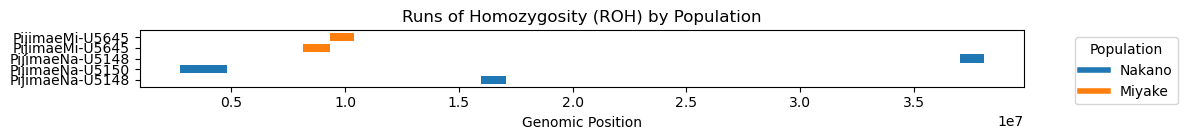

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
data = [
    {"ID": 3965, "Sample": "PijimaeNa-U5148", "Chromosome": "VHQE01000425.1", "Start": 15995483, "End": 17063113, "Length": 1067631, "Population": "Nakano"},
    {"ID": 4428, "Sample": "PijimaeNa-U5150", "Chromosome": "VHQE01000425.1", "Start": 2750131, "End": 4813707, "Length": 2063577, "Population": "Nakano"},
    {"ID": 7807, "Sample": "PijimaeNa-U5148", "Chromosome": "VHQE01000019.1", "Start": 37036705, "End": 38065652, "Length": 1028948, "Population": "Nakano"},
    {"ID": 61691, "Sample": "PijimaeMi-U5645", "Chromosome": "VHQE01000313.1", "Start": 8166082, "End": 9320435, "Length": 1154354, "Population": "Miyake"},
    {"ID": 61692, "Sample": "PijimaeMi-U5645", "Chromosome": "VHQE01000313.1", "Start": 9323335, "End": 10396242, "Length": 1072908, "Population": "Miyake"}
    # Add more entries from your data as needed
]

# Convert to DataFrame for easier handling
df = pd.DataFrame(data)

# Assign unique colors to each population
populations = df["Population"].unique()
colors = plt.cm.tab10(range(len(populations)))
color_map = dict(zip(populations, colors))

# Visualization
fig, ax = plt.subplots(figsize=(12, len(df) * 0.3))

# Plot each ROH
for i, row in df.iterrows():
    start = row["Start"]
    length = row["Length"]
    color = color_map[row["Population"]]
    ax.broken_barh([(start, length)], (i - 0.4, 0.8), facecolors=color)

# Set y-axis labels to sample names
ax.set_yticks(range(len(df)))
ax.set_yticklabels(df["Sample"])
ax.set_xlabel("Genomic Position")
ax.set_title("Runs of Homozygosity (ROH) by Population")

# Add a legend for populations
legend_labels = [plt.Line2D([0], [0], color=color_map[pop], lw=4) for pop in populations]
ax.legend(legend_labels, populations, title="Population", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Correcting the data entry to ensure all columns have the same length
data_corrected = {
    "RG": ["RG"] * 36,  # Ensure the length matches other columns
    "Sample": [
        "PijimaeNa-U5148", "PijimaeNa-U5150", "PijimaeNa-U5148", "PijimaeNa-U5149", "PijimaeNa-U5147",
        "PijimaeNa-U5147", "PijimaeNa-U5148", "PijimaeNa-U5151", "PijimaeNa-U5147", "PijimaeNa-U5148",
        "PijimaeNa-U5149", "PijimaeNa-U5150", "PijimaeNa-U5151", "PijimaeNa-U5152", "PijimaeNa-U5153",
        "PijimaeNa-U5154", "PijimaeNa-U5147", "PijimaeNa-U5148", "PijimaeNa-U5149", "PijimaeNa-U5151",
        "PijimaeNa-U5152", "PijimaeNa-U5153", "PijimaeMi-U5645", "PijimaeMi-U5645", "PijimaeMi-U5645",
        "PijimaeMi-U5649", "PijimaeMi-U5708", "PijimaeMi-U5709", "PijimaeMi-U5710", "PijimaeMi-U5711",
        "PijimaeMi-U5645", "PijimaeMi-U5708", "PijimaeMi-U5709", "PijimaeMi-U5710", "PijimaeMi-U5711"
    ],
    "Chromosome": [
        "VHQE01000425.1", "VHQE01000425.1", "VHQE01000019.1", "VHQE01000435.1", "VHQE01000089.1",
        "VHQE01000089.1", "VHQE01000089.1", "VHQE01000388.1", "VHQE01000247.1", "VHQE01000247.1",
        "VHQE01000247.1", "VHQE01000247.1", "VHQE01000247.1", "VHQE01000247.1", "VHQE01000247.1",
        "VHQE01000247.1", "VHQE01000479.1", "VHQE01000479.1", "VHQE01000479.1", "VHQE01000479.1",
        "VHQE01000479.1", "VHQE01000479.1", "VHQE01000255.1", "VHQE01000313.1", "VHQE01000313.1",
        "VHQE01000247.1", "VHQE01000247.1", "VHQE01000247.1", "VHQE01000247.1", "VHQE01000247.1",
        "VHQE01000479.1", "VHQE01000479.1", "VHQE01000479.1", "VHQE01000479.1", "VHQE01000479.1"
    ],
    "Length": [
        1067631, 2063577, 1028948, 1081896, 1415127, 1596755, 1502978, 1065958, 1333948, 1346659, 1334185,
        1841557, 2083206, 1352381, 1334185, 1399340, 1507693, 1531614, 1532493, 1517787, 1515464, 1513682,
        1191199, 1154354, 1072908, 1358302, 1334287, 1346391, 1334348, 1312252, 1330514, 1521998, 1523138,
        1523041, 1519699, 1522573
    ],
    "Population": [
        "Nakano", "Nakano", "Nakano", "Nakano", "Nakano", "Nakano", "Nakano", "Nakano", "Nakano", "Nakano",
        "Nakano", "Nakano", "Nakano", "Nakano", "Nakano", "Nakano", "Nakano", "Nakano", "Nakano", "Nakano",
        "Nakano", "Nakano", "Miyake", "Miyake", "Miyake", "Miyake", "Miyake", "Miyake", "Miyake", "Miyake",
        "Miyake", "Miyake", "Miyake", "Miyake", "Miyake", "Miyake"
    ]
}

# Create DataFrame
roh_df = pd.DataFrame(data_corrected)

# Calculate square of ROH lengths
roh_df['Length_Square'] = roh_df['Length'] ** 2

# Plot squares of ROH lengths for each population
fig, ax = plt.subplots(figsize=(12, 6))

# Separate by population
nakano_squares = roh_df[roh_df['Population'] == 'Nakano']['Length_Square']
miyake_squares = roh_df[roh_df['Population'] == 'Miyake']['Length_Square']

# Plot Nakano squares
ax.scatter(range(len(nakano_squares)), nakano_squares, color='blue', alpha=0.7, label='Nakano')

# Plot Miyake squares
ax.scatter(range(len(nakano_squares), len(nakano_squares) + len(miyake_squares)), miyake_squares, color='orange', alpha=0.7, label='Miyake')

# Add labels and legend
ax.set_xlabel('Index')
ax.set_ylabel('Length Squared (bp²)')
ax.set_title('Squares of ROH Lengths by Population')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


ValueError: All arrays must be of the same length

### OLD ROH

In [ ]:
import pandas as pd
import re

# Read the data from the file
df = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/some.roh.txt", delimiter='\t', header=None)

# Display the DataFrame
#df=df.drop(df.columns[[0,11,12,13,14,15]], axis=1)
#df.columns=["FullID", "PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"]
# Update the ID column
#df["ID"] = df.iloc[:, 0].apply(lambda x: re.search(r'(\w+)_\d+_\d+', x).group(1))
#df["ID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('_')[:3]))
#df["popID"] = df.iloc[:, 0].apply(lambda x: '_'.join(x.split('-')[:1]))

df

0                1               2         3         4      5     6  \
0      RG  PijimaeMi-U5645  VHQE01000001.1        42      3869   3828   305   
1      RG  PijimaeMi-U5645  VHQE01000001.1      4414     18113  13700   693   
2      RG  PijimaeMi-U5645  VHQE01000001.1     18333     22356   4024   580   
3      RG  PijimaeMi-U5645  VHQE01000001.1     23007     31474   8468   557   
4      RG  PijimaeMi-U5645  VHQE01000001.1     31581     44865  13285   660   
...    ..              ...             ...       ...       ...    ...   ...   
24408  RG  PijimaeNa-U5154  VHQE01000001.1  54890693  54891582    890   105   
24409  RG  PijimaeNa-U5154  VHQE01000001.1  54891814  54949960  58147  3794   
24410  RG  PijimaeNa-U5154  VHQE01000001.1  54949985  54980688  30704  1953   
24411  RG  PijimaeNa-U5154  VHQE01000001.1  54980864  55056941  76078  5058   
24412  RG  PijimaeNa-U5154  VHQE01000001.1  55058457  55074457  16001  1149   

          7  
0      83.7  
1      92.2  
2      93.4  
3      92.5  
4      84.6  
...     ...  
24408  43.9  
24409  96.1  
24410  93.7  
24411  97.3  
24412  89.3  

[24413 rows x 8 columns]

In [ ]:
unique_ids = df[1].unique()
unique_ids

array(['PijimaeMi-U5645', 'PijimaeMi-U5649', 'PijimaeMi-U5708',
       'PijimaeMi-U5709', 'PijimaeMi-U5710', 'PijimaeMi-U5711',
       'PijimaeNa-U5147', 'PijimaeNa-U5148', 'PijimaeNa-U5149',
       'PijimaeNa-U5150', 'PijimaeNa-U5151', 'PijimaeNa-U5152',
       'PijimaeNa-U5153', 'PijimaeNa-U5154'], dtype=object)

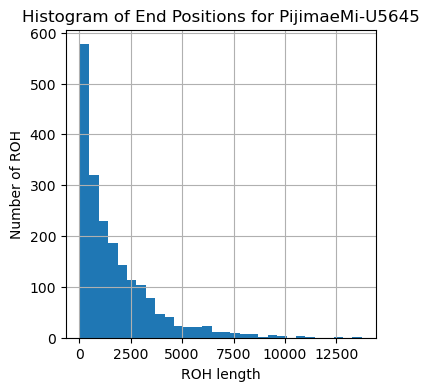

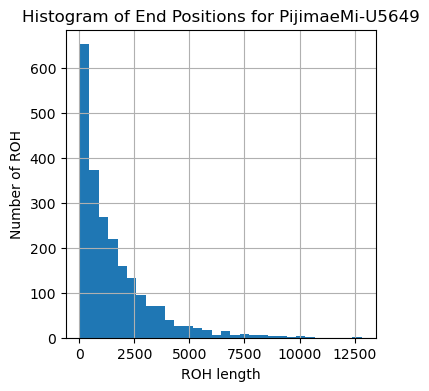

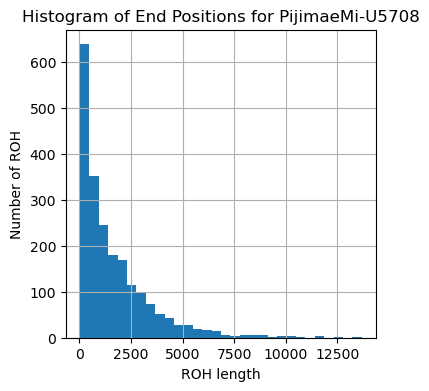

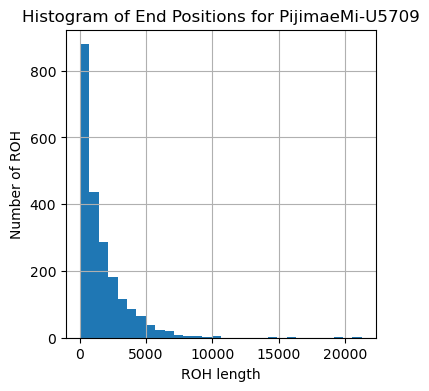

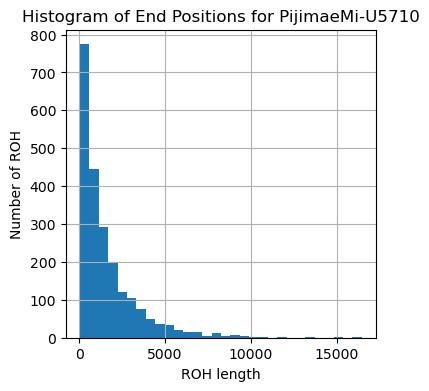

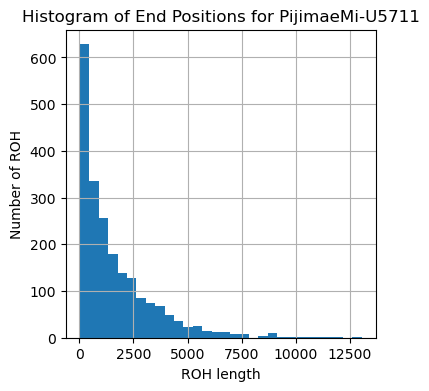

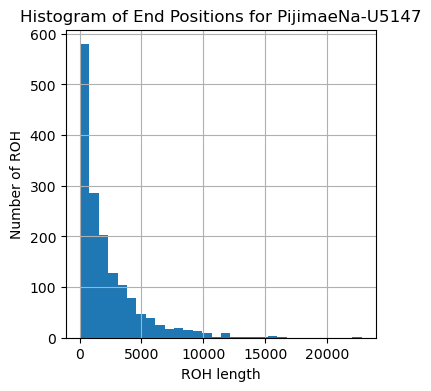

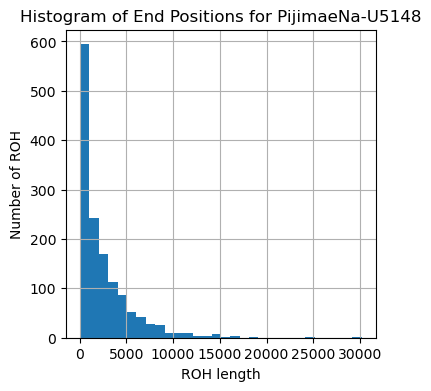

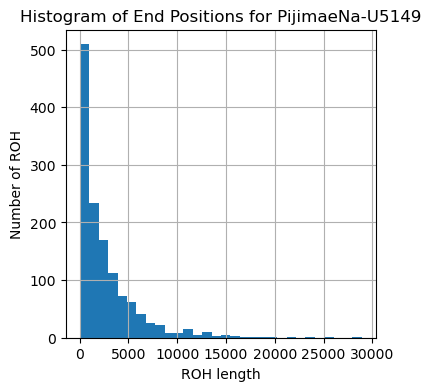

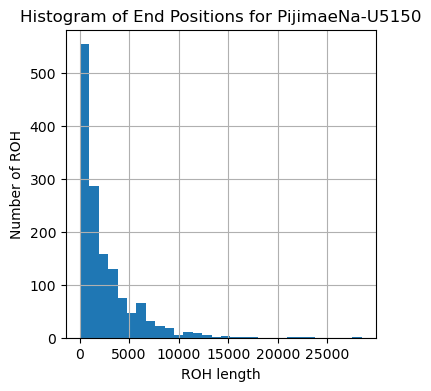

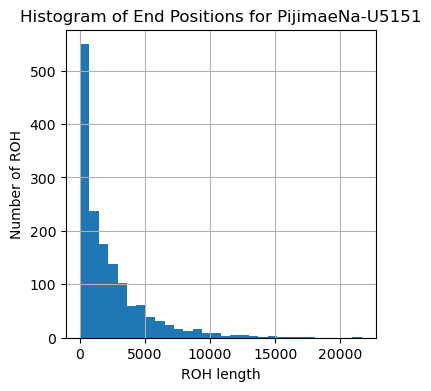

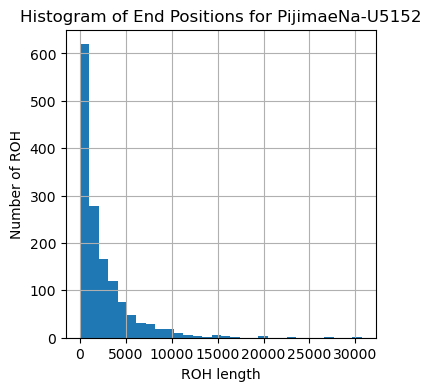

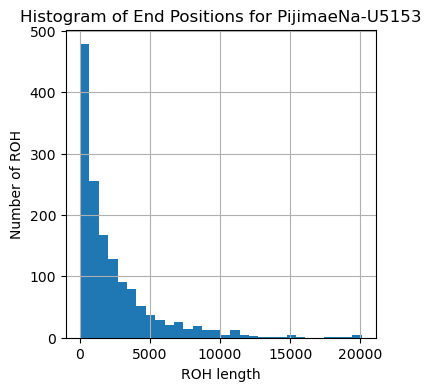

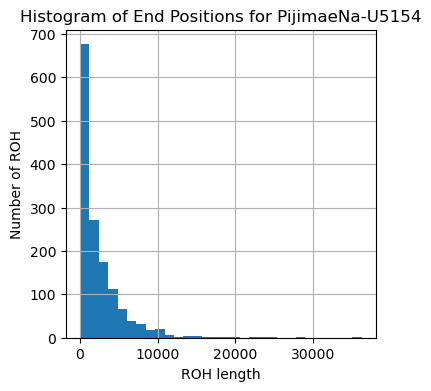

In [ ]:
import matplotlib.pyplot as plt

for sample_id in unique_ids:
    # Filter data for the current ID
    subset = df[df[1] == sample_id]
    
    # Plot histogram of the 'End' column
    plt.figure(figsize=(4, 4))
    subset[6].hist(bins=30)
    plt.title(f'Histogram of End Positions for {sample_id}')
    plt.xlabel('ROH length')
    plt.ylabel('Number of ROH')
    plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/"+sample_id+".png")
    plt.show()

In [ ]:
#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.qual.pdf",bbox_inches="tight")

# Composite figure conservation


NameError: name 'df_concat_Naka' is not defined

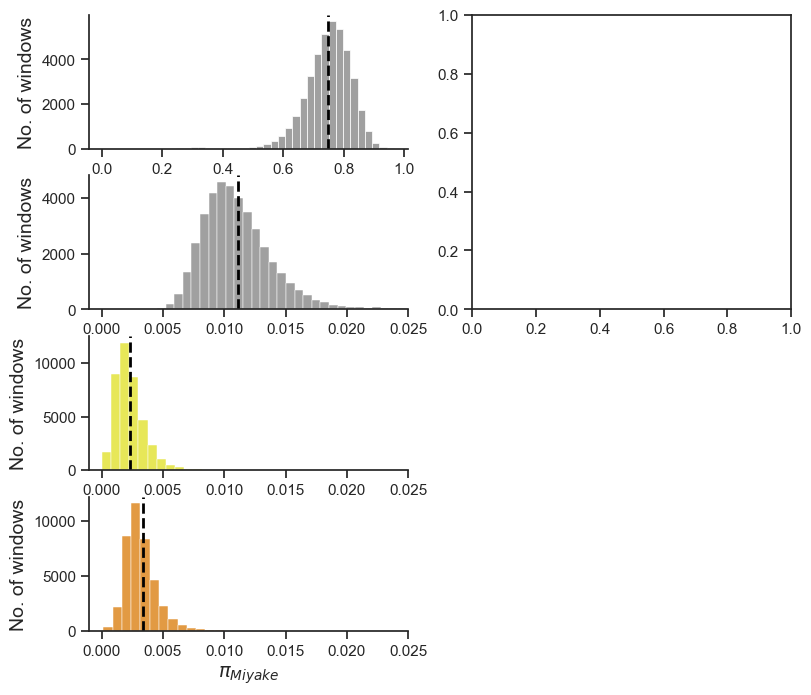

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

# Create a figure
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(4, 3, figure=fig)

# Data assumed to be available in `merged_all_df`

# Plot 1: Row 1, Column 1
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(merged_all_df['avg_hudson_fst'], kde=False, color="grey", bins=40, ax=ax1)
ax1.set_xlabel(r'$F_{st}$', size=14)
ax1.set_ylabel(r'No. of windows', size=14)
ax1.axvline(np.mean(merged_all_df['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
sns.despine(ax=ax1)

# Plot 2: Row 2, Column 1
ax2 = fig.add_subplot(gs[1, 0])
sns.histplot(merged_all_df['avg_dxy'], color="grey", bins=60, ax=ax2)
ax2.set_xlabel(r'$D_{xy}$', size=14)
ax2.set_ylabel(r'No. of windows', size=14)
ax2.set_xlim(-0.001,0.025)
ax2.axvline(np.mean(merged_all_df['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
sns.despine(ax=ax2)

# Plot 3: Row 3, Column 1
ax3 = fig.add_subplot(gs[2, 0])
sns.histplot(merged_all_df['avg_pi_Na'], color="#e0e020", bins=60, ax=ax3)
ax3.set_xlabel(r'$\pi_{Nakanoshima}$', size=14)
ax3.set_xlim(-0.001,0.025)
ax3.set_ylabel(r'No. of windows', size=14)
ax3.axvline(np.mean(merged_all_df['avg_pi_Na']), color='black', linestyle='dashed', linewidth=2)
sns.despine(ax=ax3)

# Plot 4: Row 4, Column 1
ax4 = fig.add_subplot(gs[3, 0])
sns.histplot(merged_all_df['avg_pi_Mi'], color="#d97904", bins=60, ax=ax4)
ax4.set_xlabel(r'$\pi_{Miyake}$', size=14)
ax4.set_ylabel(r'No. of windows', size=14)
ax4.set_xlim(-0.001,0.025)
ax4.axvline(np.mean(merged_all_df['avg_pi_Mi']), color='black', linestyle='dashed', linewidth=2)
sns.despine(ax=ax4)

# Plot 5: Rows 1 and 2, Column 2
ax5 = fig.add_subplot(gs[0:2, 1])

# Final plot code
bins = 7
hist_Naka, bin_edges = np.histogram(df_concat_Naka["maf"], bins=bins)
hist_Miya, _ = np.histogram(df_concat_Miya["maf"], bins=bin_edges)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = (bin_edges[1] - bin_edges[0]) / 2.4
ax5.bar(bin_centers - bin_width/2, hist_Naka, width=bin_width, color="#e0e020", alpha=1, label='Naka')
ax5.bar(bin_centers + bin_width/2, hist_Miya, width=bin_width, color="#d97904", alpha=1, label='Miya')
mean_freq_Naka = np.mean(df_concat_Naka["maf"])
mean_freq_Miya = np.mean(df_concat_Miya["maf"])
ax5.axvline(mean_freq_Naka, color="#e0e020", linestyle="dashed", linewidth=1)
ax5.axvline(mean_freq_Miya, color="#d97904", linestyle="dashed", linewidth=1)
ax5.set_xlabel("Allele Frequency")
ax5.set_ylabel("Count")
#ax5.set_title("Distribution of Allele Frequency")
ax5.legend()

# Plot 6: Rows 1 and 2, Column 3
ax6 = fig.add_subplot(gs[0:2, 2])
colors = ["#d97904"] * 6 + ["#e0e020"] * 8
sns.boxplot(x='INDV', y='F', data=df_concat_het, linewidth=1, palette=colors, ax=ax6)
#ax6.set_title('Box Plot of F Values by Individual and Chromosome')
ax6.set_xlabel('')
ax6.set_ylabel('F Value')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45)


# Plot 7: Rows 3 and 4, Columns 2 and 3
ax7 = fig.add_subplot(gs[2:4, 1])
bins = 15
# Calculate the histogram for both datasets
hist_naka, bin_edges = np.histogram(df_nakanoshima['Length (bp)'], bins=bins)
hist_miya, _ = np.histogram(df_miyake['Length (bp)'], bins=bin_edges)

# Calculate the bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Calculate the width of each bin
bin_width = (bin_edges[1] - bin_edges[0]) / 2.4

# Plot the histograms side by side
ax7.bar(bin_centers - bin_width/2, hist_naka, width=bin_width, color="#e0e020", alpha=1, label='Nakanoshima')
ax7.bar(bin_centers + bin_width/2, hist_miya, width=bin_width, color="#d97904", alpha=1, label='Miyake')

# Add mean lines for both datasets
mean_freq_naka = np.mean(df_nakanoshima['Length (bp)'])
mean_freq_miya = np.mean(df_miyake['Length (bp)'])
# ax7.axvline(mean_freq_naka, color="#e0e020", linestyle="dashed", linewidth=1)
# ax7.axvline(mean_freq_miya, color="#d97904", linestyle="dashed", linewidth=1)

# Add labels and title
ax7.set_xlabel("Length of ROH (bp)")
ax7.set_ylabel("Count")
# Set logarithmic scales
# ax7.set_xscale('log')
ax7.set_yscale('log')
ax7.legend()


# Plot 8: Rows 3 and 4, Columns 2 and 3
ax7 = fig.add_subplot(gs[2:4, 2])
# Define colors for each population
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakanoshima': '#e0e020' # Color for Nakanoshima
}

# Calculate average length values for each individual "Sample"
avg_lengths = roh.groupby('Sample')['Length (bp)'].mean().reset_index()

# Sort the DataFrame by the average Length (bp)
avg_lengths = avg_lengths.sort_values(by='Length (bp)', ascending=True).reset_index(drop=True)

# Determine the color for each sample based on the population
avg_lengths['Color'] = avg_lengths['Sample'].apply(lambda x: population_colors['Miyake'] if 'Mi' in x else population_colors['Nakanoshima'])

sns.barplot(x='Sample', y='Length (bp)', data=avg_lengths, palette=avg_lengths['Color'].tolist(), ax=ax7)
ax7.set_ylabel('Average Length (bp)')
ax7.set_xlabel('')
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45)
#ax7.set_yscale('log')
#ax7.set_title('Average Length (bp) by Sample')

# Adjust layout
plt.tight_layout()

plt.show()


#### Update for stats only

NameError: name 'df_concat_Naka' is not defined

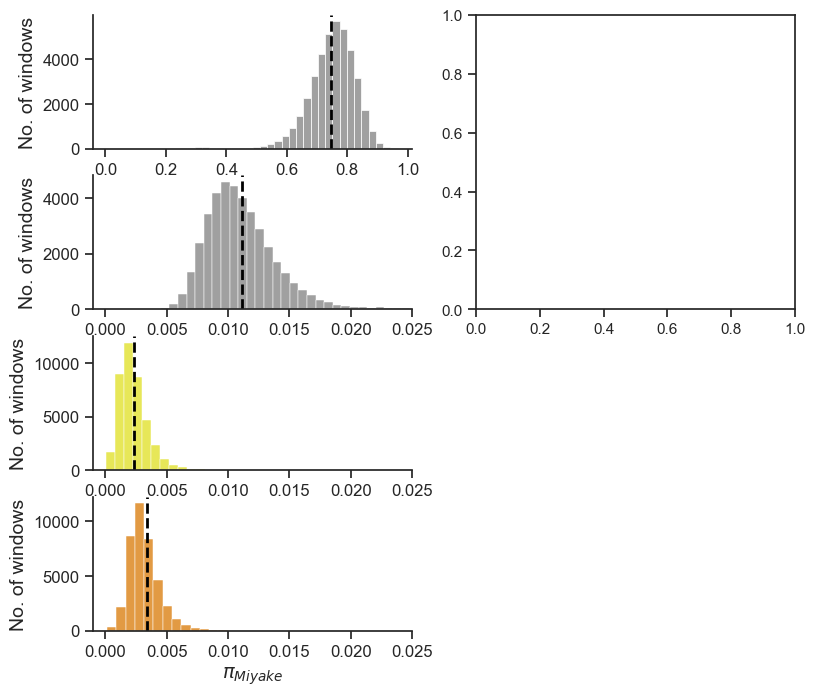

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

# Define common styles
common_fontsize = 14
common_labelsize = 12
common_tick_rotation = 45
common_legend_loc = 'upper right'

# Create a figure
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(4, 3, figure=fig)

# Data assumed to be available in `merged_all_df`

# Plot 1: Row 1, Column 1
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(df_main_sorted['avg_hudson_fst'][(df_main_sorted['avg_hudson_fst'] < 1950) | (df_main_sorted['avg_hudson_fst'] > 2310)], kde=False, color="grey", bins=40, ax=ax1)
ax1.set_xlabel(r'$F_{st}$', fontsize=common_fontsize)
ax1.set_ylabel(r'No. of windows', fontsize=common_fontsize)
ax1.axvline(np.mean(merged_all_df['avg_hudson_fst']), color='black', linestyle='dashed', linewidth=2)
sns.despine(ax=ax1)
ax1.tick_params(axis='both', which='major', labelsize=common_labelsize)

# Plot 2: Row 2, Column 1
ax2 = fig.add_subplot(gs[1, 0])
sns.histplot(df_main_sorted['avg_dxy'][(df_main_sorted['avg_dxy'] < 1950) | (df_main_sorted['avg_dxy'] > 2310)], color="grey", bins=60, ax=ax2)
ax2.set_xlabel(r'$D_{xy}$', fontsize=common_fontsize)
ax2.set_ylabel(r'No. of windows', fontsize=common_fontsize)
ax2.set_xlim(-0.001, 0.025)
ax2.axvline(np.mean(merged_all_df['avg_dxy']), color='black', linestyle='dashed', linewidth=2)
sns.despine(ax=ax2)
ax2.tick_params(axis='both', which='major', labelsize=common_labelsize)

# Plot 3: Row 3, Column 1
ax3 = fig.add_subplot(gs[2, 0])
sns.histplot(df_main_sorted['avg_pi_Na'][(df_main_sorted['avg_pi_Na'] < 1950) | (df_main_sorted['avg_pi_Na'] > 2310)], color="#e0e020", bins=60, ax=ax3)
ax3.set_xlabel(r'$\pi_{Nakanoshima}$', fontsize=common_fontsize)
ax3.set_xlim(-0.001, 0.025)
ax3.set_ylabel(r'No. of windows', fontsize=common_fontsize)
ax3.axvline(np.mean(merged_all_df['avg_pi_Na']), color='black', linestyle='dashed', linewidth=2)
sns.despine(ax=ax3)
ax3.tick_params(axis='both', which='major', labelsize=common_labelsize)

# Plot 4: Row 4, Column 1
ax4 = fig.add_subplot(gs[3, 0])
sns.histplot(df_main_sorted['avg_pi_Mi'][(df_main_sorted['avg_pi_Mi'] < 1950) | (df_main_sorted['avg_pi_Mi'] > 2310)], color="#d97904", bins=60, ax=ax4)
ax4.set_xlabel(r'$\pi_{Miyake}$', fontsize=common_fontsize)
ax4.set_ylabel(r'No. of windows', fontsize=common_fontsize)
ax4.set_xlim(-0.001, 0.025)
ax4.axvline(np.mean(merged_all_df['avg_pi_Mi']), color='black', linestyle='dashed', linewidth=2)
sns.despine(ax=ax4)
ax4.tick_params(axis='both', which='major', labelsize=common_labelsize)

# Plot 5: Rows 1 and 2, Column 2
ax5 = fig.add_subplot(gs[0:2, 1])
bins = 7
hist_Naka, bin_edges = np.histogram(df_concat_Naka["maf"], bins=bins)
hist_Miya, _ = np.histogram(df_concat_Miya["maf"], bins=bin_edges)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = (bin_edges[1] - bin_edges[0]) / 2.4
ax5.bar(bin_centers - bin_width/2, hist_Naka, width=bin_width, color="#e0e020", alpha=1, label='Naka')
ax5.bar(bin_centers + bin_width/2, hist_Miya, width=bin_width, color="#d97904", alpha=1, label='Miya')
mean_freq_Naka = np.mean(df_concat_Naka["maf"])
mean_freq_Miya = np.mean(df_concat_Miya["maf"])
ax5.axvline(mean_freq_Naka, color="#e0e020", linestyle="dashed", linewidth=1)
ax5.axvline(mean_freq_Miya, color="#d97904", linestyle="dashed", linewidth=1)
ax5.set_xlabel("Allele Frequency", fontsize=common_fontsize)
ax5.set_ylabel("Count", fontsize=common_fontsize)
ax5.legend(loc=common_legend_loc)
ax5.tick_params(axis='both', which='major', labelsize=common_labelsize)

# Plot 6: Rows 1 and 2, Column 3
ax6 = fig.add_subplot(gs[0:2, 2])
colors = ["#d97904"] * 6 + ["#e0e020"] * 8
sns.boxplot(x='INDV', y='F', data=df_concat_het, linewidth=1, palette=colors, ax=ax6)
ax6.set_xlabel('', fontsize=common_fontsize)
ax6.set_ylabel('F Value', fontsize=common_fontsize)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=common_tick_rotation)
ax6.tick_params(axis='both', which='major', labelsize=common_labelsize)

# Plot 7: Rows 3 and 4, Columns 2 and 3
ax7 = fig.add_subplot(gs[2:4, 1])
bins = 15
hist_naka, bin_edges = np.histogram(df_nakanoshima['Length (bp)'], bins=bins)
hist_miya, _ = np.histogram(df_miyake['Length (bp)'], bins=bin_edges)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = (bin_edges[1] - bin_edges[0]) / 2.4
ax7.bar(bin_centers - bin_width/2, hist_naka, width=bin_width, color="#e0e020", alpha=1, label='Nakanoshima')
ax7.bar(bin_centers + bin_width/2, hist_miya, width=bin_width, color="#d97904", alpha=1, label='Miyake')
ax7.set_xlabel("Length of ROH (bp)", fontsize=common_fontsize)
ax7.set_ylabel("Count", fontsize=common_fontsize)
ax7.set_yscale('log')
ax7.legend(loc=common_legend_loc)
ax7.tick_params(axis='both', which='major', labelsize=common_labelsize)

# Plot 8: Rows 3 and 4, Columns 2 and 3
ax8 = fig.add_subplot(gs[2:4, 2])
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakanoshima': '#e0e020' # Color for Nakanoshima
}
avg_lengths = roh.groupby('Sample')['Length (bp)'].mean().reset_index()
avg_lengths = avg_lengths.sort_values(by='Length (bp)', ascending=True).reset_index(drop=True)
avg_lengths['Color'] = avg_lengths['Sample'].apply(lambda x: population_colors['Miyake'] if 'Mi' in x else population_colors['Nakanoshima'])
sns.barplot(x='Sample', y='Length (bp)', data=avg_lengths, palette=avg_lengths['Color'].tolist(), ax=ax8)
ax8.set_ylabel('Average Length (bp)', fontsize=common_fontsize)
ax8.set_xlabel('', fontsize=common_fontsize)
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=common_tick_rotation)
ax8.tick_params(axis='both', which='major', labelsize=common_labelsize)

# Adjust layout
plt.tight_layout()

#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/Figures/conservation.png")
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/Figures/conservation.pdf")
plt.show()


# df_main_sorted['avg_pi_Mi']

df_main_sorted[(df_main_sorted['avg_hudson_fst'] < 1950) | (df_main_sorted['avg_hudson_fst'] > 2310)]

In [ ]:
df_main_sorted['avg_hudson_fst'][(df_main_sorted['avg_hudson_fst'] < 1950) | (df_main_sorted['avg_hudson_fst'] > 2310)]

39670    0.699079
39671    0.809486
39672    0.723477
39675    0.844177
39676    0.656616
           ...   
14807    0.874433
14808    0.810043
14809    0.809049
14810    0.847187
14811    0.865034
Name: avg_hudson_fst, Length: 40387, dtype: float64

## F roh

<Axes: xlabel='Sample', ylabel='Length (bp)'>

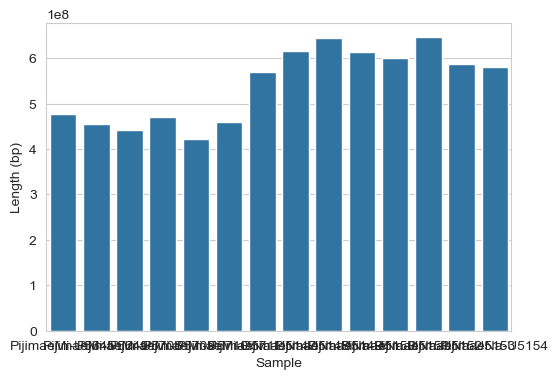

In [ ]:
roh = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_RGHQ.tsv", sep="\t", skiprows=1, names=["RG","Sample","Chromosome","Start","End","Length (bp)","Number of markers","Quality (average fwd-bwd phred score)"])
roh

# Extract 'Mi' and 'Na' and replace them with 'Miyake' and 'Nakanoshima'
roh['Location'] = roh['Sample'].apply(lambda x: 'Miyake' if 'Mi' in x else 'Nakanoshima' if 'Na' in x else 'Unknown')

length_sum = roh.groupby("Sample")["Length (bp)"].sum().reset_index()
length_sum["Froh"]=length_sum["Length (bp)"]/1159332207
length_sum
#set_xticklabels(ax8.get_xticklabels(), rotation=common_tick_rotation)
# 1,159,332,207

sns.barplot(x='Sample', y='Length (bp)', data=length_sum)

In [ ]:
roh


RG           Sample      Chromosome    Start      End  Length (bp)  \
0       RG  PijimaeMi-U5645  VHQE01000408.1    27459    85021        57563   
1       RG  PijimaeMi-U5645  VHQE01000408.1    88377    89474         1098   
2       RG  PijimaeMi-U5645  VHQE01000408.1   115391   132473        17083   
3       RG  PijimaeMi-U5645  VHQE01000408.1   178859   191987        13129   
4       RG  PijimaeMi-U5645  VHQE01000408.1   250946   255142         4197   
...     ..              ...             ...      ...      ...          ...   
235058  RG  PijimaeNa-U5154  VHQE01000492.1   895573   926159        30587   
235059  RG  PijimaeNa-U5154  VHQE01000492.1   934240   990566        56327   
235060  RG  PijimaeNa-U5154  VHQE01000492.1   998658  1054173        55516   
235061  RG  PijimaeNa-U5154  VHQE01000492.1  1194200  1215118        20919   
235062  RG  PijimaeNa-U5154  VHQE01000492.1  1215383  1226105        10723   

        Number of markers  Quality (average fwd-bwd phred score)     Location  
0                    1220                                   84.9       Miyake  
1                      33                                   36.0       Miyake  
2                     159                                   68.2       Miyake  
3                     178                                   63.1       Miyake  
4                     107                                   33.2       Miyake  
...                   ...                                    ...          ...  
235058                146                                   69.7  Nakanoshima  
235059                558                                   71.9  Nakanoshima  
235060                319                                   44.9  Nakanoshima  
235061                174                                   33.8  Nakanoshima  
235062                121                                   48.6  Nakanoshima  

[235063 rows x 9 columns]

In [ ]:
avg_lengths = roh.groupby('Sample')['Length (bp)'].mean().reset_index()
avg_lengths = avg_lengths.sort_values(by='Length (bp)', ascending=True).reset_index(drop=True)
avg_lengths['Color'] = avg_lengths['Sample'].apply(lambda x: population_colors['Miyake'] if 'Mi' in x else population_colors['Nakanoshima'])
sns.barplot(x='Sample', y='Length (bp)', data=avg_lengths, palette=avg_lengths['Color'].tolist(), ax=ax8)
#ax8.set_ylabel('Average Length (bp)', fontsize=common_fontsize)
#ax8.set_xlabel('', fontsize=common_fontsize)
#ax8.set_xticklabels(ax8.get_xticklabels(), rotation=common_tick_rotation)
#ax8.tick_params(axis='both', which='major', labelsize=common_labelsize)

# Adjust layout
plt.tight_layout()

#plt.savefig("/Users/dshipilina/GitHub/M.britomartis_genomics/Work_DSh/britomartis_all_mcaller.miss20.inbr.pdf",bbox_inches="tight")
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/Figures/conservation.png")
#plt.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/Figures/conservation.pdf")
plt.show()

NameError: name 'roh' is not defined

In [ ]:
import pandas as pd

# Assuming df_concat is your DataFrame and you want to sort by column 'F'
# Replace 'F' with the column name you want to sort by

df_concat_sorted = df_concat.sort_values(by='F', ascending=True)

# Save or display the sorted DataFrame if needed
# For example, to save to a new CSV file:
df_concat_sorted.to_csv('df_concat_sorted.csv', index=False)

# Display the first few rows of the sorted DataFrame
print(df_concat_sorted.head())


                INDV   O(HOM)     E(HOM)  N_SITES        F  Chromosome
0    PijimaeMi-U5649  1381005  1363852.1  1862335  0.03441           1
1    PijimaeMi-U5709  1396425  1363606.8  1861972  0.06585           1
112  PijimaeMi-U5710   547924   426512.1   615259  0.64325           9
113  PijimaeMi-U5649   548135   426403.7   615123  0.64504           9
114  PijimaeMi-U5709   550307   426339.6   615022  0.65702           9


## SFS

In [ ]:
df_list = []

for i in range(2, 10):
    ind_depth1 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region" + str(i) + ".allsitesNew_variant.het", sep="\t", skiprows=1, names=["INDV", "O(HOM)", "E(HOM)", "N_SITES", "F"])

    # Modify 'INDV' column to remove redundancy
    ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'F'
    ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    ind_depth_sorted1['Chromosome'] = i
    
    df_list.append(ind_depth_sorted1)

# Concatenate all DataFrames in the list into a single DataFrame
df_concat_het = pd.concat(df_list, ignore_index=True)

df_concat_het

INDV  O(HOM)    E(HOM)  N_SITES        F  Chromosome
0    PijimaeMi-U5710  974177  751057.9  1085598  0.66694           2
1    PijimaeMi-U5649  976644  750875.9  1085342  0.67501           2
2    PijimaeMi-U5709  977164  750873.6  1085309  0.67663           2
3    PijimaeMi-U5708  979268  750996.7  1085506  0.68241           2
4    PijimaeMi-U5711  980015  750851.8  1085266  0.68527           2
..               ...     ...       ...      ...      ...         ...
107  PijimaeNa-U5151  572542  426417.0   615119  0.77437           9
108  PijimaeNa-U5150  572845  426320.7   614975  0.77668           9
109  PijimaeNa-U5148  573879  426435.4   615138  0.78135           9
110  PijimaeNa-U5149  575585  426371.6   615047  0.79085           9
111  PijimaeNa-U5152  584784  426340.9   615009  0.83980           9

[112 rows x 6 columns]

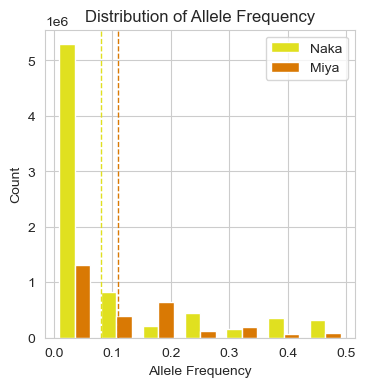

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_concat_Naka and df_concat_Miya are the dataframes with 'maf' column

# Define the number of bins
bins = 7

# Calculate the histogram for both datasets
hist_Naka, bin_edges = np.histogram(df_concat_Naka["maf"], bins=bins)
hist_Miya, _ = np.histogram(df_concat_Miya["maf"], bins=bin_edges)

# Calculate the bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Calculate the width of each bin
bin_width = (bin_edges[1] - bin_edges[0]) / 2.7

# Plot the histograms side by side
plt.figure(figsize=(4, 4))
plt.bar(bin_centers - bin_width/2, hist_Naka, width=bin_width, color="#e0e020", alpha=1, label='Naka')
plt.bar(bin_centers + bin_width/2, hist_Miya, width=bin_width, color="#d97904", alpha=1, label='Miya')

# Add mean lines for both datasets
mean_freq_Naka = np.mean(df_concat_Naka["maf"])
mean_freq_Miya = np.mean(df_concat_Miya["maf"])
plt.axvline(mean_freq_Naka, color="#e0e020", linestyle="dashed", linewidth=1)
plt.axvline(mean_freq_Miya, color="#d97904", linestyle="dashed", linewidth=1)

# Add labels and title
plt.xlabel("Allele Frequency")
plt.ylabel("Count")
plt.title("Distribution of Allele Frequency")
plt.legend()

plt.show()


In [ ]:
for i in range(2, 10):
    ind_depth1 = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/vcfQC_analysis/Pijimae.region" + str(i) + ".allsitesNew_variant.het", sep="\t", skiprows=1, names=["INDV", "O(HOM)", "E(HOM)", "N_SITES", "F"])

    # Modify 'INDV' column to remove redundancy
    ind_depth1["INDV"] = ind_depth1["INDV"].apply(lambda x: "_".join(x.split("_")[:3]))

    # Sort the DataFrame by 'F'
    ind_depth_sorted1 = ind_depth1.sort_values(by="F", ascending=True)
    
    # Add the chromosome number column
    ind_depth_sorted1['Chromosome'] = i
    
    df_list.append(ind_depth_sorted1)

# Concatenate all DataFrames in the list into a single DataFrame
df_concat_het = pd.concat(df_list, ignore_index=True)


In [ ]:
roh = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/ROH/ROH_Pijimae_RGHQ.tsv", sep="\t", skiprows=1, names=["RG","Sample","Chromosome","Start","End","Length (bp)","Number of markers","Quality (average fwd-bwd phred score)"])
roh

# Extract 'Mi' and 'Na' and replace them with 'Miyake' and 'Nakanoshima'
roh['Location'] = roh['Sample'].apply(lambda x: 'Miyake' if 'Mi' in x else 'Nakanoshima' if 'Na' in x else 'Unknown')
roh

RG           Sample      Chromosome    Start      End  Length (bp)  \
0       RG  PijimaeMi-U5645  VHQE01000408.1    27459    85021        57563   
1       RG  PijimaeMi-U5645  VHQE01000408.1    88377    89474         1098   
2       RG  PijimaeMi-U5645  VHQE01000408.1   115391   132473        17083   
3       RG  PijimaeMi-U5645  VHQE01000408.1   178859   191987        13129   
4       RG  PijimaeMi-U5645  VHQE01000408.1   250946   255142         4197   
...     ..              ...             ...      ...      ...          ...   
235058  RG  PijimaeNa-U5154  VHQE01000492.1   895573   926159        30587   
235059  RG  PijimaeNa-U5154  VHQE01000492.1   934240   990566        56327   
235060  RG  PijimaeNa-U5154  VHQE01000492.1   998658  1054173        55516   
235061  RG  PijimaeNa-U5154  VHQE01000492.1  1194200  1215118        20919   
235062  RG  PijimaeNa-U5154  VHQE01000492.1  1215383  1226105        10723   

        Number of markers  Quality (average fwd-bwd phred score)     Location  
0                    1220                                   84.9       Miyake  
1                      33                                   36.0       Miyake  
2                     159                                   68.2       Miyake  
3                     178                                   63.1       Miyake  
4                     107                                   33.2       Miyake  
...                   ...                                    ...          ...  
235058                146                                   69.7  Nakanoshima  
235059                558                                   71.9  Nakanoshima  
235060                319                                   44.9  Nakanoshima  
235061                174                                   33.8  Nakanoshima  
235062                121                                   48.6  Nakanoshima  

[235063 rows x 9 columns]

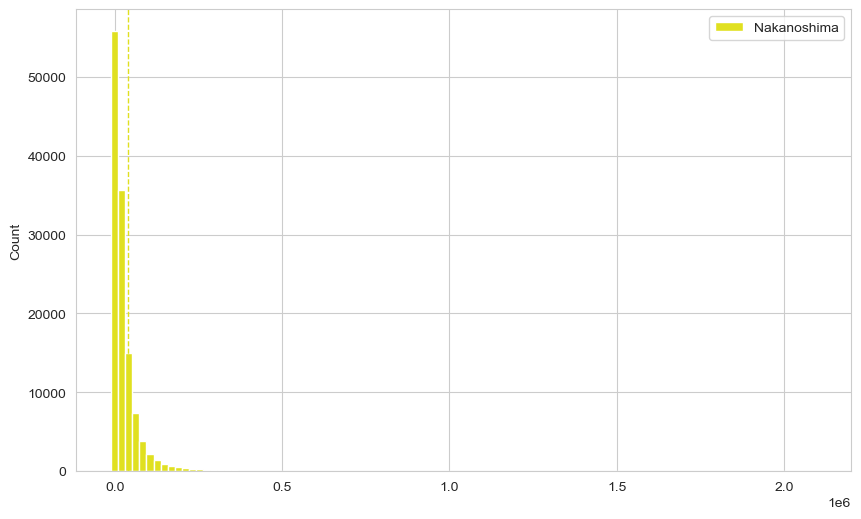

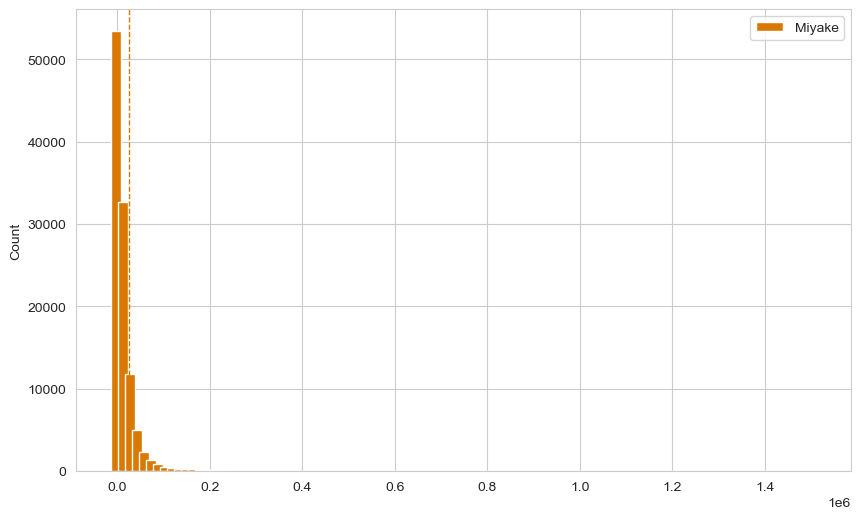

In [ ]:
# Separate the data based on Location
df_nakanoshima = roh[roh['Location'] == 'Nakanoshima']
df_miyake = roh[roh['Location'] == 'Miyake']

# Plot histograms for Nakanoshima and Miyake separately

# Nakanoshima
plt.figure(figsize=(10, 6))
bins = 100
hist_naka, bin_edges = np.histogram(df_nakanoshima['Length (bp)'], bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_width = (bin_edges[1] - bin_edges[0]) / 1
plt.bar(bin_centers - bin_width/2, hist_naka, width=bin_width, color="#e0e020", alpha=1, label='Nakanoshima')
mean_freq_naka = np.mean(df_nakanoshima['Length (bp)'])
plt.axvline(mean_freq_naka, color="#e0e020", linestyle="dashed", linewidth=1)
#plt.xlabel("Quality")
plt.ylabel("Count")
#plt.title("Distribution of Quality - Nakanoshima")
plt.legend()
plt.show()

# Miyake
plt.figure(figsize=(10, 6))
hist_miya, bin_edges = np.histogram(df_miyake['Length (bp)'], bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.bar(bin_centers - bin_width/2, hist_miya, width=bin_width, color="#d97904", alpha=1, label='Miyake')
mean_freq_miya = np.mean(df_miyake['Length (bp)'])
plt.axvline(mean_freq_miya, color="#d97904", linestyle="dashed", linewidth=1)
#plt.xlabel("Quality")
plt.ylabel("Count")
#plt.title("Distribution of Quality - Miyake")
plt.legend()
plt.show()

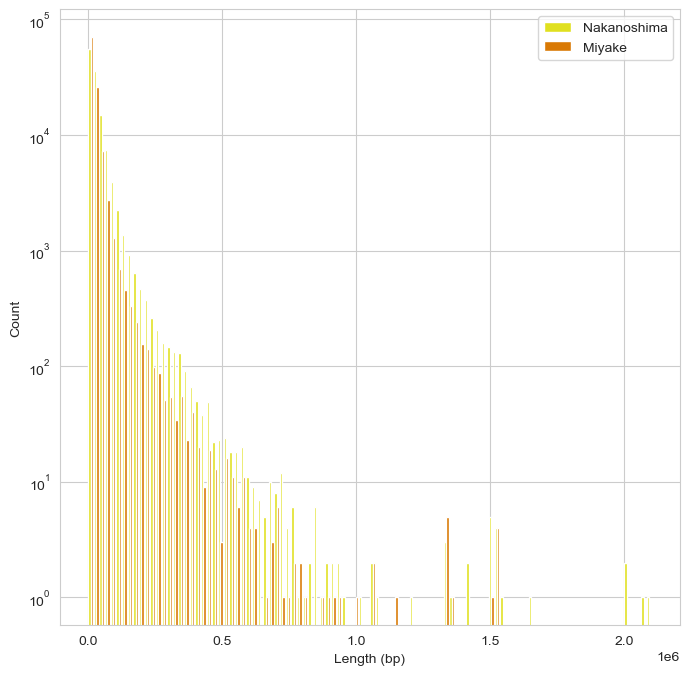

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_891/2206971551.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sample', y='Length (bp)', data=avg_lengths, palette=avg_lengths['Color'].tolist())


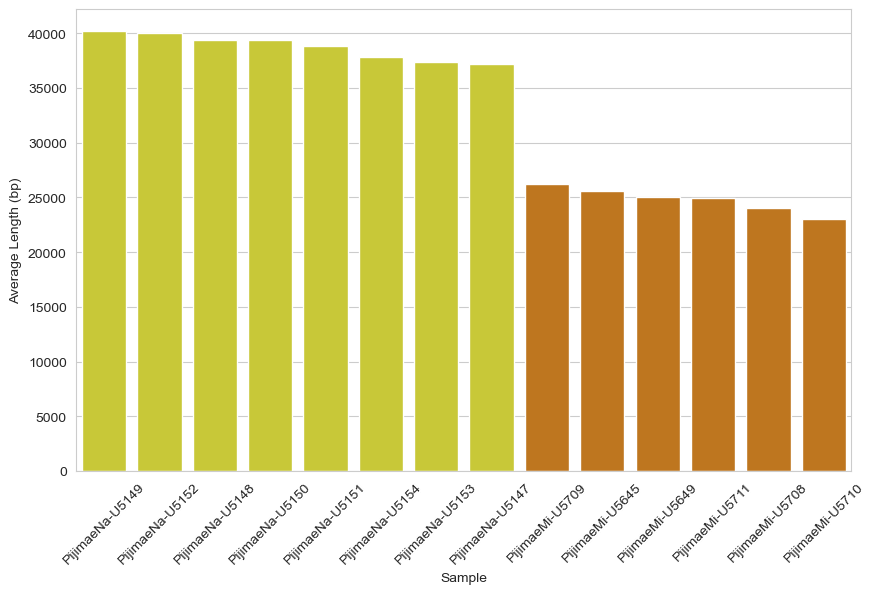

In [ ]:
# Calculate the histogram for both datasets
hist_naka, bin_edges = np.histogram(df_nakanoshima['Length (bp)'], bins=bins)
hist_miya, _ = np.histogram(df_miyake['Length (bp)'], bins=bin_edges)

bins = 20

# Calculate the bin centers
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Calculate the width of each bin
bin_width = (bin_edges[1] - bin_edges[0]) / 2.4

# Plot the histograms side by side
plt.figure(figsize=(8, 8))
plt.bar(bin_centers - bin_width/2, hist_naka, width=bin_width, color="#e0e020", alpha=1, label='Nakanoshima')
plt.bar(bin_centers + bin_width/2, hist_miya, width=bin_width, color="#d97904", alpha=1, label='Miyake')

# Add mean lines for both datasets
mean_freq_naka = np.mean(df_nakanoshima['Length (bp)'])
mean_freq_miya = np.mean(df_miyake['Length (bp)'])
#plt.axvline(mean_freq_naka, color="#e0e020", linestyle="dashed", linewidth=1)
#plt.axvline(mean_freq_miya, color="#d97904", linestyle="dashed", linewidth=1)

# Add labels and title
plt.xlabel("Length (bp)")
plt.ylabel("Count")
# Set logarithmic scales
#plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.show()


# Define colors for each population
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakanoshima': '#e0e020' # Color for Nakanoshima
}

# Calculate average length values for each individual "Sample"
avg_lengths = roh.groupby('Sample')['Length (bp)'].mean().reset_index()

# Sort the DataFrame by the average Length (bp)
avg_lengths = avg_lengths.sort_values(by='Length (bp)', ascending=False).reset_index(drop=True)

# Determine the color for each sample based on the population
avg_lengths['Color'] = avg_lengths['Sample'].apply(lambda x: population_colors['Miyake'] if 'Mi' in x else population_colors['Nakanoshima'])

# Plot the average lengths for each individual "Sample" with custom colors
plt.figure(figsize=(10, 6))
sns.barplot(x='Sample', y='Length (bp)', data=avg_lengths, palette=avg_lengths['Color'].tolist())
plt.ylabel('Average Length (bp)')
plt.xticks(rotation=45)
#plt.yscale('log')
plt.show()

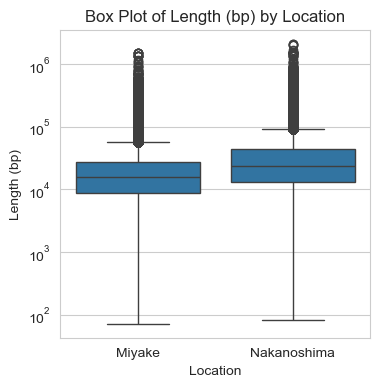

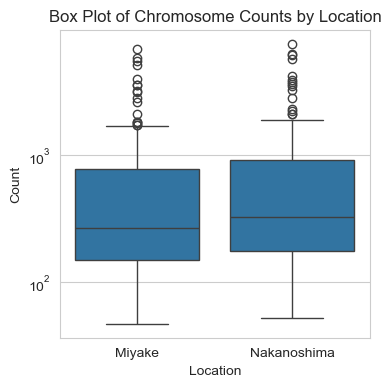

In [ ]:
# Plot 1: Box plot of "Length (bp)" with categories Nakanoshima and Miyake
plt.figure(figsize=(4, 4))
sns.boxplot(x='Location', y='Length (bp)', data=roh)
plt.title('Box Plot of Length (bp) by Location')
plt.xlabel('Location')
plt.ylabel('Length (bp)')
plt.yscale('log')
plt.show()

# Plot 2: Total count of entries per chromosome for each of the populations
# Calculate the counts per chromosome for each location
counts = roh.groupby(['Location', 'Chromosome']).size().reset_index(name='Count')

plt.figure(figsize=(4, 4))
sns.boxplot(x='Location', y='Count', data=counts)
plt.title('Box Plot of Chromosome Counts by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(df_nakanoshima['Length (bp)'], df_miyake['Length (bp)'])

print(f"Mann-Whitney U Test: U statistic = {stat}, p-value = {p_value}")


Mann-Whitney U Test: U statistic = 8668005975.0, p-value = 0.0


In [ ]:
counts


Location      Chromosome  Count
0         Miyake  VHQE01000001.1   5820
1         Miyake  VHQE01000002.1   1325
2         Miyake  VHQE01000003.1    170
3         Miyake  VHQE01000004.1    203
4         Miyake  VHQE01000010.1     82
..           ...             ...    ...
295  Nakanoshima  VHQE01000479.1    109
296  Nakanoshima  VHQE01000480.1    134
297  Nakanoshima  VHQE01000487.1    341
298  Nakanoshima  VHQE01000492.1    106
299  Nakanoshima  VHQE01000497.1   1048

[300 rows x 3 columns]

In [ ]:
df_nakanoshima


RG           Sample      Chromosome    Start      End  Length (bp)  \
6903    RG  PijimaeNa-U5147  VHQE01000408.1     1633    21404        19772   
6904    RG  PijimaeNa-U5147  VHQE01000408.1    27293    61894        34602   
6905    RG  PijimaeNa-U5147  VHQE01000408.1    63584    94764        31181   
6906    RG  PijimaeNa-U5147  VHQE01000408.1   103015   143689        40675   
6907    RG  PijimaeNa-U5147  VHQE01000408.1   144234   162666        18433   
...     ..              ...             ...      ...      ...          ...   
235058  RG  PijimaeNa-U5154  VHQE01000492.1   895573   926159        30587   
235059  RG  PijimaeNa-U5154  VHQE01000492.1   934240   990566        56327   
235060  RG  PijimaeNa-U5154  VHQE01000492.1   998658  1054173        55516   
235061  RG  PijimaeNa-U5154  VHQE01000492.1  1194200  1215118        20919   
235062  RG  PijimaeNa-U5154  VHQE01000492.1  1215383  1226105        10723   

        Number of markers  Quality (average fwd-bwd phred score)     Location  
6903                  151                                   43.7  Nakanoshima  
6904                  738                                   68.9  Nakanoshima  
6905                  623                                   84.7  Nakanoshima  
6906                  366                                   67.7  Nakanoshima  
6907                  199                                   70.1  Nakanoshima  
...                   ...                                    ...          ...  
235058                146                                   69.7  Nakanoshima  
235059                558                                   71.9  Nakanoshima  
235060                319                                   44.9  Nakanoshima  
235061                174                                   33.8  Nakanoshima  
235062                121                                   48.6  Nakanoshima  

[125215 rows x 9 columns]

Mann-Whitney U Test for Counts: U statistic = 12299.0, p-value = 0.16280938577823867


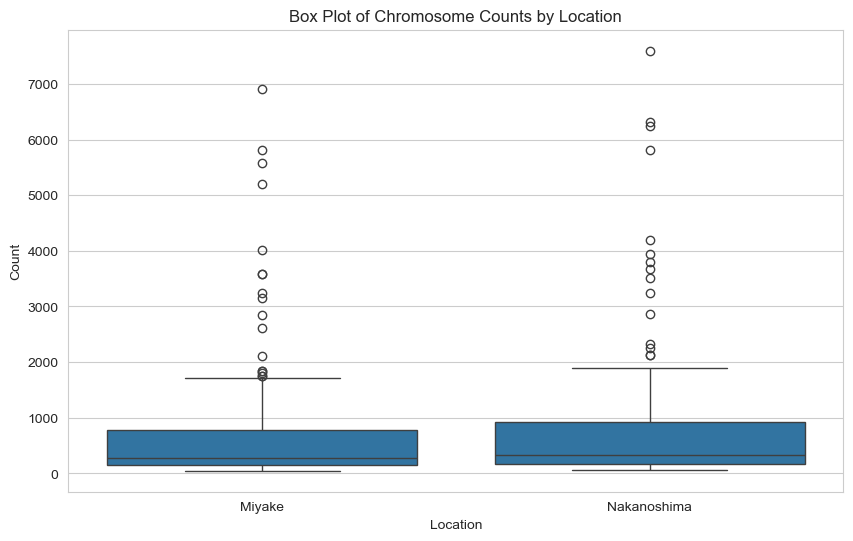

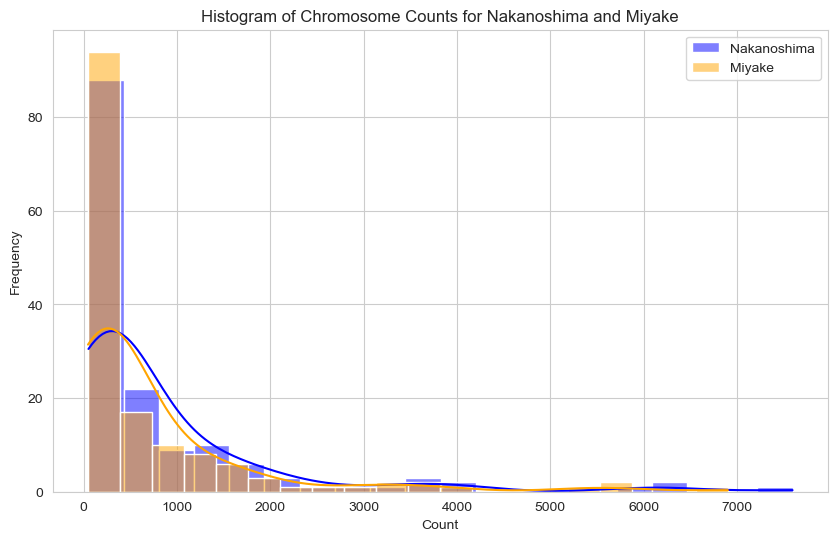

In [ ]:
# Separate the data based on Location
counts_nakanoshima = counts[counts['Location'] == 'Nakanoshima']['Count']
counts_miyake = counts[counts['Location'] == 'Miyake']['Count']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(counts_nakanoshima, counts_miyake)

print(f"Mann-Whitney U Test for Counts: U statistic = {stat}, p-value = {p_value}")

# Plot box plot for counts
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Count', data=counts)
plt.title('Box Plot of Chromosome Counts by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

# Plot histograms for counts
plt.figure(figsize=(10, 6))
sns.histplot(counts_nakanoshima, color='blue', kde=True, label='Nakanoshima', bins=20)
sns.histplot(counts_miyake, color='orange', kde=True, label='Miyake', bins=20)
plt.title('Histogram of Chromosome Counts for Nakanoshima and Miyake')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

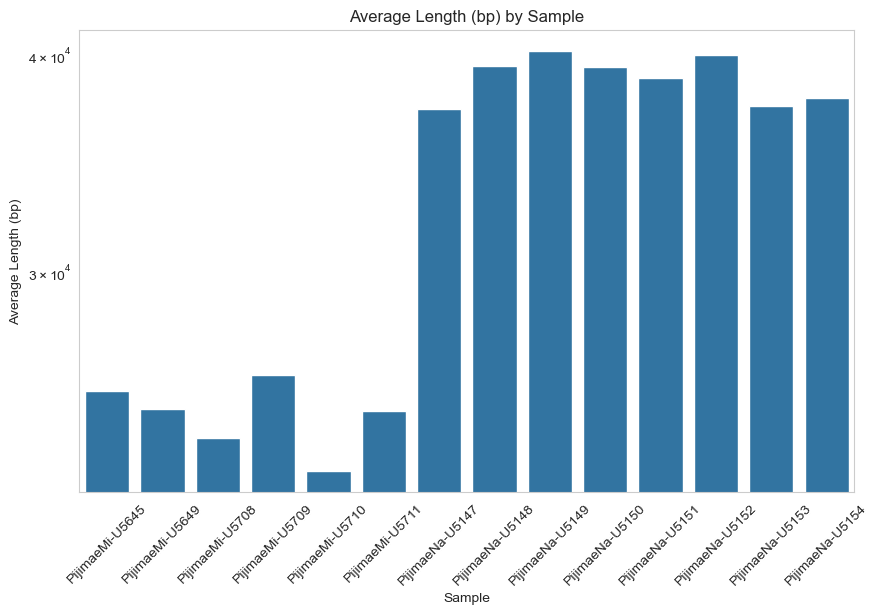

In [ ]:
# Calculate average length values for each individual "Sample"
avg_lengths = roh.groupby('Sample')['Length (bp)'].mean().reset_index()

# Plot the average lengths for each individual "Sample"
plt.figure(figsize=(10, 6))
sns.barplot(x='Sample', y='Length (bp)', data=avg_lengths)
plt.title('Average Length (bp) by Sample')
plt.xlabel('Sample')
plt.ylabel('Average Length (bp)')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

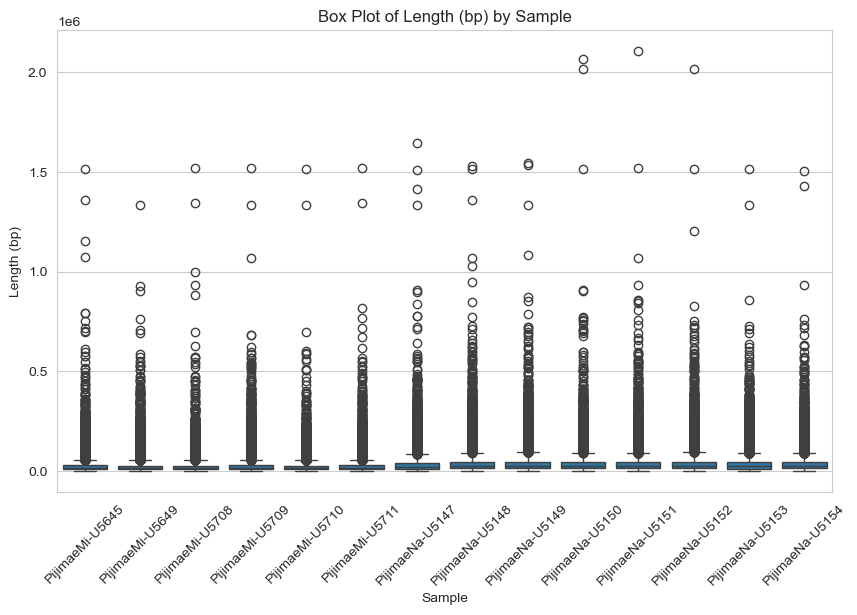

In [ ]:
# Box plot for each individual "Sample"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sample', y='Length (bp)', data=roh)
plt.title('Box Plot of Length (bp) by Sample')
plt.xlabel('Sample')
plt.ylabel('Length (bp)')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

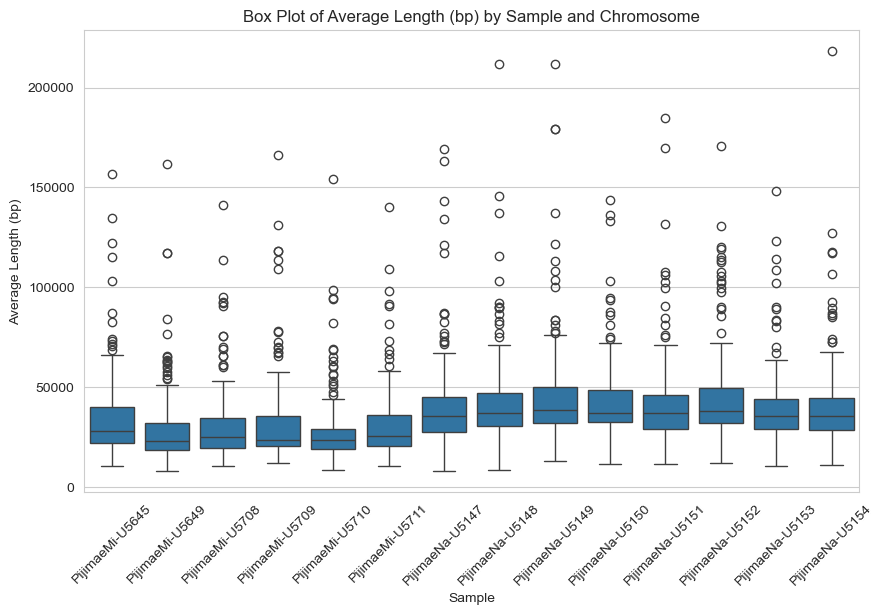

In [ ]:
# Calculate average length values per chromosome for each individual "Sample"
avg_lengths_per_chr = roh.groupby(['Sample', 'Chromosome'])['Length (bp)'].mean().reset_index()

# Plot the average lengths for each individual "Sample"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sample', y='Length (bp)', data=avg_lengths_per_chr)
plt.title('Box Plot of Average Length (bp) by Sample and Chromosome')
plt.xlabel('Sample')
plt.ylabel('Average Length (bp)')
plt.xticks(rotation=45)
#plt.yscale('log')
plt.show()

# Tajima's D

<Axes: ylabel='TajD'>

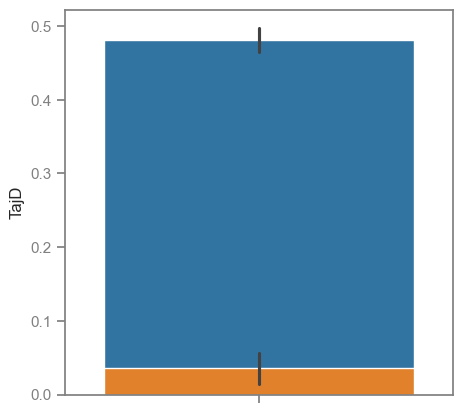

In [ ]:
tajdNaka = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/Pijimae_Nakano_noindel_variant_Qfilter_19reg_biall_private.Tajima.tsv.Tajima.D", sep="\t", skiprows=1, names=["Contig","Coordinate","NSNPs","TajD"])
tajdMiya = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/Pijimae_Miyake_noindel_variant_Qfilter_19reg_biall_private.Tajima.tsv.Tajima.D", sep="\t", skiprows=1, names=["Contig","Coordinate","NSNPs","TajD"])
tajdMiya

sns.barplot(y='TajD', data=tajdNaka)
sns.barplot(y='TajD', data=tajdMiya)

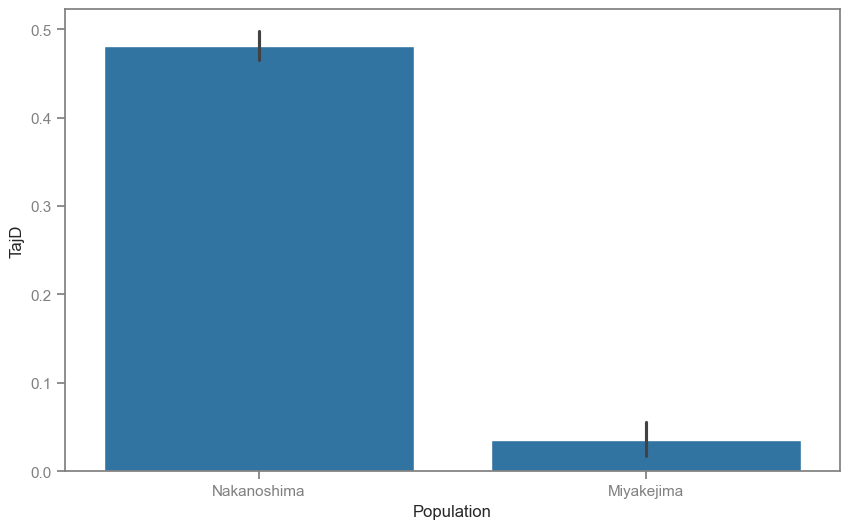

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data and add a column for population label
tajdNaka = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/Pijimae_Nakano_noindel_variant_Qfilter_19reg_biall_private.Tajima.tsv.Tajima.D", sep="\t", skiprows=1, names=["Contig","Coordinate","NSNPs","TajD"])
tajdMiya = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/Pijimae_Miyake_noindel_variant_Qfilter_19reg_biall_private.Tajima.tsv.Tajima.D", sep="\t", skiprows=1, names=["Contig","Coordinate","NSNPs","TajD"])

# Add a new column to indicate the population
tajdNaka['Population'] = 'Nakanoshima'
tajdMiya['Population'] = 'Miyakejima'

# Concatenate the two DataFrames
combined_data = pd.concat([tajdNaka, tajdMiya])

# Plot the data using seaborn with bars grouped by population
plt.figure(figsize=(10,6))
sns.barplot(x='Population', y='TajD', data=combined_data)

# Show the plot
plt.show()


/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_38672/3649375947.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Population', y='TajD', data=combined_data, palette=population_colors)


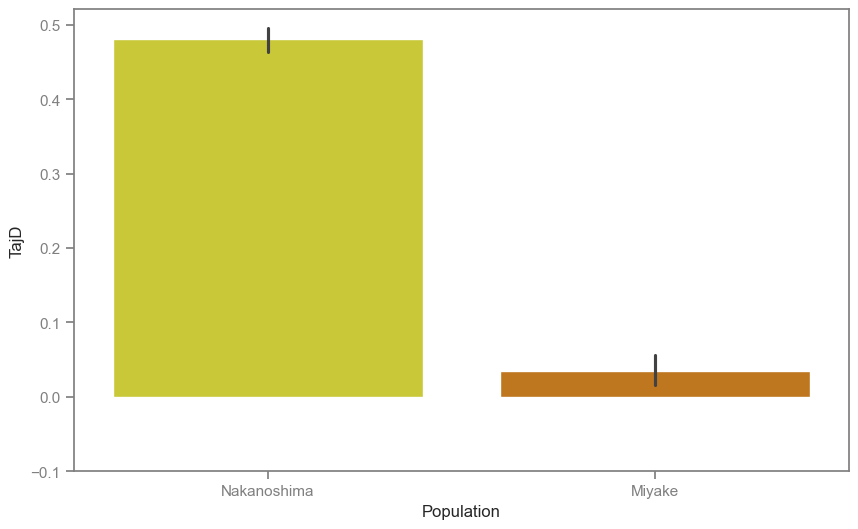

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data and add a column for population label
tajdNaka = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/Pijimae_Nakano_noindel_variant_Qfilter_19reg_biall_private.Tajima.tsv.Tajima.D", sep="\t", skiprows=1, names=["Contig","Coordinate","NSNPs","TajD"])
tajdMiya = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/Pijimae_Miyake_noindel_variant_Qfilter_19reg_biall_private.Tajima.tsv.Tajima.D", sep="\t", skiprows=1, names=["Contig","Coordinate","NSNPs","TajD"])

# Add a new column to indicate the population
tajdNaka['Population'] = 'Nakanoshima'
tajdMiya['Population'] = 'Miyake'

# Concatenate the two DataFrames
combined_data = pd.concat([tajdNaka, tajdMiya])

# Define the colors for the populations
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakanoshima': '#e0e020' # Color for Nakanoshima
}

# Plot the data using seaborn with bars grouped by population and apply the color palette
plt.figure(figsize=(10,6))
sns.barplot(x='Population', y='TajD', data=combined_data, palette=population_colors)

# Set y-axis limit to -0.1
plt.ylim(-0.1, None)

# Show the plot
plt.show()


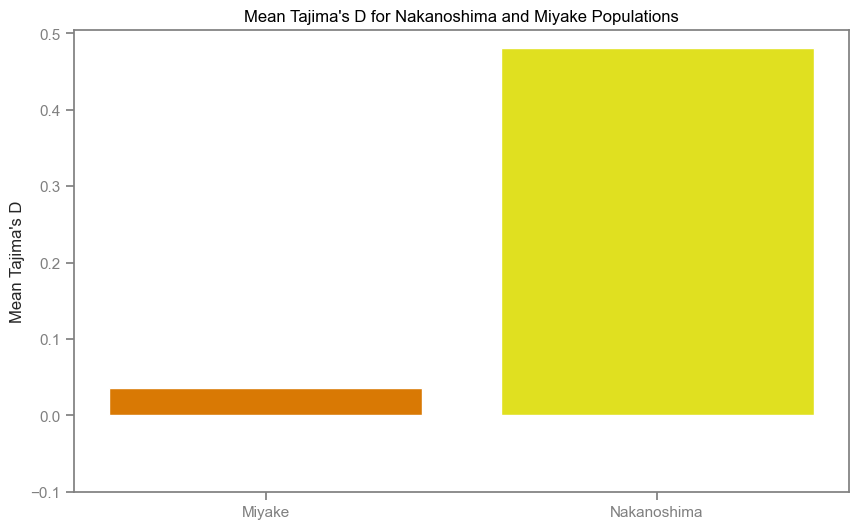

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data and add a column for population label
tajdNaka = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/Pijimae_Nakano_noindel_variant_Qfilter_19reg_biall_private.Tajima.tsv.Tajima.D", sep="\t", skiprows=1, names=["Contig","Coordinate","NSNPs","TajD"])
tajdMiya = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/Pijimae_Miyake_noindel_variant_Qfilter_19reg_biall_private.Tajima.tsv.Tajima.D", sep="\t", skiprows=1, names=["Contig","Coordinate","NSNPs","TajD"])

# Add a new column to indicate the population
tajdNaka['Population'] = 'Nakanoshima'
tajdMiya['Population'] = 'Miyake'

# Concatenate the two DataFrames
combined_data = pd.concat([tajdNaka, tajdMiya])

# Define the colors for the populations
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakanoshima': '#e0e020' # Color for Nakanoshima
}

# Create the plot using matplotlib
plt.figure(figsize=(10,6))

# Group by population and plot bars
for population, color in population_colors.items():
    subset = combined_data[combined_data['Population'] == population]
    plt.bar(population, subset['TajD'].mean(), color=color)

# Set y-axis limit to -0.1
plt.ylim(-0.1, None)

# Set labels
plt.ylabel("Mean Tajima's D")
plt.title("Mean Tajima's D for Nakanoshima and Miyake Populations")

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

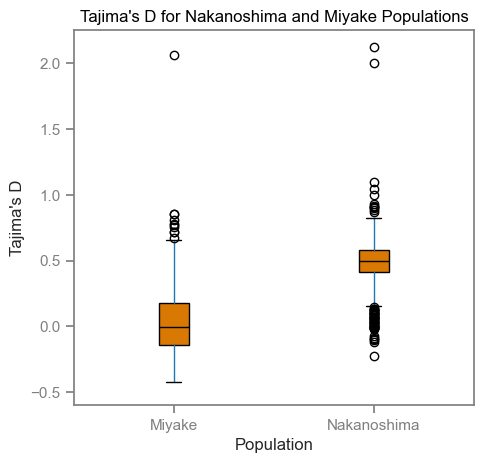

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the colors for the populations
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakanoshima': '#e0e020' # Color for Nakanoshima
}

# Create the box plot using matplotlib
plt.figure(figsize=(10,6))

# Create a box plot with Tajima's D values for each population
combined_data.boxplot(column='TajD', by='Population', grid=False, patch_artist=True,
                      boxprops=dict(facecolor='#d97904', color='black'),
                      medianprops=dict(color='black'))

# Customize plot appearance
plt.title("Tajima's D for Nakanoshima and Miyake Populations")
plt.suptitle("")  # Remove the automatic boxplot title
plt.ylabel("Tajima's D")
plt.ylim(-0.6, None)

# Show the plot
plt.show()


/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_38672/2174878428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Population', y='TajD', data=combined_data, palette=population_colors)


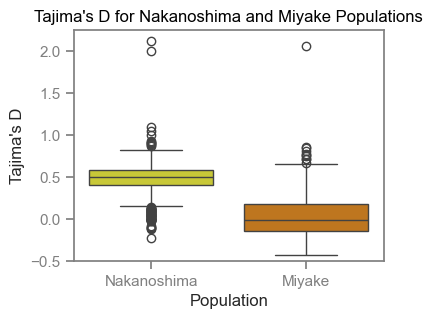

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Population', y='TajD', data=combined_data, palette=population_colors)

# Customize plot appearance
plt.title("Tajima's D for Nakanoshima and Miyake Populations")
plt.ylabel("Tajima's D")
plt.ylim(-0.5, None)

# Show the plot
plt.show()

# Fig 4B

/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/1080397856.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df, x="population", y="tajimas_D",
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/wd/5cnt3g5s4wg97vnf4qw6vr680000gn/T/ipykernel_87210/1080397856.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


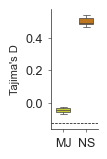

In [ ]:
pop2_df = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/pop2_tajimasD.csv", sep=",")
pop3_df = pd.read_csv("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/pop3_tajimasD.csv", sep=",")
pop1_value = -0.124997  # Tajima's D for coronatus

pop2_df["population"] = "MJ"
pop3_df["population"] = "NS"
combined_df = pd.concat([pop2_df, pop3_df], ignore_index=True)

# === Styling ===
sns.set_context("notebook")
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(0.6, 1.55))

# === Boxplot ===
sns.boxplot(data=combined_df, x="population", y="tajimas_D",
            palette=["#e0e020", "#d97904"], ax=ax, width=0.6, linewidth=0.5)

for artist in ax.artists:
    artist.set_edgecolor("none")  # remove box outline

# === Add Pop1 mean line ===
pop1_value = -0.124997  # Replace with actual if dynamic
ax.axhline(pop1_value, linestyle="--", color="black", linewidth=0.5) #, label="P. coronatus")

# === Customize axes ===
ax.set_ylabel("Tajima's D", fontsize=8)
ax.set_xlabel("")
ax.tick_params(width=0.4, length=2.5, labelsize=9) 

# Thin axis spines
for spine in ax.spines.values():
    spine.set_linewidth(0.5)

# === Legend ===
ax.legend(title="", loc="upper left", fontsize=9, frameon=False)

# === Finalize ===
sns.despine()
plt.tight_layout()

# === Save ===
fig.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/tajimasD_boxplot_pubstyle.pdf", bbox_inches="tight")
fig.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/TajimasD/tajimasD_boxplot_pubstyle.png", bbox_inches="tight")
plt.show()

# Fig 4 D

In [ ]:
# Data for Miya and Nakano
categories = ['HIGH', 'LOW', 'MODERATE', 'MODIFIER']
miya_counts = [3175, 137141, 100393, 8956888]
nakano_counts = [2809, 105492, 85399, 6795754]

miya_percent = [0.03452, 1.491052, 1.091513, 97.382914]
nakano_percent = [0.040189, 1.509302, 1.221826, 97.228682]

# Define colors for the populations
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakanoshima': '#e0e020' # Color for Nakanoshima
}

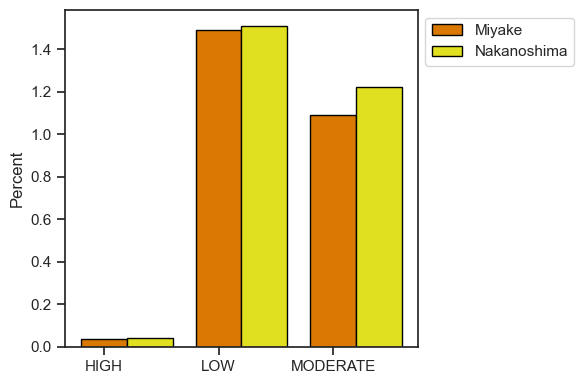

In [ ]:
# Create a figure for the plot
plt.figure(figsize=(6, 4))  # Adjusted figure size for better layout

# Plot Miya (Miyake) data
plt.bar(categories_filtered, miya_percent_filtered, color=population_colors['Miyake'], edgecolor='black', width=0.4, label='Miyake')

# Plot Nakano (Nakanoshima) data, slightly offset for better visibility
plt.bar([x + 0.4 for x in range(len(categories_filtered))], nakano_percent_filtered, color=population_colors['Nakanoshima'], edgecolor='black', width=0.4, label='Nakanoshima')

# Add labels and title
plt.ylabel('Percent')  # Changed from xlabel to ylabel since the bars are now vertical
#plt.title('Variant Impact Distribution (without MODIFIER)')

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

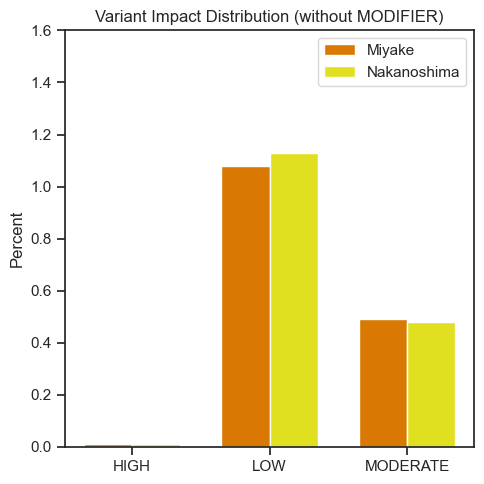

In [ ]:
#realized load

import matplotlib.pyplot as plt
import numpy as np

# Data for Miyake and Nakanoshima
categories = ["HIGH", "LOW", "MODERATE"]
miyake_percent = [0.011, 1.08, 0.49]
nakano_percent = [0.0096, 1.13, 0.48]

# Applying previously used colors for the populations
miyake_color = '#d97904'  # Miyake color
nakano_color = '#e0e020' 

# Adjusting the plot to have a square shape
fig, ax = plt.subplots(figsize=(5, 5))  # Setting equal dimensions for width and height
bars1 = ax.bar(x - width/2, miyake_percent, width, label="Miyake", color=miyake_color)
bars2 = ax.bar(x + width/2, nakano_percent, width, label="Nakanoshima", color=nakano_color)

# Add text for labels, title, and axes
ax.set_ylabel("Percent")
ax.set_title("Variant Impact Distribution (without MODIFIER)")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Set y-axis limit with specific ticks
ax.set_ylim(0, 1.6)
ax.set_yticks(np.arange(0, 1.7, 0.2))  # Ensuring proper ticks at intervals of 0.2

# Show the plot
plt.tight_layout()
plt.show()

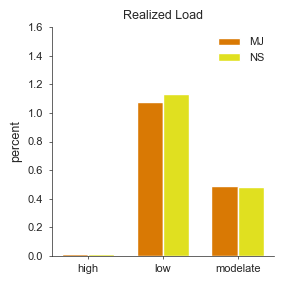

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style globally
sns.set_context("notebook")
sns.set_style("ticks")

def plot_load_barplot(mj_values, ns_values, title="Variant Impact Distribution (without MODIFIER)", save_path=None):
    categories = ["high", "low", "modelate"]
    colors = {"MJ": "#d97904", "NS": "#e0e020"}
    x = np.arange(len(categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(3, 3))  # Small, publication-style figure

    # Plot bars
    bars_mj = ax.bar(x - width/2, mj_values, width, label="MJ", color=colors["MJ"])
    bars_ns = ax.bar(x + width/2, ns_values, width, label="NS", color=colors["NS"])

    # Axes and labels
    ax.set_ylabel("percent", fontsize=9)
    ax.set_title(title, fontsize=9)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=9)
    ax.set_yticks(np.arange(0, 1.7, 0.2))
    ax.set_ylim(0, 1.6)
    ax.tick_params(width=0.5, length=2.5, labelsize=8)

    # Thin spines
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    ax.legend(title="", fontsize=8, frameon=False)

    sns.despine()
    plt.tight_layout()

    # Save if requested
    if save_path:
        fig.savefig(save_path, bbox_inches="tight")
    
    plt.show()

# Example usage for realized load
realized_mj = [0.011, 1.08, 0.49]
realized_ns = [0.0096, 1.13, 0.48]

plot_load_barplot(realized_mj, realized_ns, title="Realized Load")


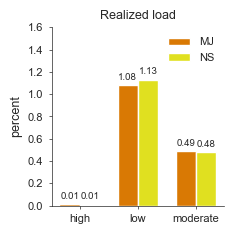

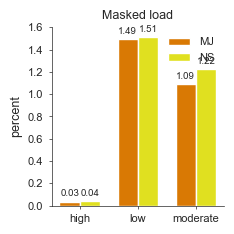

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set consistent style
sns.set_context("notebook")
sns.set_style("ticks")

def plot_load_barplot(mj_values, ns_values, title="Variant Impact Distribution (without MODIFIER)", save_path=None):
    categories = ["high", "low", "moderate"]
    colors = {"MJ": "#d97904", "NS": "#e0e020"}
    x = np.arange(len(categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(2.5, 2.5))

    # Plot bars
    bars_mj = ax.bar(x - width/2, mj_values, width, label="MJ", color=colors["MJ"])
    bars_ns = ax.bar(x + width/2, ns_values, width, label="NS", color=colors["NS"])

    # Add value labels above each bar
    for bar in bars_mj + bars_ns:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.03,
            f"{height:.2f}",
            ha='center',
            va='bottom',
            fontsize=7
        )

    # Axes and labels
    ax.set_ylabel("percent", fontsize=9)
    ax.set_title(title, fontsize=9)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=9)
    ax.set_yticks(np.arange(0, 1.7, 0.2))
    ax.set_ylim(0, 1.6)
    ax.tick_params(width=0.5, length=2.5, labelsize=8)

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    ax.legend(title="", fontsize=8, frameon=False)

    sns.despine()
    plt.tight_layout()

    if save_path:
        fig.savefig(save_path, bbox_inches="tight")
    
    plt.show()


# Example usage for realized load
realized_mj = [0.011, 1.08, 0.49]
realized_ns = [0.0096, 1.13, 0.48]

plot_load_barplot(realized_mj, realized_ns, title="Realized load",save_path="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/realized_load_pubstyle2.pdf")

save_path="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/realized_load_pubstyle2.pdf"
#fig.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/realized_load_pubstyle.png", bbox_inches="tight")

masked_mj = [0.03452, 1.491052, 1.091513]
masked_ns = [0.040189, 1.509302, 1.221826]

##masked_mj = [0.03452, 1.491052, 1.091513, 97.382914]
#masked_ns = [0.040189, 1.509302, 1.221826, 97.228682]

plot_load_barplot(masked_mj, masked_ns, title="Masked load",save_path="/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/masked_load_pubstyle.pdf")
#fig.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/masked_load_pubstyle.pdf", bbox_inches="tight")
#fig.savefig("/Users/dshipilina/GitHub/Phylloscopus/Ph.ijiimae/masked_load_pubstyle.png", bbox_inches="tight")





# New composite figure

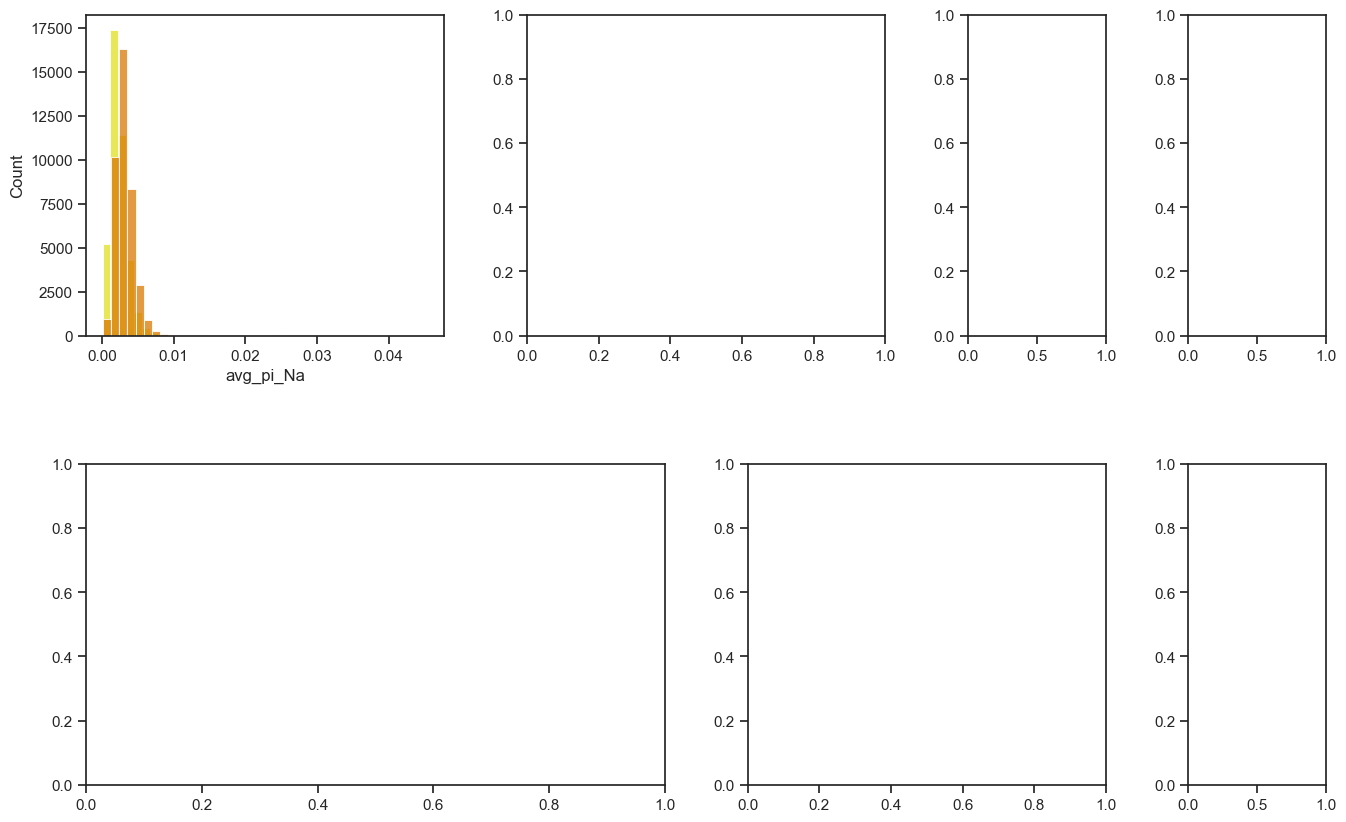

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(16, 10))  # adjust figure size as needed

# Define GridSpec: 2 rows, 6 columns for flexible layout
gs = gridspec.GridSpec(2, 6, height_ratios=[1, 1], hspace=0.4, wspace=0.6)

# First row
ax1 = fig.add_subplot(gs[0, 0:2])  # Nakanoshima π
sns.histplot(merged_all_df['avg_pi_Na'], color="#e0e020", bins=40)
sns.histplot(merged_all_df['avg_pi_Mi'], color="#d97904", bins=40)
#
ax2 = fig.add_subplot(gs[0, 2:4])  # Miyake π
#sns.histplot(merged_all_df['avg_pi_Mi'], color="#d97904", bins=40)
ax3 = fig.add_subplot(gs[0, 4])    # Tajima's D or ROH dist
ax4 = fig.add_subplot(gs[0, 5])    # ROH by length class

# Second row
ax5 = fig.add_subplot(gs[1, 0:3])  # log histogram of allele frequency
ax6 = fig.add_subplot(gs[1, 3:5])  # Realized Load
ax7 = fig.add_subplot(gs[1, 5])    # Masked Load

# Nakanoshima π
#sns.histplot(merged_all_df['avg_pi_Na'], color="#e0e020", bins=40)


plt.show()


# Deleterious load


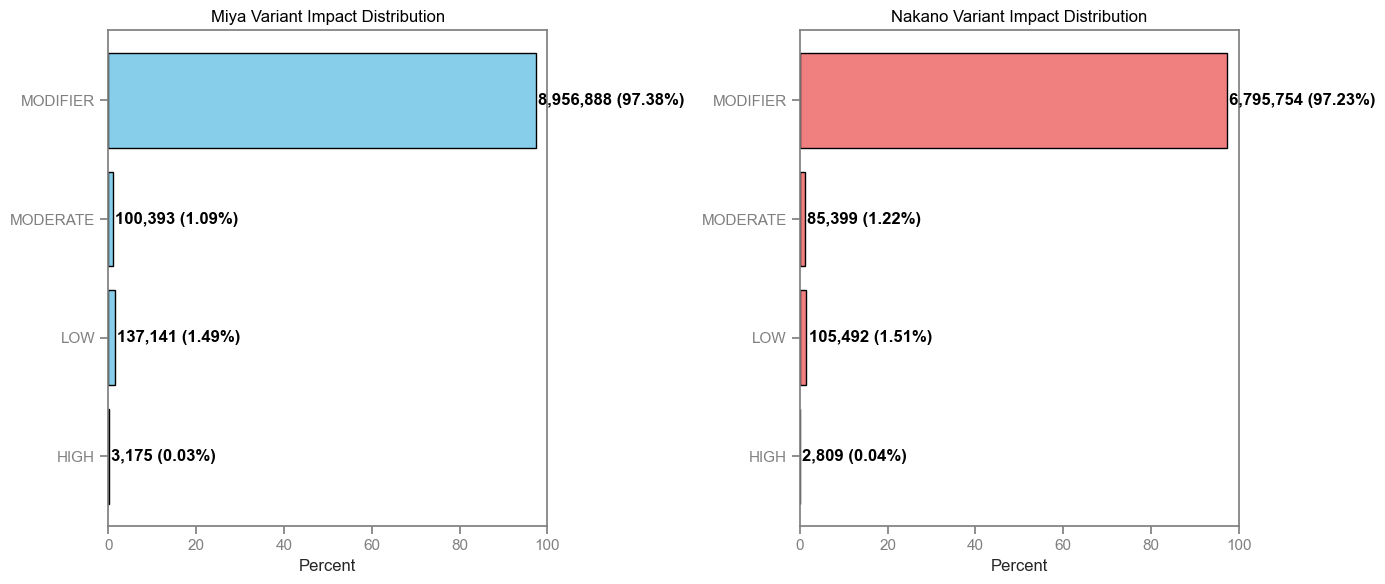

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Miya and Nakano
categories = ['HIGH', 'LOW', 'MODERATE', 'MODIFIER']
miya_counts = [3175, 137141, 100393, 8956888]
nakano_counts = [2809, 105492, 85399, 6795754]

miya_percent = [0.03452, 1.491052, 1.091513, 97.382914]
nakano_percent = [0.040189, 1.509302, 1.221826, 97.228682]

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Miya
ax[0].barh(categories, miya_percent, color='skyblue', edgecolor='black')
ax[0].set_title('Miya Variant Impact Distribution')
ax[0].set_xlabel('Percent')
ax[0].set_xlim(0, 100)

# Annotate the bars with count values
for i, v in enumerate(miya_counts):
    ax[0].text(miya_percent[i] + 0.5, i, f"{v:,} ({miya_percent[i]:.2f}%)", va='center', fontweight='bold')

# Plot for Nakano
ax[1].barh(categories, nakano_percent, color='lightcoral', edgecolor='black')
ax[1].set_title('Nakano Variant Impact Distribution')
ax[1].set_xlabel('Percent')
ax[1].set_xlim(0, 100)

# Annotate the bars with count values
for i, v in enumerate(nakano_counts):
    ax[1].text(nakano_percent[i] + 0.5, i, f"{v:,} ({nakano_percent[i]:.2f}%)", va='center', fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


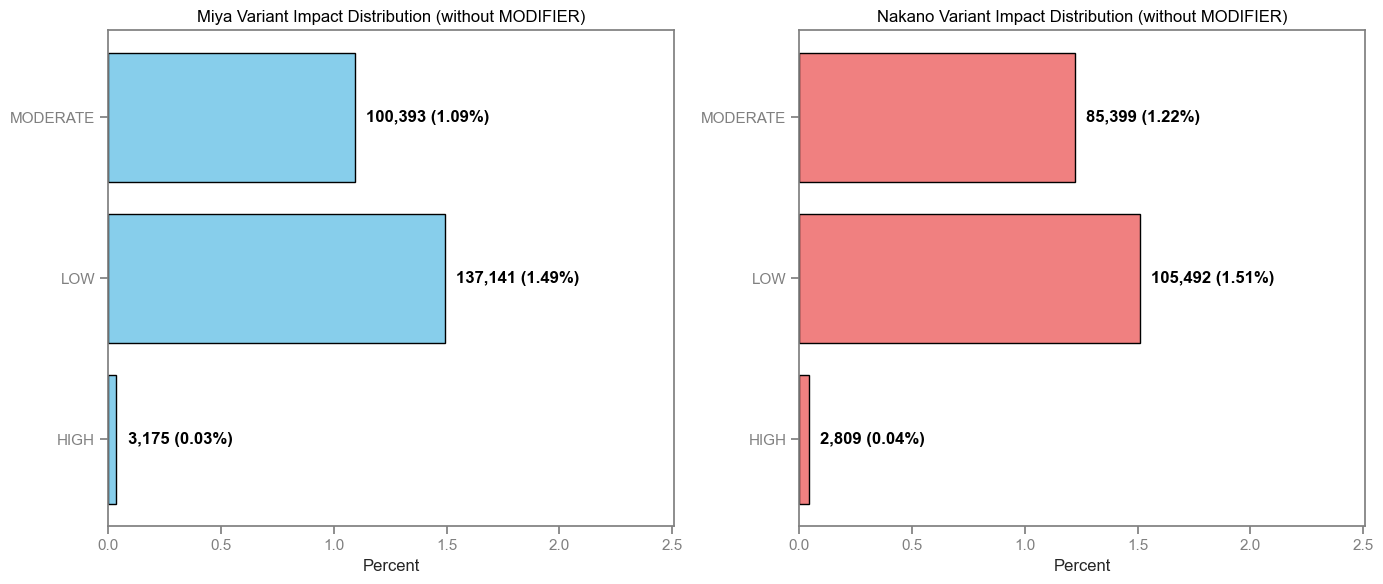

In [ ]:
# Filter out the 'MODIFIER' category from the data
categories_filtered = ['HIGH', 'LOW', 'MODERATE']
miya_counts_filtered = [3175, 137141, 100393]
nakano_counts_filtered = [2809, 105492, 85399]

miya_percent_filtered = [0.03452, 1.491052, 1.091513]
nakano_percent_filtered = [0.040189, 1.509302, 1.221826]

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Miya
ax[0].barh(categories_filtered, miya_percent_filtered, color='skyblue', edgecolor='black')
ax[0].set_title('Miya Variant Impact Distribution (without MODIFIER)')
ax[0].set_xlabel('Percent')
ax[0].set_xlim(0, max(max(miya_percent_filtered), max(nakano_percent_filtered)) + 1)

# Annotate the bars with count values
for i, v in enumerate(miya_counts_filtered):
    ax[0].text(miya_percent_filtered[i] + 0.05, i, f"{v:,} ({miya_percent_filtered[i]:.2f}%)", va='center', fontweight='bold')

# Plot for Nakano
ax[1].barh(categories_filtered, nakano_percent_filtered, color='lightcoral', edgecolor='black')
ax[1].set_title('Nakano Variant Impact Distribution (without MODIFIER)')
ax[1].set_xlabel('Percent')
ax[1].set_xlim(0, max(max(miya_percent_filtered), max(nakano_percent_filtered)) + 1)

# Annotate the bars with count values
for i, v in enumerate(nakano_counts_filtered):
    ax[1].text(nakano_percent_filtered[i] + 0.05, i, f"{v:,} ({nakano_percent_filtered[i]:.2f}%)", va='center', fontweight='bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


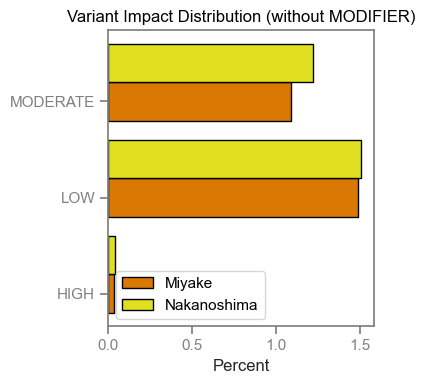

In [ ]:
# Define colors for the populations
population_colors = {
    'Miyake': '#d97904',     # Color for Miyake
    'Nakanoshima': '#e0e020' # Color for Nakanoshima
}

# Create a figure for the plot
plt.figure(figsize=(4, 4))

# Plot Miya (Miyake) data
plt.barh(categories_filtered, miya_percent_filtered, color=population_colors['Miyake'], edgecolor='black', height=0.4, label='Miyake')

# Plot Nakano (Nakanoshima) data, slightly offset for better visibility
plt.barh([x + 0.4 for x in range(len(categories_filtered))], nakano_percent_filtered, color=population_colors['Nakanoshima'], edgecolor='black', height=0.4, label='Nakanoshima')

# Add labels and title
plt.xlabel('Percent')
plt.title('Variant Impact Distribution (without MODIFIER)')

# Add a legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


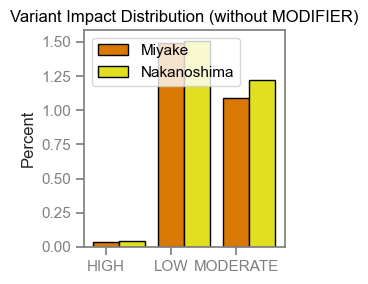

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for the plot
plt.figure(figsize=(3, 3))

# Plot Miya (Miyake) data
plt.bar(categories_filtered, miya_percent_filtered, color=population_colors['Miyake'], edgecolor='black', width=0.4, label='Miyake')

# Plot Nakano (Nakanoshima) data, slightly offset for better visibility
plt.bar([x + 0.4 for x in range(len(categories_filtered))], nakano_percent_filtered, color=population_colors['Nakanoshima'], edgecolor='black', width=0.4, label='Nakanoshima')

# Add labels and title
plt.ylabel('Percent')  # Changed from xlabel to ylabel since the bars are now vertical
plt.title('Variant Impact Distribution (without MODIFIER)')

# Add a legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


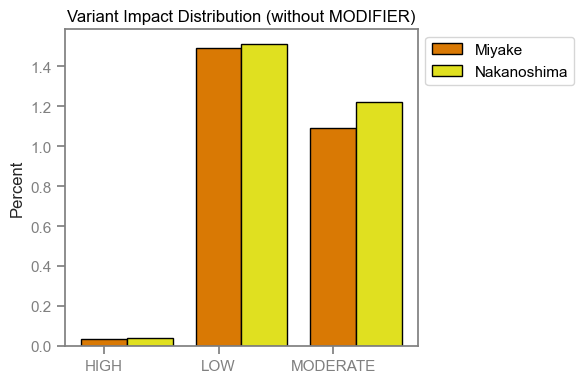

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for the plot
plt.figure(figsize=(6, 4))  # Adjusted figure size for better layout

# Plot Miya (Miyake) data
plt.bar(categories_filtered, miya_percent_filtered, color=population_colors['Miyake'], edgecolor='black', width=0.4, label='Miyake')

# Plot Nakano (Nakanoshima) data, slightly offset for better visibility
plt.bar([x + 0.4 for x in range(len(categories_filtered))], nakano_percent_filtered, color=population_colors['Nakanoshima'], edgecolor='black', width=0.4, label='Nakanoshima')

# Add labels and title
plt.ylabel('Percent')  # Changed from xlabel to ylabel since the bars are now vertical
plt.title('Variant Impact Distribution (without MODIFIER)')

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


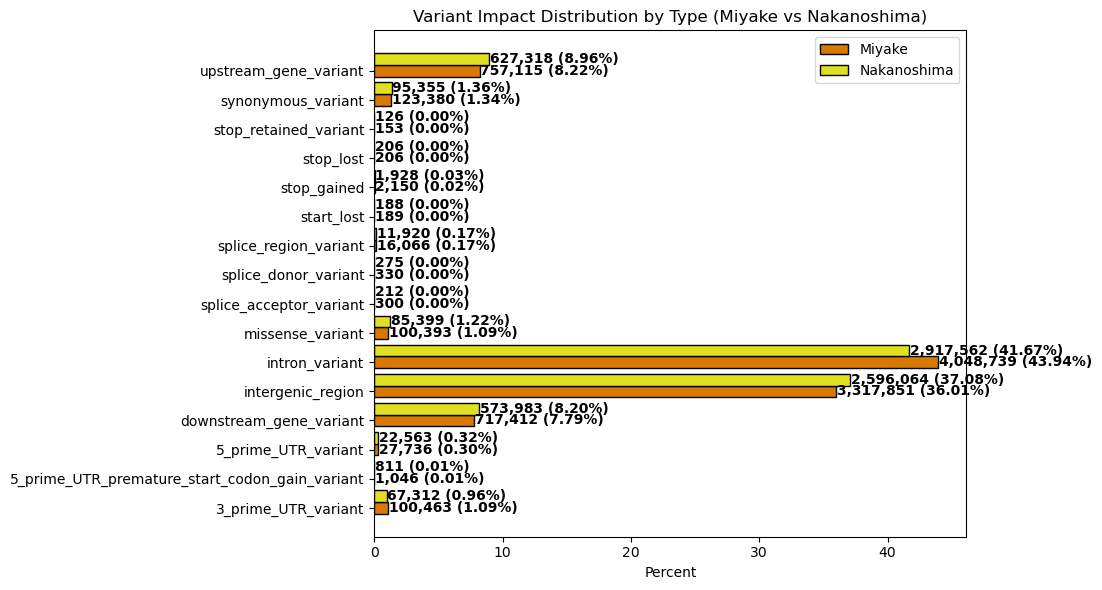

In [ ]:
# Data for Miyake and Nakanoshima
categories_extended = ['3_prime_UTR_variant', '5_prime_UTR_premature_start_codon_gain_variant', '5_prime_UTR_variant', 
                       'downstream_gene_variant', 'intergenic_region', 'intron_variant', 'missense_variant', 
                       'splice_acceptor_variant', 'splice_donor_variant', 'splice_region_variant', 'start_lost', 
                       'stop_gained', 'stop_lost', 'stop_retained_variant', 'synonymous_variant', 
                       'upstream_gene_variant']

# Miyake data
miya_counts_extended = [100463, 1046, 27736, 717412, 3317851, 4048739, 100393, 300, 330, 16066, 189, 2150, 206, 153, 123380, 757115]
miya_percent_extended = [1.090386, 0.011353, 0.301036, 7.786506, 36.010643, 43.943412, 1.089626, 0.003256, 0.003582, 0.174374, 
                         0.002051, 0.023335, 0.002236, 0.001661, 1.339118, 8.217427]

# Nakanoshima data
nakano_counts_extended = [67312, 811, 22563, 573983, 2596064, 2917562, 85399, 212, 275, 11920, 188, 1928, 206, 126, 95355, 627318]
nakano_percent_extended = [0.961432, 0.011584, 0.322272, 8.198326, 37.080155, 41.672182, 1.219773, 0.003028, 0.003928, 
                           0.170256, 0.002685, 0.027538, 0.002942, 0.0018, 1.361977, 8.960122]

# Create figure
plt.figure(figsize=(11, 6))

# Plot Miyake data
plt.barh(categories_extended, miya_percent_extended, color=population_colors['Miyake'], edgecolor='black', height=0.4, label='Miyake')

# Plot Nakanoshima data, slightly offset for visibility
plt.barh([x + 0.4 for x in range(len(categories_extended))], nakano_percent_extended, color=population_colors['Nakanoshima'], 
         edgecolor='black', height=0.4, label='Nakanoshima')

# Add labels and title
plt.xlabel('Percent')
plt.title('Variant Impact Distribution by Type (Miyake vs Nakanoshima)')

# Annotate the bars with count values for Miyake
for i, v in enumerate(miya_counts_extended):
    plt.text(miya_percent_extended[i] + 0.05, i, f"{v:,} ({miya_percent_extended[i]:.2f}%)", va='center', fontweight='bold')

# Annotate the bars with count values for Nakanoshima
for i, v in enumerate(nakano_counts_extended):
    plt.text(nakano_percent_extended[i] + 0.05, i + 0.4, f"{v:,} ({nakano_percent_extended[i]:.2f}%)", va='center', fontweight='bold')

# Add legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Realized load

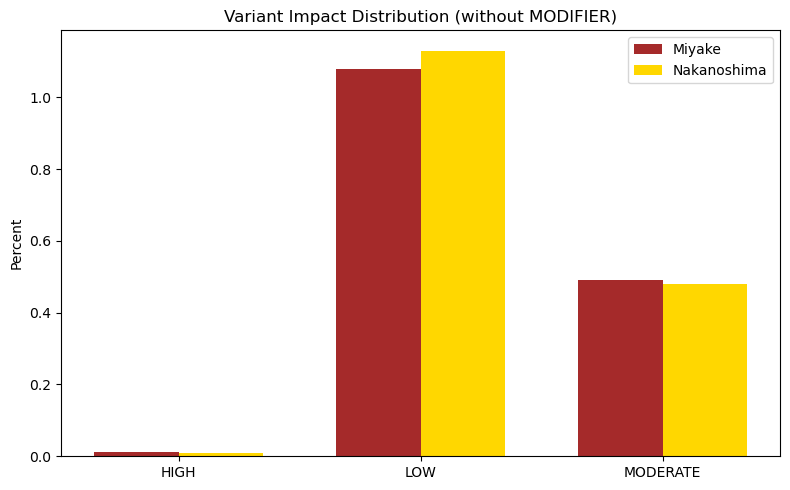

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Miyake and Nakanoshima
categories = ["HIGH", "LOW", "MODERATE"]
miyake_percent = [0.011, 1.08, 0.49]
nakano_percent = [0.0096, 1.13, 0.48]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, miyake_percent, width, label="Miyake", color="brown")
bars2 = ax.bar(x + width/2, nakano_percent, width, label="Nakanoshima", color="gold")

# Add text for labels, title, and axes
ax.set_ylabel("Percent")
ax.set_title("Variant Impact Distribution (without MODIFIER)")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


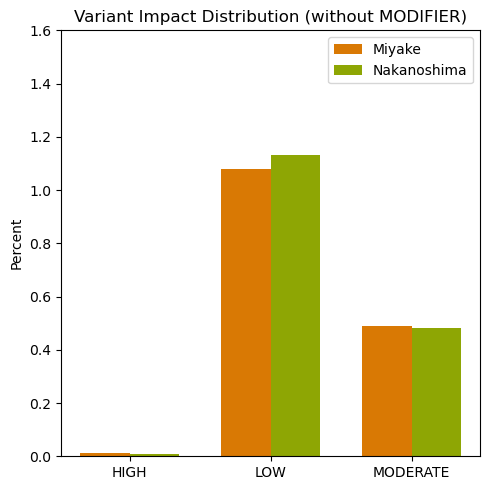

In [ ]:
# Applying previously used colors for the populations
miyake_color = "#d97904"  # Miyake color
nakano_color = "#8ea604"  # Assuming a distinct Nakano color

# Adjusting the plot to have a square shape
fig, ax = plt.subplots(figsize=(5, 5))  # Setting equal dimensions for width and height
bars1 = ax.bar(x - width/2, miyake_percent, width, label="Miyake", color=miyake_color)
bars2 = ax.bar(x + width/2, nakano_percent, width, label="Nakanoshima", color=nakano_color)

# Add text for labels, title, and axes
ax.set_ylabel("Percent")
ax.set_title("Variant Impact Distribution (without MODIFIER)")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Set y-axis limit with specific ticks
ax.set_ylim(0, 1.6)
ax.set_yticks(np.arange(0, 1.7, 0.2))  # Ensuring proper ticks at intervals of 0.2

# Show the plot
plt.tight_layout()
plt.show()
